In [2]:
#import bluebandits 
from bluebandits.NeuralUCB.agent import *
#import bluesimulator
from bluesimulator.NeuralUCB.environment import *
#import bluebandits 
from bluebandits.LinUCB.agent import *

from bluebandits.NeuralThompsonSampling import *
from bluesimulator.NeuralThompsonSampling.environment import *

### NEURAL-UCB EXPLORATION DEMO CODE

In [7]:
from bluebandits.NeuralUCB import *
from bluesimulator.NeuralUCB.environment import*
import bluebandits

In [8]:
import numpy as np
import random
from copy import deepcopy

In [9]:
# Set the parameter of the game
np.random.seed(12345)
K = 70# Total number of actions, 
T = 10000 # Total number of periods
d = 10 # the dimension of context
A = np.random.normal(loc=0, scale=1, size=(d, d))

In [10]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 #No of feature inputs - 'calling data', 'ambits', 'age', 'gender' for one article
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
# we set J equal to round index t

neuralagent = Agent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)
bestagent = BestAgent(K, T, d, A)
uniformagent = UniformAgent(K, T, d)
for tt in range(1, T + 1):
    
    # observe \{x_{t,a}\}_{a=1}^{k=1}
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A)
    
    # neuralagent
    neural_ind = neuralagent.Action(context_list)# make a decision
    neural_reward = realized_reward[neural_ind]# play neural_ind-th arm and observe reward
    neuralagent.Update(neural_reward)
    
    # bestagent
    best_ind = bestagent.Action(context_list)# make a decision
    best_reward = realized_reward[best_ind]# play best_ind-th arm and observe reward
    bestagent.Update(best_reward)
    
    # uniformagent
    uniform_ind = uniformagent.Action(context_list)# make a decision
    uniform_reward = realized_reward[uniform_ind]# play uniform_ind-th arm and observe reward
    uniformagent.Update(uniform_reward)
    
    print("round index {:d}; neural choose {:d}, reward is {:f}; best choose {:d}, reward is {:f}".format(tt,
                                                                                                          neural_ind,
                                                                                                          neural_reward,
                                                                                                          best_ind,
                                                                                                          best_reward,))
        

Using device cpu
round index 1; neural choose 69, reward is 13.485665; best choose 60, reward is 19.788268
round index 2; neural choose 69, reward is 14.161155; best choose 13, reward is 19.580100
round index 3; neural choose 52, reward is 12.878301; best choose 32, reward is 19.812891
round index 4; neural choose 69, reward is 9.951992; best choose 39, reward is 19.199273
round index 5; neural choose 69, reward is 9.715573; best choose 47, reward is 19.063356
round index 6; neural choose 64, reward is 11.122553; best choose 42, reward is 18.822805
round index 7; neural choose 66, reward is 18.901471; best choose 23, reward is 19.089863
round index 8; neural choose 68, reward is 8.605649; best choose 35, reward is 19.179979
round index 9; neural choose 49, reward is 8.121333; best choose 7, reward is 18.666985
round index 10; neural choose 48, reward is 13.683599; best choose 45, reward is 19.484548
round index 11; neural choose 69, reward is 8.380640; best choose 8, reward is 19.00976

In [3]:
context_list = SampleContext(8, 10)
context_list

array([[-0.48710444, -0.18544173,  0.44610671,  0.17125839, -0.48710444,
        -0.18544173,  0.44610671,  0.17125839],
       [ 0.11073474, -0.24613498,  0.64229641, -0.12087476,  0.11073474,
        -0.24613498,  0.64229641, -0.12087476],
       [ 0.69794125,  0.05681379,  0.09793398,  0.00769036,  0.69794125,
         0.05681379,  0.09793398,  0.00769036],
       [-0.11595985,  0.18547183,  0.65433383,  0.15492178, -0.11595985,
         0.18547183,  0.65433383,  0.15492178],
       [-0.23694605, -0.36167411, -0.14636537,  0.54002369, -0.23694605,
        -0.36167411, -0.14636537,  0.54002369],
       [-0.68038099, -0.11430867, -0.1339056 ,  0.0780034 , -0.68038099,
        -0.11430867, -0.1339056 ,  0.0780034 ],
       [ 0.00229476,  0.55735139, -0.19077543,  0.3910996 ,  0.00229476,
         0.55735139, -0.19077543,  0.3910996 ],
       [ 0.47612702,  0.11849279,  0.45910971, -0.22018354,  0.47612702,
         0.11849279,  0.45910971, -0.22018354],
       [-0.2451141 , -0.07455729

Text(0, 0.5, 'Total Reward')

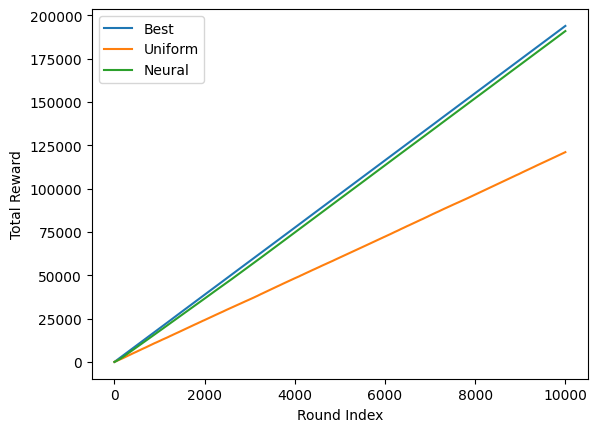

In [11]:
# plot the ratio of cumulated reward
import matplotlib.pyplot as plt
h_r_b = bestagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_b))

h_r_u = uniformagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_u))

h_r_n = deepcopy(neuralagent.history_reward)
plt.plot(range(0, T), np.cumsum(h_r_n))

plt.legend(["Best", "Uniform", "Neural"])
plt.xlabel("Round Index")
plt.ylabel("Total Reward")

Text(0.5, 1.0, 'The ratio of reward')

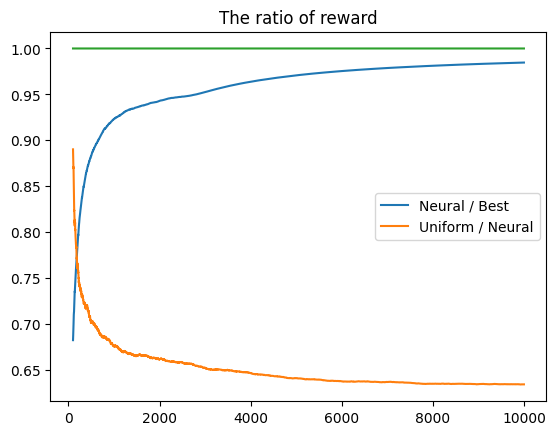

In [12]:
plt.plot(range(100, T), np.cumsum(h_r_n)[100:T] / np.cumsum(h_r_b)[100:T])
plt.plot(range(100, T), np.cumsum(h_r_u)[100:T] / np.cumsum(h_r_n)[100:T])
plt.legend(["Neural / Best", "Uniform / Neural"])
plt.plot(range(100, T), np.ones(T)[100:T])
#plt.plot(range(100, T), 0.95 * np.ones(T)[100:T])
plt.title("The ratio of reward")

Text(0.5, 1.0, 'The ratio of of adopting same decision - NeuralUCB')

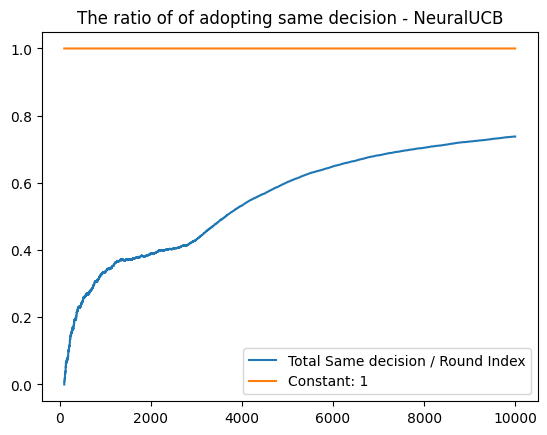

In [13]:
action_match = np.cumsum(neuralagent.history_action == bestagent.history_action)
action_match_ratio = action_match / np.array(range(1, T + 1))
plt.plot(range(100, T), action_match_ratio[100:T])
plt.plot(range(100, T), np.ones(T)[100:T])
plt.legend(["Total Same decision / Round Index", "Constant: 1"])
plt.title("The ratio of of adopting same decision - NeuralUCB") 

### NEURAL THOMPSON SAMPLING DEMO CODE

In [33]:
from bluebandits.NeuralThompsonSampling import *
from bluesimulator.NeuralThompsonSampling.environment import *

In [16]:
# Set the parameter of the game
np.random.seed(12345)
K = 70  # Total number of actions,
T = 10000  # Total number of periods
d = 20  # the dimension of context
A = np.random.normal(loc=0, scale=1, size=(d, d))

In [17]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 20
nu = 0.001  # {0.01, 0.1, 1}
lambda_ = 0.1  # {0.1, 1, 10}
eta = 0.01  # {0.001, 0.01, 0.1}
frequency = 50
batchsize = 50

neuralagent = Agent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
bestagent = BestAgent(K, T, d, A)
uniformagent = UniformAgent(K, T, d)
for tt in range(1, T + 1):
    # observe \{x_{t,a}\}_{a=1}^{k=1}
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A)

    # neuralagent
    neural_ind = neuralagent.Action(context_list)  # make a decision
    neural_reward = realized_reward[neural_ind]  # play neural_ind-th arm and observe reward
    neuralagent.Update(neural_reward)

    # bestagent
    best_ind = bestagent.Action(context_list)  # make a decision
    best_reward = realized_reward[best_ind]  # play best_ind-th arm and observe reward
    bestagent.Update(best_reward)

    # uniformagent
    uniform_ind = uniformagent.Action(context_list)  # make a decision
    uniform_reward = realized_reward[uniform_ind]  # play uniform_ind-th arm and observe reward
    uniformagent.Update(uniform_reward)

    print(
        "round index {:d}; neural choose {:d}, reward is {:f}; best choose {:d}, reward is {:f}".format(
            tt,
            neural_ind,
            neural_reward,
            best_ind,
            best_reward,
        )
    )

Using device cpu
round index 1; neural choose 69, reward is 12.698994; best choose 0, reward is 35.470278
round index 2; neural choose 65, reward is 17.019291; best choose 41, reward is 38.363534
round index 3; neural choose 68, reward is 14.538648; best choose 51, reward is 33.582652
round index 4; neural choose 69, reward is 12.970892; best choose 25, reward is 29.694913
round index 5; neural choose 67, reward is 34.513766; best choose 67, reward is 34.513766
round index 6; neural choose 69, reward is 27.323681; best choose 29, reward is 34.679269
round index 7; neural choose 68, reward is 9.158781; best choose 48, reward is 31.441877
round index 8; neural choose 58, reward is 20.880239; best choose 37, reward is 30.303452
round index 9; neural choose 69, reward is 15.155970; best choose 25, reward is 31.426048
round index 10; neural choose 69, reward is 17.738018; best choose 19, reward is 32.447158
round index 11; neural choose 49, reward is 32.468527; best choose 31, reward is 33.

Text(0, 0.5, 'Total Reward')

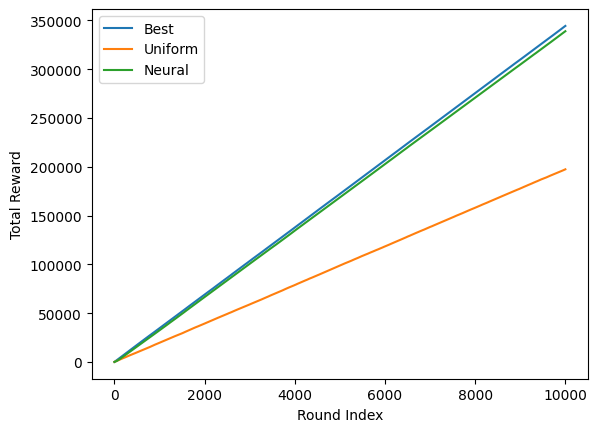

In [18]:
import matplotlib.pyplot as plt
h_r_b = bestagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_b))

h_r_u = uniformagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_u))

h_r_n = neuralagent.history_reward
plt.plot(range(0, T), np.cumsum(h_r_n))

plt.legend(["Best", "Uniform", "Neural"])
# plt.legend(["Best", "Uniform"])
plt.xlabel("Round Index")
plt.ylabel("Total Reward")

Text(0.5, 1.0, 'The ratio of reward')

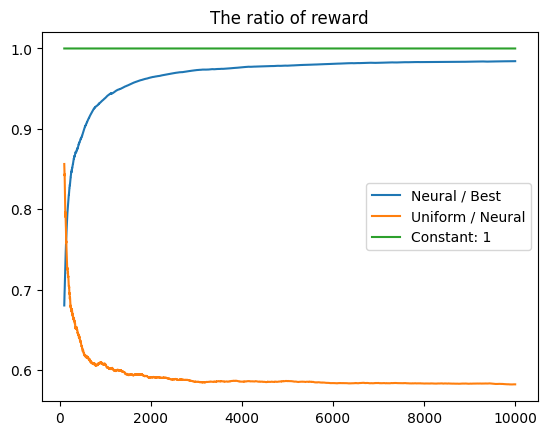

In [19]:
plt.plot(range(100, T), np.cumsum(h_r_n)[100:T] / np.cumsum(h_r_b)[100:T])
plt.plot(range(100, T), np.cumsum(h_r_u)[100:T] / np.cumsum(h_r_n)[100:T])
plt.plot(range(100, T), np.ones(T)[100:T])
plt.legend(["Neural / Best", "Uniform / Neural", "Constant: 1"])
plt.title("The ratio of reward")

Text(0.5, 1.0, 'The ratio of of adopting same decision')

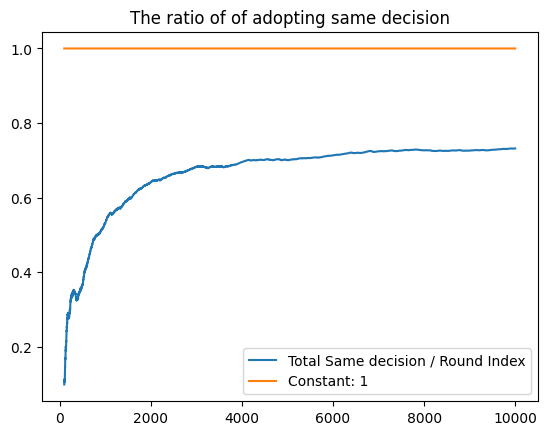

In [20]:
action_match = np.cumsum(neuralagent.history_action == bestagent.history_action)
action_match_ratio = action_match / np.array(range(1, T + 1))
plt.plot(range(100, T), action_match_ratio[100:T])
plt.plot(range(100, T), np.ones(T)[100:T])
plt.legend(["Total Same decision / Round Index", "Constant: 1"])
plt.title("The ratio of of adopting same decision")

Using device cpu


  0%|          | 50/10000 [00:11<39:00,  4.25it/s]

20 training epoch, mean loss value is 11.501248642398139
40 training epoch, mean loss value is 4.696334304072197


  1%|          | 100/10000 [00:23<43:46,  3.77it/s]

20 training epoch, mean loss value is 9.618730515372341
40 training epoch, mean loss value is 5.151941353356197
60 training epoch, mean loss value is 3.515666921730626
80 training epoch, mean loss value is 2.3953395216477666


  2%|▏         | 150/10000 [00:34<44:06,  3.72it/s]

20 training epoch, mean loss value is 5.700530103112695
40 training epoch, mean loss value is 2.9663170556623157
60 training epoch, mean loss value is 2.214905373022295
80 training epoch, mean loss value is 1.7792948056949724
100 training epoch, mean loss value is 1.7115924698017213


  2%|▏         | 200/10000 [00:46<45:39,  3.58it/s]

20 training epoch, mean loss value is 4.1201973846872715
40 training epoch, mean loss value is 2.3330697823911644
60 training epoch, mean loss value is 1.9958985904792343
80 training epoch, mean loss value is 1.5655667976164611
100 training epoch, mean loss value is 1.4852078997165388


  2%|▏         | 249/10000 [00:57<37:00,  4.39it/s]

20 training epoch, mean loss value is 3.610210368386119
40 training epoch, mean loss value is 2.217378293199538
60 training epoch, mean loss value is 2.0206660175647686
80 training epoch, mean loss value is 1.6339488412404548
100 training epoch, mean loss value is 1.866441119832804


  3%|▎         | 299/10000 [01:08<36:30,  4.43it/s]

20 training epoch, mean loss value is 4.070236440186806
40 training epoch, mean loss value is 2.1108222097462965
60 training epoch, mean loss value is 1.7386068334838436
80 training epoch, mean loss value is 1.7071828243951968


  3%|▎         | 300/10000 [01:09<49:31,  3.26it/s]

100 training epoch, mean loss value is 1.5592347937792133


  3%|▎         | 349/10000 [01:20<36:28,  4.41it/s]

20 training epoch, mean loss value is 3.073624179548734
40 training epoch, mean loss value is 1.9805096494508756
60 training epoch, mean loss value is 1.79067355926277
80 training epoch, mean loss value is 1.6743390163361518


  4%|▎         | 350/10000 [01:20<51:59,  3.09it/s]

100 training epoch, mean loss value is 1.380581025509437


  4%|▍         | 399/10000 [01:32<36:23,  4.40it/s]

20 training epoch, mean loss value is 2.7256424953036804
40 training epoch, mean loss value is 1.7152966747102125
60 training epoch, mean loss value is 1.6734718534924014


  4%|▍         | 400/10000 [01:32<53:47,  2.97it/s]

80 training epoch, mean loss value is 1.3228718177124275
100 training epoch, mean loss value is 1.5257606624577185


  4%|▍         | 449/10000 [01:43<36:04,  4.41it/s]

20 training epoch, mean loss value is 2.586566686151352
40 training epoch, mean loss value is 1.8865342516792714
60 training epoch, mean loss value is 1.6028920607637072


  4%|▍         | 450/10000 [01:44<55:08,  2.89it/s]

80 training epoch, mean loss value is 1.462884200077601
100 training epoch, mean loss value is 1.6030478472084917


  5%|▍         | 499/10000 [01:55<35:53,  4.41it/s]

20 training epoch, mean loss value is 3.302984235999682
40 training epoch, mean loss value is 2.651878850782931
60 training epoch, mean loss value is 1.5835392162462907


  5%|▌         | 500/10000 [01:56<57:53,  2.74it/s]

80 training epoch, mean loss value is 1.5835242323929393
100 training epoch, mean loss value is 1.317690756983939


  5%|▌         | 549/10000 [02:07<35:46,  4.40it/s]

20 training epoch, mean loss value is 2.6366900820149044
40 training epoch, mean loss value is 2.661763975417319
60 training epoch, mean loss value is 1.445105276084863


  6%|▌         | 550/10000 [02:08<59:35,  2.64it/s]

80 training epoch, mean loss value is 1.6241606161338042
100 training epoch, mean loss value is 1.6711916364708634


  6%|▌         | 599/10000 [02:19<35:26,  4.42it/s]

20 training epoch, mean loss value is 4.091892891879653
40 training epoch, mean loss value is 1.7506154817176611
60 training epoch, mean loss value is 1.6998228389028736
80 training epoch, mean loss value is 1.4296674827905222
100 training epoch, mean loss value is 1.3022137472073465


  6%|▋         | 649/10000 [02:31<35:17,  4.42it/s]  

20 training epoch, mean loss value is 3.574544369402657
40 training epoch, mean loss value is 2.0965900237350774
60 training epoch, mean loss value is 1.963917169132783
80 training epoch, mean loss value is 1.3525689920265818


  6%|▋         | 650/10000 [02:32<1:02:39,  2.49it/s]

100 training epoch, mean loss value is 1.2779031491125912


  7%|▋         | 699/10000 [02:43<35:16,  4.39it/s]  

20 training epoch, mean loss value is 2.1267885678483935
40 training epoch, mean loss value is 3.203600785894681
60 training epoch, mean loss value is 1.4806317743481046
80 training epoch, mean loss value is 2.7264253545031285


  7%|▋         | 700/10000 [02:44<1:03:43,  2.43it/s]

100 training epoch, mean loss value is 1.9443682908897046


  7%|▋         | 749/10000 [02:55<34:57,  4.41it/s]  

20 training epoch, mean loss value is 6.796997576425158
40 training epoch, mean loss value is 3.3166547058390106
60 training epoch, mean loss value is 2.6011333807736197
80 training epoch, mean loss value is 1.4557429054625486


  8%|▊         | 750/10000 [02:56<1:06:16,  2.33it/s]

100 training epoch, mean loss value is 1.7592922272321028


  8%|▊         | 799/10000 [03:07<34:44,  4.42it/s]  

20 training epoch, mean loss value is 3.0807951680749714
40 training epoch, mean loss value is 2.027676891511117
60 training epoch, mean loss value is 2.5465093998003763
80 training epoch, mean loss value is 1.412513047930326


  8%|▊         | 800/10000 [03:08<1:08:10,  2.25it/s]

100 training epoch, mean loss value is 1.809921066292247


  8%|▊         | 849/10000 [03:19<34:36,  4.41it/s]  

20 training epoch, mean loss value is 2.09015285042727
40 training epoch, mean loss value is 7.198767088034337
60 training epoch, mean loss value is 2.119795304741591
80 training epoch, mean loss value is 4.676272373231619


  8%|▊         | 850/10000 [03:20<1:09:05,  2.21it/s]

100 training epoch, mean loss value is 1.5785457677592254


  9%|▉         | 899/10000 [03:31<34:13,  4.43it/s]  

20 training epoch, mean loss value is 4.870020052028821
40 training epoch, mean loss value is 2.095391896445044
60 training epoch, mean loss value is 10.166702265837491
80 training epoch, mean loss value is 1.7446548733566192


  9%|▉         | 900/10000 [03:32<1:10:25,  2.15it/s]

100 training epoch, mean loss value is 1.4727300116118565


  9%|▉         | 949/10000 [03:43<34:10,  4.41it/s]  

20 training epoch, mean loss value is 3.542004009432218
40 training epoch, mean loss value is 4.244171478516238
60 training epoch, mean loss value is 4.637701083856199
80 training epoch, mean loss value is 2.2675396637717475


 10%|▉         | 950/10000 [03:44<1:11:44,  2.10it/s]

100 training epoch, mean loss value is 1.8576790033534707


 10%|▉         | 999/10000 [03:55<33:59,  4.41it/s]  

20 training epoch, mean loss value is 4.304813530278583
40 training epoch, mean loss value is 2.410744360403732
60 training epoch, mean loss value is 1.7955582479448846
80 training epoch, mean loss value is 1.8456002900127282


 10%|█         | 1000/10000 [03:56<1:14:24,  2.02it/s]

100 training epoch, mean loss value is 3.3865645556067987


 10%|█         | 1049/10000 [04:07<33:50,  4.41it/s]  

20 training epoch, mean loss value is 3.163259688369784
40 training epoch, mean loss value is 1.8467954345755506
60 training epoch, mean loss value is 2.7780158128795285
80 training epoch, mean loss value is 1.7345710130453404


 10%|█         | 1050/10000 [04:09<1:15:05,  1.99it/s]

100 training epoch, mean loss value is 2.107578881746568


 11%|█         | 1099/10000 [04:20<33:37,  4.41it/s]  

20 training epoch, mean loss value is 1.9857324929010067
40 training epoch, mean loss value is 1.8379897445201323
60 training epoch, mean loss value is 3.2671617810840075
80 training epoch, mean loss value is 2.1267093821031025


 11%|█         | 1100/10000 [04:21<1:17:34,  1.91it/s]

100 training epoch, mean loss value is 2.6529912021847495


 11%|█▏        | 1149/10000 [04:32<33:19,  4.43it/s]  

20 training epoch, mean loss value is 4.709356574325351
40 training epoch, mean loss value is 2.42667351326097
60 training epoch, mean loss value is 3.809943281880108
80 training epoch, mean loss value is 1.6363089562478443


 12%|█▏        | 1150/10000 [04:33<1:18:40,  1.87it/s]

100 training epoch, mean loss value is 4.876128280609455


 12%|█▏        | 1199/10000 [04:44<33:11,  4.42it/s]  

20 training epoch, mean loss value is 2.421804363643679
40 training epoch, mean loss value is 6.347884617296806
60 training epoch, mean loss value is 2.6894217705316907
80 training epoch, mean loss value is 1.3754029571804418
100 training epoch, mean loss value is 3.157012515118545


 12%|█▏        | 1249/10000 [04:57<33:02,  4.41it/s]  

20 training epoch, mean loss value is 2.9854751824540258
40 training epoch, mean loss value is 3.2969842455434457
60 training epoch, mean loss value is 1.5186112884173224
80 training epoch, mean loss value is 1.1297986392594197


 12%|█▎        | 1250/10000 [04:58<1:23:56,  1.74it/s]

100 training epoch, mean loss value is 1.1061727435283517


 13%|█▎        | 1299/10000 [05:09<32:53,  4.41it/s]  

20 training epoch, mean loss value is 2.104405989313786
40 training epoch, mean loss value is 1.977403383337578
60 training epoch, mean loss value is 1.8701273919233907
80 training epoch, mean loss value is 2.3356011456499832


 13%|█▎        | 1300/10000 [05:11<1:22:32,  1.76it/s]

100 training epoch, mean loss value is 1.7792463720326823


 13%|█▎        | 1349/10000 [05:22<32:37,  4.42it/s]  

20 training epoch, mean loss value is 2.8239171734746313
40 training epoch, mean loss value is 3.3480900798398596
60 training epoch, mean loss value is 1.3618943788777726
80 training epoch, mean loss value is 1.893342228676134


 14%|█▎        | 1350/10000 [05:23<1:23:36,  1.72it/s]

100 training epoch, mean loss value is 1.3169020573438337


 14%|█▍        | 1399/10000 [05:35<32:32,  4.41it/s]  

20 training epoch, mean loss value is 2.2130571479386676
40 training epoch, mean loss value is 1.8128896773880647
60 training epoch, mean loss value is 2.621927126740219
80 training epoch, mean loss value is 6.492018435588421


 14%|█▍        | 1400/10000 [05:36<1:26:39,  1.65it/s]

100 training epoch, mean loss value is 1.7701958403647546


 14%|█▍        | 1449/10000 [05:48<32:16,  4.41it/s]  

20 training epoch, mean loss value is 2.3613860113791616
40 training epoch, mean loss value is 9.65058162644449
60 training epoch, mean loss value is 5.043851243796621
80 training epoch, mean loss value is 1.7796138334977292


 14%|█▍        | 1450/10000 [05:49<1:26:55,  1.64it/s]

100 training epoch, mean loss value is 1.2167796636918682


 15%|█▍        | 1499/10000 [06:03<35:10,  4.03it/s]  

20 training epoch, mean loss value is 4.660554334348574
40 training epoch, mean loss value is 1.5541482011843109
60 training epoch, mean loss value is 1.8196553284139467
80 training epoch, mean loss value is 2.2952368735807203


 15%|█▌        | 1500/10000 [06:04<1:32:46,  1.53it/s]

100 training epoch, mean loss value is 1.3146257428992894


 15%|█▌        | 1549/10000 [06:16<42:15,  3.33it/s]  

20 training epoch, mean loss value is 5.769962945972893
40 training epoch, mean loss value is 1.881908177371533
60 training epoch, mean loss value is 1.9113676389202126
80 training epoch, mean loss value is 1.3852918592181664


 16%|█▌        | 1550/10000 [06:18<1:40:39,  1.40it/s]

100 training epoch, mean loss value is 1.6969670425874392


 16%|█▌        | 1599/10000 [06:29<31:46,  4.41it/s]  

20 training epoch, mean loss value is 1.9759932243530978
40 training epoch, mean loss value is 1.997583227754445
60 training epoch, mean loss value is 6.4894041557438245
80 training epoch, mean loss value is 1.116390329899642


 16%|█▌        | 1600/10000 [06:31<1:32:16,  1.52it/s]

100 training epoch, mean loss value is 1.499497007851579


 16%|█▋        | 1649/10000 [06:42<31:45,  4.38it/s]  

20 training epoch, mean loss value is 3.4001735435665665
40 training epoch, mean loss value is 1.420078508038528
60 training epoch, mean loss value is 1.5796194768382266
80 training epoch, mean loss value is 1.2745691637906833


 16%|█▋        | 1650/10000 [06:44<1:32:57,  1.50it/s]

100 training epoch, mean loss value is 8.73723483869833


 17%|█▋        | 1699/10000 [06:55<31:18,  4.42it/s]  

20 training epoch, mean loss value is 3.2249811628945335
40 training epoch, mean loss value is 1.7508433320857806
60 training epoch, mean loss value is 1.9896524192340195
80 training epoch, mean loss value is 3.058050940298886


 17%|█▋        | 1700/10000 [06:57<1:35:51,  1.44it/s]

100 training epoch, mean loss value is 1.576196961077568


 17%|█▋        | 1749/10000 [07:08<31:08,  4.42it/s]  

20 training epoch, mean loss value is 2.0289869104776
40 training epoch, mean loss value is 5.424489136922577
60 training epoch, mean loss value is 1.7805222329210735
80 training epoch, mean loss value is 1.1759855917491213


 18%|█▊        | 1750/10000 [07:10<1:35:37,  1.44it/s]

100 training epoch, mean loss value is 2.071623058447611


 18%|█▊        | 1799/10000 [07:21<30:57,  4.42it/s]  

20 training epoch, mean loss value is 3.287333323142474
40 training epoch, mean loss value is 2.3363932139646746
60 training epoch, mean loss value is 1.9769248158584398
80 training epoch, mean loss value is 2.056150236401862


 18%|█▊        | 1800/10000 [07:23<1:37:36,  1.40it/s]

100 training epoch, mean loss value is 1.765997255271572


 18%|█▊        | 1849/10000 [07:34<30:45,  4.42it/s]  

20 training epoch, mean loss value is 5.561567186384687
40 training epoch, mean loss value is 2.0997498185505767
60 training epoch, mean loss value is 2.298782879797301
80 training epoch, mean loss value is 3.149308843053673


 18%|█▊        | 1850/10000 [07:36<1:38:46,  1.38it/s]

100 training epoch, mean loss value is 1.3371941759285637


 19%|█▉        | 1899/10000 [07:47<30:36,  4.41it/s]  

20 training epoch, mean loss value is 3.127858270397997
40 training epoch, mean loss value is 2.1582692200346187
60 training epoch, mean loss value is 1.6174837128033246
80 training epoch, mean loss value is 1.3853176094884396


 19%|█▉        | 1900/10000 [07:49<1:39:40,  1.35it/s]

100 training epoch, mean loss value is 1.4438318979149813


 19%|█▉        | 1949/10000 [08:00<30:31,  4.40it/s]  

20 training epoch, mean loss value is 1.8302930470993266
40 training epoch, mean loss value is 2.5568122648133147
60 training epoch, mean loss value is 2.1383243692197444
80 training epoch, mean loss value is 4.248137508807319


 20%|█▉        | 1950/10000 [08:02<1:40:37,  1.33it/s]

100 training epoch, mean loss value is 1.2931025645580205


 20%|█▉        | 1999/10000 [08:13<30:16,  4.40it/s]  

20 training epoch, mean loss value is 5.007848951812726
40 training epoch, mean loss value is 2.949595065698907
60 training epoch, mean loss value is 2.3037248324994613
80 training epoch, mean loss value is 2.1837598020259086


 20%|██        | 2000/10000 [08:15<1:42:22,  1.30it/s]

100 training epoch, mean loss value is 2.680914147736506


 20%|██        | 2049/10000 [08:26<30:26,  4.35it/s]  

20 training epoch, mean loss value is 2.540754683278453
40 training epoch, mean loss value is 1.589604313829512
60 training epoch, mean loss value is 3.277934507336413
80 training epoch, mean loss value is 4.497496063936921


 20%|██        | 2050/10000 [08:28<1:42:22,  1.29it/s]

100 training epoch, mean loss value is 1.8576475281741776


 21%|██        | 2099/10000 [08:39<29:58,  4.39it/s]  

20 training epoch, mean loss value is 5.989230388980702
40 training epoch, mean loss value is 3.1596367217924897
60 training epoch, mean loss value is 5.355681411464839
80 training epoch, mean loss value is 4.3691388844165076


 21%|██        | 2100/10000 [08:42<1:44:02,  1.27it/s]

100 training epoch, mean loss value is 6.244747701022767


 21%|██▏       | 2149/10000 [08:53<29:41,  4.41it/s]  

20 training epoch, mean loss value is 5.174627613719261
40 training epoch, mean loss value is 1.5201502460714766
60 training epoch, mean loss value is 4.79083184784984
80 training epoch, mean loss value is 1.1642472018008418


 22%|██▏       | 2150/10000 [08:55<1:45:46,  1.24it/s]

100 training epoch, mean loss value is 1.4657723017711848


 22%|██▏       | 2199/10000 [09:06<29:23,  4.42it/s]  

20 training epoch, mean loss value is 2.1451517384139227
40 training epoch, mean loss value is 2.657720832554758
60 training epoch, mean loss value is 2.33173642891513
80 training epoch, mean loss value is 2.2989993341717025


 22%|██▏       | 2200/10000 [09:08<1:46:12,  1.22it/s]

100 training epoch, mean loss value is 2.4845398238072836


 22%|██▏       | 2249/10000 [09:19<29:18,  4.41it/s]  

20 training epoch, mean loss value is 2.6673994025456476
40 training epoch, mean loss value is 2.307825719095598
60 training epoch, mean loss value is 1.422593134984265
80 training epoch, mean loss value is 1.5286872131158251


 22%|██▎       | 2250/10000 [09:22<1:47:32,  1.20it/s]

100 training epoch, mean loss value is 4.441683813104756


 23%|██▎       | 2299/10000 [09:33<29:08,  4.40it/s]  

20 training epoch, mean loss value is 3.388457982756367
40 training epoch, mean loss value is 2.0782120741425056
60 training epoch, mean loss value is 2.19521569410829
80 training epoch, mean loss value is 3.7377266205382615


 23%|██▎       | 2300/10000 [09:35<1:46:58,  1.20it/s]

100 training epoch, mean loss value is 3.544494980096354


 23%|██▎       | 2349/10000 [09:46<28:50,  4.42it/s]  

20 training epoch, mean loss value is 2.450083126509175
40 training epoch, mean loss value is 3.7138792962800684
60 training epoch, mean loss value is 6.334028495592375
80 training epoch, mean loss value is 2.4229059595595683


 24%|██▎       | 2350/10000 [09:48<1:48:54,  1.17it/s]

100 training epoch, mean loss value is 1.0796516071966662


 24%|██▍       | 2399/10000 [09:59<28:45,  4.41it/s]  

20 training epoch, mean loss value is 3.130952121231379
40 training epoch, mean loss value is 2.4262870952363516
60 training epoch, mean loss value is 4.536287250850881
80 training epoch, mean loss value is 2.2530136613595526


 24%|██▍       | 2400/10000 [10:02<1:50:26,  1.15it/s]

100 training epoch, mean loss value is 1.363392299200249


 24%|██▍       | 2449/10000 [10:13<28:28,  4.42it/s]  

20 training epoch, mean loss value is 7.1555391441939635
40 training epoch, mean loss value is 1.9937151929192682
60 training epoch, mean loss value is 2.0010126502151753
80 training epoch, mean loss value is 3.366266479875229


 24%|██▍       | 2450/10000 [10:15<1:51:04,  1.13it/s]

100 training epoch, mean loss value is 3.378711180449856


 25%|██▍       | 2499/10000 [10:26<28:23,  4.40it/s]  

20 training epoch, mean loss value is 1.9268218179460832
40 training epoch, mean loss value is 3.351814463280198
60 training epoch, mean loss value is 6.831226176335413
80 training epoch, mean loss value is 1.7850241625976961


 25%|██▌       | 2500/10000 [10:29<1:51:26,  1.12it/s]

100 training epoch, mean loss value is 3.549618911694735


 25%|██▌       | 2549/10000 [10:40<28:05,  4.42it/s]  

20 training epoch, mean loss value is 2.376381301613622
40 training epoch, mean loss value is 3.4108309349360297
60 training epoch, mean loss value is 1.4799524165932554
80 training epoch, mean loss value is 1.4812406807365994


 26%|██▌       | 2550/10000 [10:43<1:52:34,  1.10it/s]

100 training epoch, mean loss value is 5.546557694624945


 26%|██▌       | 2599/10000 [10:54<35:10,  3.51it/s]  

20 training epoch, mean loss value is 4.172516993545122
40 training epoch, mean loss value is 2.9736298412572966
60 training epoch, mean loss value is 6.115605558972505
80 training epoch, mean loss value is 1.8666629577788698


 26%|██▌       | 2600/10000 [10:57<2:00:33,  1.02it/s]

100 training epoch, mean loss value is 1.5520295222381102


 26%|██▋       | 2649/10000 [11:08<27:41,  4.43it/s]  

20 training epoch, mean loss value is 2.8561389303286777
40 training epoch, mean loss value is 1.91194361328192
60 training epoch, mean loss value is 8.775499191053772
80 training epoch, mean loss value is 4.748813780364979


 26%|██▋       | 2650/10000 [11:11<1:58:21,  1.04it/s]

100 training epoch, mean loss value is 3.0045319693035433


 27%|██▋       | 2699/10000 [11:22<27:35,  4.41it/s]  

20 training epoch, mean loss value is 2.040998321018093
40 training epoch, mean loss value is 4.068438890520532
60 training epoch, mean loss value is 1.5911875047622357
80 training epoch, mean loss value is 2.1281934032380203


 27%|██▋       | 2700/10000 [11:24<1:57:18,  1.04it/s]

100 training epoch, mean loss value is 2.295931345474224


 27%|██▋       | 2749/10000 [11:35<27:26,  4.40it/s]  

20 training epoch, mean loss value is 3.6503529737058376
40 training epoch, mean loss value is 3.400937869086537
60 training epoch, mean loss value is 2.089579701955398
80 training epoch, mean loss value is 1.461935749427511


 28%|██▊       | 2750/10000 [11:38<1:58:32,  1.02it/s]

100 training epoch, mean loss value is 2.148604858413587


 28%|██▊       | 2799/10000 [11:49<27:07,  4.42it/s]  

20 training epoch, mean loss value is 3.3048859025448016
40 training epoch, mean loss value is 3.9781489704153805
60 training epoch, mean loss value is 2.8428319591227997
80 training epoch, mean loss value is 7.495286400088281


 28%|██▊       | 2800/10000 [11:52<1:56:24,  1.03it/s]

100 training epoch, mean loss value is 6.449184583063632


 28%|██▊       | 2849/10000 [12:03<27:08,  4.39it/s]  

20 training epoch, mean loss value is 2.766501589989401
40 training epoch, mean loss value is 9.871220484696687
60 training epoch, mean loss value is 3.6778199469755877
80 training epoch, mean loss value is 1.7452232912102907


 28%|██▊       | 2850/10000 [12:06<1:58:50,  1.00it/s]

100 training epoch, mean loss value is 1.8029086007291841


 29%|██▉       | 2899/10000 [12:17<26:51,  4.41it/s]  

20 training epoch, mean loss value is 2.4717381577446482
40 training epoch, mean loss value is 1.8885693114320898
60 training epoch, mean loss value is 2.2098863842658867
80 training epoch, mean loss value is 2.438549069257736


 29%|██▉       | 2900/10000 [12:20<1:59:26,  1.01s/it]

100 training epoch, mean loss value is 3.7306696882597477


 29%|██▉       | 2949/10000 [12:31<26:34,  4.42it/s]  

20 training epoch, mean loss value is 5.774690738368473
40 training epoch, mean loss value is 2.607997747073214
60 training epoch, mean loss value is 2.403218093549122
80 training epoch, mean loss value is 3.7146903273941656


 30%|██▉       | 2950/10000 [12:34<1:59:41,  1.02s/it]

100 training epoch, mean loss value is 5.046531852280717


 30%|██▉       | 2999/10000 [12:45<26:30,  4.40it/s]  

20 training epoch, mean loss value is 2.792342918350542
40 training epoch, mean loss value is 4.059049169637221
60 training epoch, mean loss value is 3.3409195554364133
80 training epoch, mean loss value is 4.143911412174172


 30%|███       | 3000/10000 [12:48<1:59:17,  1.02s/it]

100 training epoch, mean loss value is 1.7683754914353174


 30%|███       | 3049/10000 [12:59<26:15,  4.41it/s]  

20 training epoch, mean loss value is 2.32036128156609
40 training epoch, mean loss value is 1.9320417996195265
60 training epoch, mean loss value is 3.8727796901094127
80 training epoch, mean loss value is 1.5982803770254388


 30%|███       | 3050/10000 [13:02<2:00:13,  1.04s/it]

100 training epoch, mean loss value is 2.735286922108076


 31%|███       | 3099/10000 [13:13<26:01,  4.42it/s]  

20 training epoch, mean loss value is 3.7461604937133255
40 training epoch, mean loss value is 4.02207606840577
60 training epoch, mean loss value is 1.9916628473257443
80 training epoch, mean loss value is 4.42151245159056


 31%|███       | 3100/10000 [13:16<2:04:48,  1.09s/it]

100 training epoch, mean loss value is 1.9652865254052219


 31%|███▏      | 3149/10000 [13:29<26:30,  4.31it/s]  

20 training epoch, mean loss value is 3.403767442126926
40 training epoch, mean loss value is 3.2461697553274793
60 training epoch, mean loss value is 4.725866160507226
80 training epoch, mean loss value is 4.578175026111916


 32%|███▏      | 3150/10000 [13:32<2:12:30,  1.16s/it]

100 training epoch, mean loss value is 9.511461723432165


 32%|███▏      | 3199/10000 [13:44<25:41,  4.41it/s]  

20 training epoch, mean loss value is 2.8223452467951864
40 training epoch, mean loss value is 5.138023833397249
60 training epoch, mean loss value is 5.897419951661519
80 training epoch, mean loss value is 4.22754634981834


 32%|███▏      | 3200/10000 [13:47<2:03:01,  1.09s/it]

100 training epoch, mean loss value is 11.613298995267868


 32%|███▏      | 3249/10000 [13:58<25:27,  4.42it/s]  

20 training epoch, mean loss value is 6.258240973618447
40 training epoch, mean loss value is 2.522111568351604
60 training epoch, mean loss value is 2.332093429015914
80 training epoch, mean loss value is 7.540138218332374


 32%|███▎      | 3250/10000 [14:01<2:04:46,  1.11s/it]

100 training epoch, mean loss value is 3.2696688482770955


 33%|███▎      | 3299/10000 [14:12<25:20,  4.41it/s]  

20 training epoch, mean loss value is 4.096042670967766
40 training epoch, mean loss value is 2.2011576090079457
60 training epoch, mean loss value is 2.291543542058518
80 training epoch, mean loss value is 4.402714844740573


 33%|███▎      | 3300/10000 [14:15<2:03:23,  1.10s/it]

100 training epoch, mean loss value is 1.81287825901426


 33%|███▎      | 3349/10000 [14:26<25:13,  4.39it/s]  

20 training epoch, mean loss value is 1.7289464353866129
40 training epoch, mean loss value is 6.930964402526512
60 training epoch, mean loss value is 2.604439847231984
80 training epoch, mean loss value is 3.575413749714147


 34%|███▎      | 3350/10000 [14:30<2:10:16,  1.18s/it]

100 training epoch, mean loss value is 4.199240168981212


 34%|███▍      | 3399/10000 [14:43<25:49,  4.26it/s]  

20 training epoch, mean loss value is 4.097152308149185
40 training epoch, mean loss value is 3.6633268432146897
60 training epoch, mean loss value is 3.5143651273624683
80 training epoch, mean loss value is 2.010628620843278


 34%|███▍      | 3400/10000 [14:46<2:09:25,  1.18s/it]

100 training epoch, mean loss value is 1.730798412559202


 34%|███▍      | 3449/10000 [14:57<24:57,  4.38it/s]  

20 training epoch, mean loss value is 3.269814767767968
40 training epoch, mean loss value is 5.595278917380818
60 training epoch, mean loss value is 1.8567337337864558
80 training epoch, mean loss value is 2.2665366525581994


 34%|███▍      | 3450/10000 [15:01<2:10:04,  1.19s/it]

100 training epoch, mean loss value is 1.6217168699132813


 35%|███▍      | 3499/10000 [15:12<25:31,  4.24it/s]  

20 training epoch, mean loss value is 2.95622226056831
40 training epoch, mean loss value is 4.255697557621814
60 training epoch, mean loss value is 4.574703172004524
80 training epoch, mean loss value is 4.663091644015486


 35%|███▌      | 3500/10000 [15:16<2:10:55,  1.21s/it]

100 training epoch, mean loss value is 2.084119378945143


 35%|███▌      | 3549/10000 [15:27<24:55,  4.31it/s]  

20 training epoch, mean loss value is 2.8489792839308077
40 training epoch, mean loss value is 2.4123338759803707
60 training epoch, mean loss value is 2.7936237040971124
80 training epoch, mean loss value is 2.7388292223897412


 36%|███▌      | 3550/10000 [15:31<2:10:29,  1.21s/it]

100 training epoch, mean loss value is 2.6920194240323685


 36%|███▌      | 3599/10000 [15:42<24:45,  4.31it/s]  

20 training epoch, mean loss value is 2.7522786337963683
40 training epoch, mean loss value is 4.161662291007845
60 training epoch, mean loss value is 2.9243635886280623
80 training epoch, mean loss value is 4.920313442305033


 36%|███▌      | 3600/10000 [15:46<2:09:56,  1.22s/it]

100 training epoch, mean loss value is 1.760891804127361


 36%|███▋      | 3649/10000 [15:57<24:24,  4.34it/s]  

20 training epoch, mean loss value is 5.36422343893683
40 training epoch, mean loss value is 3.4864236965696587
60 training epoch, mean loss value is 2.7909865947469052
80 training epoch, mean loss value is 1.5667496556544598


 36%|███▋      | 3650/10000 [16:01<2:09:52,  1.23s/it]

100 training epoch, mean loss value is 5.03267487596363


 37%|███▋      | 3699/10000 [16:12<24:10,  4.34it/s]  

20 training epoch, mean loss value is 4.298237057794754
40 training epoch, mean loss value is 5.252941041913813
60 training epoch, mean loss value is 5.290847223992694
80 training epoch, mean loss value is 2.148580790552274


 37%|███▋      | 3700/10000 [16:16<2:11:15,  1.25s/it]

100 training epoch, mean loss value is 6.282727500541781


 37%|███▋      | 3749/10000 [16:27<23:54,  4.36it/s]  

20 training epoch, mean loss value is 2.6788517822653817
40 training epoch, mean loss value is 2.104337818811129
60 training epoch, mean loss value is 4.390301408628247
80 training epoch, mean loss value is 7.738943042657199


 38%|███▊      | 3750/10000 [16:31<2:11:55,  1.27s/it]

100 training epoch, mean loss value is 3.562672647945682


 38%|███▊      | 3799/10000 [16:42<24:03,  4.30it/s]  

20 training epoch, mean loss value is 4.127534902350161
40 training epoch, mean loss value is 3.955841291215465
60 training epoch, mean loss value is 2.4590074280077006
80 training epoch, mean loss value is 3.732054006080703


 38%|███▊      | 3800/10000 [16:46<2:13:08,  1.29s/it]

100 training epoch, mean loss value is 3.3600675774724826


 38%|███▊      | 3849/10000 [16:58<25:12,  4.07it/s]  

20 training epoch, mean loss value is 2.055820875407421
40 training epoch, mean loss value is 5.737364112978838
60 training epoch, mean loss value is 2.3827018687243853
80 training epoch, mean loss value is 2.437714562215795


 38%|███▊      | 3850/10000 [17:02<2:11:57,  1.29s/it]

100 training epoch, mean loss value is 3.139833758582402


 39%|███▉      | 3899/10000 [17:13<23:24,  4.34it/s]  

20 training epoch, mean loss value is 3.5033307296512737
40 training epoch, mean loss value is 4.675368398508282
60 training epoch, mean loss value is 3.431720168496003
80 training epoch, mean loss value is 3.2279366054223866


 39%|███▉      | 3900/10000 [17:17<2:12:58,  1.31s/it]

100 training epoch, mean loss value is 2.7677957465605436


 39%|███▉      | 3949/10000 [17:29<23:37,  4.27it/s]  

20 training epoch, mean loss value is 3.6618806463137963
40 training epoch, mean loss value is 1.9389966524359297
60 training epoch, mean loss value is 2.8126539567756406
80 training epoch, mean loss value is 3.0089166985549882


 40%|███▉      | 3950/10000 [17:33<2:14:25,  1.33s/it]

100 training epoch, mean loss value is 1.822884175847945


 40%|███▉      | 3999/10000 [17:44<23:09,  4.32it/s]  

20 training epoch, mean loss value is 7.096698917392258
40 training epoch, mean loss value is 2.528036533193556
60 training epoch, mean loss value is 1.6106534561278014
80 training epoch, mean loss value is 2.2189279389894723


 40%|████      | 4000/10000 [17:48<2:13:34,  1.34s/it]

100 training epoch, mean loss value is 1.6773585929574097


 40%|████      | 4049/10000 [17:59<23:06,  4.29it/s]  

20 training epoch, mean loss value is 2.7205511906682784
40 training epoch, mean loss value is 2.9761250934280814
60 training epoch, mean loss value is 1.9130798304478465
80 training epoch, mean loss value is 1.8893906146439698


 40%|████      | 4050/10000 [18:03<2:13:02,  1.34s/it]

100 training epoch, mean loss value is 2.2562553786884365


 41%|████      | 4099/10000 [18:14<22:56,  4.29it/s]  

20 training epoch, mean loss value is 6.55451490106686
40 training epoch, mean loss value is 3.6228412231860974
60 training epoch, mean loss value is 2.8279273928992277
80 training epoch, mean loss value is 2.637548854611639


 41%|████      | 4100/10000 [18:18<2:14:45,  1.37s/it]

100 training epoch, mean loss value is 3.293393323677417


 41%|████▏     | 4149/10000 [18:30<22:38,  4.31it/s]  

20 training epoch, mean loss value is 2.516006286274732
40 training epoch, mean loss value is 3.760115799004828
60 training epoch, mean loss value is 2.8757792015895998
80 training epoch, mean loss value is 6.208455506019848


 42%|████▏     | 4150/10000 [18:34<2:15:32,  1.39s/it]

100 training epoch, mean loss value is 3.7711223238134997


 42%|████▏     | 4199/10000 [18:45<22:10,  4.36it/s]  

20 training epoch, mean loss value is 5.330382563988884
40 training epoch, mean loss value is 5.8820413224323715
60 training epoch, mean loss value is 8.231854933723133
80 training epoch, mean loss value is 7.2456324496747815


 42%|████▏     | 4200/10000 [18:50<2:15:10,  1.40s/it]

100 training epoch, mean loss value is 5.254840550504021


 42%|████▏     | 4249/10000 [19:01<22:30,  4.26it/s]  

20 training epoch, mean loss value is 4.362556462869584
40 training epoch, mean loss value is 2.7708077636182518
60 training epoch, mean loss value is 5.677416733192231
80 training epoch, mean loss value is 1.1626232340186664


 42%|████▎     | 4250/10000 [19:05<2:16:13,  1.42s/it]

100 training epoch, mean loss value is 1.9987493139082695


 43%|████▎     | 4299/10000 [19:17<21:46,  4.36it/s]  

20 training epoch, mean loss value is 2.201686105194131
40 training epoch, mean loss value is 3.1247854431335083
60 training epoch, mean loss value is 4.526369373455831
80 training epoch, mean loss value is 2.932403162362522


 43%|████▎     | 4300/10000 [19:21<2:16:23,  1.44s/it]

100 training epoch, mean loss value is 2.1670546841606875


 43%|████▎     | 4349/10000 [19:32<21:40,  4.34it/s]  

20 training epoch, mean loss value is 3.3613845863951815
40 training epoch, mean loss value is 4.428115750091083
60 training epoch, mean loss value is 2.3450299957738725
80 training epoch, mean loss value is 4.515481046450901


 44%|████▎     | 4350/10000 [19:36<2:14:12,  1.43s/it]

100 training epoch, mean loss value is 5.902973442890573


 44%|████▍     | 4399/10000 [19:48<21:25,  4.36it/s]  

20 training epoch, mean loss value is 4.34829498107658
40 training epoch, mean loss value is 3.072159614115169
60 training epoch, mean loss value is 4.9353102446571135
80 training epoch, mean loss value is 2.3124398533836836


 44%|████▍     | 4400/10000 [19:52<2:15:40,  1.45s/it]

100 training epoch, mean loss value is 1.743075213073631


 44%|████▍     | 4449/10000 [20:04<21:49,  4.24it/s]  

20 training epoch, mean loss value is 6.198508999653678
40 training epoch, mean loss value is 4.250619110555289
60 training epoch, mean loss value is 1.7319132764346161
80 training epoch, mean loss value is 5.440014237122613


 44%|████▍     | 4450/10000 [20:08<2:15:24,  1.46s/it]

100 training epoch, mean loss value is 4.107005380381822


 45%|████▍     | 4499/10000 [20:19<21:05,  4.35it/s]  

20 training epoch, mean loss value is 2.526310469941656
40 training epoch, mean loss value is 2.256073129096535
60 training epoch, mean loss value is 2.57152473160461
80 training epoch, mean loss value is 2.0496530857566855


 45%|████▌     | 4500/10000 [20:24<2:16:04,  1.48s/it]

100 training epoch, mean loss value is 2.6930120271334514


 45%|████▌     | 4549/10000 [20:35<21:19,  4.26it/s]  

20 training epoch, mean loss value is 2.0731398888142043
40 training epoch, mean loss value is 4.529175484705776
60 training epoch, mean loss value is 3.25468633249431
80 training epoch, mean loss value is 2.436079742539636


 46%|████▌     | 4550/10000 [20:40<2:14:48,  1.48s/it]

100 training epoch, mean loss value is 3.866541180600902


 46%|████▌     | 4599/10000 [20:51<20:56,  4.30it/s]  

20 training epoch, mean loss value is 2.22753955439683
40 training epoch, mean loss value is 4.874502904140802
60 training epoch, mean loss value is 5.780311102970093
80 training epoch, mean loss value is 4.3876671921161945


 46%|████▌     | 4600/10000 [20:55<2:15:42,  1.51s/it]

100 training epoch, mean loss value is 8.901247049355831


 46%|████▋     | 4649/10000 [21:07<20:29,  4.35it/s]  

20 training epoch, mean loss value is 5.534473345517742
40 training epoch, mean loss value is 2.655639525582233
60 training epoch, mean loss value is 2.319349262630481
80 training epoch, mean loss value is 4.769371342647508


 46%|████▋     | 4650/10000 [21:12<2:15:49,  1.52s/it]

100 training epoch, mean loss value is 3.844375053301634


 47%|████▋     | 4699/10000 [21:23<20:32,  4.30it/s]  

20 training epoch, mean loss value is 3.787112922026976
40 training epoch, mean loss value is 2.232372271842644
60 training epoch, mean loss value is 4.808596615987497
80 training epoch, mean loss value is 4.981307612534566


 47%|████▋     | 4700/10000 [21:27<2:15:12,  1.53s/it]

100 training epoch, mean loss value is 4.767526780187486


 47%|████▋     | 4749/10000 [21:39<20:05,  4.36it/s]  

20 training epoch, mean loss value is 1.8075679236963382
40 training epoch, mean loss value is 6.774842211111508
60 training epoch, mean loss value is 2.2077136486017577
80 training epoch, mean loss value is 1.9354392280699324


 48%|████▊     | 4750/10000 [21:43<2:14:37,  1.54s/it]

100 training epoch, mean loss value is 4.185665926200246


 48%|████▊     | 4799/10000 [21:55<19:48,  4.37it/s]  

20 training epoch, mean loss value is 4.569793460530846
40 training epoch, mean loss value is 9.051195436515249
60 training epoch, mean loss value is 4.531487947283179
80 training epoch, mean loss value is 3.8602335295459915


 48%|████▊     | 4800/10000 [21:59<2:15:58,  1.57s/it]

100 training epoch, mean loss value is 4.6782551508170505


 48%|████▊     | 4849/10000 [22:11<19:45,  4.34it/s]  

20 training epoch, mean loss value is 2.7108336042530707
40 training epoch, mean loss value is 3.0572517999138484
60 training epoch, mean loss value is 2.8790457498424367
80 training epoch, mean loss value is 2.488200689827113


 48%|████▊     | 4850/10000 [22:15<2:13:37,  1.56s/it]

100 training epoch, mean loss value is 2.235561464192707


 49%|████▉     | 4899/10000 [22:27<19:52,  4.28it/s]  

20 training epoch, mean loss value is 3.081669677654204
40 training epoch, mean loss value is 2.2637130138695754
60 training epoch, mean loss value is 1.9290495139243231
80 training epoch, mean loss value is 1.9563071182248002


 49%|████▉     | 4900/10000 [22:31<2:14:05,  1.58s/it]

100 training epoch, mean loss value is 3.294084241455111


 49%|████▉     | 4949/10000 [22:43<19:25,  4.33it/s]  

20 training epoch, mean loss value is 2.9259254689969483
40 training epoch, mean loss value is 2.364993470379037
60 training epoch, mean loss value is 5.8004514080563165
80 training epoch, mean loss value is 3.7579023658351365


 50%|████▉     | 4950/10000 [22:48<2:14:43,  1.60s/it]

100 training epoch, mean loss value is 4.0006976306150195


 50%|████▉     | 4999/10000 [22:59<19:11,  4.34it/s]  

20 training epoch, mean loss value is 3.426620428081815
40 training epoch, mean loss value is 4.0978255614913435
60 training epoch, mean loss value is 6.14672656324115
80 training epoch, mean loss value is 3.763579894725362


 50%|█████     | 5000/10000 [23:04<2:14:51,  1.62s/it]

100 training epoch, mean loss value is 5.380784846096754


 50%|█████     | 5049/10000 [23:15<18:57,  4.35it/s]  

20 training epoch, mean loss value is 4.253651277171573
40 training epoch, mean loss value is 2.903966815223925
60 training epoch, mean loss value is 2.392100478051381
80 training epoch, mean loss value is 6.205926658938165


 50%|█████     | 5050/10000 [23:20<2:14:42,  1.63s/it]

100 training epoch, mean loss value is 5.1053662771876835


 51%|█████     | 5099/10000 [23:32<18:51,  4.33it/s]  

20 training epoch, mean loss value is 3.0057447248365854
40 training epoch, mean loss value is 2.8995591910813117
60 training epoch, mean loss value is 2.4169630049532986
80 training epoch, mean loss value is 3.3424033961919117


 51%|█████     | 5100/10000 [23:37<2:14:04,  1.64s/it]

100 training epoch, mean loss value is 5.012606930140867


 51%|█████▏    | 5149/10000 [23:48<18:51,  4.29it/s]  

20 training epoch, mean loss value is 5.229351200482934
40 training epoch, mean loss value is 2.207018893750186
60 training epoch, mean loss value is 2.977542578268974
80 training epoch, mean loss value is 5.318122608117954


 52%|█████▏    | 5150/10000 [23:53<2:12:55,  1.64s/it]

100 training epoch, mean loss value is 1.9449164347776073


 52%|█████▏    | 5199/10000 [24:06<34:15,  2.34it/s]  

20 training epoch, mean loss value is 2.2493362856318755
40 training epoch, mean loss value is 2.4519403319902113
60 training epoch, mean loss value is 6.561232744532375
80 training epoch, mean loss value is 2.7953802280645843


 52%|█████▏    | 5200/10000 [24:11<2:31:41,  1.90s/it]

100 training epoch, mean loss value is 5.803869344685989


 52%|█████▏    | 5249/10000 [24:23<19:03,  4.15it/s]  

20 training epoch, mean loss value is 2.995135886769419
40 training epoch, mean loss value is 3.906995142950895
60 training epoch, mean loss value is 2.14302041016668
80 training epoch, mean loss value is 3.337707645961392


 52%|█████▎    | 5250/10000 [24:28<2:13:26,  1.69s/it]

100 training epoch, mean loss value is 3.4937237276566293


 53%|█████▎    | 5299/10000 [24:39<17:57,  4.36it/s]  

20 training epoch, mean loss value is 2.3692610890977623
40 training epoch, mean loss value is 2.6295604185869017
60 training epoch, mean loss value is 3.970316519335365
80 training epoch, mean loss value is 2.589812192343141


 53%|█████▎    | 5300/10000 [24:44<2:11:45,  1.68s/it]

100 training epoch, mean loss value is 4.312346216759902


 53%|█████▎    | 5349/10000 [24:56<17:48,  4.35it/s]  

20 training epoch, mean loss value is 3.7087810726508894
40 training epoch, mean loss value is 4.623722476338145
60 training epoch, mean loss value is 4.144096072808851
80 training epoch, mean loss value is 5.5226690960157985


 54%|█████▎    | 5350/10000 [25:01<2:13:07,  1.72s/it]

100 training epoch, mean loss value is 3.813678249008623


 54%|█████▍    | 5399/10000 [25:12<17:38,  4.35it/s]  

20 training epoch, mean loss value is 3.8978565972825465
40 training epoch, mean loss value is 7.679225904416075
60 training epoch, mean loss value is 3.2191402362333528
80 training epoch, mean loss value is 3.3396177758032906


 54%|█████▍    | 5400/10000 [25:17<2:12:36,  1.73s/it]

100 training epoch, mean loss value is 2.3706151074858117


 54%|█████▍    | 5449/10000 [25:29<17:57,  4.22it/s]  

20 training epoch, mean loss value is 2.2429730670372807
40 training epoch, mean loss value is 2.5347437071712475
60 training epoch, mean loss value is 3.0945419501811253
80 training epoch, mean loss value is 3.982129775339562


 55%|█████▍    | 5450/10000 [25:34<2:13:00,  1.75s/it]

100 training epoch, mean loss value is 2.4878226325474597


 55%|█████▍    | 5499/10000 [25:46<20:26,  3.67it/s]  

20 training epoch, mean loss value is 2.9543417007376465
40 training epoch, mean loss value is 4.950017795959875
60 training epoch, mean loss value is 2.8198073413434663
80 training epoch, mean loss value is 2.6104311303022083


 55%|█████▌    | 5500/10000 [25:51<2:14:20,  1.79s/it]

100 training epoch, mean loss value is 4.193747290243981


 55%|█████▌    | 5549/10000 [26:03<17:03,  4.35it/s]  

20 training epoch, mean loss value is 3.796777972251424
40 training epoch, mean loss value is 4.383467801944845
60 training epoch, mean loss value is 2.0863676439673298
80 training epoch, mean loss value is 2.1580506452245882


 56%|█████▌    | 5550/10000 [26:08<2:11:36,  1.77s/it]

100 training epoch, mean loss value is 2.483947994456834


 56%|█████▌    | 5599/10000 [26:20<17:06,  4.29it/s]  

20 training epoch, mean loss value is 2.5784633243830553
40 training epoch, mean loss value is 2.7545551536582686
60 training epoch, mean loss value is 3.265372477398746
80 training epoch, mean loss value is 2.4376550220789324


 56%|█████▌    | 5600/10000 [26:25<2:11:14,  1.79s/it]

100 training epoch, mean loss value is 2.248373723327349


 56%|█████▋    | 5649/10000 [26:36<16:52,  4.30it/s]  

20 training epoch, mean loss value is 6.8318857219146985
40 training epoch, mean loss value is 2.2949169033266585
60 training epoch, mean loss value is 2.190633300964281
80 training epoch, mean loss value is 1.8735013646295093


 56%|█████▋    | 5650/10000 [26:42<2:12:06,  1.82s/it]

100 training epoch, mean loss value is 3.188795894187964


 57%|█████▋    | 5699/10000 [26:53<16:34,  4.33it/s]  

20 training epoch, mean loss value is 7.652918658863389
40 training epoch, mean loss value is 2.286691494096249
60 training epoch, mean loss value is 2.8704657819445063
80 training epoch, mean loss value is 2.746621836298036


 57%|█████▋    | 5700/10000 [26:59<2:11:50,  1.84s/it]

100 training epoch, mean loss value is 2.704049779729819


 57%|█████▋    | 5749/10000 [27:10<16:36,  4.27it/s]  

20 training epoch, mean loss value is 4.658738391377337
40 training epoch, mean loss value is 1.5632904996044201
60 training epoch, mean loss value is 2.8259883499165013
80 training epoch, mean loss value is 1.480604229382581


 57%|█████▊    | 5750/10000 [27:16<2:09:52,  1.83s/it]

100 training epoch, mean loss value is 4.6050369073261725


 58%|█████▊    | 5799/10000 [27:27<16:11,  4.33it/s]  

20 training epoch, mean loss value is 6.87365925646588
40 training epoch, mean loss value is 3.8263064321034532
60 training epoch, mean loss value is 4.00035244367711
80 training epoch, mean loss value is 5.432753022477997


 58%|█████▊    | 5800/10000 [27:33<2:08:37,  1.84s/it]

100 training epoch, mean loss value is 2.2667308488426734


 58%|█████▊    | 5849/10000 [27:44<16:09,  4.28it/s]  

20 training epoch, mean loss value is 2.6143334506950606
40 training epoch, mean loss value is 3.4884591411062424
60 training epoch, mean loss value is 4.167096798117071
80 training epoch, mean loss value is 7.541687510104813


 58%|█████▊    | 5850/10000 [27:50<2:08:43,  1.86s/it]

100 training epoch, mean loss value is 2.609324239333838


 59%|█████▉    | 5899/10000 [28:01<15:37,  4.37it/s]  

20 training epoch, mean loss value is 3.339083253861585
40 training epoch, mean loss value is 2.2620927278794354
60 training epoch, mean loss value is 1.8589913661819375
80 training epoch, mean loss value is 2.8367558818935192


 59%|█████▉    | 5900/10000 [28:07<2:08:43,  1.88s/it]

100 training epoch, mean loss value is 2.7219877119972407


 59%|█████▉    | 5949/10000 [28:18<15:29,  4.36it/s]  

20 training epoch, mean loss value is 2.6816197286754577
40 training epoch, mean loss value is 3.932308610368552
60 training epoch, mean loss value is 6.236873114200315
80 training epoch, mean loss value is 3.5017168358902158


 60%|█████▉    | 5950/10000 [28:24<2:07:02,  1.88s/it]

100 training epoch, mean loss value is 3.3479252854022583


 60%|█████▉    | 5999/10000 [28:36<15:25,  4.33it/s]  

20 training epoch, mean loss value is 5.449158937298752
40 training epoch, mean loss value is 2.941421601712553
60 training epoch, mean loss value is 3.043928025989237
80 training epoch, mean loss value is 3.603320185714335


 60%|██████    | 6000/10000 [28:42<2:08:45,  1.93s/it]

100 training epoch, mean loss value is 2.017754651545969


 60%|██████    | 6049/10000 [28:53<15:10,  4.34it/s]  

20 training epoch, mean loss value is 3.6982082305795116
40 training epoch, mean loss value is 3.625582412001794
60 training epoch, mean loss value is 3.9215309806959473
80 training epoch, mean loss value is 2.9761889283945644


 60%|██████    | 6050/10000 [28:59<2:05:47,  1.91s/it]

100 training epoch, mean loss value is 3.217849306698958


 61%|██████    | 6099/10000 [29:10<14:58,  4.34it/s]  

20 training epoch, mean loss value is 1.6582908495693183
40 training epoch, mean loss value is 2.5488700538287774
60 training epoch, mean loss value is 3.540266278616519
80 training epoch, mean loss value is 2.547963443938131


 61%|██████    | 6100/10000 [29:16<2:06:20,  1.94s/it]

100 training epoch, mean loss value is 4.905508552856019


 61%|██████▏   | 6149/10000 [29:27<14:41,  4.37it/s]  

20 training epoch, mean loss value is 4.449681000143417
40 training epoch, mean loss value is 1.8304659047715037
60 training epoch, mean loss value is 4.305632733000297
80 training epoch, mean loss value is 5.4691731943007476


 62%|██████▏   | 6150/10000 [29:33<2:05:57,  1.96s/it]

100 training epoch, mean loss value is 3.7153714473032635


 62%|██████▏   | 6199/10000 [29:45<14:49,  4.27it/s]  

20 training epoch, mean loss value is 2.406537639327368
40 training epoch, mean loss value is 6.07538458590264
60 training epoch, mean loss value is 1.773749549014075
80 training epoch, mean loss value is 4.1971172301892885


 62%|██████▏   | 6200/10000 [29:51<2:05:54,  1.99s/it]

100 training epoch, mean loss value is 2.541913793109742


 62%|██████▏   | 6249/10000 [30:02<14:36,  4.28it/s]  

20 training epoch, mean loss value is 4.297284918355199
40 training epoch, mean loss value is 2.710710189614544
60 training epoch, mean loss value is 5.521681801593477
80 training epoch, mean loss value is 8.417142762789373


 62%|██████▎   | 6250/10000 [30:08<2:03:31,  1.98s/it]

100 training epoch, mean loss value is 3.4045446039326417


 63%|██████▎   | 6299/10000 [30:20<14:21,  4.29it/s]  

20 training epoch, mean loss value is 4.042230741130991
40 training epoch, mean loss value is 3.1659177807005143
60 training epoch, mean loss value is 4.466671522287567
80 training epoch, mean loss value is 1.4969902266821058


 63%|██████▎   | 6300/10000 [30:26<2:02:25,  1.99s/it]

100 training epoch, mean loss value is 3.694887333263267


 63%|██████▎   | 6349/10000 [30:37<14:00,  4.34it/s]  

20 training epoch, mean loss value is 2.072429646340253
40 training epoch, mean loss value is 2.5030036275085106
60 training epoch, mean loss value is 2.045735348340535
80 training epoch, mean loss value is 3.645833997155274


 64%|██████▎   | 6350/10000 [30:43<2:01:45,  2.00s/it]

100 training epoch, mean loss value is 2.143560513600873


 64%|██████▍   | 6399/10000 [30:55<13:53,  4.32it/s]  

20 training epoch, mean loss value is 2.6671693450389875
40 training epoch, mean loss value is 7.518890048054487
60 training epoch, mean loss value is 5.280462267689256
80 training epoch, mean loss value is 6.821898522355133


 64%|██████▍   | 6400/10000 [31:01<2:00:23,  2.01s/it]

100 training epoch, mean loss value is 4.385580492226629


 64%|██████▍   | 6449/10000 [31:12<13:35,  4.35it/s]  

20 training epoch, mean loss value is 5.55998916248321
40 training epoch, mean loss value is 4.489558625130145
60 training epoch, mean loss value is 2.462289627233561
80 training epoch, mean loss value is 2.3521906715940886


 64%|██████▍   | 6450/10000 [31:18<1:59:31,  2.02s/it]

100 training epoch, mean loss value is 2.0860204737271952


 65%|██████▍   | 6499/10000 [31:30<13:29,  4.32it/s]  

20 training epoch, mean loss value is 3.8262047859439487
40 training epoch, mean loss value is 2.194616844388101
60 training epoch, mean loss value is 3.362404260059126
80 training epoch, mean loss value is 1.7652715061385977


 65%|██████▌   | 6500/10000 [31:36<2:00:40,  2.07s/it]

100 training epoch, mean loss value is 6.013956729540846


 65%|██████▌   | 6549/10000 [31:48<13:18,  4.32it/s]  

20 training epoch, mean loss value is 3.6679974628702383
40 training epoch, mean loss value is 3.547404739618246
60 training epoch, mean loss value is 3.7750948731966685
80 training epoch, mean loss value is 3.2844956048292238


 66%|██████▌   | 6550/10000 [31:54<1:58:03,  2.05s/it]

100 training epoch, mean loss value is 2.433472462021517


 66%|██████▌   | 6599/10000 [32:06<13:14,  4.28it/s]  

20 training epoch, mean loss value is 6.8099503421337815
40 training epoch, mean loss value is 4.941172270628025
60 training epoch, mean loss value is 4.74919557575796
80 training epoch, mean loss value is 4.177993645782371


 66%|██████▌   | 6600/10000 [32:12<1:57:39,  2.08s/it]

100 training epoch, mean loss value is 4.429856958884414


 66%|██████▋   | 6649/10000 [32:24<12:59,  4.30it/s]  

20 training epoch, mean loss value is 2.066273877649364
40 training epoch, mean loss value is 1.9265236351533714
60 training epoch, mean loss value is 4.381619910682234
80 training epoch, mean loss value is 2.970424715533095


 66%|██████▋   | 6650/10000 [32:30<1:57:11,  2.10s/it]

100 training epoch, mean loss value is 5.580351194882713


 67%|██████▋   | 6699/10000 [32:41<12:41,  4.34it/s]  

20 training epoch, mean loss value is 1.8852883066929753
40 training epoch, mean loss value is 3.4360944793109365
60 training epoch, mean loss value is 3.511223182321602
80 training epoch, mean loss value is 4.603030148221829


 67%|██████▋   | 6700/10000 [32:48<1:55:26,  2.10s/it]

100 training epoch, mean loss value is 2.1756292918917333


 67%|██████▋   | 6749/10000 [32:59<12:20,  4.39it/s]  

20 training epoch, mean loss value is 2.1303532031663144
40 training epoch, mean loss value is 1.8975303903610397
60 training epoch, mean loss value is 1.8873548159680962
80 training epoch, mean loss value is 1.565202977854909


 68%|██████▊   | 6750/10000 [33:06<1:54:12,  2.11s/it]

100 training epoch, mean loss value is 2.0755981136182


 68%|██████▊   | 6799/10000 [33:17<12:37,  4.22it/s]  

20 training epoch, mean loss value is 5.018579048015537
40 training epoch, mean loss value is 3.9788331459777337
60 training epoch, mean loss value is 2.6101242700287024
80 training epoch, mean loss value is 3.479169745069843


 68%|██████▊   | 6800/10000 [33:23<1:53:53,  2.14s/it]

100 training epoch, mean loss value is 3.033655767062332


 68%|██████▊   | 6849/10000 [33:35<12:07,  4.33it/s]  

20 training epoch, mean loss value is 4.05006288156667
40 training epoch, mean loss value is 4.0265277063313984
60 training epoch, mean loss value is 2.334176131569441
80 training epoch, mean loss value is 2.251274551631667


 68%|██████▊   | 6850/10000 [33:41<1:53:05,  2.15s/it]

100 training epoch, mean loss value is 3.7768081540788416


 69%|██████▉   | 6899/10000 [33:53<11:56,  4.33it/s]  

20 training epoch, mean loss value is 4.016416981973788
40 training epoch, mean loss value is 5.414235988303943
60 training epoch, mean loss value is 3.038331387575685
80 training epoch, mean loss value is 2.4012294932982425


 69%|██████▉   | 6900/10000 [33:59<1:50:50,  2.15s/it]

100 training epoch, mean loss value is 3.8290367972280244


 69%|██████▉   | 6949/10000 [34:11<11:39,  4.36it/s]  

20 training epoch, mean loss value is 4.468775436832654
40 training epoch, mean loss value is 1.875823383216969
60 training epoch, mean loss value is 4.115655648096117
80 training epoch, mean loss value is 2.2673186335305084


 70%|██████▉   | 6950/10000 [34:18<1:50:12,  2.17s/it]

100 training epoch, mean loss value is 3.994209945825302


 70%|██████▉   | 6999/10000 [34:29<11:49,  4.23it/s]  

20 training epoch, mean loss value is 2.4613592863330394
40 training epoch, mean loss value is 3.7544282490208354
60 training epoch, mean loss value is 2.763555615952717
80 training epoch, mean loss value is 3.7418637008111895


 70%|███████   | 7000/10000 [34:36<1:49:33,  2.19s/it]

100 training epoch, mean loss value is 2.6230006192638404


 70%|███████   | 7049/10000 [34:47<11:22,  4.32it/s]  

20 training epoch, mean loss value is 4.665258159574359
40 training epoch, mean loss value is 4.4212763632778085
60 training epoch, mean loss value is 2.4161540331581253
80 training epoch, mean loss value is 3.3573629313342157


 70%|███████   | 7050/10000 [34:54<1:47:57,  2.20s/it]

100 training epoch, mean loss value is 2.1507174078091795


 71%|███████   | 7099/10000 [35:05<11:00,  4.39it/s]  

20 training epoch, mean loss value is 5.094772745326389
40 training epoch, mean loss value is 2.211855326337716
60 training epoch, mean loss value is 4.29265535810784
80 training epoch, mean loss value is 5.924742395236286


 71%|███████   | 7100/10000 [35:12<1:46:22,  2.20s/it]

100 training epoch, mean loss value is 5.44942735561863


 71%|███████▏  | 7149/10000 [35:23<10:57,  4.34it/s]  

20 training epoch, mean loss value is 2.8661602484239985
40 training epoch, mean loss value is 2.092860894128899
60 training epoch, mean loss value is 2.7699547382482477
80 training epoch, mean loss value is 3.8237125097566222


 72%|███████▏  | 7150/10000 [35:30<1:44:50,  2.21s/it]

100 training epoch, mean loss value is 4.84332474896075


 72%|███████▏  | 7199/10000 [35:41<12:33,  3.72it/s]  

20 training epoch, mean loss value is 3.316649893607913
40 training epoch, mean loss value is 4.129025657916829
60 training epoch, mean loss value is 2.2160283730688306
80 training epoch, mean loss value is 2.8143562733032135


 72%|███████▏  | 7200/10000 [35:49<1:47:02,  2.29s/it]

100 training epoch, mean loss value is 2.62430484582482


 72%|███████▏  | 7249/10000 [36:00<10:32,  4.35it/s]  

20 training epoch, mean loss value is 5.304980799163584
40 training epoch, mean loss value is 3.0749168475901407
60 training epoch, mean loss value is 1.8429918828673664
80 training epoch, mean loss value is 3.461897034321073


 72%|███████▎  | 7250/10000 [36:07<1:43:27,  2.26s/it]

100 training epoch, mean loss value is 4.1885491591020285


 73%|███████▎  | 7299/10000 [36:18<10:34,  4.26it/s]  

20 training epoch, mean loss value is 2.05433241500608
40 training epoch, mean loss value is 2.491651917982479
60 training epoch, mean loss value is 2.326995727500578
80 training epoch, mean loss value is 2.552611845481505


 73%|███████▎  | 7300/10000 [36:25<1:42:52,  2.29s/it]

100 training epoch, mean loss value is 4.657011475525173


 73%|███████▎  | 7349/10000 [36:37<10:46,  4.10it/s]  

20 training epoch, mean loss value is 2.3906257492487484
40 training epoch, mean loss value is 3.355834026516805
60 training epoch, mean loss value is 3.3574354630620027
80 training epoch, mean loss value is 7.97350869319328


 74%|███████▎  | 7350/10000 [36:44<1:42:50,  2.33s/it]

100 training epoch, mean loss value is 4.864096560418986


 74%|███████▍  | 7399/10000 [36:55<09:57,  4.35it/s]  

20 training epoch, mean loss value is 5.216613882595511
40 training epoch, mean loss value is 4.175923315130932
60 training epoch, mean loss value is 2.707843339247364
80 training epoch, mean loss value is 2.543658331152103


 74%|███████▍  | 7400/10000 [37:03<1:40:19,  2.32s/it]

100 training epoch, mean loss value is 5.417705383616335


 74%|███████▍  | 7449/10000 [37:14<10:36,  4.01it/s]  

20 training epoch, mean loss value is 4.235686884336297
40 training epoch, mean loss value is 2.4439790874852276
60 training epoch, mean loss value is 1.892506651474818
80 training epoch, mean loss value is 1.6475516491262672


 74%|███████▍  | 7450/10000 [37:21<1:38:29,  2.32s/it]

100 training epoch, mean loss value is 2.4204260198756398


 75%|███████▍  | 7499/10000 [37:33<09:38,  4.32it/s]  

20 training epoch, mean loss value is 2.1484073169047093
40 training epoch, mean loss value is 4.876283130812379
60 training epoch, mean loss value is 3.92619752221009
80 training epoch, mean loss value is 7.206658693253157


 75%|███████▌  | 7500/10000 [37:40<1:37:19,  2.34s/it]

100 training epoch, mean loss value is 3.1919270988033093


 75%|███████▌  | 7549/10000 [37:51<09:32,  4.28it/s]  

20 training epoch, mean loss value is 4.387417369995458
40 training epoch, mean loss value is 3.8841856374029575
60 training epoch, mean loss value is 2.635145240328983
80 training epoch, mean loss value is 2.2188903075579716


 76%|███████▌  | 7550/10000 [37:59<1:36:45,  2.37s/it]

100 training epoch, mean loss value is 4.17461787095264


 76%|███████▌  | 7599/10000 [38:10<09:28,  4.22it/s]  

20 training epoch, mean loss value is 5.448610520368787
40 training epoch, mean loss value is 5.434112140803177
60 training epoch, mean loss value is 3.546877654782864
80 training epoch, mean loss value is 3.2653691448176176


 76%|███████▌  | 7600/10000 [38:17<1:34:36,  2.37s/it]

100 training epoch, mean loss value is 3.3670227424349877


 76%|███████▋  | 7649/10000 [38:29<09:02,  4.34it/s]  

20 training epoch, mean loss value is 3.5428080999512943
40 training epoch, mean loss value is 3.2181491390768158
60 training epoch, mean loss value is 2.6009220123286827
80 training epoch, mean loss value is 3.598007735518316


 76%|███████▋  | 7650/10000 [38:36<1:32:46,  2.37s/it]

100 training epoch, mean loss value is 2.086607464145321


 77%|███████▋  | 7699/10000 [38:47<09:06,  4.21it/s]  

20 training epoch, mean loss value is 4.386904066069884
40 training epoch, mean loss value is 5.593414123272795
60 training epoch, mean loss value is 4.128078651969417
80 training epoch, mean loss value is 4.13512379391421


 77%|███████▋  | 7700/10000 [38:55<1:31:37,  2.39s/it]

100 training epoch, mean loss value is 5.417592839925904


 77%|███████▋  | 7749/10000 [39:06<08:32,  4.39it/s]  

20 training epoch, mean loss value is 3.4440695973369744
40 training epoch, mean loss value is 4.908982791977613
60 training epoch, mean loss value is 4.0379003606750326
80 training epoch, mean loss value is 5.698203029088567


 78%|███████▊  | 7750/10000 [39:14<1:31:51,  2.45s/it]

100 training epoch, mean loss value is 1.7768628745510737


 78%|███████▊  | 7799/10000 [39:25<08:47,  4.17it/s]  

20 training epoch, mean loss value is 6.5830328607470046
40 training epoch, mean loss value is 4.04422869461144
60 training epoch, mean loss value is 3.3387841584156113
80 training epoch, mean loss value is 4.807601568776115


 78%|███████▊  | 7800/10000 [39:33<1:27:55,  2.40s/it]

100 training epoch, mean loss value is 4.409226492004493


 78%|███████▊  | 7849/10000 [39:44<08:38,  4.15it/s]  

20 training epoch, mean loss value is 2.411582089185093
40 training epoch, mean loss value is 2.7889443021672884
60 training epoch, mean loss value is 4.362279282338401
80 training epoch, mean loss value is 2.6604739537941873


 78%|███████▊  | 7850/10000 [39:52<1:27:02,  2.43s/it]

100 training epoch, mean loss value is 6.240931877463798


 79%|███████▉  | 7899/10000 [40:03<08:10,  4.29it/s]  

20 training epoch, mean loss value is 4.440439985430015
40 training epoch, mean loss value is 2.872031257631258
60 training epoch, mean loss value is 5.120452912558136
80 training epoch, mean loss value is 2.816507427427513


 79%|███████▉  | 7900/10000 [40:11<1:25:06,  2.43s/it]

100 training epoch, mean loss value is 3.4253063128669896


 79%|███████▉  | 7949/10000 [40:22<07:55,  4.31it/s]  

20 training epoch, mean loss value is 3.495167239307014
40 training epoch, mean loss value is 4.755950813949482
60 training epoch, mean loss value is 6.097999065894
80 training epoch, mean loss value is 3.7795511860225797


 80%|███████▉  | 7950/10000 [40:30<1:24:17,  2.47s/it]

100 training epoch, mean loss value is 5.369297981345653


 80%|███████▉  | 7999/10000 [40:42<07:55,  4.21it/s]  

20 training epoch, mean loss value is 5.38313897101371
40 training epoch, mean loss value is 4.514238672223448
60 training epoch, mean loss value is 3.2410108085840448
80 training epoch, mean loss value is 4.773721338435442


 80%|████████  | 8000/10000 [40:49<1:22:26,  2.47s/it]

100 training epoch, mean loss value is 2.8692890424328787


 80%|████████  | 8049/10000 [41:01<07:27,  4.36it/s]  

20 training epoch, mean loss value is 2.00289637425849
40 training epoch, mean loss value is 6.173838261579322
60 training epoch, mean loss value is 2.268305944579367
80 training epoch, mean loss value is 3.3656756658451714


 80%|████████  | 8050/10000 [41:08<1:21:32,  2.51s/it]

100 training epoch, mean loss value is 3.3575255367827346


 81%|████████  | 8099/10000 [41:20<07:21,  4.30it/s]  

20 training epoch, mean loss value is 2.9369999556289743
40 training epoch, mean loss value is 3.86016486328568
60 training epoch, mean loss value is 2.873129686016849
80 training epoch, mean loss value is 7.628258007595428


 81%|████████  | 8100/10000 [41:27<1:19:04,  2.50s/it]

100 training epoch, mean loss value is 6.158439353370787


 81%|████████▏ | 8149/10000 [41:39<07:14,  4.26it/s]  

20 training epoch, mean loss value is 3.2961652015854135
40 training epoch, mean loss value is 3.1487678355298656
60 training epoch, mean loss value is 2.7296601581230133
80 training epoch, mean loss value is 3.0976426672486275


 82%|████████▏ | 8150/10000 [41:47<1:17:15,  2.51s/it]

100 training epoch, mean loss value is 3.5827634549940255


 82%|████████▏ | 8199/10000 [41:58<07:26,  4.04it/s]  

20 training epoch, mean loss value is 2.2169042731730295
40 training epoch, mean loss value is 3.836123922530392
60 training epoch, mean loss value is 1.941576960008109
80 training epoch, mean loss value is 3.7431127889901594


 82%|████████▏ | 8200/10000 [42:06<1:16:29,  2.55s/it]

100 training epoch, mean loss value is 10.708342028610879


 82%|████████▏ | 8249/10000 [42:18<07:59,  3.65it/s]  

20 training epoch, mean loss value is 2.4397348431641515
40 training epoch, mean loss value is 2.415871530264238
60 training epoch, mean loss value is 2.10682744363245
80 training epoch, mean loss value is 2.4988541814058793


 82%|████████▎ | 8250/10000 [42:26<1:15:50,  2.60s/it]

100 training epoch, mean loss value is 2.364682579173257


 83%|████████▎ | 8299/10000 [42:38<06:31,  4.35it/s]  

20 training epoch, mean loss value is 2.6917159842443277
40 training epoch, mean loss value is 2.7744191801275484
60 training epoch, mean loss value is 5.431487866978343
80 training epoch, mean loss value is 4.1187101240029715


 83%|████████▎ | 8300/10000 [42:46<1:12:25,  2.56s/it]

100 training epoch, mean loss value is 3.5884866071205552


 83%|████████▎ | 8349/10000 [42:57<06:44,  4.08it/s]  

20 training epoch, mean loss value is 3.9742446579379886
40 training epoch, mean loss value is 1.8776971530037883
60 training epoch, mean loss value is 3.886406231657213
80 training epoch, mean loss value is 4.953691811787453


 84%|████████▎ | 8350/10000 [43:05<1:11:12,  2.59s/it]

100 training epoch, mean loss value is 2.8335384438034055


 84%|████████▍ | 8399/10000 [43:16<06:10,  4.32it/s]  

20 training epoch, mean loss value is 3.3602828504409836
40 training epoch, mean loss value is 4.215597074278064
60 training epoch, mean loss value is 5.1406225440690765
80 training epoch, mean loss value is 3.832290471164437


 84%|████████▍ | 8400/10000 [43:24<1:08:48,  2.58s/it]

100 training epoch, mean loss value is 3.1259691535130876


 84%|████████▍ | 8449/10000 [43:36<06:20,  4.08it/s]  

20 training epoch, mean loss value is 4.113394355025187
40 training epoch, mean loss value is 3.5227705092679282
60 training epoch, mean loss value is 3.9518119043843685
80 training epoch, mean loss value is 2.430982004233219


 84%|████████▍ | 8450/10000 [43:44<1:07:11,  2.60s/it]

100 training epoch, mean loss value is 2.057367617367258


 85%|████████▍ | 8499/10000 [43:55<06:07,  4.09it/s]  

20 training epoch, mean loss value is 2.9798929979469535
40 training epoch, mean loss value is 3.2057503973601094
60 training epoch, mean loss value is 6.765405459503943
80 training epoch, mean loss value is 2.350544164294817


 85%|████████▌ | 8500/10000 [44:04<1:05:06,  2.60s/it]

100 training epoch, mean loss value is 3.3394826681032943


 85%|████████▌ | 8549/10000 [44:15<05:34,  4.34it/s]  

20 training epoch, mean loss value is 3.358413650500657
40 training epoch, mean loss value is 5.949759325186824
60 training epoch, mean loss value is 3.336939099370529
80 training epoch, mean loss value is 7.148900050606351


 86%|████████▌ | 8550/10000 [44:23<1:03:14,  2.62s/it]

100 training epoch, mean loss value is 2.1440023016814367


 86%|████████▌ | 8599/10000 [44:34<05:24,  4.31it/s]  

20 training epoch, mean loss value is 2.409836152659671
40 training epoch, mean loss value is 2.1209031823627864
60 training epoch, mean loss value is 3.433831047183917
80 training epoch, mean loss value is 2.435738441731668


 86%|████████▌ | 8600/10000 [44:43<1:01:37,  2.64s/it]

100 training epoch, mean loss value is 3.2563153874597806


 86%|████████▋ | 8649/10000 [44:54<05:12,  4.33it/s]  

20 training epoch, mean loss value is 2.786888031891598
40 training epoch, mean loss value is 2.477365495124233
60 training epoch, mean loss value is 5.517566604890407
80 training epoch, mean loss value is 3.2744941325923285


 86%|████████▋ | 8650/10000 [45:02<59:13,  2.63s/it]

100 training epoch, mean loss value is 5.64762372346112


 87%|████████▋ | 8699/10000 [45:14<05:07,  4.24it/s]

20 training epoch, mean loss value is 2.340039219309442
40 training epoch, mean loss value is 3.315409786437098
60 training epoch, mean loss value is 2.10706067026053
80 training epoch, mean loss value is 3.1596150543176997


 87%|████████▋ | 8700/10000 [45:22<57:42,  2.66s/it]

100 training epoch, mean loss value is 2.674308635587776


 87%|████████▋ | 8749/10000 [45:34<04:49,  4.32it/s]

20 training epoch, mean loss value is 2.167738843650791
40 training epoch, mean loss value is 2.413730615512612
60 training epoch, mean loss value is 3.164868755818468
80 training epoch, mean loss value is 2.624403630414626


 88%|████████▊ | 8750/10000 [45:42<55:50,  2.68s/it]

100 training epoch, mean loss value is 3.2722883906871565


 88%|████████▊ | 8799/10000 [45:54<04:39,  4.30it/s]

20 training epoch, mean loss value is 4.500974968362982
40 training epoch, mean loss value is 1.4988692925255966
60 training epoch, mean loss value is 2.295352520524181
80 training epoch, mean loss value is 3.6201593929927753


 88%|████████▊ | 8800/10000 [46:03<53:33,  2.68s/it]

100 training epoch, mean loss value is 2.408506838608148


 88%|████████▊ | 8849/10000 [46:14<04:25,  4.33it/s]

20 training epoch, mean loss value is 3.3123849673462673
40 training epoch, mean loss value is 2.848064573688819
60 training epoch, mean loss value is 1.8192452170716875
80 training epoch, mean loss value is 3.080217263369281


 88%|████████▊ | 8850/10000 [46:22<51:45,  2.70s/it]

100 training epoch, mean loss value is 2.5278322522669887


 89%|████████▉ | 8899/10000 [46:34<04:13,  4.34it/s]

20 training epoch, mean loss value is 3.896577153265891
40 training epoch, mean loss value is 5.776784453032546
60 training epoch, mean loss value is 4.103994100288493
80 training epoch, mean loss value is 3.368788077988979


 89%|████████▉ | 8900/10000 [46:43<49:38,  2.71s/it]

100 training epoch, mean loss value is 2.954800483317048


 89%|████████▉ | 8949/10000 [46:54<04:00,  4.36it/s]

20 training epoch, mean loss value is 5.224291104075589
40 training epoch, mean loss value is 2.0701176654947497
60 training epoch, mean loss value is 3.7775128320861997
80 training epoch, mean loss value is 2.9426247976273823


 90%|████████▉ | 8950/10000 [47:03<47:56,  2.74s/it]

100 training epoch, mean loss value is 3.032699144380331


 90%|████████▉ | 8999/10000 [47:14<03:48,  4.38it/s]

20 training epoch, mean loss value is 4.392970959861428
40 training epoch, mean loss value is 4.033206712119377
60 training epoch, mean loss value is 5.447101926061413
80 training epoch, mean loss value is 4.635478453077119


 90%|█████████ | 9000/10000 [47:23<46:08,  2.77s/it]

100 training epoch, mean loss value is 5.784876872203248


 90%|█████████ | 9049/10000 [47:34<03:39,  4.32it/s]

20 training epoch, mean loss value is 2.52200720191475
40 training epoch, mean loss value is 2.9457643637107735
60 training epoch, mean loss value is 3.0294118053883072
80 training epoch, mean loss value is 2.364596668166928


 90%|█████████ | 9050/10000 [47:43<43:52,  2.77s/it]

100 training epoch, mean loss value is 2.0580908247786773


 91%|█████████ | 9099/10000 [47:54<03:30,  4.28it/s]

20 training epoch, mean loss value is 6.578105964993981
40 training epoch, mean loss value is 6.471300451664608
60 training epoch, mean loss value is 3.6271498763550674
80 training epoch, mean loss value is 4.38638810731971


 91%|█████████ | 9100/10000 [48:03<41:49,  2.79s/it]

100 training epoch, mean loss value is 3.4360961841940982


 91%|█████████▏| 9149/10000 [48:14<03:16,  4.33it/s]

20 training epoch, mean loss value is 5.082173675201314
40 training epoch, mean loss value is 3.854109246862341
60 training epoch, mean loss value is 4.637399794673905
80 training epoch, mean loss value is 3.2404206311687753


 92%|█████████▏| 9150/10000 [48:23<39:40,  2.80s/it]

100 training epoch, mean loss value is 3.350682117841789


 92%|█████████▏| 9199/10000 [48:34<03:06,  4.29it/s]

20 training epoch, mean loss value is 5.2327852297878
40 training epoch, mean loss value is 5.253824768319989
60 training epoch, mean loss value is 4.800129035883421
80 training epoch, mean loss value is 4.274382800331138


 92%|█████████▏| 9200/10000 [48:43<37:35,  2.82s/it]

100 training epoch, mean loss value is 3.3947166928469135


 92%|█████████▏| 9249/10000 [48:55<02:53,  4.33it/s]

20 training epoch, mean loss value is 4.321478813820714
40 training epoch, mean loss value is 3.3081147968336424
60 training epoch, mean loss value is 1.7500396513635295
80 training epoch, mean loss value is 3.7856501920556718


 92%|█████████▎| 9250/10000 [49:03<34:55,  2.79s/it]

100 training epoch, mean loss value is 3.5986000947846764


 93%|█████████▎| 9299/10000 [49:15<02:42,  4.32it/s]

20 training epoch, mean loss value is 4.864961013560914
40 training epoch, mean loss value is 2.2828472420810666
60 training epoch, mean loss value is 4.766703316828754
80 training epoch, mean loss value is 2.1718269255973777


 93%|█████████▎| 9300/10000 [49:24<32:57,  2.82s/it]

100 training epoch, mean loss value is 3.3401985290741156


 93%|█████████▎| 9349/10000 [49:35<02:30,  4.31it/s]

20 training epoch, mean loss value is 4.310596031997396
40 training epoch, mean loss value is 4.298609400663289
60 training epoch, mean loss value is 5.048810983330222
80 training epoch, mean loss value is 3.0481866985849826


 94%|█████████▎| 9350/10000 [49:44<30:40,  2.83s/it]

100 training epoch, mean loss value is 3.3794871250180494


 94%|█████████▍| 9399/10000 [49:55<02:20,  4.29it/s]

20 training epoch, mean loss value is 3.742429124286124
40 training epoch, mean loss value is 2.5840397307812446
60 training epoch, mean loss value is 2.345279992983474
80 training epoch, mean loss value is 2.1367679317388317


 94%|█████████▍| 9400/10000 [50:04<28:35,  2.86s/it]

100 training epoch, mean loss value is 2.6931889410613445


 94%|█████████▍| 9449/10000 [50:16<02:07,  4.33it/s]

20 training epoch, mean loss value is 3.5134936369477776
40 training epoch, mean loss value is 4.148753222204918
60 training epoch, mean loss value is 7.732594583255418
80 training epoch, mean loss value is 4.724050719213984


 94%|█████████▍| 9450/10000 [50:25<26:34,  2.90s/it]

100 training epoch, mean loss value is 5.029229242506859


 95%|█████████▍| 9499/10000 [50:36<01:55,  4.35it/s]

20 training epoch, mean loss value is 6.1685369421754235
40 training epoch, mean loss value is 4.298986054089584
60 training epoch, mean loss value is 5.726529641871253
80 training epoch, mean loss value is 5.189259311183358


 95%|█████████▌| 9500/10000 [50:45<23:53,  2.87s/it]

100 training epoch, mean loss value is 2.661513404963742


 95%|█████████▌| 9549/10000 [50:57<01:44,  4.33it/s]

20 training epoch, mean loss value is 5.701620514211894
40 training epoch, mean loss value is 4.29131580483833
60 training epoch, mean loss value is 3.1641461846255092
80 training epoch, mean loss value is 3.3026354179128043


 96%|█████████▌| 9550/10000 [51:06<21:47,  2.91s/it]

100 training epoch, mean loss value is 5.363052390902052


 96%|█████████▌| 9599/10000 [51:17<01:32,  4.32it/s]

20 training epoch, mean loss value is 4.78668631955048
40 training epoch, mean loss value is 7.462518535841625
60 training epoch, mean loss value is 2.474421450289037
80 training epoch, mean loss value is 5.31469141395653


 96%|█████████▌| 9600/10000 [51:26<19:22,  2.91s/it]

100 training epoch, mean loss value is 3.6409236065782267


 96%|█████████▋| 9649/10000 [51:38<01:22,  4.27it/s]

20 training epoch, mean loss value is 4.658012932508727
40 training epoch, mean loss value is 2.586267284092727
60 training epoch, mean loss value is 2.92871795070093
80 training epoch, mean loss value is 4.345940743044557


 96%|█████████▋| 9650/10000 [51:47<17:10,  2.95s/it]

100 training epoch, mean loss value is 3.8469656125917653


 97%|█████████▋| 9699/10000 [51:58<01:09,  4.35it/s]

20 training epoch, mean loss value is 3.4547028400520223
40 training epoch, mean loss value is 3.760416573890824
60 training epoch, mean loss value is 4.666863396211582
80 training epoch, mean loss value is 2.9044591421521


 97%|█████████▋| 9700/10000 [52:08<14:49,  2.97s/it]

100 training epoch, mean loss value is 4.375951534172163


 97%|█████████▋| 9749/10000 [52:19<00:58,  4.30it/s]

20 training epoch, mean loss value is 3.102166306917063
40 training epoch, mean loss value is 1.808520459072771
60 training epoch, mean loss value is 2.6980522574032078
80 training epoch, mean loss value is 1.69386629203263


 98%|█████████▊| 9750/10000 [52:28<12:18,  2.96s/it]

100 training epoch, mean loss value is 1.9082238582017086


 98%|█████████▊| 9799/10000 [52:40<00:45,  4.38it/s]

20 training epoch, mean loss value is 5.5550745390332095
40 training epoch, mean loss value is 3.5164492115446566
60 training epoch, mean loss value is 2.951592110695951
80 training epoch, mean loss value is 2.4320873271176437


 98%|█████████▊| 9800/10000 [52:49<09:57,  2.99s/it]

100 training epoch, mean loss value is 3.046455080695256


 98%|█████████▊| 9849/10000 [53:01<00:35,  4.31it/s]

20 training epoch, mean loss value is 2.2222159338211362
40 training epoch, mean loss value is 3.8893471504443733
60 training epoch, mean loss value is 4.1699063697727885
80 training epoch, mean loss value is 7.375424862513138


 98%|█████████▊| 9850/10000 [53:10<07:26,  2.98s/it]

100 training epoch, mean loss value is 3.695304895410233


 99%|█████████▉| 9899/10000 [53:22<00:23,  4.29it/s]

20 training epoch, mean loss value is 4.184531842785467
40 training epoch, mean loss value is 3.5516569050646227
60 training epoch, mean loss value is 3.0065565670694725
80 training epoch, mean loss value is 4.03946187045995


 99%|█████████▉| 9900/10000 [53:31<04:59,  3.00s/it]

100 training epoch, mean loss value is 2.8146200347025996


 99%|█████████▉| 9949/10000 [53:43<00:11,  4.27it/s]

20 training epoch, mean loss value is 4.211884299806609
40 training epoch, mean loss value is 5.750369117247008
60 training epoch, mean loss value is 6.268891221829943
80 training epoch, mean loss value is 2.2377965282637193


100%|█████████▉| 9950/10000 [53:52<02:30,  3.01s/it]

100 training epoch, mean loss value is 3.0071795243819572


100%|█████████▉| 9999/10000 [54:04<00:00,  4.32it/s]

20 training epoch, mean loss value is 3.074810495951129
40 training epoch, mean loss value is 2.719362092798819
60 training epoch, mean loss value is 3.40929922055092
80 training epoch, mean loss value is 2.2813804300377414


100%|██████████| 10000/10000 [54:13<00:00,  3.07it/s]

100 training epoch, mean loss value is 3.488297314500811


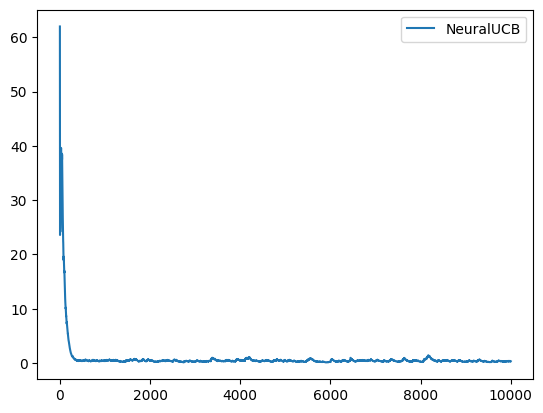

In [21]:
import bluesimulator as bs
from tqdm import tqdm 
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []


neuralagent = Agent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    context_list = SampleContext(d = d,K = K)
    realized_reward = GetRealReward(context_list,A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    neuralUCB_ind = neuralagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))



    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralagent.Update(neuralUCB_reward)
    

    

import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

plt.legend()
plt.show()


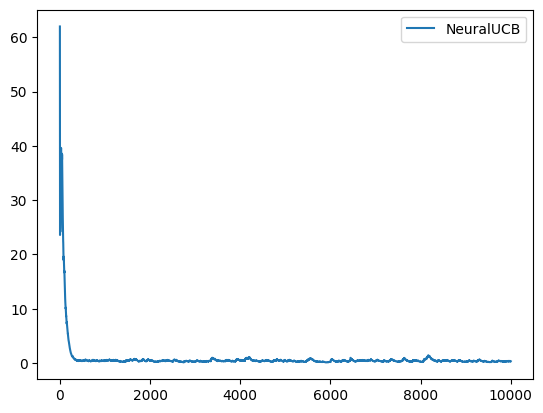

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

plt.legend()
plt.show()

### LinUCB DEMO CODE

In [12]:
# import bluebandits 
from bluebandits.LinUCB import *

In [13]:
import numpy as np
import random
from copy import deepcopy

In [14]:
#Bandit Settings
T = 5000
d = 4
K = 4

noise_std = 0.1
confidence_scaling_factor = noise_std

# Set the parameter of the game
np.random.seed(12345)

A1 = np.random.normal(loc=0, scale=1, size=(d, d))

In [15]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1

linearagent = Agent(K = K,T=T,d=d,A=A,theta=theta,X=X,p=p,alpha=alpha)
bestagent = BestAgent(K, T, d, A = A1)
uniformagent = UniformAgent(K, T, d)
for tt in range(1, T + 1):
    
    # observe \{x_{t,a}\}_{a=1}^{k=1}
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A = A1)
    
    # neuralagent
    linear_ind = linearagent.Action(context_list)# make a decision
    linear_reward = realized_reward[linear_ind]# play neural_ind-th arm and observe reward
    linearagent.Update(linear_reward)
    
    # bestagent
    best_ind = bestagent.Action(context_list)# make a decision
    best_reward = realized_reward[best_ind]# play best_ind-th arm and observe reward
    bestagent.Update(best_reward)
    
    # uniformagent
    uniform_ind = uniformagent.Action(context_list)# make a decision
    uniform_reward = realized_reward[uniform_ind]# play uniform_ind-th arm and observe reward
    uniformagent.Update(uniform_reward)
    
    print("round index {:d}; neural choose {:d}, reward is {:f}; best choose {:d}, reward is {:f}".format(tt,
                                                                                                          linear_ind,
                                                                                                          linear_reward,
                                                                                                          best_ind,
                                                                                                          best_reward,))
        

round index 1; neural choose 2, reward is 1.258408; best choose 3, reward is 6.669358
round index 2; neural choose 3, reward is 4.811605; best choose 2, reward is 6.359575
round index 3; neural choose 1, reward is 4.064317; best choose 2, reward is 6.729953
round index 4; neural choose 1, reward is 0.577922; best choose 3, reward is 6.525285
round index 5; neural choose 3, reward is 2.964742; best choose 1, reward is 4.905002
round index 6; neural choose 2, reward is 5.953158; best choose 0, reward is 6.402797
round index 7; neural choose 0, reward is 0.442801; best choose 2, reward is 6.689367
round index 8; neural choose 0, reward is 0.820933; best choose 3, reward is 4.822526
round index 9; neural choose 3, reward is 1.878588; best choose 0, reward is 5.817276
round index 10; neural choose 2, reward is 3.506658; best choose 3, reward is 5.727504
round index 11; neural choose 3, reward is 1.829252; best choose 2, reward is 5.028167
round index 12; neural choose 0, reward is 4.317185;

Text(0, 0.5, 'Total Reward')

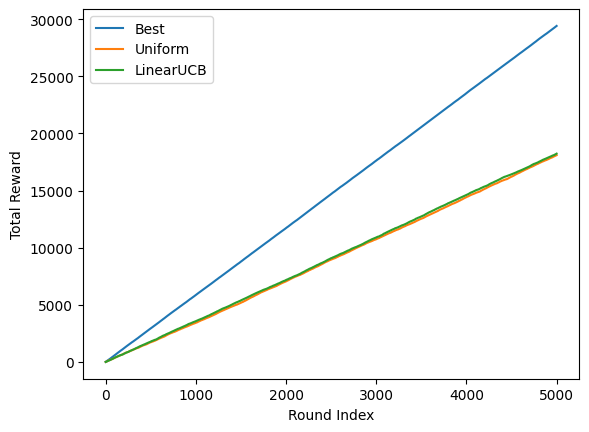

In [16]:
# plot the ratio of cumulated reward
import matplotlib.pyplot as plt
h_r_b = bestagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_b))

h_r_u = uniformagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_u))

h_r_n = deepcopy(linearagent.history_reward)
plt.plot(range(0, T), np.cumsum(h_r_n))

plt.legend(["Best", "Uniform", "LinearUCB"])
plt.xlabel("Round Index")
plt.ylabel("Total Reward")

Text(0.5, 1.0, 'The ratio of reward')

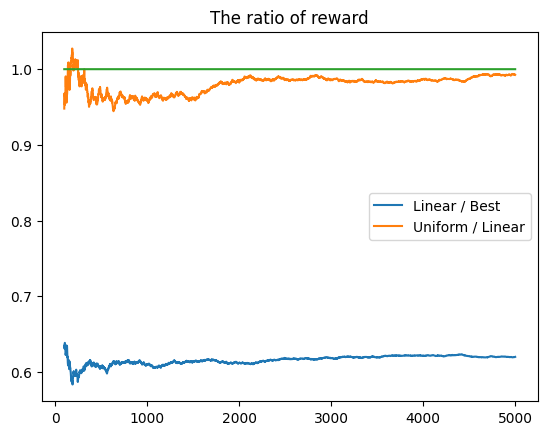

In [17]:
plt.plot(range(100, T), np.cumsum(h_r_n)[100:T] / np.cumsum(h_r_b)[100:T])
plt.plot(range(100, T), np.cumsum(h_r_u)[100:T] / np.cumsum(h_r_n)[100:T])
plt.legend(["Linear / Best", "Uniform / Linear"])
plt.plot(range(100, T), np.ones(T)[100:T])
#plt.plot(range(100, T), 0.95 * np.ones(T)[100:T])
plt.title("The ratio of reward")

### Action Rank vs T

In [1]:
from tqdm import tqdm
import numpy as np
import bluebandits as bb


In [125]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 
K = 4# Total number of actions, 
T = 2666 # Total number of periods
d = 4 # the dimension of context
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
A = np.random.normal(loc=0, scale=1, size=(d, d))
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A1 = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1

In [63]:
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []
from bluebandits.NeuralUCB.agent import Agent
neuralUCBagent = Agent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)
from bluebandits.NeuralThompsonSampling.agent import Agent
neuralTSagent = Agent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
from bluebandits.LinUCB.agent import Agent
linearagent = bb.LinUCB.agent.Agent(K = K,T=T,d=d,A=A1,theta=theta,X=X,p=p,alpha=alpha)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    context_list = SampleContext(d, K)
    realized_reward = GetRealReward(context_list, A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neuralUCB_ind = neuralUCBagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))

    neuralTS_ind = neuralTSagent.Action(context_list)
    action_list_TS.append(neuralTS_ind)
    action_rank_TS.append(list(action_order).index(neuralTS_ind))

    linearUCB_ind = linearagent.Action(context_list)
    action_list_LinUCB.append(linearUCB_ind)
    action_rank_LinUCB.append(list(action_order).index(linearUCB_ind))




    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralUCBagent.Update(neuralUCB_reward)

    neuralTS_reward = realized_reward[neuralTS_ind]
    neuralTSagent.Update(neuralTS_reward)

    LinUCB_reward = realized_reward[linearUCB_ind]
    linearagent.Update(LinUCB_reward)

    

Using device cpu
Using device cpu


  0%|          | 0/5000 [00:00<?, ?it/s]

  1%|          | 42/5000 [00:00<01:04, 77.01it/s]

20 training epoch, mean loss value is 9.808257453056871
40 training epoch, mean loss value is 6.89169433769558
20 training epoch, mean loss value is 8.088521577849136
40 training epoch, mean loss value is 6.074313285677846


  2%|▏         | 100/5000 [00:01<01:29, 55.04it/s]

20 training epoch, mean loss value is 5.001202958394693
40 training epoch, mean loss value is 3.8932946859422675
60 training epoch, mean loss value is 2.7448937460009035
80 training epoch, mean loss value is 1.6898613129418378
20 training epoch, mean loss value is 6.095001351233718
40 training epoch, mean loss value is 4.317029338646801
60 training epoch, mean loss value is 2.6000685008960867
80 training epoch, mean loss value is 1.3093038977908595


  3%|▎         | 140/5000 [00:02<01:04, 75.66it/s]

20 training epoch, mean loss value is 4.547821138538591
40 training epoch, mean loss value is 2.5826257991817982
60 training epoch, mean loss value is 1.1245121027632534
80 training epoch, mean loss value is 0.47828410812618055
100 training epoch, mean loss value is 0.22352805710699916
20 training epoch, mean loss value is 5.223898068488002
40 training epoch, mean loss value is 2.5958936939008814
60 training epoch, mean loss value is 0.8794063026901423


  3%|▎         | 150/5000 [00:02<01:37, 49.65it/s]

80 training epoch, mean loss value is 0.2716793960082797
100 training epoch, mean loss value is 0.09973702819476804


  4%|▍         | 193/5000 [00:03<01:18, 60.88it/s]

20 training epoch, mean loss value is 3.925021772312369
40 training epoch, mean loss value is 0.9704995300543395
60 training epoch, mean loss value is 0.311262429066304
80 training epoch, mean loss value is 0.13026035968884747
100 training epoch, mean loss value is 0.0627479274671574
20 training epoch, mean loss value is 4.26857391374193


  4%|▍         | 200/5000 [00:04<02:14, 35.65it/s]

40 training epoch, mean loss value is 0.9376653294368565
60 training epoch, mean loss value is 0.2106718291600911
80 training epoch, mean loss value is 0.07110737135859627
100 training epoch, mean loss value is 0.04061512064024012


  5%|▍         | 242/5000 [00:04<01:07, 70.97it/s]

20 training epoch, mean loss value is 2.3602886225906943
40 training epoch, mean loss value is 0.35419437487285355
60 training epoch, mean loss value is 0.1319751379723439
80 training epoch, mean loss value is 0.06042385041774569
100 training epoch, mean loss value is 0.03403241370298203
20 training epoch, mean loss value is 3.0459320620807846
40 training epoch, mean loss value is 0.39505985408925853
60 training epoch, mean loss value is 0.07371008056707785
80 training epoch, mean loss value is 0.03188079731778048
100 training epoch, mean loss value is 0.023781063318338253


  6%|▌         | 297/5000 [00:05<01:07, 69.80it/s]

20 training epoch, mean loss value is 1.0003719339113837
40 training epoch, mean loss value is 0.21391441815773363
60 training epoch, mean loss value is 0.08298319037799848
80 training epoch, mean loss value is 0.040888680196153236
100 training epoch, mean loss value is 0.025661590520116243
20 training epoch, mean loss value is 1.7452217773319516
40 training epoch, mean loss value is 0.1777494166718754
60 training epoch, mean loss value is 0.044257898378338996
80 training epoch, mean loss value is 0.027546221773608517
100 training epoch, mean loss value is 0.022533330525133278


  7%|▋         | 344/5000 [00:06<01:14, 62.30it/s]

20 training epoch, mean loss value is 0.5439200480442123
40 training epoch, mean loss value is 0.14723892919133238
60 training epoch, mean loss value is 0.05833547868308109
80 training epoch, mean loss value is 0.03095805305338989
100 training epoch, mean loss value is 0.021471636034797712
20 training epoch, mean loss value is 1.1483229710324696
40 training epoch, mean loss value is 0.09317500237872481
60 training epoch, mean loss value is 0.029781572108367984
80 training epoch, mean loss value is 0.022155486610760212
100 training epoch, mean loss value is 0.018827205752050404


  8%|▊         | 390/5000 [00:08<01:21, 56.61it/s]

20 training epoch, mean loss value is 0.3845037023499453
40 training epoch, mean loss value is 0.11222385741422594
60 training epoch, mean loss value is 0.04652965959427089
80 training epoch, mean loss value is 0.02684502443027405
100 training epoch, mean loss value is 0.019976323606070982
20 training epoch, mean loss value is 0.7502310266578934
40 training epoch, mean loss value is 0.06617285910032708
60 training epoch, mean loss value is 0.027206491941709068
80 training epoch, mean loss value is 0.0213350529302586
100 training epoch, mean loss value is 0.01825723464537812


  9%|▉         | 444/5000 [00:09<01:19, 57.07it/s]

20 training epoch, mean loss value is 0.3081601366734252
40 training epoch, mean loss value is 0.08960221009727938
60 training epoch, mean loss value is 0.03821302021669524
80 training epoch, mean loss value is 0.023532797685726137
100 training epoch, mean loss value is 0.018356719877324984
20 training epoch, mean loss value is 0.4839637206789601
40 training epoch, mean loss value is 0.0399876502862396
60 training epoch, mean loss value is 0.02133633927907342
80 training epoch, mean loss value is 0.017800988799132986
100 training epoch, mean loss value is 0.015819885571765335


 10%|▉         | 499/5000 [00:11<01:14, 60.10it/s]

20 training epoch, mean loss value is 0.26825944999572626
40 training epoch, mean loss value is 0.07369133734842002
60 training epoch, mean loss value is 0.03207317543217904
80 training epoch, mean loss value is 0.021101711286610626
100 training epoch, mean loss value is 0.0172390681013909
20 training epoch, mean loss value is 0.3507325463226048
40 training epoch, mean loss value is 0.034523199286201345
60 training epoch, mean loss value is 0.021725300098609977
80 training epoch, mean loss value is 0.017924133414431682
100 training epoch, mean loss value is 0.01574551902732685


 11%|█         | 543/5000 [00:12<01:34, 47.34it/s]

20 training epoch, mean loss value is 0.23101525733025435
40 training epoch, mean loss value is 0.06278466737951084
60 training epoch, mean loss value is 0.02863149382727882
80 training epoch, mean loss value is 0.019671548236596743
100 training epoch, mean loss value is 0.01649539671172778
20 training epoch, mean loss value is 0.2479588615080187
40 training epoch, mean loss value is 0.028857726706086936
60 training epoch, mean loss value is 0.020038723827844173
80 training epoch, mean loss value is 0.016734999868606628
100 training epoch, mean loss value is 0.014834745504785345


 12%|█▏        | 588/5000 [00:14<01:39, 44.48it/s]

20 training epoch, mean loss value is 0.19956736547579793
40 training epoch, mean loss value is 0.053947443888078046
60 training epoch, mean loss value is 0.025879559944429507
80 training epoch, mean loss value is 0.018566035560823178
100 training epoch, mean loss value is 0.015864428540377732
20 training epoch, mean loss value is 0.17032057373782228
40 training epoch, mean loss value is 0.025847170772535732
60 training epoch, mean loss value is 0.01901065040830499


 12%|█▏        | 600/5000 [00:15<03:25, 21.43it/s]

80 training epoch, mean loss value is 0.015918648094228976
100 training epoch, mean loss value is 0.014200260846047643


 13%|█▎        | 642/5000 [00:16<01:28, 49.14it/s]

20 training epoch, mean loss value is 0.17486115782573758
40 training epoch, mean loss value is 0.04812775077047263
60 training epoch, mean loss value is 0.024186272825567606
80 training epoch, mean loss value is 0.017872600066159223
100 training epoch, mean loss value is 0.015413141219714972
20 training epoch, mean loss value is 0.12229317640827864
40 training epoch, mean loss value is 0.023136391363159096
60 training epoch, mean loss value is 0.017539967975694105
80 training epoch, mean loss value is 0.014920717698429453
100 training epoch, mean loss value is 0.013466861549875838


 14%|█▍        | 699/5000 [00:17<01:21, 52.45it/s]

20 training epoch, mean loss value is 0.15749503338166337
40 training epoch, mean loss value is 0.044201855600920124
60 training epoch, mean loss value is 0.0229540546672077
80 training epoch, mean loss value is 0.017322363933288475
100 training epoch, mean loss value is 0.015079249367405099
20 training epoch, mean loss value is 0.09043934848872848
40 training epoch, mean loss value is 0.02005770345023398
60 training epoch, mean loss value is 0.015897313964256615
80 training epoch, mean loss value is 0.013896701296702271
100 training epoch, mean loss value is 0.0128313986011512


 15%|█▍        | 742/5000 [00:19<01:49, 38.88it/s]

20 training epoch, mean loss value is 0.13982281928044998
40 training epoch, mean loss value is 0.03912892666287134
60 training epoch, mean loss value is 0.02135463985562564
80 training epoch, mean loss value is 0.0166281706053162
100 training epoch, mean loss value is 0.014608629530840292
20 training epoch, mean loss value is 0.07242575353401187
40 training epoch, mean loss value is 0.020028052745242532
60 training epoch, mean loss value is 0.015729463242770816
80 training epoch, mean loss value is 0.01374561159197508
100 training epoch, mean loss value is 0.012700530371947396


 16%|█▌        | 792/5000 [00:21<01:49, 38.46it/s]

20 training epoch, mean loss value is 0.1275690505259993
40 training epoch, mean loss value is 0.03531613109621569
60 training epoch, mean loss value is 0.020104526108586422
80 training epoch, mean loss value is 0.016053109261531855
100 training epoch, mean loss value is 0.014244107586496062
20 training epoch, mean loss value is 0.05521941658102758
40 training epoch, mean loss value is 0.01910133402562384
60 training epoch, mean loss value is 0.015077318311207805


 16%|█▌        | 800/5000 [00:23<04:58, 14.05it/s]

80 training epoch, mean loss value is 0.013247309567066587
100 training epoch, mean loss value is 0.012362491607243342


 17%|█▋        | 838/5000 [00:24<01:45, 39.38it/s]

20 training epoch, mean loss value is 0.11376717147301542
40 training epoch, mean loss value is 0.032371102533371776
60 training epoch, mean loss value is 0.019299937381356564
80 training epoch, mean loss value is 0.015698847146080757
100 training epoch, mean loss value is 0.014002224290130127
20 training epoch, mean loss value is 0.048576127148214444
40 training epoch, mean loss value is 0.019280662171684847
60 training epoch, mean loss value is 0.015164964386458077


 17%|█▋        | 850/5000 [00:25<04:20, 15.91it/s]

80 training epoch, mean loss value is 0.013352371959036668
100 training epoch, mean loss value is 0.012479761870057931


 18%|█▊        | 889/5000 [00:26<01:40, 40.92it/s]

20 training epoch, mean loss value is 0.10317821206900725
40 training epoch, mean loss value is 0.029951909214760413
60 training epoch, mean loss value is 0.01857879206320213
80 training epoch, mean loss value is 0.015290535791072387
100 training epoch, mean loss value is 0.013710483963597092
20 training epoch, mean loss value is 0.043760443212103414
40 training epoch, mean loss value is 0.0192167109640924
60 training epoch, mean loss value is 0.015105011266946546
80 training epoch, mean loss value is 0.013318467751084924
100 training epoch, mean loss value is 0.012493773531501507


 19%|█▉        | 940/5000 [00:28<01:43, 39.19it/s]

20 training epoch, mean loss value is 0.09604537834290955
40 training epoch, mean loss value is 0.02814439866694775
60 training epoch, mean loss value is 0.018040487709719038
80 training epoch, mean loss value is 0.014980405348997968
100 training epoch, mean loss value is 0.013412009193668318
20 training epoch, mean loss value is 0.03599845444325039
40 training epoch, mean loss value is 0.017686596649560907
60 training epoch, mean loss value is 0.014069355956678497


 19%|█▉        | 950/5000 [00:30<04:47, 14.07it/s]

80 training epoch, mean loss value is 0.01261597688701569
100 training epoch, mean loss value is 0.011947860346133161


 20%|█▉        | 990/5000 [00:30<01:42, 39.28it/s]

20 training epoch, mean loss value is 0.08695314777709348
40 training epoch, mean loss value is 0.02623057741257534
60 training epoch, mean loss value is 0.017422052117100097
80 training epoch, mean loss value is 0.014604993690135687
100 training epoch, mean loss value is 0.013148565577945606
20 training epoch, mean loss value is 0.03060691832592487
40 training epoch, mean loss value is 0.016700053016125517
60 training epoch, mean loss value is 0.013538839045853268


 20%|██        | 1000/5000 [00:32<04:45, 14.00it/s]

80 training epoch, mean loss value is 0.01229459383958911
100 training epoch, mean loss value is 0.011736301559236714


 21%|██        | 1039/5000 [00:33<02:01, 32.57it/s]

20 training epoch, mean loss value is 0.08083970012818001
40 training epoch, mean loss value is 0.024626511274606227
60 training epoch, mean loss value is 0.016817281705002025
80 training epoch, mean loss value is 0.014223940083807144
100 training epoch, mean loss value is 0.01285977224735135
20 training epoch, mean loss value is 0.029149876676838226
40 training epoch, mean loss value is 0.016484139445762495
60 training epoch, mean loss value is 0.013359348259644606


 21%|██        | 1050/5000 [00:35<05:03, 13.02it/s]

80 training epoch, mean loss value is 0.012217218043725562
100 training epoch, mean loss value is 0.011703409052665268


 22%|██▏       | 1096/5000 [00:36<01:32, 42.08it/s]

20 training epoch, mean loss value is 0.0736820476119618
40 training epoch, mean loss value is 0.023233734433643197
60 training epoch, mean loss value is 0.016275080444785844
80 training epoch, mean loss value is 0.01391343579166679
100 training epoch, mean loss value is 0.012677029140616186
20 training epoch, mean loss value is 0.028148545354579727
40 training epoch, mean loss value is 0.0163573502646743
60 training epoch, mean loss value is 0.013276623803516836
80 training epoch, mean loss value is 0.012187626677655689
100 training epoch, mean loss value is 0.011707766187175294


 23%|██▎       | 1138/5000 [00:38<02:10, 29.50it/s]

20 training epoch, mean loss value is 0.06980614437398958
40 training epoch, mean loss value is 0.022530451322876403
60 training epoch, mean loss value is 0.016059229067947257
80 training epoch, mean loss value is 0.013735307721169593
100 training epoch, mean loss value is 0.012509922865631753
20 training epoch, mean loss value is 0.02912686010275735
40 training epoch, mean loss value is 0.016716236152685474
60 training epoch, mean loss value is 0.013506910095482149
80 training epoch, mean loss value is 0.012405803215928305


 23%|██▎       | 1150/5000 [00:40<05:12, 12.33it/s]

100 training epoch, mean loss value is 0.011925533684218604


 24%|██▍       | 1192/5000 [00:41<01:47, 35.34it/s]

20 training epoch, mean loss value is 0.06369661944622823
40 training epoch, mean loss value is 0.021531194212506353
60 training epoch, mean loss value is 0.015756831765968426
80 training epoch, mean loss value is 0.01356527403906907
100 training epoch, mean loss value is 0.012417053162403732
20 training epoch, mean loss value is 0.027257095446694465
40 training epoch, mean loss value is 0.016072013617372566
60 training epoch, mean loss value is 0.013226419635162051
80 training epoch, mean loss value is 0.012260043044983649
100 training epoch, mean loss value is 0.01183112797109607


 25%|██▍       | 1246/5000 [00:44<01:50, 33.92it/s]

20 training epoch, mean loss value is 0.058942641143323836
40 training epoch, mean loss value is 0.02067281561472945
60 training epoch, mean loss value is 0.015416678276507261
80 training epoch, mean loss value is 0.013350538030746116
100 training epoch, mean loss value is 0.012293171854171073
20 training epoch, mean loss value is 0.026514881398707515
40 training epoch, mean loss value is 0.01588192231650296
60 training epoch, mean loss value is 0.01315936338575952
80 training epoch, mean loss value is 0.012263902680636167
100 training epoch, mean loss value is 0.01186154418735185


 26%|██▌       | 1291/5000 [00:47<02:11, 28.22it/s]

20 training epoch, mean loss value is 0.05597591435287043
40 training epoch, mean loss value is 0.020192586945822162
60 training epoch, mean loss value is 0.015189789058900154
80 training epoch, mean loss value is 0.01320298033311701
100 training epoch, mean loss value is 0.012156750223325673
20 training epoch, mean loss value is 0.026169942881239337
40 training epoch, mean loss value is 0.015757818115911145
60 training epoch, mean loss value is 0.01314062313291676
80 training epoch, mean loss value is 0.012271437675278515
100 training epoch, mean loss value is 0.011879355156034247


 27%|██▋       | 1348/5000 [00:50<01:43, 35.16it/s]

20 training epoch, mean loss value is 0.052554587985186925
40 training epoch, mean loss value is 0.019643005187422596
60 training epoch, mean loss value is 0.014964565796443556
80 training epoch, mean loss value is 0.013075004659328269
100 training epoch, mean loss value is 0.012073397609731217
20 training epoch, mean loss value is 0.02755314495894878
40 training epoch, mean loss value is 0.01618701289831691
60 training epoch, mean loss value is 0.013478313062572944
80 training epoch, mean loss value is 0.012586681299002443
100 training epoch, mean loss value is 0.012141160651421012


 28%|██▊       | 1389/5000 [00:53<02:25, 24.79it/s]

20 training epoch, mean loss value is 0.049699254136597634
40 training epoch, mean loss value is 0.019107565320062386
60 training epoch, mean loss value is 0.01468054876412012
80 training epoch, mean loss value is 0.012862097935316705
100 training epoch, mean loss value is 0.01190780962358218
20 training epoch, mean loss value is 0.027752835553026423
40 training epoch, mean loss value is 0.015911014884896525
60 training epoch, mean loss value is 0.01311820819461775
80 training epoch, mean loss value is 0.012239328502467815


 28%|██▊       | 1400/5000 [00:55<06:01,  9.95it/s]

100 training epoch, mean loss value is 0.01184576449691023


 29%|██▉       | 1442/5000 [00:56<01:58, 29.95it/s]

20 training epoch, mean loss value is 0.047903826695418934
40 training epoch, mean loss value is 0.018808394970988525
60 training epoch, mean loss value is 0.014536483048274661
80 training epoch, mean loss value is 0.012769273177423202
100 training epoch, mean loss value is 0.011869723703796959
20 training epoch, mean loss value is 0.027493343005552482
40 training epoch, mean loss value is 0.016018643821007417
60 training epoch, mean loss value is 0.013269707456010657
80 training epoch, mean loss value is 0.012290111059733055
100 training epoch, mean loss value is 0.011810895031334898


 30%|██▉       | 1498/5000 [00:59<01:45, 33.22it/s]

20 training epoch, mean loss value is 0.045696595444869835
40 training epoch, mean loss value is 0.018449278307998196
60 training epoch, mean loss value is 0.01432104912969579
80 training epoch, mean loss value is 0.012614909734759917
100 training epoch, mean loss value is 0.011749017961064097
20 training epoch, mean loss value is 0.02343843679130342
40 training epoch, mean loss value is 0.014599625687434678
60 training epoch, mean loss value is 0.01255905822271036
80 training epoch, mean loss value is 0.011908701288264644
100 training epoch, mean loss value is 0.011590691883601375


 31%|███       | 1546/5000 [01:03<02:12, 26.16it/s]

20 training epoch, mean loss value is 0.04324692925442775
40 training epoch, mean loss value is 0.018054780074094848
60 training epoch, mean loss value is 0.014164770840136245
80 training epoch, mean loss value is 0.012553385515619018
100 training epoch, mean loss value is 0.011753294718518936
20 training epoch, mean loss value is 0.022577961175497378
40 training epoch, mean loss value is 0.014291104246831629
60 training epoch, mean loss value is 0.012428949914557843
80 training epoch, mean loss value is 0.011828109922373275
100 training epoch, mean loss value is 0.011511789279145474


 32%|███▏      | 1598/5000 [01:06<02:01, 27.96it/s]

20 training epoch, mean loss value is 0.04096616985260925
40 training epoch, mean loss value is 0.01770209925769541
60 training epoch, mean loss value is 0.014001807139451131
80 training epoch, mean loss value is 0.012440216064620261
100 training epoch, mean loss value is 0.011687764053933172
20 training epoch, mean loss value is 0.02389644256865286
40 training epoch, mean loss value is 0.014728110711201156
60 training epoch, mean loss value is 0.01276784008583674
80 training epoch, mean loss value is 0.012107509886532645
100 training epoch, mean loss value is 0.011770827426311756


 33%|███▎      | 1642/5000 [01:10<02:33, 21.94it/s]

20 training epoch, mean loss value is 0.03981228928186436
40 training epoch, mean loss value is 0.01758768726036371
60 training epoch, mean loss value is 0.013895806206732787
80 training epoch, mean loss value is 0.012370396671171815
100 training epoch, mean loss value is 0.011646994382718965
20 training epoch, mean loss value is 0.022397152221023578
40 training epoch, mean loss value is 0.014237825830557894
60 training epoch, mean loss value is 0.012532786015583648
80 training epoch, mean loss value is 0.011949784880656216
100 training epoch, mean loss value is 0.011638268314556523


 34%|███▍      | 1693/5000 [01:14<02:04, 26.62it/s]

20 training epoch, mean loss value is 0.0379564467672527
40 training epoch, mean loss value is 0.017224396867180598
60 training epoch, mean loss value is 0.013716732807737357
80 training epoch, mean loss value is 0.012252776027104279
100 training epoch, mean loss value is 0.011581416330064657
20 training epoch, mean loss value is 0.022343609242232824
40 training epoch, mean loss value is 0.014184820174770124
60 training epoch, mean loss value is 0.012532049828578817
80 training epoch, mean loss value is 0.011966379343346914
100 training epoch, mean loss value is 0.011659908811882117


 35%|███▍      | 1747/5000 [01:17<01:52, 28.88it/s]

20 training epoch, mean loss value is 0.03648901945777451
40 training epoch, mean loss value is 0.016962528141115273
60 training epoch, mean loss value is 0.01357666817825543
80 training epoch, mean loss value is 0.012182434480770072
100 training epoch, mean loss value is 0.011551266007746112
20 training epoch, mean loss value is 0.02249512066125999
40 training epoch, mean loss value is 0.014091628950920984
60 training epoch, mean loss value is 0.01240968052488942
80 training epoch, mean loss value is 0.01183781645367197
100 training epoch, mean loss value is 0.01154426868706064


 36%|███▌      | 1788/5000 [01:21<02:33, 20.88it/s]

20 training epoch, mean loss value is 0.03530960817028192
40 training epoch, mean loss value is 0.016782281232046944
60 training epoch, mean loss value is 0.013477872627495774
80 training epoch, mean loss value is 0.012122055066950592
100 training epoch, mean loss value is 0.011516821603293816
20 training epoch, mean loss value is 0.021855925006840752
40 training epoch, mean loss value is 0.013916568538108822
60 training epoch, mean loss value is 0.012376155503996629
80 training epoch, mean loss value is 0.011822705178369131


 36%|███▌      | 1800/5000 [01:24<06:32,  8.15it/s]

100 training epoch, mean loss value is 0.011524572528361102


 37%|███▋      | 1840/5000 [01:25<02:06, 24.90it/s]

20 training epoch, mean loss value is 0.0340855347466628
40 training epoch, mean loss value is 0.016518382973382036
60 training epoch, mean loss value is 0.013333741892755695
80 training epoch, mean loss value is 0.012036905322733287
100 training epoch, mean loss value is 0.011459913811917972
20 training epoch, mean loss value is 0.021391007626171854
40 training epoch, mean loss value is 0.013756481879268118
60 training epoch, mean loss value is 0.01228455778547807
80 training epoch, mean loss value is 0.01175470230409203


 37%|███▋      | 1850/5000 [01:29<06:54,  7.60it/s]

100 training epoch, mean loss value is 0.01147199485513864


 38%|███▊      | 1887/5000 [01:29<02:12, 23.55it/s]

20 training epoch, mean loss value is 0.033177061200641955
40 training epoch, mean loss value is 0.016361705707491205
60 training epoch, mean loss value is 0.013236741324613836
80 training epoch, mean loss value is 0.011989687234128755
100 training epoch, mean loss value is 0.0114366887324926
20 training epoch, mean loss value is 0.0202014269971374
40 training epoch, mean loss value is 0.0134652354891926
60 training epoch, mean loss value is 0.012160833532935093
80 training epoch, mean loss value is 0.011672813618689321


 38%|███▊      | 1900/5000 [01:33<06:37,  7.80it/s]

100 training epoch, mean loss value is 0.011390664821632049


 39%|███▉      | 1940/5000 [01:34<02:03, 24.86it/s]

20 training epoch, mean loss value is 0.03209718527046371
40 training epoch, mean loss value is 0.016167332885886995
60 training epoch, mean loss value is 0.013119156590561638
80 training epoch, mean loss value is 0.011914382531197924
100 training epoch, mean loss value is 0.011409944673492916
20 training epoch, mean loss value is 0.021181652124317368
40 training epoch, mean loss value is 0.013608810653861513
60 training epoch, mean loss value is 0.012178275588303417
80 training epoch, mean loss value is 0.011705978533489021


 39%|███▉      | 1950/5000 [01:37<06:44,  7.54it/s]

100 training epoch, mean loss value is 0.01145255042512347


 40%|███▉      | 1991/5000 [01:38<02:00, 24.98it/s]

20 training epoch, mean loss value is 0.030944188954403724
40 training epoch, mean loss value is 0.015976502742456204
60 training epoch, mean loss value is 0.013038367039871707
80 training epoch, mean loss value is 0.011878600362620898
100 training epoch, mean loss value is 0.011387364648061307
20 training epoch, mean loss value is 0.02062678244910815
40 training epoch, mean loss value is 0.013507871493824089
60 training epoch, mean loss value is 0.012142365709208217
80 training epoch, mean loss value is 0.011688926083468418
100 training epoch, mean loss value is 0.011441052657818392


 41%|████      | 2043/5000 [01:42<01:58, 24.87it/s]

20 training epoch, mean loss value is 0.029943390925354987
40 training epoch, mean loss value is 0.015717126998117337
60 training epoch, mean loss value is 0.012921602695780222
80 training epoch, mean loss value is 0.011819545809119435
100 training epoch, mean loss value is 0.011361678432133593
20 training epoch, mean loss value is 0.019053085335775273
40 training epoch, mean loss value is 0.013173120092742505
60 training epoch, mean loss value is 0.012050045901907079
80 training epoch, mean loss value is 0.011616144601241026
100 training epoch, mean loss value is 0.011349337458971058


 42%|████▏     | 2099/5000 [01:47<01:50, 26.18it/s]

20 training epoch, mean loss value is 0.029023357497086906
40 training epoch, mean loss value is 0.01551774857109187
60 training epoch, mean loss value is 0.012771095527985952
80 training epoch, mean loss value is 0.011718811585099494
100 training epoch, mean loss value is 0.011280707975479093
20 training epoch, mean loss value is 0.01838679132142073
40 training epoch, mean loss value is 0.01289796799936733
60 training epoch, mean loss value is 0.011854993290802038
80 training epoch, mean loss value is 0.011433572921649501
100 training epoch, mean loss value is 0.011203317779416222


 43%|████▎     | 2146/5000 [01:51<02:23, 19.91it/s]

20 training epoch, mean loss value is 0.028324947823354093
40 training epoch, mean loss value is 0.015374107879262553
60 training epoch, mean loss value is 0.0127065873934236
80 training epoch, mean loss value is 0.011688713874747158
100 training epoch, mean loss value is 0.01128091285315494
20 training epoch, mean loss value is 0.019245045217397047
40 training epoch, mean loss value is 0.013039628765486788
60 training epoch, mean loss value is 0.011941402859145297
80 training epoch, mean loss value is 0.011534425142831109
100 training epoch, mean loss value is 0.01130703207529664


 44%|████▍     | 2189/5000 [01:56<02:46, 16.88it/s]

20 training epoch, mean loss value is 0.02768240647640341
40 training epoch, mean loss value is 0.015226416785143413
60 training epoch, mean loss value is 0.012635228067958549
80 training epoch, mean loss value is 0.011651934648525188
100 training epoch, mean loss value is 0.011255144393323884
20 training epoch, mean loss value is 0.017142860476801792
40 training epoch, mean loss value is 0.012400244167775852
60 training epoch, mean loss value is 0.011497306690558207
80 training epoch, mean loss value is 0.011136619238708704


 44%|████▍     | 2200/5000 [02:00<07:04,  6.60it/s]

100 training epoch, mean loss value is 0.010941486310161157


 45%|████▍     | 2239/5000 [02:00<02:14, 20.53it/s]

20 training epoch, mean loss value is 0.027210674086950066
40 training epoch, mean loss value is 0.015166523484076738
60 training epoch, mean loss value is 0.012604909345399378
80 training epoch, mean loss value is 0.011653856524140452
100 training epoch, mean loss value is 0.01125923845672704
20 training epoch, mean loss value is 0.01729793302862405
40 training epoch, mean loss value is 0.012485151495791253
60 training epoch, mean loss value is 0.01160775034244904
80 training epoch, mean loss value is 0.011234901923005353


 45%|████▌     | 2250/5000 [02:04<07:05,  6.46it/s]

100 training epoch, mean loss value is 0.011015295675247175


 46%|████▌     | 2291/5000 [02:05<02:01, 22.28it/s]

20 training epoch, mean loss value is 0.026517093153437695
40 training epoch, mean loss value is 0.014962535189851503
60 training epoch, mean loss value is 0.01249607121985179
80 training epoch, mean loss value is 0.01159711018615454
100 training epoch, mean loss value is 0.011227363760892119
20 training epoch, mean loss value is 0.017913817180648495
40 training epoch, mean loss value is 0.012799382968871991
60 training epoch, mean loss value is 0.011877712839871745
80 training epoch, mean loss value is 0.011488860227000968
100 training epoch, mean loss value is 0.011251000292974156


 47%|████▋     | 2349/5000 [02:10<01:48, 24.40it/s]

20 training epoch, mean loss value is 0.025703514589676797
40 training epoch, mean loss value is 0.014759452727634065
60 training epoch, mean loss value is 0.012399559173287661
80 training epoch, mean loss value is 0.011568509528348989
100 training epoch, mean loss value is 0.011230317930800066
20 training epoch, mean loss value is 0.017648401527312233
40 training epoch, mean loss value is 0.01276171302334688
60 training epoch, mean loss value is 0.0118659682562099
80 training epoch, mean loss value is 0.011487736434908075
100 training epoch, mean loss value is 0.011240800578220876


 48%|████▊     | 2395/5000 [02:15<02:23, 18.17it/s]

20 training epoch, mean loss value is 0.025549613092798063
40 training epoch, mean loss value is 0.01474203776984293
60 training epoch, mean loss value is 0.012358290879262003
80 training epoch, mean loss value is 0.011535617828286373
100 training epoch, mean loss value is 0.011194892116474155
20 training epoch, mean loss value is 0.01784680972778673
40 training epoch, mean loss value is 0.012641323283054376
60 training epoch, mean loss value is 0.011760488855719155
80 training epoch, mean loss value is 0.011416722943567756
100 training epoch, mean loss value is 0.011211737675811082


 49%|████▉     | 2439/5000 [02:20<02:38, 16.12it/s]

20 training epoch, mean loss value is 0.024676870298293102
40 training epoch, mean loss value is 0.014495480813872714
60 training epoch, mean loss value is 0.01222016851186743
80 training epoch, mean loss value is 0.011448999700179244
100 training epoch, mean loss value is 0.011139454629080054
20 training epoch, mean loss value is 0.0169541294125749
40 training epoch, mean loss value is 0.01257457634736106
60 training epoch, mean loss value is 0.011757970730825443
80 training epoch, mean loss value is 0.01138928868387737


 49%|████▉     | 2450/5000 [02:24<06:59,  6.08it/s]

100 training epoch, mean loss value is 0.011158729368850234


 50%|████▉     | 2489/5000 [02:25<02:04, 20.10it/s]

20 training epoch, mean loss value is 0.024294591669919412
40 training epoch, mean loss value is 0.014367394112781744
60 training epoch, mean loss value is 0.012131789747147022
80 training epoch, mean loss value is 0.011396654917827438
100 training epoch, mean loss value is 0.011085781398380387
20 training epoch, mean loss value is 0.016112148065232913
40 training epoch, mean loss value is 0.012157226419925752
60 training epoch, mean loss value is 0.011431810044099744
80 training epoch, mean loss value is 0.01111084427210715


 50%|█████     | 2500/5000 [02:30<06:41,  6.22it/s]

100 training epoch, mean loss value is 0.01091451887959884


 51%|█████     | 2543/5000 [02:30<01:53, 21.71it/s]

20 training epoch, mean loss value is 0.023800233189476126
40 training epoch, mean loss value is 0.014190352841748789
60 training epoch, mean loss value is 0.012049756137947249
80 training epoch, mean loss value is 0.011364859577430973
100 training epoch, mean loss value is 0.011079531439132368
20 training epoch, mean loss value is 0.017301001428525486
40 training epoch, mean loss value is 0.012359028826156845
60 training epoch, mean loss value is 0.011620323836510732
80 training epoch, mean loss value is 0.011334052592513471
100 training epoch, mean loss value is 0.011150860377700042


 52%|█████▏    | 2598/5000 [02:35<01:48, 22.15it/s]

20 training epoch, mean loss value is 0.023244474703673322
40 training epoch, mean loss value is 0.014072977750814805
60 training epoch, mean loss value is 0.012007807747527287
80 training epoch, mean loss value is 0.011354666134815674
100 training epoch, mean loss value is 0.011078145545613767
20 training epoch, mean loss value is 0.01693428150001953
40 training epoch, mean loss value is 0.012292307848511005
60 training epoch, mean loss value is 0.011582696070158886
80 training epoch, mean loss value is 0.01130724617556705
100 training epoch, mean loss value is 0.01112357113410867


 53%|█████▎    | 2647/5000 [02:41<02:15, 17.39it/s]

20 training epoch, mean loss value is 0.022858043464954618
40 training epoch, mean loss value is 0.013915620253376785
60 training epoch, mean loss value is 0.011923346740787369
80 training epoch, mean loss value is 0.011304361831425103
100 training epoch, mean loss value is 0.01101167136906923
20 training epoch, mean loss value is 0.01648989173957574
40 training epoch, mean loss value is 0.012414200998086947
60 training epoch, mean loss value is 0.011668436954251986
80 training epoch, mean loss value is 0.01133014199388086
100 training epoch, mean loss value is 0.01111257772340371


 54%|█████▍    | 2692/5000 [02:46<02:30, 15.33it/s]

20 training epoch, mean loss value is 0.022529503183015807
40 training epoch, mean loss value is 0.01382123676106246
60 training epoch, mean loss value is 0.011883453659897823
80 training epoch, mean loss value is 0.011279508852636946
100 training epoch, mean loss value is 0.010993799155091325
20 training epoch, mean loss value is 0.01639013986202226
40 training epoch, mean loss value is 0.011995118235126164
60 training epoch, mean loss value is 0.011407711769004151
80 training epoch, mean loss value is 0.011167869349830663
100 training epoch, mean loss value is 0.011007616135072354


 55%|█████▍    | 2747/5000 [02:52<01:54, 19.61it/s]

20 training epoch, mean loss value is 0.022129104049963228
40 training epoch, mean loss value is 0.013743658401768206
60 training epoch, mean loss value is 0.011861103526841716
80 training epoch, mean loss value is 0.011279393193832705
100 training epoch, mean loss value is 0.01099301815652452
20 training epoch, mean loss value is 0.016082493074060327
40 training epoch, mean loss value is 0.012256510709771937
60 training epoch, mean loss value is 0.011569587452433444
80 training epoch, mean loss value is 0.011259658617516174
100 training epoch, mean loss value is 0.011062761525779747


 56%|█████▌    | 2795/5000 [02:58<02:17, 16.05it/s]

20 training epoch, mean loss value is 0.021607687627131476
40 training epoch, mean loss value is 0.013588063372135835
60 training epoch, mean loss value is 0.011812782399245955
80 training epoch, mean loss value is 0.011249536607303488
100 training epoch, mean loss value is 0.010967285231107403
20 training epoch, mean loss value is 0.015620260514495419
40 training epoch, mean loss value is 0.012199992048203653
60 training epoch, mean loss value is 0.011531677995894109
80 training epoch, mean loss value is 0.01120100491812308
100 training epoch, mean loss value is 0.010996284547069992


 57%|█████▋    | 2839/5000 [03:03<02:30, 14.39it/s]

20 training epoch, mean loss value is 0.021423684269300105
40 training epoch, mean loss value is 0.013538027085144493
60 training epoch, mean loss value is 0.011782188088147499
80 training epoch, mean loss value is 0.01124747416212312
100 training epoch, mean loss value is 0.010985696015784458
20 training epoch, mean loss value is 0.01582109580671315
40 training epoch, mean loss value is 0.012193546487049105
60 training epoch, mean loss value is 0.011530674361011102
80 training epoch, mean loss value is 0.011226789817007515


 57%|█████▋    | 2850/5000 [03:09<06:44,  5.31it/s]

100 training epoch, mean loss value is 0.01103187154491988


 58%|█████▊    | 2892/5000 [03:09<01:46, 19.85it/s]

20 training epoch, mean loss value is 0.02126533543158948
40 training epoch, mean loss value is 0.013496437098810857
60 training epoch, mean loss value is 0.011749087854098852
80 training epoch, mean loss value is 0.01123441703553898
100 training epoch, mean loss value is 0.010997273533283319
20 training epoch, mean loss value is 0.01613197817800196
40 training epoch, mean loss value is 0.012425585965660863
60 training epoch, mean loss value is 0.011635912355192537
80 training epoch, mean loss value is 0.011273808681909787


 58%|█████▊    | 2900/5000 [03:15<08:05,  4.33it/s]

100 training epoch, mean loss value is 0.011051908381554124


 59%|█████▉    | 2942/5000 [03:16<01:52, 18.26it/s]

20 training epoch, mean loss value is 0.020727697108652965
40 training epoch, mean loss value is 0.013300043823659409
60 training epoch, mean loss value is 0.011685438396323508
80 training epoch, mean loss value is 0.011157093686171805
100 training epoch, mean loss value is 0.010893116987872181
20 training epoch, mean loss value is 0.015607121202304303
40 training epoch, mean loss value is 0.011877048979289722
60 training epoch, mean loss value is 0.011303386403402114
80 training epoch, mean loss value is 0.01106975000295832
100 training epoch, mean loss value is 0.010917143213378876


 60%|█████▉    | 2992/5000 [03:22<01:55, 17.37it/s]

20 training epoch, mean loss value is 0.02042267066004111
40 training epoch, mean loss value is 0.013228013856436786
60 training epoch, mean loss value is 0.011668198125813371
80 training epoch, mean loss value is 0.011157319080451401
100 training epoch, mean loss value is 0.010888055532954544
20 training epoch, mean loss value is 0.015459053616422636
40 training epoch, mean loss value is 0.011841467568191088
60 training epoch, mean loss value is 0.011284707372618262
80 training epoch, mean loss value is 0.011051649106212336
100 training epoch, mean loss value is 0.0109076849782109


 61%|██████    | 3047/5000 [03:28<01:43, 18.92it/s]

20 training epoch, mean loss value is 0.02027844462701392
40 training epoch, mean loss value is 0.013177908285254067
60 training epoch, mean loss value is 0.011635051086105307
80 training epoch, mean loss value is 0.011122705341675445
100 training epoch, mean loss value is 0.010871969676732431
20 training epoch, mean loss value is 0.015230456959266456
40 training epoch, mean loss value is 0.011913273233229243
60 training epoch, mean loss value is 0.011379141563054765
80 training epoch, mean loss value is 0.011119074577486036
100 training epoch, mean loss value is 0.010952940121106635


 62%|██████▏   | 3091/5000 [03:34<02:20, 13.60it/s]

20 training epoch, mean loss value is 0.01998780631200481
40 training epoch, mean loss value is 0.013077796437823043
60 training epoch, mean loss value is 0.011597954495797915
80 training epoch, mean loss value is 0.011107315721019181
100 training epoch, mean loss value is 0.010853742959214811
20 training epoch, mean loss value is 0.015649047446764583
40 training epoch, mean loss value is 0.012314103290926944
60 training epoch, mean loss value is 0.011597798168532045
80 training epoch, mean loss value is 0.011274139173464185
100 training epoch, mean loss value is 0.011065706419622208


 63%|██████▎   | 3146/5000 [03:41<01:46, 17.38it/s]

20 training epoch, mean loss value is 0.019959532871129185
40 training epoch, mean loss value is 0.013068777156274792
60 training epoch, mean loss value is 0.011591721446547515
80 training epoch, mean loss value is 0.011120341057566116
100 training epoch, mean loss value is 0.010870334037072325
20 training epoch, mean loss value is 0.015023225748617837
40 training epoch, mean loss value is 0.011830171175101966
60 training epoch, mean loss value is 0.011276620335810783
80 training epoch, mean loss value is 0.011037759783298393
100 training epoch, mean loss value is 0.010881792432995452


 64%|██████▍   | 3190/5000 [03:47<02:17, 13.14it/s]

20 training epoch, mean loss value is 0.01972551768881082
40 training epoch, mean loss value is 0.013040226007586657
60 training epoch, mean loss value is 0.011601159930609404
80 training epoch, mean loss value is 0.011155998983382886
100 training epoch, mean loss value is 0.010907392662770556
20 training epoch, mean loss value is 0.014763720123226954
40 training epoch, mean loss value is 0.012033673127514733
60 training epoch, mean loss value is 0.011449052177022974
80 training epoch, mean loss value is 0.011152271797349116


 64%|██████▍   | 3200/5000 [03:53<06:29,  4.62it/s]

100 training epoch, mean loss value is 0.01096520673493254


 65%|██████▍   | 3243/5000 [03:54<01:42, 17.21it/s]

20 training epoch, mean loss value is 0.019615166727771628
40 training epoch, mean loss value is 0.01296996609026422
60 training epoch, mean loss value is 0.011557059976330053
80 training epoch, mean loss value is 0.011091144128559027
100 training epoch, mean loss value is 0.010848939476467596
20 training epoch, mean loss value is 0.014860989565254064
40 training epoch, mean loss value is 0.011788719273519387
60 training epoch, mean loss value is 0.011266888550069779
80 training epoch, mean loss value is 0.011031554868863553
100 training epoch, mean loss value is 0.010890016220586022


 66%|██████▌   | 3298/5000 [04:01<01:34, 18.03it/s]

20 training epoch, mean loss value is 0.01950936021300679
40 training epoch, mean loss value is 0.012939920962581185
60 training epoch, mean loss value is 0.011552075664983372
80 training epoch, mean loss value is 0.011101434519553399
100 training epoch, mean loss value is 0.01085675893730743
20 training epoch, mean loss value is 0.014961270754695763
40 training epoch, mean loss value is 0.011844842450146229
60 training epoch, mean loss value is 0.011238758201478308
80 training epoch, mean loss value is 0.01100670980319007
100 training epoch, mean loss value is 0.010868268505852695


 67%|██████▋   | 3343/5000 [04:07<02:05, 13.22it/s]

20 training epoch, mean loss value is 0.01909405776330876
40 training epoch, mean loss value is 0.01281969927218984
60 training epoch, mean loss value is 0.011518002009177797
80 training epoch, mean loss value is 0.011086189573759378
100 training epoch, mean loss value is 0.010836315410204357
20 training epoch, mean loss value is 0.014552780156573533
40 training epoch, mean loss value is 0.011795408839106201
60 training epoch, mean loss value is 0.011323330254890199
80 training epoch, mean loss value is 0.011072520400724555
100 training epoch, mean loss value is 0.01091144067315671


 68%|██████▊   | 3386/5000 [04:14<02:14, 11.99it/s]

20 training epoch, mean loss value is 0.018884910429984598
40 training epoch, mean loss value is 0.012746843678941154
60 training epoch, mean loss value is 0.01148211527944303
80 training epoch, mean loss value is 0.0110544921153813
100 training epoch, mean loss value is 0.010815179570135895
20 training epoch, mean loss value is 0.014188852178409964
40 training epoch, mean loss value is 0.01186432835762621
60 training epoch, mean loss value is 0.011337645639834186
80 training epoch, mean loss value is 0.011060193398329263


 68%|██████▊   | 3400/5000 [04:20<05:43,  4.66it/s]

100 training epoch, mean loss value is 0.010879550385703308


 69%|██████▉   | 3443/5000 [04:21<01:39, 15.64it/s]

20 training epoch, mean loss value is 0.018650771492170492
40 training epoch, mean loss value is 0.012676452690402667
60 training epoch, mean loss value is 0.01145221698924076
80 training epoch, mean loss value is 0.011026863991166423
100 training epoch, mean loss value is 0.010791198405649094
20 training epoch, mean loss value is 0.014136676234637257
40 training epoch, mean loss value is 0.01165180759088676
60 training epoch, mean loss value is 0.011235714493741037
80 training epoch, mean loss value is 0.011016302117397514
100 training epoch, mean loss value is 0.010869200999026976


 70%|██████▉   | 3497/5000 [04:28<01:29, 16.83it/s]

20 training epoch, mean loss value is 0.01857972405477607
40 training epoch, mean loss value is 0.01264524423916056
60 training epoch, mean loss value is 0.011440277094257609
80 training epoch, mean loss value is 0.011010207866738985
100 training epoch, mean loss value is 0.01077022227262582
20 training epoch, mean loss value is 0.014565157017232279
40 training epoch, mean loss value is 0.011986669178582193
60 training epoch, mean loss value is 0.011382280416352185
80 training epoch, mean loss value is 0.011064268858164061
100 training epoch, mean loss value is 0.01084427680494006


 71%|███████   | 3542/5000 [04:35<01:57, 12.37it/s]

20 training epoch, mean loss value is 0.018661205449393196
40 training epoch, mean loss value is 0.012654606632662083
60 training epoch, mean loss value is 0.011424512195021552
80 training epoch, mean loss value is 0.011050883439990517
100 training epoch, mean loss value is 0.010852442159699058
20 training epoch, mean loss value is 0.01417681734557315
40 training epoch, mean loss value is 0.01159694387701699
60 training epoch, mean loss value is 0.01113634615278832
80 training epoch, mean loss value is 0.010932022416841696
100 training epoch, mean loss value is 0.010802763759927272


 72%|███████▏  | 3588/5000 [04:42<01:56, 12.16it/s]

20 training epoch, mean loss value is 0.018412438877593515
40 training epoch, mean loss value is 0.012545055556926308
60 training epoch, mean loss value is 0.011357137879250585
80 training epoch, mean loss value is 0.010994948036510854
100 training epoch, mean loss value is 0.010802410545973298
20 training epoch, mean loss value is 0.014297414172336083
40 training epoch, mean loss value is 0.011770837615576195
60 training epoch, mean loss value is 0.011201097020368542
80 training epoch, mean loss value is 0.010938557235763646


 72%|███████▏  | 3600/5000 [04:49<05:19,  4.38it/s]

100 training epoch, mean loss value is 0.01079468482965721


 73%|███████▎  | 3640/5000 [04:50<01:31, 14.87it/s]

20 training epoch, mean loss value is 0.018049726127886422
40 training epoch, mean loss value is 0.012569475351092662
60 training epoch, mean loss value is 0.011448742468413048
80 training epoch, mean loss value is 0.011037996406045598
100 training epoch, mean loss value is 0.010797247059026523
20 training epoch, mean loss value is 0.014394828667746908
40 training epoch, mean loss value is 0.011866601425296712
60 training epoch, mean loss value is 0.011264813071404336
80 training epoch, mean loss value is 0.01098377364474784


 73%|███████▎  | 3650/5000 [04:56<05:17,  4.25it/s]

100 training epoch, mean loss value is 0.010822435906858894


 74%|███████▍  | 3691/5000 [04:57<01:26, 15.20it/s]

20 training epoch, mean loss value is 0.018103287237305508
40 training epoch, mean loss value is 0.012544164379723185
60 training epoch, mean loss value is 0.011433954439167214
80 training epoch, mean loss value is 0.0110590192161727
100 training epoch, mean loss value is 0.010808218355207051
20 training epoch, mean loss value is 0.013837021953202733
40 training epoch, mean loss value is 0.011751181832985966
60 training epoch, mean loss value is 0.011257513453410608
80 training epoch, mean loss value is 0.010997634406291569


 74%|███████▍  | 3700/5000 [05:04<05:23,  4.02it/s]

100 training epoch, mean loss value is 0.010835733572452273


 75%|███████▍  | 3748/5000 [05:05<01:04, 19.46it/s]

20 training epoch, mean loss value is 0.017895298469367747
40 training epoch, mean loss value is 0.012428816551484268
60 training epoch, mean loss value is 0.011338510756786113
80 training epoch, mean loss value is 0.010949782843282388
100 training epoch, mean loss value is 0.01073733278578988
20 training epoch, mean loss value is 0.013649750871646047
40 training epoch, mean loss value is 0.011574442806539105
60 training epoch, mean loss value is 0.011177820305357826
80 training epoch, mean loss value is 0.010962810860616493
100 training epoch, mean loss value is 0.010824365773494462


 76%|███████▌  | 3798/5000 [05:12<01:20, 14.87it/s]

20 training epoch, mean loss value is 0.01781275800261238
40 training epoch, mean loss value is 0.01249026769476118
60 training epoch, mean loss value is 0.011443217385499783
80 training epoch, mean loss value is 0.011079630240514067
100 training epoch, mean loss value is 0.010863390528339414
20 training epoch, mean loss value is 0.013632222234509354
40 training epoch, mean loss value is 0.011645003288378223
60 training epoch, mean loss value is 0.0111998181890773
80 training epoch, mean loss value is 0.010962944576262821
100 training epoch, mean loss value is 0.010819405776142373


 77%|███████▋  | 3841/5000 [05:20<01:43, 11.20it/s]

20 training epoch, mean loss value is 0.01766434303943268
40 training epoch, mean loss value is 0.012417222594363047
60 training epoch, mean loss value is 0.011379588463136903
80 training epoch, mean loss value is 0.010999795772548284
100 training epoch, mean loss value is 0.010808627019671672
20 training epoch, mean loss value is 0.01349056567110343
40 training epoch, mean loss value is 0.011452234203037738
60 training epoch, mean loss value is 0.011087707451899005
80 training epoch, mean loss value is 0.010899942670231068
100 training epoch, mean loss value is 0.010780121550684064


 78%|███████▊  | 3896/5000 [05:28<01:14, 14.78it/s]

20 training epoch, mean loss value is 0.01760878926034563
40 training epoch, mean loss value is 0.012413421498283613
60 training epoch, mean loss value is 0.01141022668403993
80 training epoch, mean loss value is 0.011038692992821076
100 training epoch, mean loss value is 0.010826654511361816
20 training epoch, mean loss value is 0.013879780811257696
40 training epoch, mean loss value is 0.011815322060213069
60 training epoch, mean loss value is 0.011286643475004386
80 training epoch, mean loss value is 0.011007470605567216
100 training epoch, mean loss value is 0.010842162949575806


 79%|███████▉  | 3940/5000 [05:36<01:34, 11.23it/s]

20 training epoch, mean loss value is 0.017387969543253
40 training epoch, mean loss value is 0.012350043288187274
60 training epoch, mean loss value is 0.011363502016492177
80 training epoch, mean loss value is 0.010985558198139907
100 training epoch, mean loss value is 0.010771796422216418
20 training epoch, mean loss value is 0.013530635198452132
40 training epoch, mean loss value is 0.01170499593250821
60 training epoch, mean loss value is 0.011235675429537604
80 training epoch, mean loss value is 0.010982593382268169


 79%|███████▉  | 3950/5000 [05:43<04:38,  3.77it/s]

100 training epoch, mean loss value is 0.010830193104687798


 80%|███████▉  | 3989/5000 [05:43<01:16, 13.25it/s]

20 training epoch, mean loss value is 0.01731312213683292
40 training epoch, mean loss value is 0.012337693178451205
60 training epoch, mean loss value is 0.011386397444559453
80 training epoch, mean loss value is 0.011035713335960132
100 training epoch, mean loss value is 0.010824630894165094
20 training epoch, mean loss value is 0.013334501417067723
40 training epoch, mean loss value is 0.011524494471739297
60 training epoch, mean loss value is 0.01114140264209838
80 training epoch, mean loss value is 0.01093683380646727


 80%|████████  | 4000/5000 [05:51<04:22,  3.81it/s]

100 training epoch, mean loss value is 0.010807926485825427


 81%|████████  | 4043/5000 [05:52<01:04, 14.73it/s]

20 training epoch, mean loss value is 0.017265228340371832
40 training epoch, mean loss value is 0.012311726396668384
60 training epoch, mean loss value is 0.011374316558717047
80 training epoch, mean loss value is 0.011020994719042155
100 training epoch, mean loss value is 0.010805481802876982
20 training epoch, mean loss value is 0.013327731553711452
40 training epoch, mean loss value is 0.011568085604864674
60 training epoch, mean loss value is 0.011204508586964495
80 training epoch, mean loss value is 0.010992795888918057
100 training epoch, mean loss value is 0.010849225917210896


 82%|████████▏ | 4096/5000 [06:00<01:03, 14.31it/s]

20 training epoch, mean loss value is 0.0170703692617108
40 training epoch, mean loss value is 0.012225160246670594
60 training epoch, mean loss value is 0.01132781880228049
80 training epoch, mean loss value is 0.010976099421924087
100 training epoch, mean loss value is 0.010745329301788056
20 training epoch, mean loss value is 0.013314851255412614
40 training epoch, mean loss value is 0.011589112813262225
60 training epoch, mean loss value is 0.011217929889361147
80 training epoch, mean loss value is 0.011005603104253603
100 training epoch, mean loss value is 0.010861790801519994


 83%|████████▎ | 4143/5000 [06:08<01:13, 11.69it/s]

20 training epoch, mean loss value is 0.01686503844069108
40 training epoch, mean loss value is 0.012127414366099357
60 training epoch, mean loss value is 0.011277784514673149
80 training epoch, mean loss value is 0.010984180928861473
100 training epoch, mean loss value is 0.010802435329980117
20 training epoch, mean loss value is 0.013835910085292523
40 training epoch, mean loss value is 0.0118071405843672
60 training epoch, mean loss value is 0.011272747995813685
80 training epoch, mean loss value is 0.011005788392778083


 83%|████████▎ | 4150/5000 [06:16<04:43,  3.00it/s]

100 training epoch, mean loss value is 0.010849288287903935


 84%|████████▍ | 4189/5000 [06:17<01:03, 12.84it/s]

20 training epoch, mean loss value is 0.016571159552912457
40 training epoch, mean loss value is 0.012099658369377144
60 training epoch, mean loss value is 0.011272353265056968
80 training epoch, mean loss value is 0.010936396932930281
100 training epoch, mean loss value is 0.010762286130756533
20 training epoch, mean loss value is 0.013739466573456559
40 training epoch, mean loss value is 0.011808996927401161
60 training epoch, mean loss value is 0.011296169631848223
80 training epoch, mean loss value is 0.011030769020120032


 84%|████████▍ | 4200/5000 [06:25<03:44,  3.56it/s]

100 training epoch, mean loss value is 0.010868276485684822


 85%|████████▍ | 4239/5000 [06:25<00:58, 13.06it/s]

20 training epoch, mean loss value is 0.01649251613370139
40 training epoch, mean loss value is 0.012075773063766103
60 training epoch, mean loss value is 0.011269267388679576
80 training epoch, mean loss value is 0.010936200612631732
100 training epoch, mean loss value is 0.010702044188474983
20 training epoch, mean loss value is 0.012652224931054787
40 training epoch, mean loss value is 0.011237906695967198
60 training epoch, mean loss value is 0.010864083721554224
80 training epoch, mean loss value is 0.01067121989422074


 85%|████████▌ | 4250/5000 [06:33<03:29,  3.58it/s]

100 training epoch, mean loss value is 0.010547267692959762


 86%|████████▌ | 4291/5000 [06:34<00:53, 13.19it/s]

20 training epoch, mean loss value is 0.01622293017197182
40 training epoch, mean loss value is 0.011989439427992767
60 training epoch, mean loss value is 0.011181424265939825
80 training epoch, mean loss value is 0.0108484511040792
100 training epoch, mean loss value is 0.010655746565601882
20 training epoch, mean loss value is 0.012991578147167447
40 training epoch, mean loss value is 0.011472248834756574
60 training epoch, mean loss value is 0.011106469698291809
80 training epoch, mean loss value is 0.010907708924657087


 86%|████████▌ | 4300/5000 [06:42<03:25,  3.40it/s]

100 training epoch, mean loss value is 0.010783297326905203


 87%|████████▋ | 4342/5000 [06:43<00:49, 13.22it/s]

20 training epoch, mean loss value is 0.01633783318190079
40 training epoch, mean loss value is 0.01197869586827706
60 training epoch, mean loss value is 0.011199134328280248
80 training epoch, mean loss value is 0.010879294390163718
100 training epoch, mean loss value is 0.010695668977887648
20 training epoch, mean loss value is 0.0131143374507528
40 training epoch, mean loss value is 0.011370204528091484
60 training epoch, mean loss value is 0.011015382945218038
80 training epoch, mean loss value is 0.01084890662057413
100 training epoch, mean loss value is 0.010750432117166841


 88%|████████▊ | 4397/5000 [06:51<00:42, 14.31it/s]

20 training epoch, mean loss value is 0.016069419045256474
40 training epoch, mean loss value is 0.011905958737846233
60 training epoch, mean loss value is 0.011128396682986343
80 training epoch, mean loss value is 0.010800694204891586
100 training epoch, mean loss value is 0.010618989236896574
20 training epoch, mean loss value is 0.01343967822189055
40 training epoch, mean loss value is 0.011685426059723907
60 training epoch, mean loss value is 0.011194192123129205
80 training epoch, mean loss value is 0.010907948184988792
100 training epoch, mean loss value is 0.01072297597949553


 89%|████████▉ | 4443/5000 [07:00<00:53, 10.42it/s]

20 training epoch, mean loss value is 0.015919552368512953
40 training epoch, mean loss value is 0.011921252497588759
60 training epoch, mean loss value is 0.011183892751007729
80 training epoch, mean loss value is 0.010867305123979548
100 training epoch, mean loss value is 0.010684146054655543
20 training epoch, mean loss value is 0.012921115738291931
40 training epoch, mean loss value is 0.011339088567956967
60 training epoch, mean loss value is 0.011013011752673278
80 training epoch, mean loss value is 0.01084482170190958
100 training epoch, mean loss value is 0.010738883145881381


 90%|████████▉ | 4499/5000 [07:09<00:37, 13.34it/s]

20 training epoch, mean loss value is 0.015927516416559595
40 training epoch, mean loss value is 0.011901316702233758
60 training epoch, mean loss value is 0.011185050938333956
80 training epoch, mean loss value is 0.010869586990146531
100 training epoch, mean loss value is 0.010649547577216796
20 training epoch, mean loss value is 0.01273519023262131
40 training epoch, mean loss value is 0.011335220237883288
60 training epoch, mean loss value is 0.011025561034966554
80 training epoch, mean loss value is 0.010857527425115091
100 training epoch, mean loss value is 0.010746022504851824


 91%|█████████ | 4544/5000 [07:18<00:46,  9.89it/s]

20 training epoch, mean loss value is 0.015760553216643984
40 training epoch, mean loss value is 0.011848431421096747
60 training epoch, mean loss value is 0.01111568546106962
80 training epoch, mean loss value is 0.010801709925391787
100 training epoch, mean loss value is 0.010624167673744536
20 training epoch, mean loss value is 0.012989784743281373
40 training epoch, mean loss value is 0.011384728828248734
60 training epoch, mean loss value is 0.011000551574934236
80 training epoch, mean loss value is 0.01082729038421847
100 training epoch, mean loss value is 0.010724037933770707


 92%|█████████▏| 4595/5000 [07:27<00:34, 11.87it/s]

20 training epoch, mean loss value is 0.015613304016792062
40 training epoch, mean loss value is 0.011805711633300797
60 training epoch, mean loss value is 0.011064805048226031
80 training epoch, mean loss value is 0.010743346854103455
100 training epoch, mean loss value is 0.010545949028333928
20 training epoch, mean loss value is 0.012661649908058608
40 training epoch, mean loss value is 0.011402873977334128
60 training epoch, mean loss value is 0.011071469129474164
80 training epoch, mean loss value is 0.010873990737843942
100 training epoch, mean loss value is 0.010757232234020501


 93%|█████████▎| 4648/5000 [07:36<00:27, 12.71it/s]

20 training epoch, mean loss value is 0.015560359645597063
40 training epoch, mean loss value is 0.011802105593383957
60 training epoch, mean loss value is 0.011110376003339662
80 training epoch, mean loss value is 0.010821325670310255
100 training epoch, mean loss value is 0.010665754161818485
20 training epoch, mean loss value is 0.013198319081280501
40 training epoch, mean loss value is 0.01161740314679954
60 training epoch, mean loss value is 0.011154390667256027
80 training epoch, mean loss value is 0.010881434689951812
100 training epoch, mean loss value is 0.010697702746243902


 94%|█████████▍| 4693/5000 [07:45<00:31,  9.67it/s]

20 training epoch, mean loss value is 0.015562939840278046
40 training epoch, mean loss value is 0.01180532198475195
60 training epoch, mean loss value is 0.011108423221761995
80 training epoch, mean loss value is 0.010787199812988512
100 training epoch, mean loss value is 0.010583422234187716
20 training epoch, mean loss value is 0.01222162824321869
40 training epoch, mean loss value is 0.010921421541905235
60 training epoch, mean loss value is 0.010595753595667
80 training epoch, mean loss value is 0.010408880275924468
100 training epoch, mean loss value is 0.010280878675001147


 95%|█████████▍| 4747/5000 [07:55<00:20, 12.15it/s]

20 training epoch, mean loss value is 0.015488748006915094
40 training epoch, mean loss value is 0.011783755622575267
60 training epoch, mean loss value is 0.011079737164797803
80 training epoch, mean loss value is 0.010752145375714305
100 training epoch, mean loss value is 0.010557129327031954
20 training epoch, mean loss value is 0.012367552964879534
40 training epoch, mean loss value is 0.011033702356117989
60 training epoch, mean loss value is 0.010664423657346517
80 training epoch, mean loss value is 0.010474368205039563
100 training epoch, mean loss value is 0.010342917159585336


 96%|█████████▌| 4793/5000 [08:04<00:21,  9.52it/s]

20 training epoch, mean loss value is 0.015328632194746733
40 training epoch, mean loss value is 0.011749950673972656
60 training epoch, mean loss value is 0.01110409242331469
80 training epoch, mean loss value is 0.010796452588907468
100 training epoch, mean loss value is 0.010615748607466469
20 training epoch, mean loss value is 0.012970695809054153
40 training epoch, mean loss value is 0.011418731335580579
60 training epoch, mean loss value is 0.01100717871190738
80 training epoch, mean loss value is 0.010820836112219595
100 training epoch, mean loss value is 0.010715393367671267


 97%|█████████▋| 4849/5000 [08:14<00:12, 12.21it/s]

20 training epoch, mean loss value is 0.015194317076114653
40 training epoch, mean loss value is 0.011699634631603494
60 training epoch, mean loss value is 0.011078579678050864
80 training epoch, mean loss value is 0.010763576362337724
100 training epoch, mean loss value is 0.010569688203934701
20 training epoch, mean loss value is 0.011987417163314924
40 training epoch, mean loss value is 0.010873347726611603
60 training epoch, mean loss value is 0.010580391609228534
80 training epoch, mean loss value is 0.010405513857326586
100 training epoch, mean loss value is 0.010279503400753287


 98%|█████████▊| 4889/5000 [08:24<00:13,  8.52it/s]

20 training epoch, mean loss value is 0.014985256385999849
40 training epoch, mean loss value is 0.011639863007365319
60 training epoch, mean loss value is 0.011008660458950438
80 training epoch, mean loss value is 0.010704276954987603
100 training epoch, mean loss value is 0.010522210944062294
20 training epoch, mean loss value is 0.012133561997187953
40 training epoch, mean loss value is 0.011039610692291663
60 training epoch, mean loss value is 0.0107272369763291
80 training epoch, mean loss value is 0.010567079698180047


 98%|█████████▊| 4900/5000 [08:33<00:33,  2.96it/s]

100 training epoch, mean loss value is 0.010456613513658052


 99%|█████████▉| 4941/5000 [08:34<00:05, 11.35it/s]

20 training epoch, mean loss value is 0.015019629576312081
40 training epoch, mean loss value is 0.011601311416031768
60 training epoch, mean loss value is 0.011041074222584402
80 training epoch, mean loss value is 0.010781603725919946
100 training epoch, mean loss value is 0.010617685692781034
20 training epoch, mean loss value is 0.012433181083634786
40 training epoch, mean loss value is 0.011115944509868742
60 training epoch, mean loss value is 0.010697004555632769
80 training epoch, mean loss value is 0.010487301167898243
100 training epoch, mean loss value is 0.010362986934142279


100%|█████████▉| 4996/5000 [08:44<00:00, 12.48it/s]

20 training epoch, mean loss value is 0.014948358527248844
40 training epoch, mean loss value is 0.011611527399188231
60 training epoch, mean loss value is 0.011007966070069836
80 training epoch, mean loss value is 0.010712716440781969
100 training epoch, mean loss value is 0.010534979183269937
20 training epoch, mean loss value is 0.01239421108656102
40 training epoch, mean loss value is 0.01133158941887898
60 training epoch, mean loss value is 0.011020706195028413
80 training epoch, mean loss value is 0.010843722611693044


100%|██████████| 5000/5000 [08:53<00:00,  9.37it/s]

100 training epoch, mean loss value is 0.010739724439168612


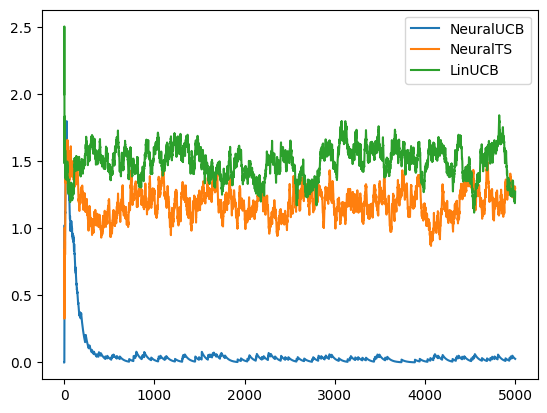

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

df = pd.DataFrame(action_rank_TS)
df['rank_Neural_TS'] = action_rank_TS
df['rank_Neural_TS'] = df['rank_Neural_TS'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_TS))
plt.plot(df['time'],df['rank_Neural_TS'],label = 'NeuralTS')

df = pd.DataFrame(action_rank_LinUCB)
df['rank_Linear_UCB'] = action_rank_LinUCB
df['rank_Linear_UCB'] = df['rank_Linear_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_LinUCB))
plt.plot(df['time'],df['rank_Linear_UCB'],label='LinUCB')

plt.legend()
plt.show()



### Custom DataSet on Neural UCB and Neural TS

In [143]:
from tqdm import tqdm
import numpy as np
import bluebandits as bb
import bluesimulator as bs
from bluesimulator.NeuralUCB.environment import *

In [144]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 
K = 4# Total number of actions, 
T = 5000 # Total number of periods
d = 4 # the dimension of context
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
A = np.random.normal(loc=0, scale=1, size=(d, d))
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A1 = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1

In [135]:
from bluesimulator.NeuralUCB.environment import CustomContext
context_list = CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)
context_list

array([[0.5525769 , 0.46191976, 0.59142997, 0.36262859],
       [0.53529656, 0.32626129, 0.49147041, 0.60453949],
       [0.63808721, 0.63200294, 0.39167451, 0.20002019],
       [0.56155595, 0.58399778, 0.37335055, 0.45189697]])

In [145]:
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []
from bluebandits.NeuralUCB.agent import Agent
neuralUCBagent = Agent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)
from bluebandits.NeuralThompsonSampling.agent import Agent
neuralTSagent = Agent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
from bluebandits.LinUCB.agent import Agent
linearagent = bb.LinUCB.agent.Agent(K = K,T=T,d=d,A=A1,theta=theta,X=X,p=p,alpha=alpha)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    #context_list = bs.NeuralUCB.environment.CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)
    context_list = SampleContext(d,K)
    realized_reward = bs.NeuralUCB.environment.GetRealReward(context_list,A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neuralUCB_ind = neuralUCBagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))

    neuralTS_ind = neuralTSagent.Action(context_list)
    action_list_TS.append(neuralTS_ind)
    action_rank_TS.append(list(action_order).index(neuralTS_ind))

    




    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralUCBagent.Update(neuralUCB_reward)

    neuralTS_reward = realized_reward[neuralTS_ind]
    neuralTSagent.Update(neuralTS_reward)


Using device cpu
Using device cpu


  1%|          | 50/5000 [00:01<01:52, 44.08it/s]

20 training epoch, mean loss value is 9.808257453056871
40 training epoch, mean loss value is 6.89169433769558
20 training epoch, mean loss value is 8.088521577849136
40 training epoch, mean loss value is 6.074313285677846


  2%|▏         | 98/5000 [00:02<01:18, 62.55it/s]

20 training epoch, mean loss value is 5.001202958394693
40 training epoch, mean loss value is 3.8932946859422675
60 training epoch, mean loss value is 2.7448937460009035
80 training epoch, mean loss value is 1.6898613129418378
20 training epoch, mean loss value is 6.095001351233718
40 training epoch, mean loss value is 4.317029338646801
60 training epoch, mean loss value is 2.6000685008960867
80 training epoch, mean loss value is 1.3093038977908595


  3%|▎         | 142/5000 [00:02<01:13, 65.75it/s]

20 training epoch, mean loss value is 4.547821138538591
40 training epoch, mean loss value is 2.5826257991817982
60 training epoch, mean loss value is 1.1245121027632534
80 training epoch, mean loss value is 0.47828410812618055
100 training epoch, mean loss value is 0.22352805710699916
20 training epoch, mean loss value is 5.223898068488002
40 training epoch, mean loss value is 2.5958936939008814
60 training epoch, mean loss value is 0.8794063026901423


  3%|▎         | 150/5000 [00:03<01:55, 41.98it/s]

80 training epoch, mean loss value is 0.2716793960082797
100 training epoch, mean loss value is 0.09973702819476804


  4%|▍         | 192/5000 [00:04<01:17, 62.04it/s]

20 training epoch, mean loss value is 3.925021772312369
40 training epoch, mean loss value is 0.9704995300543395
60 training epoch, mean loss value is 0.311262429066304
80 training epoch, mean loss value is 0.13026035968884747
100 training epoch, mean loss value is 0.0627479274671574
20 training epoch, mean loss value is 4.26857391374193
40 training epoch, mean loss value is 0.9376653294368565


  4%|▍         | 200/5000 [00:04<02:12, 36.19it/s]

60 training epoch, mean loss value is 0.2106718291600911
80 training epoch, mean loss value is 0.07110737135859627
100 training epoch, mean loss value is 0.04061512064024012


  5%|▍         | 238/5000 [00:05<01:23, 57.05it/s]

20 training epoch, mean loss value is 2.3602886225906943
40 training epoch, mean loss value is 0.35419437487285355
60 training epoch, mean loss value is 0.1319751379723439
80 training epoch, mean loss value is 0.06042385041774569
100 training epoch, mean loss value is 0.03403241370298203


  5%|▌         | 250/5000 [00:05<02:14, 35.23it/s]

20 training epoch, mean loss value is 3.0459320620807846
40 training epoch, mean loss value is 0.39505985408925853
60 training epoch, mean loss value is 0.07371008056707785
80 training epoch, mean loss value is 0.03188079731778048
100 training epoch, mean loss value is 0.023781063318338253


  6%|▌         | 296/5000 [00:06<01:11, 65.41it/s]

20 training epoch, mean loss value is 1.0003719339113837
40 training epoch, mean loss value is 0.21391441815773363
60 training epoch, mean loss value is 0.08298319037799848
80 training epoch, mean loss value is 0.040888680196153236
100 training epoch, mean loss value is 0.025661590520116243
20 training epoch, mean loss value is 1.7452217773319516
40 training epoch, mean loss value is 0.1777494166718754
60 training epoch, mean loss value is 0.044257898378338996
80 training epoch, mean loss value is 0.027546221773608517
100 training epoch, mean loss value is 0.022533330525133278


  7%|▋         | 346/5000 [00:07<01:16, 61.10it/s]

20 training epoch, mean loss value is 0.5439200480442123
40 training epoch, mean loss value is 0.14723892919133238
60 training epoch, mean loss value is 0.05833547868308109
80 training epoch, mean loss value is 0.03095805305338989
100 training epoch, mean loss value is 0.021471636034797712
20 training epoch, mean loss value is 1.1483229710324696
40 training epoch, mean loss value is 0.09317500237872481
60 training epoch, mean loss value is 0.029781572108367984
80 training epoch, mean loss value is 0.022155486610760212
100 training epoch, mean loss value is 0.018827205752050404


  8%|▊         | 391/5000 [00:09<01:34, 48.63it/s]

20 training epoch, mean loss value is 0.3845037023499453
40 training epoch, mean loss value is 0.11222385741422594
60 training epoch, mean loss value is 0.04652965959427089
80 training epoch, mean loss value is 0.02684502443027405
100 training epoch, mean loss value is 0.019976323606070982
20 training epoch, mean loss value is 0.7502310266578934
40 training epoch, mean loss value is 0.06617285910032708
60 training epoch, mean loss value is 0.027206491941709068
80 training epoch, mean loss value is 0.0213350529302586


  8%|▊         | 400/5000 [00:10<03:11, 24.03it/s]

100 training epoch, mean loss value is 0.01825723464537812


  9%|▉         | 445/5000 [00:10<01:21, 55.59it/s]

20 training epoch, mean loss value is 0.3081601366734252
40 training epoch, mean loss value is 0.08960221009727938
60 training epoch, mean loss value is 0.03821302021669524
80 training epoch, mean loss value is 0.023532797685726137
100 training epoch, mean loss value is 0.018356719877324984
20 training epoch, mean loss value is 0.4839637206789601
40 training epoch, mean loss value is 0.0399876502862396
60 training epoch, mean loss value is 0.02133633927907342
80 training epoch, mean loss value is 0.017800988799132986
100 training epoch, mean loss value is 0.015819885571765335


 10%|▉         | 493/5000 [00:12<01:29, 50.55it/s]

20 training epoch, mean loss value is 0.26825944999572626
40 training epoch, mean loss value is 0.07369133734842002
60 training epoch, mean loss value is 0.03207317543217904
80 training epoch, mean loss value is 0.021101711286610626
100 training epoch, mean loss value is 0.0172390681013909
20 training epoch, mean loss value is 0.3507325463226048
40 training epoch, mean loss value is 0.034523199286201345
60 training epoch, mean loss value is 0.021725300098609977
80 training epoch, mean loss value is 0.017924133414431682
100 training epoch, mean loss value is 0.01574551902732685


 11%|█         | 541/5000 [00:14<01:34, 47.32it/s]

20 training epoch, mean loss value is 0.23101525733025435
40 training epoch, mean loss value is 0.06278466737951084
60 training epoch, mean loss value is 0.02863149382727882
80 training epoch, mean loss value is 0.019671548236596743
100 training epoch, mean loss value is 0.01649539671172778
20 training epoch, mean loss value is 0.2479588615080187
40 training epoch, mean loss value is 0.028857726706086936
60 training epoch, mean loss value is 0.020038723827844173


 11%|█         | 550/5000 [00:15<03:40, 20.14it/s]

80 training epoch, mean loss value is 0.016734999868606628
100 training epoch, mean loss value is 0.014834745504785345


 12%|█▏        | 594/5000 [00:15<01:25, 51.28it/s]

20 training epoch, mean loss value is 0.19956736547579793
40 training epoch, mean loss value is 0.053947443888078046
60 training epoch, mean loss value is 0.025879559944429507
80 training epoch, mean loss value is 0.018566035560823178
100 training epoch, mean loss value is 0.015864428540377732
20 training epoch, mean loss value is 0.17032057373782228
40 training epoch, mean loss value is 0.025847170772535732
60 training epoch, mean loss value is 0.01901065040830499
80 training epoch, mean loss value is 0.015918648094228976
100 training epoch, mean loss value is 0.014200260846047643


 13%|█▎        | 644/5000 [00:17<01:30, 48.22it/s]

20 training epoch, mean loss value is 0.17486115782573758
40 training epoch, mean loss value is 0.04812775077047263
60 training epoch, mean loss value is 0.024186272825567606
80 training epoch, mean loss value is 0.017872600066159223
100 training epoch, mean loss value is 0.015413141219714972
20 training epoch, mean loss value is 0.12229317640827864
40 training epoch, mean loss value is 0.023136391363159096
60 training epoch, mean loss value is 0.017539967975694105
80 training epoch, mean loss value is 0.014920717698429453
100 training epoch, mean loss value is 0.013466861549875838


 14%|█▍        | 692/5000 [00:19<01:36, 44.82it/s]

20 training epoch, mean loss value is 0.15749503338166337
40 training epoch, mean loss value is 0.044201855600920124
60 training epoch, mean loss value is 0.0229540546672077
80 training epoch, mean loss value is 0.017322363933288475
100 training epoch, mean loss value is 0.015079249367405099
20 training epoch, mean loss value is 0.09043934848872848
40 training epoch, mean loss value is 0.02005770345023398
60 training epoch, mean loss value is 0.015897313964256615
80 training epoch, mean loss value is 0.013896701296702271
100 training epoch, mean loss value is 0.0128313986011512


 15%|█▍        | 742/5000 [00:21<01:40, 42.51it/s]

20 training epoch, mean loss value is 0.13982281928044998
40 training epoch, mean loss value is 0.03912892666287134
60 training epoch, mean loss value is 0.02135463985562564
80 training epoch, mean loss value is 0.0166281706053162
100 training epoch, mean loss value is 0.014608629530840292
20 training epoch, mean loss value is 0.07242575353401187
40 training epoch, mean loss value is 0.020028052745242532
60 training epoch, mean loss value is 0.015729463242770816
80 training epoch, mean loss value is 0.01374561159197508
100 training epoch, mean loss value is 0.012700530371947396


 16%|█▌        | 792/5000 [00:23<01:49, 38.47it/s]

20 training epoch, mean loss value is 0.1275690505259993
40 training epoch, mean loss value is 0.03531613109621569
60 training epoch, mean loss value is 0.020104526108586422
80 training epoch, mean loss value is 0.016053109261531855
100 training epoch, mean loss value is 0.014244107586496062
20 training epoch, mean loss value is 0.05521941658102758
40 training epoch, mean loss value is 0.01910133402562384
60 training epoch, mean loss value is 0.015077318311207805


 16%|█▌        | 800/5000 [00:25<04:46, 14.67it/s]

80 training epoch, mean loss value is 0.013247309567066587
100 training epoch, mean loss value is 0.012362491607243342


 17%|█▋        | 845/5000 [00:25<01:29, 46.48it/s]

20 training epoch, mean loss value is 0.11376717147301542
40 training epoch, mean loss value is 0.032371102533371776
60 training epoch, mean loss value is 0.019299937381356564
80 training epoch, mean loss value is 0.015698847146080757
100 training epoch, mean loss value is 0.014002224290130127
20 training epoch, mean loss value is 0.048576127148214444
40 training epoch, mean loss value is 0.019280662171684847
60 training epoch, mean loss value is 0.015164964386458077
80 training epoch, mean loss value is 0.013352371959036668
100 training epoch, mean loss value is 0.012479761870057931


 18%|█▊        | 895/5000 [00:28<02:04, 33.04it/s]

20 training epoch, mean loss value is 0.10317821206900725
40 training epoch, mean loss value is 0.029951909214760413
60 training epoch, mean loss value is 0.01857879206320213
80 training epoch, mean loss value is 0.015290535791072387
100 training epoch, mean loss value is 0.013710483963597092
20 training epoch, mean loss value is 0.043760443212103414
40 training epoch, mean loss value is 0.0192167109640924
60 training epoch, mean loss value is 0.015105011266946546
80 training epoch, mean loss value is 0.013318467751084924
100 training epoch, mean loss value is 0.012493773531501507


 19%|█▉        | 945/5000 [00:30<01:41, 39.76it/s]

20 training epoch, mean loss value is 0.09604537834290955
40 training epoch, mean loss value is 0.02814439866694775
60 training epoch, mean loss value is 0.018040487709719038
80 training epoch, mean loss value is 0.014980405348997968
100 training epoch, mean loss value is 0.013412009193668318
20 training epoch, mean loss value is 0.03599845444325039
40 training epoch, mean loss value is 0.017686596649560907
60 training epoch, mean loss value is 0.014069355956678497
80 training epoch, mean loss value is 0.01261597688701569
100 training epoch, mean loss value is 0.011947860346133161


 20%|█▉        | 997/5000 [00:33<01:43, 38.64it/s]

20 training epoch, mean loss value is 0.08695314777709348
40 training epoch, mean loss value is 0.02623057741257534
60 training epoch, mean loss value is 0.017422052117100097
80 training epoch, mean loss value is 0.014604993690135687
100 training epoch, mean loss value is 0.013148565577945606
20 training epoch, mean loss value is 0.03060691832592487
40 training epoch, mean loss value is 0.016700053016125517
60 training epoch, mean loss value is 0.013538839045853268
80 training epoch, mean loss value is 0.01229459383958911
100 training epoch, mean loss value is 0.011736301559236714


 21%|██        | 1048/5000 [00:35<01:46, 36.99it/s]

20 training epoch, mean loss value is 0.08083970012818001
40 training epoch, mean loss value is 0.024626511274606227
60 training epoch, mean loss value is 0.016817281705002025
80 training epoch, mean loss value is 0.014223940083807144
100 training epoch, mean loss value is 0.01285977224735135
20 training epoch, mean loss value is 0.029149876676838226
40 training epoch, mean loss value is 0.016484139445762495
60 training epoch, mean loss value is 0.013359348259644606
80 training epoch, mean loss value is 0.012217218043725562
100 training epoch, mean loss value is 0.011703409052665268


 22%|██▏       | 1097/5000 [00:38<01:45, 37.06it/s]

20 training epoch, mean loss value is 0.0736820476119618
40 training epoch, mean loss value is 0.023233734433643197
60 training epoch, mean loss value is 0.016275080444785844
80 training epoch, mean loss value is 0.01391343579166679
100 training epoch, mean loss value is 0.012677029140616186
20 training epoch, mean loss value is 0.028148545354579727
40 training epoch, mean loss value is 0.0163573502646743
60 training epoch, mean loss value is 0.013276623803516836
80 training epoch, mean loss value is 0.012187626677655689
100 training epoch, mean loss value is 0.011707766187175294


 23%|██▎       | 1147/5000 [00:41<01:46, 36.08it/s]

20 training epoch, mean loss value is 0.06980614437398958
40 training epoch, mean loss value is 0.022530451322876403
60 training epoch, mean loss value is 0.016059229067947257
80 training epoch, mean loss value is 0.013735307721169593
100 training epoch, mean loss value is 0.012509922865631753
20 training epoch, mean loss value is 0.02912686010275735
40 training epoch, mean loss value is 0.016716236152685474
60 training epoch, mean loss value is 0.013506910095482149
80 training epoch, mean loss value is 0.012405803215928305
100 training epoch, mean loss value is 0.011925533684218604


 24%|██▍       | 1195/5000 [00:44<02:03, 30.71it/s]

20 training epoch, mean loss value is 0.06369661944622823
40 training epoch, mean loss value is 0.021531194212506353
60 training epoch, mean loss value is 0.015756831765968426
80 training epoch, mean loss value is 0.01356527403906907
100 training epoch, mean loss value is 0.012417053162403732
20 training epoch, mean loss value is 0.027257095446694465
40 training epoch, mean loss value is 0.016072013617372566
60 training epoch, mean loss value is 0.013226419635162051
80 training epoch, mean loss value is 0.012260043044983649
100 training epoch, mean loss value is 0.01183112797109607


 25%|██▍       | 1240/5000 [00:47<02:08, 29.34it/s]

20 training epoch, mean loss value is 0.058942641143323836
40 training epoch, mean loss value is 0.02067281561472945
60 training epoch, mean loss value is 0.015416678276507261
80 training epoch, mean loss value is 0.013350538030746116
100 training epoch, mean loss value is 0.012293171854171073
20 training epoch, mean loss value is 0.026514881398707515
40 training epoch, mean loss value is 0.01588192231650296
60 training epoch, mean loss value is 0.01315936338575952
80 training epoch, mean loss value is 0.012263902680636167


 25%|██▌       | 1250/5000 [00:50<06:15, 10.00it/s]

100 training epoch, mean loss value is 0.01186154418735185


 26%|██▌       | 1293/5000 [00:50<01:52, 33.09it/s]

20 training epoch, mean loss value is 0.05597591435287043
40 training epoch, mean loss value is 0.020192586945822162
60 training epoch, mean loss value is 0.015189789058900154
80 training epoch, mean loss value is 0.01320298033311701
100 training epoch, mean loss value is 0.012156750223325673
20 training epoch, mean loss value is 0.026169942881239337
40 training epoch, mean loss value is 0.015757818115911145
60 training epoch, mean loss value is 0.01314062313291676
80 training epoch, mean loss value is 0.012271437675278515
100 training epoch, mean loss value is 0.011879355156034247


 27%|██▋       | 1349/5000 [00:54<01:30, 40.56it/s]

20 training epoch, mean loss value is 0.052554587985186925
40 training epoch, mean loss value is 0.019643005187422596
60 training epoch, mean loss value is 0.014964565796443556
80 training epoch, mean loss value is 0.013075004659328269
100 training epoch, mean loss value is 0.012073397609731217
20 training epoch, mean loss value is 0.02755314495894878
40 training epoch, mean loss value is 0.01618701289831691
60 training epoch, mean loss value is 0.013478313062572944
80 training epoch, mean loss value is 0.012586681299002443
100 training epoch, mean loss value is 0.012141160651421012


 28%|██▊       | 1394/5000 [00:57<02:10, 27.60it/s]

20 training epoch, mean loss value is 0.049699254136597634
40 training epoch, mean loss value is 0.019107565320062386
60 training epoch, mean loss value is 0.01468054876412012
80 training epoch, mean loss value is 0.012862097935316705
100 training epoch, mean loss value is 0.01190780962358218
20 training epoch, mean loss value is 0.027752835553026423
40 training epoch, mean loss value is 0.015911014884896525
60 training epoch, mean loss value is 0.01311820819461775
80 training epoch, mean loss value is 0.012239328502467815
100 training epoch, mean loss value is 0.01184576449691023


 29%|██▉       | 1448/5000 [01:00<01:51, 31.92it/s]

20 training epoch, mean loss value is 0.047903826695418934
40 training epoch, mean loss value is 0.018808394970988525
60 training epoch, mean loss value is 0.014536483048274661
80 training epoch, mean loss value is 0.012769273177423202
100 training epoch, mean loss value is 0.011869723703796959
20 training epoch, mean loss value is 0.027493343005552482
40 training epoch, mean loss value is 0.016018643821007417
60 training epoch, mean loss value is 0.013269707456010657
80 training epoch, mean loss value is 0.012290111059733055
100 training epoch, mean loss value is 0.011810895031334898


 30%|██▉       | 1497/5000 [01:04<02:01, 28.80it/s]

20 training epoch, mean loss value is 0.045696595444869835
40 training epoch, mean loss value is 0.018449278307998196
60 training epoch, mean loss value is 0.01432104912969579
80 training epoch, mean loss value is 0.012614909734759917
100 training epoch, mean loss value is 0.011749017961064097
20 training epoch, mean loss value is 0.02343843679130342
40 training epoch, mean loss value is 0.014599625687434678
60 training epoch, mean loss value is 0.01255905822271036
80 training epoch, mean loss value is 0.011908701288264644
100 training epoch, mean loss value is 0.011590691883601375


 31%|███       | 1541/5000 [01:07<02:24, 23.99it/s]

20 training epoch, mean loss value is 0.04324692925442775
40 training epoch, mean loss value is 0.018054780074094848
60 training epoch, mean loss value is 0.014164770840136245
80 training epoch, mean loss value is 0.012553385515619018
100 training epoch, mean loss value is 0.011753294718518936
20 training epoch, mean loss value is 0.022577961175497378
40 training epoch, mean loss value is 0.014291104246831629
60 training epoch, mean loss value is 0.012428949914557843
80 training epoch, mean loss value is 0.011828109922373275


 31%|███       | 1550/5000 [01:11<07:36,  7.56it/s]

100 training epoch, mean loss value is 0.011511789279145474


 32%|███▏      | 1593/5000 [01:14<04:48, 11.80it/s]

20 training epoch, mean loss value is 0.04096616985260925
40 training epoch, mean loss value is 0.01770209925769541
60 training epoch, mean loss value is 0.014001807139451131
80 training epoch, mean loss value is 0.012440216064620261
100 training epoch, mean loss value is 0.011687764053933172
20 training epoch, mean loss value is 0.02389644256865286
40 training epoch, mean loss value is 0.014728110711201156
60 training epoch, mean loss value is 0.01276784008583674
80 training epoch, mean loss value is 0.012107509886532645


 32%|███▏      | 1600/5000 [01:17<16:28,  3.44it/s]

100 training epoch, mean loss value is 0.011770827426311756


 33%|███▎      | 1647/5000 [01:18<01:45, 31.82it/s]

20 training epoch, mean loss value is 0.03981228928186436
40 training epoch, mean loss value is 0.01758768726036371
60 training epoch, mean loss value is 0.013895806206732787
80 training epoch, mean loss value is 0.012370396671171815
100 training epoch, mean loss value is 0.011646994382718965
20 training epoch, mean loss value is 0.022397152221023578
40 training epoch, mean loss value is 0.014237825830557894
60 training epoch, mean loss value is 0.012532786015583648
80 training epoch, mean loss value is 0.011949784880656216
100 training epoch, mean loss value is 0.011638268314556523


 34%|███▍      | 1697/5000 [01:22<01:54, 28.74it/s]

20 training epoch, mean loss value is 0.0379564467672527
40 training epoch, mean loss value is 0.017224396867180598
60 training epoch, mean loss value is 0.013716732807737357
80 training epoch, mean loss value is 0.012252776027104279
100 training epoch, mean loss value is 0.011581416330064657
20 training epoch, mean loss value is 0.022343609242232824
40 training epoch, mean loss value is 0.014184820174770124
60 training epoch, mean loss value is 0.012532049828578817
80 training epoch, mean loss value is 0.011966379343346914
100 training epoch, mean loss value is 0.011659908811882117


 35%|███▍      | 1743/5000 [01:26<02:15, 24.05it/s]

20 training epoch, mean loss value is 0.03648901945777451
40 training epoch, mean loss value is 0.016962528141115273
60 training epoch, mean loss value is 0.01357666817825543
80 training epoch, mean loss value is 0.012182434480770072
100 training epoch, mean loss value is 0.011551266007746112
20 training epoch, mean loss value is 0.02249512066125999
40 training epoch, mean loss value is 0.014091628950920984
60 training epoch, mean loss value is 0.01240968052488942
80 training epoch, mean loss value is 0.01183781645367197
100 training epoch, mean loss value is 0.01154426868706064


 36%|███▌      | 1792/5000 [01:30<02:17, 23.30it/s]

20 training epoch, mean loss value is 0.03530960817028192
40 training epoch, mean loss value is 0.016782281232046944
60 training epoch, mean loss value is 0.013477872627495774
80 training epoch, mean loss value is 0.012122055066950592
100 training epoch, mean loss value is 0.011516821603293816
20 training epoch, mean loss value is 0.021855925006840752
40 training epoch, mean loss value is 0.013916568538108822
60 training epoch, mean loss value is 0.012376155503996629
80 training epoch, mean loss value is 0.011822705178369131


 36%|███▌      | 1800/5000 [01:33<07:49,  6.81it/s]

100 training epoch, mean loss value is 0.011524572528361102


 37%|███▋      | 1841/5000 [01:35<03:16, 16.05it/s]

20 training epoch, mean loss value is 0.0340855347466628
40 training epoch, mean loss value is 0.016518382973382036
60 training epoch, mean loss value is 0.013333741892755695
80 training epoch, mean loss value is 0.012036905322733287
100 training epoch, mean loss value is 0.011459913811917972
20 training epoch, mean loss value is 0.021391007626171854
40 training epoch, mean loss value is 0.013756481879268118
60 training epoch, mean loss value is 0.01228455778547807
80 training epoch, mean loss value is 0.01175470230409203


 37%|███▋      | 1850/5000 [01:39<10:00,  5.24it/s]

100 training epoch, mean loss value is 0.01147199485513864


 38%|███▊      | 1894/5000 [01:41<02:16, 22.79it/s]

20 training epoch, mean loss value is 0.033177061200641955
40 training epoch, mean loss value is 0.016361705707491205
60 training epoch, mean loss value is 0.013236741324613836
80 training epoch, mean loss value is 0.011989687234128755
100 training epoch, mean loss value is 0.0114366887324926
20 training epoch, mean loss value is 0.0202014269971374
40 training epoch, mean loss value is 0.0134652354891926
60 training epoch, mean loss value is 0.012160833532935093
80 training epoch, mean loss value is 0.011672813618689321


 38%|███▊      | 1900/5000 [01:45<10:56,  4.72it/s]

100 training epoch, mean loss value is 0.011390664821632049


 39%|███▉      | 1948/5000 [01:49<04:12, 12.09it/s]

20 training epoch, mean loss value is 0.03209718527046371
40 training epoch, mean loss value is 0.016167332885886995
60 training epoch, mean loss value is 0.013119156590561638
80 training epoch, mean loss value is 0.011914382531197924
100 training epoch, mean loss value is 0.011409944673492916
20 training epoch, mean loss value is 0.021181652124317368
40 training epoch, mean loss value is 0.013608810653861513
60 training epoch, mean loss value is 0.012178275588303417
80 training epoch, mean loss value is 0.011705978533489021


 39%|███▉      | 1950/5000 [01:53<34:46,  1.46it/s]

100 training epoch, mean loss value is 0.01145255042512347


 40%|███▉      | 1988/5000 [01:55<02:33, 19.69it/s]

20 training epoch, mean loss value is 0.030944188954403724
40 training epoch, mean loss value is 0.015976502742456204
60 training epoch, mean loss value is 0.013038367039871707
80 training epoch, mean loss value is 0.011878600362620898
100 training epoch, mean loss value is 0.011387364648061307
20 training epoch, mean loss value is 0.02062678244910815
40 training epoch, mean loss value is 0.013507871493824089
60 training epoch, mean loss value is 0.012142365709208217
80 training epoch, mean loss value is 0.011688926083468418


 40%|████      | 2000/5000 [01:59<10:16,  4.87it/s]

100 training epoch, mean loss value is 0.011441052657818392


 41%|████      | 2038/5000 [02:00<02:15, 21.82it/s]

20 training epoch, mean loss value is 0.029943390925354987
40 training epoch, mean loss value is 0.015717126998117337
60 training epoch, mean loss value is 0.012921602695780222
80 training epoch, mean loss value is 0.011819545809119435
100 training epoch, mean loss value is 0.011361678432133593
20 training epoch, mean loss value is 0.019053085335775273
40 training epoch, mean loss value is 0.013173120092742505
60 training epoch, mean loss value is 0.012050045901907079
80 training epoch, mean loss value is 0.011616144601241026


 41%|████      | 2050/5000 [02:04<07:07,  6.90it/s]

100 training epoch, mean loss value is 0.011349337458971058


 42%|████▏     | 2098/5000 [02:05<01:36, 30.07it/s]

20 training epoch, mean loss value is 0.029023357497086906
40 training epoch, mean loss value is 0.01551774857109187
60 training epoch, mean loss value is 0.012771095527985952
80 training epoch, mean loss value is 0.011718811585099494
100 training epoch, mean loss value is 0.011280707975479093
20 training epoch, mean loss value is 0.01838679132142073
40 training epoch, mean loss value is 0.01289796799936733
60 training epoch, mean loss value is 0.011854993290802038
80 training epoch, mean loss value is 0.011433572921649501
100 training epoch, mean loss value is 0.011203317779416222


 43%|████▎     | 2140/5000 [02:10<02:37, 18.21it/s]

20 training epoch, mean loss value is 0.028324947823354093
40 training epoch, mean loss value is 0.015374107879262553
60 training epoch, mean loss value is 0.0127065873934236
80 training epoch, mean loss value is 0.011688713874747158
100 training epoch, mean loss value is 0.01128091285315494
20 training epoch, mean loss value is 0.019245045217397047
40 training epoch, mean loss value is 0.013039628765486788
60 training epoch, mean loss value is 0.011941402859145297
80 training epoch, mean loss value is 0.011534425142831109


 43%|████▎     | 2150/5000 [02:14<08:19,  5.70it/s]

100 training epoch, mean loss value is 0.01130703207529664


 44%|████▍     | 2192/5000 [02:15<02:08, 21.85it/s]

20 training epoch, mean loss value is 0.02768240647640341
40 training epoch, mean loss value is 0.015226416785143413
60 training epoch, mean loss value is 0.012635228067958549
80 training epoch, mean loss value is 0.011651934648525188
100 training epoch, mean loss value is 0.011255144393323884
20 training epoch, mean loss value is 0.017142860476801792
40 training epoch, mean loss value is 0.012400244167775852
60 training epoch, mean loss value is 0.011497306690558207
80 training epoch, mean loss value is 0.011136619238708704


 44%|████▍     | 2200/5000 [02:20<09:00,  5.18it/s]

100 training epoch, mean loss value is 0.010941486310161157


 45%|████▍     | 2242/5000 [02:22<01:41, 27.14it/s]

20 training epoch, mean loss value is 0.027210674086950066
40 training epoch, mean loss value is 0.015166523484076738
60 training epoch, mean loss value is 0.012604909345399378
80 training epoch, mean loss value is 0.011653856524140452
100 training epoch, mean loss value is 0.01125923845672704
20 training epoch, mean loss value is 0.01729793302862405
40 training epoch, mean loss value is 0.012485151495791253
60 training epoch, mean loss value is 0.01160775034244904
80 training epoch, mean loss value is 0.011234901923005353


 45%|████▌     | 2250/5000 [02:26<09:08,  5.01it/s]

100 training epoch, mean loss value is 0.011015295675247175


 46%|████▌     | 2299/5000 [02:27<01:45, 25.57it/s]

20 training epoch, mean loss value is 0.026517093153437695
40 training epoch, mean loss value is 0.014962535189851503
60 training epoch, mean loss value is 0.01249607121985179
80 training epoch, mean loss value is 0.01159711018615454
100 training epoch, mean loss value is 0.011227363760892119
20 training epoch, mean loss value is 0.017913817180648495
40 training epoch, mean loss value is 0.012799382968871991
60 training epoch, mean loss value is 0.011877712839871745
80 training epoch, mean loss value is 0.011488860227000968
100 training epoch, mean loss value is 0.011251000292974156


 47%|████▋     | 2341/5000 [02:33<03:04, 14.40it/s]

20 training epoch, mean loss value is 0.025703514589676797
40 training epoch, mean loss value is 0.014759452727634065
60 training epoch, mean loss value is 0.012399559173287661
80 training epoch, mean loss value is 0.011568509528348989
100 training epoch, mean loss value is 0.011230317930800066
20 training epoch, mean loss value is 0.017648401527312233
40 training epoch, mean loss value is 0.01276171302334688
60 training epoch, mean loss value is 0.0118659682562099
80 training epoch, mean loss value is 0.011487736434908075


 47%|████▋     | 2350/5000 [02:38<09:13,  4.79it/s]

100 training epoch, mean loss value is 0.011240800578220876


 48%|████▊     | 2399/5000 [02:43<03:59, 10.87it/s]

20 training epoch, mean loss value is 0.025549613092798063
40 training epoch, mean loss value is 0.01474203776984293
60 training epoch, mean loss value is 0.012358290879262003
80 training epoch, mean loss value is 0.011535617828286373
100 training epoch, mean loss value is 0.011194892116474155
20 training epoch, mean loss value is 0.01784680972778673
40 training epoch, mean loss value is 0.012641323283054376
60 training epoch, mean loss value is 0.011760488855719155
80 training epoch, mean loss value is 0.011416722943567756
100 training epoch, mean loss value is 0.011211737675811082


 49%|████▉     | 2449/5000 [02:48<01:58, 21.53it/s]

20 training epoch, mean loss value is 0.024676870298293102
40 training epoch, mean loss value is 0.014495480813872714
60 training epoch, mean loss value is 0.01222016851186743
80 training epoch, mean loss value is 0.011448999700179244
100 training epoch, mean loss value is 0.011139454629080054
20 training epoch, mean loss value is 0.0169541294125749
40 training epoch, mean loss value is 0.01257457634736106
60 training epoch, mean loss value is 0.011757970730825443
80 training epoch, mean loss value is 0.01138928868387737
100 training epoch, mean loss value is 0.011158729368850234


 50%|████▉     | 2495/5000 [02:54<02:17, 18.25it/s]

20 training epoch, mean loss value is 0.024294591669919412
40 training epoch, mean loss value is 0.014367394112781744
60 training epoch, mean loss value is 0.012131789747147022
80 training epoch, mean loss value is 0.011396654917827438
100 training epoch, mean loss value is 0.011085781398380387
20 training epoch, mean loss value is 0.016112148065232913
40 training epoch, mean loss value is 0.012157226419925752
60 training epoch, mean loss value is 0.011431810044099744
80 training epoch, mean loss value is 0.01111084427210715
100 training epoch, mean loss value is 0.01091451887959884


 51%|█████     | 2546/5000 [03:03<04:09,  9.84it/s]

20 training epoch, mean loss value is 0.023800233189476126
40 training epoch, mean loss value is 0.014190352841748789
60 training epoch, mean loss value is 0.012049756137947249
80 training epoch, mean loss value is 0.011364859577430973
100 training epoch, mean loss value is 0.011079531439132368
20 training epoch, mean loss value is 0.017301001428525486
40 training epoch, mean loss value is 0.012359028826156845
60 training epoch, mean loss value is 0.011620323836510732
80 training epoch, mean loss value is 0.011334052592513471


 51%|█████     | 2550/5000 [03:07<23:47,  1.72it/s]

100 training epoch, mean loss value is 0.011150860377700042


 52%|█████▏    | 2596/5000 [03:08<01:27, 27.52it/s]

20 training epoch, mean loss value is 0.023244474703673322
40 training epoch, mean loss value is 0.014072977750814805
60 training epoch, mean loss value is 0.012007807747527287
80 training epoch, mean loss value is 0.011354666134815674
100 training epoch, mean loss value is 0.011078145545613767
20 training epoch, mean loss value is 0.01693428150001953
40 training epoch, mean loss value is 0.012292307848511005
60 training epoch, mean loss value is 0.011582696070158886
80 training epoch, mean loss value is 0.01130724617556705
100 training epoch, mean loss value is 0.01112357113410867


 53%|█████▎    | 2640/5000 [03:14<02:14, 17.55it/s]

20 training epoch, mean loss value is 0.022858043464954618
40 training epoch, mean loss value is 0.013915620253376785
60 training epoch, mean loss value is 0.011923346740787369
80 training epoch, mean loss value is 0.011304361831425103
100 training epoch, mean loss value is 0.01101167136906923
20 training epoch, mean loss value is 0.01648989173957574
40 training epoch, mean loss value is 0.012414200998086947
60 training epoch, mean loss value is 0.011668436954251986
80 training epoch, mean loss value is 0.01133014199388086


 53%|█████▎    | 2650/5000 [03:19<07:58,  4.91it/s]

100 training epoch, mean loss value is 0.01111257772340371


 54%|█████▍    | 2691/5000 [03:19<01:59, 19.36it/s]

20 training epoch, mean loss value is 0.022529503183015807
40 training epoch, mean loss value is 0.01382123676106246
60 training epoch, mean loss value is 0.011883453659897823
80 training epoch, mean loss value is 0.011279508852636946
100 training epoch, mean loss value is 0.010993799155091325
20 training epoch, mean loss value is 0.01639013986202226
40 training epoch, mean loss value is 0.011995118235126164
60 training epoch, mean loss value is 0.011407711769004151
80 training epoch, mean loss value is 0.011167869349830663


 54%|█████▍    | 2700/5000 [03:24<07:19,  5.23it/s]

100 training epoch, mean loss value is 0.011007616135072354


 55%|█████▍    | 2742/5000 [03:25<01:57, 19.30it/s]

20 training epoch, mean loss value is 0.022129104049963228
40 training epoch, mean loss value is 0.013743658401768206
60 training epoch, mean loss value is 0.011861103526841716
80 training epoch, mean loss value is 0.011279393193832705
100 training epoch, mean loss value is 0.01099301815652452
20 training epoch, mean loss value is 0.016082493074060327
40 training epoch, mean loss value is 0.012256510709771937
60 training epoch, mean loss value is 0.011569587452433444
80 training epoch, mean loss value is 0.011259658617516174
100 training epoch, mean loss value is 0.011062761525779747


 56%|█████▌    | 2789/5000 [03:31<02:07, 17.32it/s]

20 training epoch, mean loss value is 0.021607687627131476
40 training epoch, mean loss value is 0.013588063372135835
60 training epoch, mean loss value is 0.011812782399245955
80 training epoch, mean loss value is 0.011249536607303488
100 training epoch, mean loss value is 0.010967285231107403
20 training epoch, mean loss value is 0.015620260514495419
40 training epoch, mean loss value is 0.012199992048203653
60 training epoch, mean loss value is 0.011531677995894109
80 training epoch, mean loss value is 0.01120100491812308


 56%|█████▌    | 2800/5000 [03:36<07:13,  5.08it/s]

100 training epoch, mean loss value is 0.010996284547069992


 57%|█████▋    | 2848/5000 [03:37<01:33, 22.91it/s]

20 training epoch, mean loss value is 0.021423684269300105
40 training epoch, mean loss value is 0.013538027085144493
60 training epoch, mean loss value is 0.011782188088147499
80 training epoch, mean loss value is 0.01124747416212312
100 training epoch, mean loss value is 0.010985696015784458
20 training epoch, mean loss value is 0.01582109580671315
40 training epoch, mean loss value is 0.012193546487049105
60 training epoch, mean loss value is 0.011530674361011102
80 training epoch, mean loss value is 0.011226789817007515
100 training epoch, mean loss value is 0.01103187154491988


 58%|█████▊    | 2896/5000 [03:43<01:56, 18.04it/s]

20 training epoch, mean loss value is 0.02126533543158948
40 training epoch, mean loss value is 0.013496437098810857
60 training epoch, mean loss value is 0.011749087854098852
80 training epoch, mean loss value is 0.01123441703553898
100 training epoch, mean loss value is 0.010997273533283319
20 training epoch, mean loss value is 0.01613197817800196
40 training epoch, mean loss value is 0.012425585965660863
60 training epoch, mean loss value is 0.011635912355192537
80 training epoch, mean loss value is 0.011273808681909787
100 training epoch, mean loss value is 0.011051908381554124


 59%|█████▉    | 2947/5000 [03:49<01:55, 17.80it/s]

20 training epoch, mean loss value is 0.020727697108652965
40 training epoch, mean loss value is 0.013300043823659409
60 training epoch, mean loss value is 0.011685438396323508
80 training epoch, mean loss value is 0.011157093686171805
100 training epoch, mean loss value is 0.010893116987872181
20 training epoch, mean loss value is 0.015607121202304303
40 training epoch, mean loss value is 0.011877048979289722
60 training epoch, mean loss value is 0.011303386403402114
80 training epoch, mean loss value is 0.01106975000295832
100 training epoch, mean loss value is 0.010917143213378876


 60%|█████▉    | 2990/5000 [03:55<02:28, 13.50it/s]

20 training epoch, mean loss value is 0.02042267066004111
40 training epoch, mean loss value is 0.013228013856436786
60 training epoch, mean loss value is 0.011668198125813371
80 training epoch, mean loss value is 0.011157319080451401
100 training epoch, mean loss value is 0.010888055532954544
20 training epoch, mean loss value is 0.015459053616422636
40 training epoch, mean loss value is 0.011841467568191088
60 training epoch, mean loss value is 0.011284707372618262
80 training epoch, mean loss value is 0.011051649106212336


 60%|██████    | 3000/5000 [04:00<07:06,  4.69it/s]

100 training epoch, mean loss value is 0.0109076849782109


 61%|██████    | 3048/5000 [04:01<01:29, 21.80it/s]

20 training epoch, mean loss value is 0.02027844462701392
40 training epoch, mean loss value is 0.013177908285254067
60 training epoch, mean loss value is 0.011635051086105307
80 training epoch, mean loss value is 0.011122705341675445
100 training epoch, mean loss value is 0.010871969676732431
20 training epoch, mean loss value is 0.015230456959266456
40 training epoch, mean loss value is 0.011913273233229243
60 training epoch, mean loss value is 0.011379141563054765
80 training epoch, mean loss value is 0.011119074577486036
100 training epoch, mean loss value is 0.010952940121106635


 62%|██████▏   | 3090/5000 [04:07<02:22, 13.41it/s]

20 training epoch, mean loss value is 0.01998780631200481
40 training epoch, mean loss value is 0.013077796437823043
60 training epoch, mean loss value is 0.011597954495797915
80 training epoch, mean loss value is 0.011107315721019181
100 training epoch, mean loss value is 0.010853742959214811
20 training epoch, mean loss value is 0.015649047446764583
40 training epoch, mean loss value is 0.012314103290926944
60 training epoch, mean loss value is 0.011597798168532045
80 training epoch, mean loss value is 0.011274139173464185


 62%|██████▏   | 3100/5000 [04:13<07:01,  4.50it/s]

100 training epoch, mean loss value is 0.011065706419622208


 63%|██████▎   | 3143/5000 [04:14<01:49, 16.90it/s]

20 training epoch, mean loss value is 0.019959532871129185
40 training epoch, mean loss value is 0.013068777156274792
60 training epoch, mean loss value is 0.011591721446547515
80 training epoch, mean loss value is 0.011120341057566116
100 training epoch, mean loss value is 0.010870334037072325
20 training epoch, mean loss value is 0.015023225748617837
40 training epoch, mean loss value is 0.011830171175101966
60 training epoch, mean loss value is 0.011276620335810783
80 training epoch, mean loss value is 0.011037759783298393
100 training epoch, mean loss value is 0.010881792432995452


 64%|██████▍   | 3197/5000 [04:20<01:45, 17.17it/s]

20 training epoch, mean loss value is 0.01972551768881082
40 training epoch, mean loss value is 0.013040226007586657
60 training epoch, mean loss value is 0.011601159930609404
80 training epoch, mean loss value is 0.011155998983382886
100 training epoch, mean loss value is 0.010907392662770556
20 training epoch, mean loss value is 0.014763720123226954
40 training epoch, mean loss value is 0.012033673127514733
60 training epoch, mean loss value is 0.011449052177022974
80 training epoch, mean loss value is 0.011152271797349116
100 training epoch, mean loss value is 0.01096520673493254


 65%|██████▍   | 3239/5000 [04:27<02:26, 12.00it/s]

20 training epoch, mean loss value is 0.019615166727771628
40 training epoch, mean loss value is 0.01296996609026422
60 training epoch, mean loss value is 0.011557059976330053
80 training epoch, mean loss value is 0.011091144128559027
100 training epoch, mean loss value is 0.010848939476467596
20 training epoch, mean loss value is 0.014860989565254064
40 training epoch, mean loss value is 0.011788719273519387
60 training epoch, mean loss value is 0.011266888550069779
80 training epoch, mean loss value is 0.011031554868863553


 65%|██████▌   | 3250/5000 [04:33<06:47,  4.29it/s]

100 training epoch, mean loss value is 0.010890016220586022


 66%|██████▌   | 3289/5000 [04:34<01:58, 14.42it/s]

20 training epoch, mean loss value is 0.01950936021300679
40 training epoch, mean loss value is 0.012939920962581185
60 training epoch, mean loss value is 0.011552075664983372
80 training epoch, mean loss value is 0.011101434519553399
100 training epoch, mean loss value is 0.01085675893730743
20 training epoch, mean loss value is 0.014961270754695763
40 training epoch, mean loss value is 0.011844842450146229
60 training epoch, mean loss value is 0.011238758201478308
80 training epoch, mean loss value is 0.01100670980319007


 66%|██████▌   | 3300/5000 [04:40<06:20,  4.46it/s]

100 training epoch, mean loss value is 0.010868268505852695


 67%|██████▋   | 3342/5000 [04:40<01:39, 16.67it/s]

20 training epoch, mean loss value is 0.01909405776330876
40 training epoch, mean loss value is 0.01281969927218984
60 training epoch, mean loss value is 0.011518002009177797
80 training epoch, mean loss value is 0.011086189573759378
100 training epoch, mean loss value is 0.010836315410204357
20 training epoch, mean loss value is 0.014552780156573533
40 training epoch, mean loss value is 0.011795408839106201
60 training epoch, mean loss value is 0.011323330254890199
80 training epoch, mean loss value is 0.011072520400724555
100 training epoch, mean loss value is 0.01091144067315671


 68%|██████▊   | 3394/5000 [04:47<01:38, 16.33it/s]

20 training epoch, mean loss value is 0.018884910429984598
40 training epoch, mean loss value is 0.012746843678941154
60 training epoch, mean loss value is 0.01148211527944303
80 training epoch, mean loss value is 0.0110544921153813
100 training epoch, mean loss value is 0.010815179570135895
20 training epoch, mean loss value is 0.014188852178409964
40 training epoch, mean loss value is 0.01186432835762621
60 training epoch, mean loss value is 0.011337645639834186
80 training epoch, mean loss value is 0.011060193398329263
100 training epoch, mean loss value is 0.010879550385703308


 69%|██████▉   | 3440/5000 [04:54<02:01, 12.82it/s]

20 training epoch, mean loss value is 0.018650771492170492
40 training epoch, mean loss value is 0.012676452690402667
60 training epoch, mean loss value is 0.01145221698924076
80 training epoch, mean loss value is 0.011026863991166423
100 training epoch, mean loss value is 0.010791198405649094
20 training epoch, mean loss value is 0.014136676234637257
40 training epoch, mean loss value is 0.01165180759088676
60 training epoch, mean loss value is 0.011235714493741037
80 training epoch, mean loss value is 0.011016302117397514


 69%|██████▉   | 3450/5000 [05:00<05:57,  4.33it/s]

100 training epoch, mean loss value is 0.010869200999026976


 70%|██████▉   | 3490/5000 [05:01<01:42, 14.71it/s]

20 training epoch, mean loss value is 0.01857972405477607
40 training epoch, mean loss value is 0.01264524423916056
60 training epoch, mean loss value is 0.011440277094257609
80 training epoch, mean loss value is 0.011010207866738985
100 training epoch, mean loss value is 0.01077022227262582
20 training epoch, mean loss value is 0.014565157017232279
40 training epoch, mean loss value is 0.011986669178582193
60 training epoch, mean loss value is 0.011382280416352185
80 training epoch, mean loss value is 0.011064268858164061


 70%|███████   | 3500/5000 [05:07<05:51,  4.27it/s]

100 training epoch, mean loss value is 0.01084427680494006


 71%|███████   | 3540/5000 [05:08<01:35, 15.36it/s]

20 training epoch, mean loss value is 0.018661205449393196
40 training epoch, mean loss value is 0.012654606632662083
60 training epoch, mean loss value is 0.011424512195021552
80 training epoch, mean loss value is 0.011050883439990517
100 training epoch, mean loss value is 0.010852442159699058
20 training epoch, mean loss value is 0.01417681734557315
40 training epoch, mean loss value is 0.01159694387701699
60 training epoch, mean loss value is 0.01113634615278832
80 training epoch, mean loss value is 0.010932022416841696


 71%|███████   | 3550/5000 [05:15<05:44,  4.21it/s]

100 training epoch, mean loss value is 0.010802763759927272


 72%|███████▏  | 3590/5000 [05:15<01:35, 14.73it/s]

20 training epoch, mean loss value is 0.018412438877593515
40 training epoch, mean loss value is 0.012545055556926308
60 training epoch, mean loss value is 0.011357137879250585
80 training epoch, mean loss value is 0.010994948036510854
100 training epoch, mean loss value is 0.010802410545973298
20 training epoch, mean loss value is 0.014297414172336083
40 training epoch, mean loss value is 0.011770837615576195
60 training epoch, mean loss value is 0.011201097020368542
80 training epoch, mean loss value is 0.010938557235763646


 72%|███████▏  | 3600/5000 [05:22<05:43,  4.07it/s]

100 training epoch, mean loss value is 0.01079468482965721


 73%|███████▎  | 3642/5000 [05:22<01:26, 15.73it/s]

20 training epoch, mean loss value is 0.018049726127886422
40 training epoch, mean loss value is 0.012569475351092662
60 training epoch, mean loss value is 0.011448742468413048
80 training epoch, mean loss value is 0.011037996406045598
100 training epoch, mean loss value is 0.010797247059026523
20 training epoch, mean loss value is 0.014394828667746908
40 training epoch, mean loss value is 0.011866601425296712
60 training epoch, mean loss value is 0.011264813071404336
80 training epoch, mean loss value is 0.01098377364474784
100 training epoch, mean loss value is 0.010822435906858894


 74%|███████▍  | 3688/5000 [05:30<01:49, 11.98it/s]

20 training epoch, mean loss value is 0.018103287237305508
40 training epoch, mean loss value is 0.012544164379723185
60 training epoch, mean loss value is 0.011433954439167214
80 training epoch, mean loss value is 0.0110590192161727
100 training epoch, mean loss value is 0.010808218355207051
20 training epoch, mean loss value is 0.013837021953202733
40 training epoch, mean loss value is 0.011751181832985966
60 training epoch, mean loss value is 0.011257513453410608
80 training epoch, mean loss value is 0.010997634406291569


 74%|███████▍  | 3700/5000 [05:37<05:04,  4.26it/s]

100 training epoch, mean loss value is 0.010835733572452273


 75%|███████▍  | 3740/5000 [05:37<01:29, 14.02it/s]

20 training epoch, mean loss value is 0.017895298469367747
40 training epoch, mean loss value is 0.012428816551484268
60 training epoch, mean loss value is 0.011338510756786113
80 training epoch, mean loss value is 0.010949782843282388
100 training epoch, mean loss value is 0.01073733278578988
20 training epoch, mean loss value is 0.013649750871646047
40 training epoch, mean loss value is 0.011574442806539105
60 training epoch, mean loss value is 0.011177820305357826
80 training epoch, mean loss value is 0.010962810860616493


 75%|███████▌  | 3750/5000 [05:44<05:18,  3.93it/s]

100 training epoch, mean loss value is 0.010824365773494462


 76%|███████▌  | 3798/5000 [05:45<01:07, 17.79it/s]

20 training epoch, mean loss value is 0.01781275800261238
40 training epoch, mean loss value is 0.01249026769476118
60 training epoch, mean loss value is 0.011443217385499783
80 training epoch, mean loss value is 0.011079630240514067
100 training epoch, mean loss value is 0.010863390528339414
20 training epoch, mean loss value is 0.013632222234509354
40 training epoch, mean loss value is 0.011645003288378223
60 training epoch, mean loss value is 0.0111998181890773
80 training epoch, mean loss value is 0.010962944576262821
100 training epoch, mean loss value is 0.010819405776142373


 77%|███████▋  | 3847/5000 [05:53<01:24, 13.60it/s]

20 training epoch, mean loss value is 0.01766434303943268
40 training epoch, mean loss value is 0.012417222594363047
60 training epoch, mean loss value is 0.011379588463136903
80 training epoch, mean loss value is 0.010999795772548284
100 training epoch, mean loss value is 0.010808627019671672
20 training epoch, mean loss value is 0.01349056567110343
40 training epoch, mean loss value is 0.011452234203037738
60 training epoch, mean loss value is 0.011087707451899005
80 training epoch, mean loss value is 0.010899942670231068
100 training epoch, mean loss value is 0.010780121550684064


 78%|███████▊  | 3895/5000 [06:01<01:25, 12.88it/s]

20 training epoch, mean loss value is 0.01760878926034563
40 training epoch, mean loss value is 0.012413421498283613
60 training epoch, mean loss value is 0.01141022668403993
80 training epoch, mean loss value is 0.011038692992821076
100 training epoch, mean loss value is 0.010826654511361816
20 training epoch, mean loss value is 0.013879780811257696
40 training epoch, mean loss value is 0.011815322060213069
60 training epoch, mean loss value is 0.011286643475004386
80 training epoch, mean loss value is 0.011007470605567216
100 training epoch, mean loss value is 0.010842162949575806


 79%|███████▉  | 3943/5000 [06:10<01:25, 12.43it/s]

20 training epoch, mean loss value is 0.017387969543253
40 training epoch, mean loss value is 0.012350043288187274
60 training epoch, mean loss value is 0.011363502016492177
80 training epoch, mean loss value is 0.010985558198139907
100 training epoch, mean loss value is 0.010771796422216418
20 training epoch, mean loss value is 0.013530635198452132
40 training epoch, mean loss value is 0.01170499593250821
60 training epoch, mean loss value is 0.011235675429537604
80 training epoch, mean loss value is 0.010982593382268169
100 training epoch, mean loss value is 0.010830193104687798


 80%|███████▉  | 3999/5000 [06:18<00:53, 18.69it/s]

20 training epoch, mean loss value is 0.01731312213683292
40 training epoch, mean loss value is 0.012337693178451205
60 training epoch, mean loss value is 0.011386397444559453
80 training epoch, mean loss value is 0.011035713335960132
100 training epoch, mean loss value is 0.010824630894165094
20 training epoch, mean loss value is 0.013334501417067723
40 training epoch, mean loss value is 0.011524494471739297
60 training epoch, mean loss value is 0.01114140264209838
80 training epoch, mean loss value is 0.01093683380646727
100 training epoch, mean loss value is 0.010807926485825427


 81%|████████  | 4049/5000 [06:27<01:10, 13.53it/s]

20 training epoch, mean loss value is 0.017265228340371832
40 training epoch, mean loss value is 0.012311726396668384
60 training epoch, mean loss value is 0.011374316558717047
80 training epoch, mean loss value is 0.011020994719042155
100 training epoch, mean loss value is 0.010805481802876982
20 training epoch, mean loss value is 0.013327731553711452
40 training epoch, mean loss value is 0.011568085604864674
60 training epoch, mean loss value is 0.011204508586964495
80 training epoch, mean loss value is 0.010992795888918057
100 training epoch, mean loss value is 0.010849225917210896


 82%|████████▏ | 4093/5000 [06:35<01:26, 10.46it/s]

20 training epoch, mean loss value is 0.0170703692617108
40 training epoch, mean loss value is 0.012225160246670594
60 training epoch, mean loss value is 0.01132781880228049
80 training epoch, mean loss value is 0.010976099421924087
100 training epoch, mean loss value is 0.010745329301788056
20 training epoch, mean loss value is 0.013314851255412614
40 training epoch, mean loss value is 0.011589112813262225
60 training epoch, mean loss value is 0.011217929889361147
80 training epoch, mean loss value is 0.011005603104253603
100 training epoch, mean loss value is 0.010861790801519994


 83%|████████▎ | 4146/5000 [06:43<01:09, 12.34it/s]

20 training epoch, mean loss value is 0.01686503844069108
40 training epoch, mean loss value is 0.012127414366099357
60 training epoch, mean loss value is 0.011277784514673149
80 training epoch, mean loss value is 0.010984180928861473
100 training epoch, mean loss value is 0.010802435329980117
20 training epoch, mean loss value is 0.013835910085292523
40 training epoch, mean loss value is 0.0118071405843672
60 training epoch, mean loss value is 0.011272747995813685
80 training epoch, mean loss value is 0.011005788392778083
100 training epoch, mean loss value is 0.010849288287903935


 84%|████████▍ | 4197/5000 [06:52<01:03, 12.67it/s]

20 training epoch, mean loss value is 0.016571159552912457
40 training epoch, mean loss value is 0.012099658369377144
60 training epoch, mean loss value is 0.011272353265056968
80 training epoch, mean loss value is 0.010936396932930281
100 training epoch, mean loss value is 0.010762286130756533
20 training epoch, mean loss value is 0.013739466573456559
40 training epoch, mean loss value is 0.011808996927401161
60 training epoch, mean loss value is 0.011296169631848223
80 training epoch, mean loss value is 0.011030769020120032
100 training epoch, mean loss value is 0.010868276485684822


 85%|████████▍ | 4245/5000 [07:01<01:06, 11.42it/s]

20 training epoch, mean loss value is 0.01649251613370139
40 training epoch, mean loss value is 0.012075773063766103
60 training epoch, mean loss value is 0.011269267388679576
80 training epoch, mean loss value is 0.010936200612631732
100 training epoch, mean loss value is 0.010702044188474983
20 training epoch, mean loss value is 0.012652224931054787
40 training epoch, mean loss value is 0.011237906695967198
60 training epoch, mean loss value is 0.010864083721554224
80 training epoch, mean loss value is 0.01067121989422074
100 training epoch, mean loss value is 0.010547267692959762


 86%|████████▌ | 4292/5000 [07:10<01:00, 11.71it/s]

20 training epoch, mean loss value is 0.01622293017197182
40 training epoch, mean loss value is 0.011989439427992767
60 training epoch, mean loss value is 0.011181424265939825
80 training epoch, mean loss value is 0.0108484511040792
100 training epoch, mean loss value is 0.010655746565601882
20 training epoch, mean loss value is 0.012991578147167447
40 training epoch, mean loss value is 0.011472248834756574
60 training epoch, mean loss value is 0.011106469698291809
80 training epoch, mean loss value is 0.010907708924657087
100 training epoch, mean loss value is 0.010783297326905203


 87%|████████▋ | 4344/5000 [07:19<00:53, 12.21it/s]

20 training epoch, mean loss value is 0.01633783318190079
40 training epoch, mean loss value is 0.01197869586827706
60 training epoch, mean loss value is 0.011199134328280248
80 training epoch, mean loss value is 0.010879294390163718
100 training epoch, mean loss value is 0.010695668977887648
20 training epoch, mean loss value is 0.0131143374507528
40 training epoch, mean loss value is 0.011370204528091484
60 training epoch, mean loss value is 0.011015382945218038
80 training epoch, mean loss value is 0.01084890662057413
100 training epoch, mean loss value is 0.010750432117166841


 88%|████████▊ | 4395/5000 [07:28<00:49, 12.12it/s]

20 training epoch, mean loss value is 0.016069419045256474
40 training epoch, mean loss value is 0.011905958737846233
60 training epoch, mean loss value is 0.011128396682986343
80 training epoch, mean loss value is 0.010800694204891586
100 training epoch, mean loss value is 0.010618989236896574
20 training epoch, mean loss value is 0.01343967822189055
40 training epoch, mean loss value is 0.011685426059723907
60 training epoch, mean loss value is 0.011194192123129205
80 training epoch, mean loss value is 0.010907948184988792
100 training epoch, mean loss value is 0.01072297597949553


 89%|████████▉ | 4447/5000 [07:37<00:45, 12.03it/s]

20 training epoch, mean loss value is 0.015919552368512953
40 training epoch, mean loss value is 0.011921252497588759
60 training epoch, mean loss value is 0.011183892751007729
80 training epoch, mean loss value is 0.010867305123979548
100 training epoch, mean loss value is 0.010684146054655543
20 training epoch, mean loss value is 0.012921115738291931
40 training epoch, mean loss value is 0.011339088567956967
60 training epoch, mean loss value is 0.011013011752673278
80 training epoch, mean loss value is 0.01084482170190958
100 training epoch, mean loss value is 0.010738883145881381


 90%|████████▉ | 4497/5000 [07:46<00:43, 11.62it/s]

20 training epoch, mean loss value is 0.015927516416559595
40 training epoch, mean loss value is 0.011901316702233758
60 training epoch, mean loss value is 0.011185050938333956
80 training epoch, mean loss value is 0.010869586990146531
100 training epoch, mean loss value is 0.010649547577216796
20 training epoch, mean loss value is 0.01273519023262131
40 training epoch, mean loss value is 0.011335220237883288
60 training epoch, mean loss value is 0.011025561034966554
80 training epoch, mean loss value is 0.010857527425115091
100 training epoch, mean loss value is 0.010746022504851824


 91%|█████████ | 4548/5000 [07:56<00:39, 11.57it/s]

20 training epoch, mean loss value is 0.015760553216643984
40 training epoch, mean loss value is 0.011848431421096747
60 training epoch, mean loss value is 0.01111568546106962
80 training epoch, mean loss value is 0.010801709925391787
100 training epoch, mean loss value is 0.010624167673744536
20 training epoch, mean loss value is 0.012989784743281373
40 training epoch, mean loss value is 0.011384728828248734
60 training epoch, mean loss value is 0.011000551574934236
80 training epoch, mean loss value is 0.01082729038421847
100 training epoch, mean loss value is 0.010724037933770707


 92%|█████████▏| 4589/5000 [08:05<00:48,  8.42it/s]

20 training epoch, mean loss value is 0.015613304016792062
40 training epoch, mean loss value is 0.011805711633300797
60 training epoch, mean loss value is 0.011064805048226031
80 training epoch, mean loss value is 0.010743346854103455
100 training epoch, mean loss value is 0.010545949028333928
20 training epoch, mean loss value is 0.012661649908058608
40 training epoch, mean loss value is 0.011402873977334128
60 training epoch, mean loss value is 0.011071469129474164
80 training epoch, mean loss value is 0.010873990737843942


 92%|█████████▏| 4600/5000 [08:14<02:13,  2.99it/s]

100 training epoch, mean loss value is 0.010757232234020501


 93%|█████████▎| 4649/5000 [08:14<00:23, 15.08it/s]

20 training epoch, mean loss value is 0.015560359645597063
40 training epoch, mean loss value is 0.011802105593383957
60 training epoch, mean loss value is 0.011110376003339662
80 training epoch, mean loss value is 0.010821325670310255
100 training epoch, mean loss value is 0.010665754161818485
20 training epoch, mean loss value is 0.013198319081280501
40 training epoch, mean loss value is 0.01161740314679954
60 training epoch, mean loss value is 0.011154390667256027
80 training epoch, mean loss value is 0.010881434689951812
100 training epoch, mean loss value is 0.010697702746243902


 94%|█████████▍| 4698/5000 [08:24<00:23, 13.00it/s]

20 training epoch, mean loss value is 0.015562939840278046
40 training epoch, mean loss value is 0.01180532198475195
60 training epoch, mean loss value is 0.011108423221761995
80 training epoch, mean loss value is 0.010787199812988512
100 training epoch, mean loss value is 0.010583422234187716
20 training epoch, mean loss value is 0.01222162824321869
40 training epoch, mean loss value is 0.010921421541905235
60 training epoch, mean loss value is 0.010595753595667
80 training epoch, mean loss value is 0.010408880275924468
100 training epoch, mean loss value is 0.010280878675001147


 95%|█████████▍| 4743/5000 [08:34<00:24, 10.43it/s]

20 training epoch, mean loss value is 0.015488748006915094
40 training epoch, mean loss value is 0.011783755622575267
60 training epoch, mean loss value is 0.011079737164797803
80 training epoch, mean loss value is 0.010752145375714305
100 training epoch, mean loss value is 0.010557129327031954
20 training epoch, mean loss value is 0.012367552964879534
40 training epoch, mean loss value is 0.011033702356117989
60 training epoch, mean loss value is 0.010664423657346517
80 training epoch, mean loss value is 0.010474368205039563


 95%|█████████▌| 4750/5000 [08:44<01:38,  2.55it/s]

100 training epoch, mean loss value is 0.010342917159585336


 96%|█████████▌| 4799/5000 [08:44<00:13, 14.74it/s]

20 training epoch, mean loss value is 0.015328632194746733
40 training epoch, mean loss value is 0.011749950673972656
60 training epoch, mean loss value is 0.01110409242331469
80 training epoch, mean loss value is 0.010796452588907468
100 training epoch, mean loss value is 0.010615748607466469
20 training epoch, mean loss value is 0.012970695809054153
40 training epoch, mean loss value is 0.011418731335580579
60 training epoch, mean loss value is 0.01100717871190738
80 training epoch, mean loss value is 0.010820836112219595
100 training epoch, mean loss value is 0.010715393367671267


 97%|█████████▋| 4846/5000 [08:54<00:14, 10.82it/s]

20 training epoch, mean loss value is 0.015194317076114653
40 training epoch, mean loss value is 0.011699634631603494
60 training epoch, mean loss value is 0.011078579678050864
80 training epoch, mean loss value is 0.010763576362337724
100 training epoch, mean loss value is 0.010569688203934701
20 training epoch, mean loss value is 0.011987417163314924
40 training epoch, mean loss value is 0.010873347726611603
60 training epoch, mean loss value is 0.010580391609228534
80 training epoch, mean loss value is 0.010405513857326586
100 training epoch, mean loss value is 0.010279503400753287


 98%|█████████▊| 4897/5000 [09:05<00:09, 11.32it/s]

20 training epoch, mean loss value is 0.014985256385999849
40 training epoch, mean loss value is 0.011639863007365319
60 training epoch, mean loss value is 0.011008660458950438
80 training epoch, mean loss value is 0.010704276954987603
100 training epoch, mean loss value is 0.010522210944062294
20 training epoch, mean loss value is 0.012133561997187953
40 training epoch, mean loss value is 0.011039610692291663
60 training epoch, mean loss value is 0.0107272369763291
80 training epoch, mean loss value is 0.010567079698180047
100 training epoch, mean loss value is 0.010456613513658052


 99%|█████████▉| 4948/5000 [09:15<00:04, 10.60it/s]

20 training epoch, mean loss value is 0.015019629576312081
40 training epoch, mean loss value is 0.011601311416031768
60 training epoch, mean loss value is 0.011041074222584402
80 training epoch, mean loss value is 0.010781603725919946
100 training epoch, mean loss value is 0.010617685692781034
20 training epoch, mean loss value is 0.012433181083634786
40 training epoch, mean loss value is 0.011115944509868742
60 training epoch, mean loss value is 0.010697004555632769
80 training epoch, mean loss value is 0.010487301167898243
100 training epoch, mean loss value is 0.010362986934142279


100%|█████████▉| 4998/5000 [09:25<00:00, 10.80it/s]

20 training epoch, mean loss value is 0.014948358527248844
40 training epoch, mean loss value is 0.011611527399188231
60 training epoch, mean loss value is 0.011007966070069836
80 training epoch, mean loss value is 0.010712716440781969
100 training epoch, mean loss value is 0.010534979183269937
20 training epoch, mean loss value is 0.01239421108656102
40 training epoch, mean loss value is 0.01133158941887898
60 training epoch, mean loss value is 0.011020706195028413
80 training epoch, mean loss value is 0.010843722611693044


100%|██████████| 5000/5000 [09:35<00:00,  8.69it/s]

100 training epoch, mean loss value is 0.010739724439168612


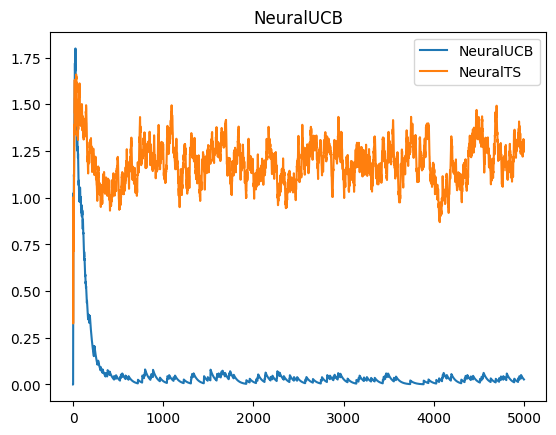

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

df = pd.DataFrame(action_rank_TS)
df['rank_Neural_TS'] = action_rank_TS
df['rank_Neural_TS'] = df['rank_Neural_TS'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_TS))
plt.plot(df['time'],df['rank_Neural_TS'],label = 'NeuralTS')

plt.title('NeuralUCB vs NeuralTS')
plt.legend()
plt.show()


### Neural UCB with Action Parametrization

In [152]:
from tqdm import tqdm
import numpy as np
import bluebandits as bb
import bluesimulator as bs

In [153]:
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 
K = 4# Total number of actions,
actions = np.random.normal(size=[K,2])
T = 5000 # Total number of periods
d = 4 # the dimension of context
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
A = np.random.normal(loc=0, scale=1, size=(d, d))
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A1 = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1

In [154]:
# NEURAL UCB ALGORITHM
import numpy as np
import torch
import random
from copy import deepcopy


class NeuralNetwork(torch.nn.Module):
    def __init__(
        self,
        d: int,
        L: int = 2,
        m: int = 20,
        random_seed: int = 12345,
        device: torch.device = torch.device("cpu"),
    ):
        """The proposed neural network structure in Zhou 2020

        Args:
            d (int): Dimension of input layer.
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            random_seed (int, optional): rando_seed. Defaults to 12345.
            device (torch.device, optional): The device of calculateing tensor. Defaults to torch.device("cpu").
        """
        super().__init__()
        np.random.seed(random_seed)
        torch.manual_seed(random_seed)

        self.d = d
        self.L = L
        self.m = m
        self.random_seed = random_seed
        self.activation = torch.nn.ReLU()

        self.device = device
        print(f"Using device {self.device}")

        self.W = torch.nn.ParameterDict()
        w_for_1 = np.random.randn(d // 2, m // 2) * np.sqrt(4 / m)
        w_for_1_to_Lminus1 = np.random.randn(m // 2, m // 2) * np.sqrt(4 / m)
        w_for_L = np.random.randn(m // 2) * np.sqrt(2 / m)
        for layer_index in range(1, L + 1):
            if layer_index == 1:
                W = np.zeros((d, m))
                W[0 : d // 2, 0 : m // 2] = w_for_1
                W[d // 2 :, m // 2 :] = w_for_1
                self.W["W1"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            elif layer_index == L:
                W = np.zeros((m, 1))
                W[0 : m // 2, 0] = w_for_L
                W[m // 2 :, 0] = -w_for_L
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            else:
                W = np.zeros((m, m))
                W[0 : m // 2, 0 : m // 2] = w_for_1_to_Lminus1
                W[m // 2 :, m // 2 :] = w_for_1_to_Lminus1
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
        self.W0 = dict()
        for key in self.W.keys():
            self.W0[key] = deepcopy(self.W[key])
            self.W0[key].requires_grad_(requires_grad=False)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """we accept a Tensor of input data and we must return
        a Tensor of output data

        Args:
            x (torch.Tensor): The observed context of each arm

        Returns:
            torch.Tensor: The predicted mean reward of each arm
        """
        assert x.shape[1] == self.d, "Dimension doesn't match"
        x = x.to(self.device)
        for layer_index in range(1, self.L + 1):
            x = torch.matmul(x, self.W[f"W{layer_index}"])
            if layer_index != self.L:
                x = self.activation(x)
        x = x * np.sqrt(self.m)
        return x

    def GetGrad(self, x: torch.tensor) -> np.ndarray:
        """Given the vector of context, return the flattern gradient of parameter

        Args:
            x (torch.tensor): x.shape = (d,)

        Returns:
            np.ndarray: The gradient of parameter at given point
        """
        x = x[None, :]  # expand the dimension of x
        output = self.forward(x)[0, 0]
        output.backward()

        grad = np.array([])
        for para in self.parameters():
            grad = np.concatenate([grad, para.grad.cpu().detach().numpy().flatten()], axis=0)
        return grad


class BestAgent:
    def __init__(self, K, T, d, A):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        # A is the context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.A = A
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list):
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        expected_reward = np.zeros(self.K)
        for kk in range(0, self.K):
            context = context_list[kk, :]
            expected_reward[kk] = context.transpose().dot(self.A.transpose().dot(self.A)).dot(context)
        ind = np.argmax(expected_reward, axis=None)
        self.history_context[:, self.t] = context_list[ind, :]
        self.history_action[self.t] = ind
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context


class UniformAgent:
    def __init__(self, K, T, d):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list):
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        ind = np.random.randint(0, high=self.K)  # we just uniformly choose an action
        self.history_context[:, self.t] = context_list[ind, :]
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context


class Agent:
    def __init__(
        self,
        K: int,
        T: int,
        d: int,
        L: int = 2,
        m: int = 20,
        gamma_t: float = 0.01,
        nu: float = 0.1,
        lambda_: float = 0.01,
        delta: float = 0.01,
        S: float = 0.01,
        eta: float = 0.001,
        frequency: int = 50,
        batchsize: int = 50,
    ):
        """The proposed Neural UCB algorithm for solving contextual bandits

        Args:
            K (int): Number of arms
            T (int): Number of rounds
            d (int): Dimension of context
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            gamma_t (float, optional): Exploration parameter. Defaults to 0.01.
            v (float, optional): Exploration parameter. Defaults to 0.1.
            lambda_ (float, optional): Regularization parameter. Defaults to 0.01.
            delta (float, optional): Confidence parameter. Defaults to 0.01.
            S (float, optional): Norm parameter. Defaults to 0.01.
            eta (float, optional): Step size. Defaults to 0.001.
            frequency (int, optional): The interval between two training rounds. Defaults to 50.
            batchsize (int, optional): The batchsize of applying SGD on the neural network. Defaults to None.
        """
        self.K = K
        self.T = T
        self.d = d

        self.L = L
        self.m = m
        self.gamma_t = gamma_t
        self.nu = nu
        self.lambda_ = lambda_
        self.delta = delta
        self.S = S
        self.eta = eta
        self.frequency = frequency  # we train the network after frequency, e.g. per 50 round
        self.batchsize = batchsize
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.predicted_reward = np.zeros(T)
        self.predicted_reward_upperbound = np.zeros(T)
        self.history_context = np.zeros((T, d))

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.mynn = NeuralNetwork(d=d, L=L, m=m, device=self.device)
        self.optimizer = torch.optim.SGD(self.mynn.parameters(), lr=self.eta)
        self.criterion = torch.nn.MSELoss()
        self.p = m + m * d + m * m * (L - 2)
        self.Z_t_minus1 = lambda_ * np.eye(self.p)

    def Action(self, context_list: np.array) -> int:
        """Given the observed context of each arm, return the predicted arm

        Args:
            context_list (np.array): The observed context of each arm. context_list.shape = (K, d)

        Returns:
            int: the index of predicted arm, take value from 0, 1, ..., K-1
        """
        predict_reward = self.mynn.forward(torch.from_numpy(context_list))[:, 0]
        predict_reward = predict_reward.cpu().detach().numpy()

        Z_t_minus1_inverse = np.linalg.inv(self.Z_t_minus1)

        confidence = np.zeros(self.K)
        for arm in range(1, self.K + 1):
            grad_arm = self.mynn.GetGrad(torch.from_numpy(context_list[arm - 1, :]))
            confidence[arm - 1] = np.sqrt(grad_arm.dot(Z_t_minus1_inverse).dot(grad_arm) / self.m)

        # calculate the upper confidence bound
        ucb = predict_reward + self.gamma_t * confidence
        ind = np.argmax(ucb)

        # save the history
        self.history_action[self.t] = ind
        self.history_context[self.t, :] = context_list[ind, :]
        self.predicted_reward[self.t] = predict_reward[ind]
        self.predicted_reward_upperbound = ucb[ind]
        return ind

    def Update(self, reward):
        self.history_reward[self.t] = reward
        ind = self.history_action[self.t]
        context = self.history_context[self.t, :]

        # compute Z_t_minus1
        grad_parameter = self.mynn.GetGrad(torch.from_numpy(context))
        grad_parameter = np.expand_dims(grad_parameter, axis=1)
        self.Z_t_minus1 = self.Z_t_minus1 + grad_parameter.dot(grad_parameter.transpose()) / self.m

        if (self.t + 1) % self.frequency == 0:  # train the network
            # initialize the network again
            for key in self.mynn.W.keys():
                self.mynn.W[key].data = deepcopy(self.mynn.W0[key].data)

            # for jj in range(self.t):  ## J=t at round t, but when we adopt such setting, the training process will be very slow
            for jj in range(np.minimum(self.t, 100)):
                loss_ = list()

                # shuffle the history and conduct SGD
                history_index = np.arange(self.t + 1)
                np.random.shuffle(history_index)
                temp_history_context = self.history_context[history_index, :]
                temp_history_reward = self.history_reward[history_index]
                for batch_index in range(0, self.t // self.batchsize + 1):
                    # split the batch
                    if batch_index < self.t // self.batchsize:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize : (batch_index + 1) * self.batchsize, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize : (batch_index + 1) * self.batchsize]).to(self.device)
                    else:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize :, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize :]).to(self.device)

                    # update the neural network
                    self.optimizer.zero_grad()
                    output = self.mynn.forward(X_temp)

                    # calculate the loss function
                    # in their orginal paper, $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2+m\lambda\|\theta-\theta^{(0)}\|_2^2/2$
                    # but here we set $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2/t+\lambda\|\theta-\theta^{(0)}\|_2^2/2/p$
                    # to balance the terms in the loss function
                    loss = self.criterion(output[:, 0], y_temp)  ## predict error
                    # loss = torch.sum((output[:, 0] - y_temp) ** 2)
                    ## regularization
                    for key in self.mynn.W.keys():
                        # loss += self.lambda_ * self.m * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2
                        loss += self.lambda_ * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2 / self.p
                    loss.backward()
                    self.optimizer.step()

                    # record the training process
                    loss_.append(loss.cpu().detach().numpy())

                if (jj + 1) % 20 == 0:
                    print(f"{jj+1} training epoch, mean loss value is {np.mean(loss_)}")

        self.t += 1


In [155]:
# NUERAL UCB ENVIRONMENT WITH ACTION PARAMETRIZATION
import numpy as np
from pandas import *
from sklearn.preprocessing import normalize

class InconsistentNumberOfFeatures(Exception):
    """Exception raised for errors in the input features.

    """

    def __init__(self, message="Inconsistent Dimensions of feature vectors:"):
        self.message = message
        super().__init__(self.message)

def CustomContext(filename,list_of_features,d,K):
    """This function return context, as an K*d matrix, each row represents a context of action

    Args:
        filename: Name of custom data set
        list_of_features: list of names of features that we wanna incorporate for the algorithm
        d (int): Dimension of context
        K (int): Number of arms

    Returns:
        context: an np.ndarray whose shape is (K, d), each row represents a context
    """
    data = read_csv(filename)
    if len(list_of_features)!=d:
        raise InconsistentNumberOfFeatures()
    features=[]
    for feature in list_of_features:
        temp_array = np.array(data[feature].to_list())
        features.append(temp_array[0:K])
    context = normalize(np.array(features),axis = 1,norm='l2')

    return context

def SampleContext(d, K):
    """This function return context, as an K*d matrix, each row represents a context of action

    Args:
        d (int): Dimension of context
        K (int): Number of arms

    Returns:
        context: an np.ndarray whose shape is (K, d), each row represents a context
    """
    context = np.random.normal(loc=0, scale=1, size=(K, d // 2))
    length = np.sqrt(np.sum(context * context, axis=1, keepdims=True))
    context = np.tile(context, (1, 2))
    length = np.tile(length, (1, d))
    context = context / length / np.sqrt(2)  # each column represent a context
    return context


def GetRealReward(context, A,actions):
    """Given the context, return the realized reward

    Args:
        context (np.ndarray): An np.ndarray whose shape is (K, d), each column represents a context of an arm
        A (np.ndarray): The parameter of this reward function
        actions(np.ndarray): A k*m dimensional action vectors
    Returns:
        reward: an np.ndarray whose shape is (K,), reward = context^T A^T A context + N(0, 0.05^2)
    """
    # Concatenate action parameters to existing context list.
    context = np.concatenate((context, actions), axis=1)
    if len(context.shape) == 1:
        return context.transpose().dot(A.transpose().dot(A)).dot(context) + np.random.normal(loc=0, scale=0.05)
    else:
        return np.diag(context.dot(A.transpose().dot(A)).dot(context.transpose())) + np.random.normal(loc=0, scale=0.05, size=context.shape[0])


In [163]:
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []

neuralUCBagent = Agent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)
for tt in tqdm(range(1, 11 + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    #context_list = CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)
    context_list = bs.NeuralUCB.environment.SampleContext(d,K)
    
    realized_reward = GetRealReward(context_list, A,actions)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neuralUCB_ind = neuralUCBagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))

    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralUCBagent.Update(neuralUCB_reward)



Using device cpu


100%|██████████| 11/11 [00:00<00:00, 20.89it/s]


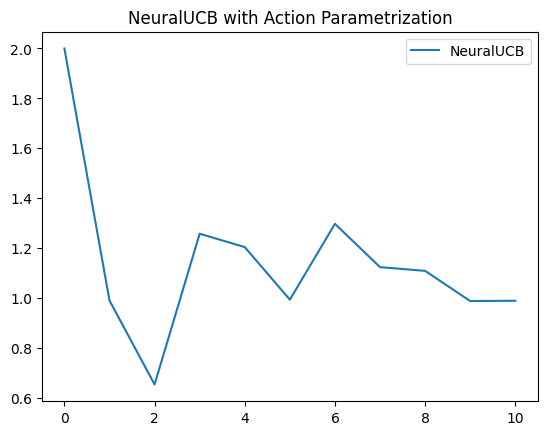

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')


plt.legend()
plt.title("NeuralUCB with Action Parametrization")
plt.show()


### LinUCB - Disjoint

In [1]:
#LinUCB DISJOINT ENVIRONMENT CODE
import numpy as np

def make_design_matrix(n_trial, n_arms, n_feature):
    """
    Returns the design matrix ofsize n_trial*n_arms*n_feature
    """
    available_arms = np.arange(n_arms)
    X = np.array([[np.random.uniform(low=0, high=1, size=n_feature) for _ in available_arms] for _ in np.arange(n_trial)])
    return X

def make_theta(n_arms, n_feature, best_arms, bias = 1):
    """
    Returns the parameter matrix ofsize n_arms*n_feature
    """
    true_theta = np.array([np.random.normal(size=n_feature, scale=1/4) for _ in np.arange(n_arms)])
    true_theta[best_arms] = true_theta[best_arms] + bias
    return true_theta

def generate_reward(arm, x, theta, scale_noise = 1/10):
    signal = theta[arm].dot(x)
    noise = np.random.normal(scale=scale_noise)
    return (signal + noise)

def make_regret(payoff, oracle):
    return np.cumsum(oracle - payoff)


def GetRealReward(context: np.ndarray, theta: np.ndarray,scale_noise = 1/10) -> np.ndarray:
    """Given the context, return the realized reward

    Args:
        context (np.ndarray): An np.ndarray whose shape is (K, d), each column represents a context of an arm
        theta is true theta(np.ndarray): The parameter of this reward function

    Returns:
        reward: an np.ndarray whose shape is (K,), reward = context^T A^T A context + N(0, 0.05^2)
    """
    rewards = []
    for arm in range(theta.shape[0]):
        signal = theta[arm].dot(context[arm])
        noise = np.random.normal(scale=scale_noise)
        rewards.append(noise+signal)
    return np.array(rewards)

In [115]:
#AGENT CODE
import numpy as np

import torch
import random
from copy import deepcopy

class BestAgent:
    def __init__(self, K, T, d, A):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        # A is the context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.A = A
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list):
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        expected_reward = np.zeros(self.K)
        for kk in range(0, self.K):
            context = context_list[kk, :]
            expected_reward[kk] = context.transpose().dot(self.A.transpose().dot(self.A)).dot(context)
        ind = np.argmax(expected_reward, axis=None)
        self.history_context[:, self.t] = context_list[ind, :]
        self.history_action[self.t] = ind
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context


class UniformAgent:
    def __init__(self, K, T, d):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list: np.array) -> int:
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        ind = np.random.randint(0, high=self.K)  # we just uniformly choose an action
        self.history_context[:, self.t] = context_list[ind, :]
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context

class Agent:
    def __init__(
        self,
        K: int,
        T: int,
        d: int,
        A,
        b,
        theta,
        X,
        p,
        alpha,
        true_theta
    ):
        """The proposed Neural UCB algorithm for solving contextual bandits

        Args:
            K (int): Number of arms
            T (int): Number of rounds
            d (int): Dimension of context
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            gamma_t (float, optional): Exploration parameter. Defaults to 0.01.
            v (float, optional): Exploration parameter. Defaults to 0.1.
            lambda_ (float, optional): Regularization parameter. Defaults to 0.01.
            delta (float, optional): Confidence parameter. Defaults to 0.01.
            S (float, optional): Norm parameter. Defaults to 0.01.
            eta (float, optional): Step size. Defaults to 0.001.
            frequency (int, optional): The interval between two training rounds. Defaults to 50.
            batchsize (int, optional): The batchsize of applying SGD on the neural network. Defaults to None.
        """
        self.K = K
        self.T = T
        self.d = d
        self.A = A
        self.b = b
        self.theta = theta
        self.p = p
        self.X = X
        self.alpha = alpha
        self.true_theta = true_theta
        
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.predicted_reward = np.zeros(T)
        self.predicted_reward_upperbound = np.zeros(T)
        self.history_context = np.zeros((T, d))

        

    def Action(self, context_list: np.array,scale_noise = 1/10) -> int:
        """Given the observed context of each arm, return the predicted arm

        Args:
            context_list (np.array): The observed context of each arm. context_list.shape = (K, d)

        Returns:
            int: the index of predicted arm, take value from 0, 1, ..., K-1
        """
        

        
        for arm in range(self.K):
            inv_A = np.linalg.inv(self.A[arm])
            self.theta[self.t,arm] = inv_A.dot(self.b[arm])
            self.p[self.t,arm] = self.theta[self.t,arm].dot(self.X[self.t,arm]) + self.alpha*np.sqrt(self.X[self.t,arm].dot(inv_A).dot(self.X[self.t,arm]))


        # calculate the upper confidence bound
        chosen_arm = np.argmax(self.p[self.t])
        ind = chosen_arm
        x_chosen_arm = self.X[self.t, chosen_arm]
        signal = self.true_theta[ind].dot(x_chosen_arm)
        noise = np.random.normal(scale=scale_noise)
        # save the history
        self.history_action[self.t] = ind
        self.history_context[self.t, :] = context_list[ind, :]
        self.predicted_reward[self.t] = noise + signal
        self.predicted_reward_upperbound = self.p[self.t][ind]
        return ind

    def Update(self, reward):
        self.history_reward[self.t] = reward
        ind = int(self.history_action[self.t])
        
        context = self.history_context[self.t, :]

        temp_vec = self.A[ind]
        self.A[ind] = temp_vec+ np.outer(self.X[self.t,ind],self.X[self.t,ind].T)
        self.b+=reward*self.X[self.t,ind]
        self.t += 1

round index 1; neural choose 5, reward is -0.187828; best choose 5, reward is -0.187828
round index 2; neural choose 4, reward is 0.617282; best choose 4, reward is 0.617282
round index 3; neural choose 0, reward is -0.403481; best choose 0, reward is -0.403481
round index 4; neural choose 2, reward is 6.037434; best choose 1, reward is 0.247745
round index 5; neural choose 3, reward is -0.184569; best choose 2, reward is 7.086716
round index 6; neural choose 1, reward is 0.597908; best choose 2, reward is 6.192067
round index 7; neural choose 3, reward is 0.465786; best choose 4, reward is 0.113041
round index 8; neural choose 5, reward is -0.238369; best choose 4, reward is 0.484309
round index 9; neural choose 1, reward is 0.126134; best choose 4, reward is 0.157110
round index 10; neural choose 1, reward is 0.408330; best choose 3, reward is 0.090496
round index 11; neural choose 3, reward is 0.255980; best choose 3, reward is 0.255980
round index 12; neural choose 5, reward is -0.

Text(0, 0.5, 'Total Reward')

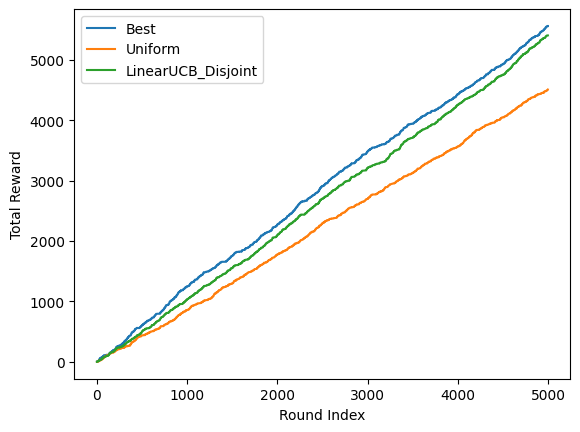

In [119]:
import numpy as np
import random
from copy import deepcopy
import bluesimulator as bs


# Implement the algorithm
np.random.seed(12349)
T = 5000
K = 6
d=10
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = make_design_matrix(T,K,d)
alpha = 1
b = np.array([np.zeros(shape=d) for _ in np.arange(K)])
best_arms = [2]
true_theta = make_theta(K,d,best_arms)


linearagent = Agent(K = K,T=T,d=d,A=A,b=b,theta=theta,X=X,p=p,alpha=alpha,true_theta = true_theta)
bestagent = BestAgent(K, T, d, A = A[0])
uniformagent = UniformAgent(K, T, d)
for tt in range(1, T + 1):
    
    # observe \{x_{t,a}\}_{a=1}^{k=1}
    context_list = X[tt-1]
    realized_reward = GetRealReward(context_list, true_theta)
    
    # neuralagent
    linear_ind = linearagent.Action(context_list)# make a decision
    linear_reward = realized_reward[linear_ind]# play neural_ind-th arm and observe reward
    linearagent.Update(linear_reward)
    
    # bestagent
    best_ind = bestagent.Action(context_list)# make a decision
    best_reward = realized_reward[best_ind]# play best_ind-th arm and observe reward
    bestagent.Update(best_reward)
    
    # uniformagent
    uniform_ind = uniformagent.Action(context_list)# make a decision
    uniform_reward = realized_reward[uniform_ind]# play uniform_ind-th arm and observe reward
    uniformagent.Update(uniform_reward)
    
    print("round index {:d}; neural choose {:d}, reward is {:f}; best choose {:d}, reward is {:f}".format(tt,
                                                                                                          linear_ind,
                                                                                                          linear_reward,
                                                                                                          best_ind,
                                                                                                          best_reward,))

# plot the ratio of cumulated reward
import matplotlib.pyplot as plt
h_r_b = bestagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_b))

h_r_u = uniformagent.GetHistoryReward()
plt.plot(range(0, T), np.cumsum(h_r_u))

h_r_n = deepcopy(linearagent.history_reward)
plt.plot(range(0, T), np.cumsum(h_r_n))

plt.legend(["Best", "Uniform", "LinearUCB_Disjoint"])
plt.xlabel("Round Index")
plt.ylabel("Total Reward")

100%|██████████| 5000/5000 [00:01<00:00, 2544.94it/s]


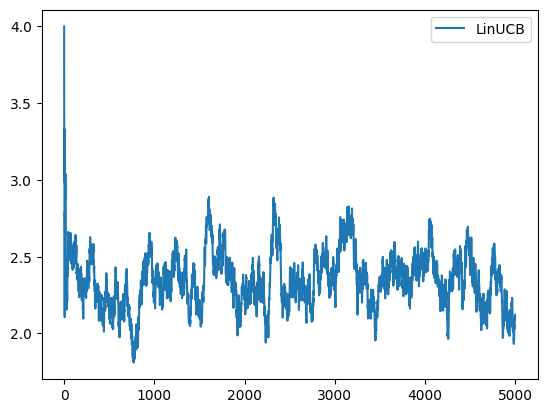

In [123]:
import bluesimulator as bs
from tqdm import tqdm 
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []


linearagent = linearagent = Agent(K = K,T=T,d=d,A=A,b=b,theta=theta,X=X,p=p,alpha=alpha,true_theta = true_theta)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    context_list = X[tt-1]
    realized_reward = GetRealReward(context_list, true_theta)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    linearUCB_ind = linearagent.Action(context_list)
    action_list_LinUCB.append(linearUCB_ind)
    action_rank_LinUCB.append(list(action_order).index(linearUCB_ind))




    ''' Online Learning '''
    # neuralUCB_reward = realized_reward[neuralUCB_ind]
    # neuralUCBagent.Update(neuralUCB_reward)

    # neuralTS_reward = realized_reward[neuralTS_ind]
    # neuralTSagent.Update(neuralTS_reward)

    LinUCB_reward = realized_reward[linearUCB_ind]
    linearagent.Update(LinUCB_reward)

import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_LinUCB)
df['rank_Linear_UCB'] = action_rank_LinUCB
df['rank_Linear_UCB'] = df['rank_Linear_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_LinUCB))
plt.plot(df['time'],df['rank_Linear_UCB'],label='LinUCB_Disjoint')

plt.legend()
plt.show()


### Same Context Vector for every action implementation

In [225]:
from tqdm import tqdm
import numpy as np
import bluesimulator as bs
import bluebandits
# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 
K = 4# Total number of actions, 
T = 5000 # Total number of periods
d = 4 # the dimension of context
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
A = np.random.normal(loc=0, scale=1, size=(d, d))
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A1 = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1
def CustomContext(filename,list_of_features,d,K):
    """This function return context, as an K*d matrix, each row represents a context of action

    Args:
        filename: Name of custom data set
        list_of_features: list of names of features that we wanna incorporate for the algorithm
        d (int): Dimension of context
        K (int): Number of arms

    Returns:
        context: an np.ndarray whose shape is (K, d), each row represents a context
    """
    data = read_csv(filename)
    if len(list_of_features)!=d:
        raise InconsistentNumberOfFeatures()
    features=[]
    for feature in list_of_features:
        temp_array = np.array(data[feature].to_list())
        features.append(temp_array[np.random.randint(0,2666)])
    context_arr = np.array([np.array(features) for i in range(K)])
    
    context = normalize(context_arr,axis = 1,norm='l2')
    
    return context

In [230]:
t = 9
context_list = CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)

realized_reward = bs.NeuralUCB.environment.GetRealReward(context_list,A)
realized_reward

array([6.88546087, 6.87145941, 7.01644443, 6.99777091])

In [226]:
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []
from bluebandits.NeuralUCB.agent import Agent
neuralUCBagent = Agent(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)
from bluebandits.NeuralThompsonSampling.agent import Agent
neuralTSagent = Agent(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
from bluebandits.LinUCB.agent import Agent
linearagent = Agent(K = K,T=T,d=d,A=A1,theta=theta,X=X,p=p,alpha=alpha)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    context_list = CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)

    realized_reward = bs.NeuralUCB.environment.GetRealReward(context_list,A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neuralUCB_ind = neuralUCBagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))

    neuralTS_ind = neuralTSagent.Action(context_list)
    action_list_TS.append(neuralTS_ind)
    action_rank_TS.append(list(action_order).index(neuralTS_ind))

    linearUCB_ind = linearagent.Action(context_list)
    action_list_LinUCB.append(linearUCB_ind)
    action_rank_LinUCB.append(list(action_order).index(linearUCB_ind))

    




    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralUCBagent.Update(neuralUCB_reward)

    neuralTS_reward = realized_reward[neuralTS_ind]
    neuralTSagent.Update(neuralTS_reward)

    LinUCB_reward = realized_reward[linearUCB_ind]
    linearagent.Update(LinUCB_reward)
    



Using device cpu
Using device cpu


  1%|          | 50/5000 [00:05<09:50,  8.38it/s]

20 training epoch, mean loss value is 0.5100987705514849
40 training epoch, mean loss value is 0.36683427210245656
20 training epoch, mean loss value is 0.5157523324654204
40 training epoch, mean loss value is 0.3717203700119564


  2%|▏         | 100/5000 [00:07<05:25, 15.04it/s]

20 training epoch, mean loss value is 0.4156808232443918
40 training epoch, mean loss value is 0.24759143875694445
60 training epoch, mean loss value is 0.15505897942643293
80 training epoch, mean loss value is 0.10158586985139277
20 training epoch, mean loss value is 0.4187577958481886
40 training epoch, mean loss value is 0.25158700117942384
60 training epoch, mean loss value is 0.1574010278060205
80 training epoch, mean loss value is 0.10401134659358222


  3%|▎         | 146/5000 [00:08<01:48, 44.64it/s]

20 training epoch, mean loss value is 0.3299861689036183
40 training epoch, mean loss value is 0.16435690224645624
60 training epoch, mean loss value is 0.09175951665874386
80 training epoch, mean loss value is 0.05977965805173554
100 training epoch, mean loss value is 0.04471189363535314
20 training epoch, mean loss value is 0.33404273231075576
40 training epoch, mean loss value is 0.16663485997185642
60 training epoch, mean loss value is 0.09437669022250432
80 training epoch, mean loss value is 0.0614874419791708
100 training epoch, mean loss value is 0.0467776317899593


  4%|▍         | 196/5000 [00:10<01:52, 42.53it/s]

20 training epoch, mean loss value is 0.2453027725120313
40 training epoch, mean loss value is 0.09788355157640308
60 training epoch, mean loss value is 0.05244867325900976
80 training epoch, mean loss value is 0.03816632744444159
100 training epoch, mean loss value is 0.03229462166636189
20 training epoch, mean loss value is 0.24830867521739028
40 training epoch, mean loss value is 0.09971690644975853
60 training epoch, mean loss value is 0.053764973281730286
80 training epoch, mean loss value is 0.03888397859306651
100 training epoch, mean loss value is 0.03347636172971566


  5%|▍         | 249/5000 [00:12<02:00, 39.35it/s]

20 training epoch, mean loss value is 0.19760050778792687
40 training epoch, mean loss value is 0.07325165761240479
60 training epoch, mean loss value is 0.040876912485354536
80 training epoch, mean loss value is 0.03146561667742016
100 training epoch, mean loss value is 0.02831479370327532
20 training epoch, mean loss value is 0.198152910433026
40 training epoch, mean loss value is 0.07398002947586406
60 training epoch, mean loss value is 0.041952377692433276
80 training epoch, mean loss value is 0.032526375618752004
100 training epoch, mean loss value is 0.029071817131084577


  6%|▌         | 294/5000 [00:14<02:15, 34.63it/s]

20 training epoch, mean loss value is 0.1568190247585354
40 training epoch, mean loss value is 0.0565627818116857
60 training epoch, mean loss value is 0.03678562227632944
80 training epoch, mean loss value is 0.031726122032465276
100 training epoch, mean loss value is 0.029221375795727325
20 training epoch, mean loss value is 0.15874220134195058
40 training epoch, mean loss value is 0.05734938038140897
60 training epoch, mean loss value is 0.03705200294680551


  6%|▌         | 300/5000 [00:14<04:28, 17.54it/s]

80 training epoch, mean loss value is 0.031922737706193555
100 training epoch, mean loss value is 0.029612838360569698


  7%|▋         | 345/5000 [00:15<01:30, 51.22it/s]

20 training epoch, mean loss value is 0.12881547145040634
40 training epoch, mean loss value is 0.04837014869417044
60 training epoch, mean loss value is 0.03557600133110271
80 training epoch, mean loss value is 0.031641840342880666
100 training epoch, mean loss value is 0.029056414155062042
20 training epoch, mean loss value is 0.1291778465491518
40 training epoch, mean loss value is 0.048437641241019916
60 training epoch, mean loss value is 0.03544574626832465
80 training epoch, mean loss value is 0.031701392387857255
100 training epoch, mean loss value is 0.02920462673402658


  8%|▊         | 394/5000 [00:17<01:50, 41.80it/s]

20 training epoch, mean loss value is 0.09964903710489545
40 training epoch, mean loss value is 0.041870609514252026
60 training epoch, mean loss value is 0.033838167532640864
80 training epoch, mean loss value is 0.030663651511960502
100 training epoch, mean loss value is 0.028176466811773
20 training epoch, mean loss value is 0.10131243946624122
40 training epoch, mean loss value is 0.04187329212525699
60 training epoch, mean loss value is 0.03384100026276916
80 training epoch, mean loss value is 0.030697715418165572


  8%|▊         | 400/5000 [00:18<04:46, 16.08it/s]

100 training epoch, mean loss value is 0.02829370015308533


  9%|▉         | 449/5000 [00:19<01:55, 39.55it/s]

20 training epoch, mean loss value is 0.08127620293800741
40 training epoch, mean loss value is 0.042245458473897615
60 training epoch, mean loss value is 0.036496050806380104
80 training epoch, mean loss value is 0.03253505514757003
100 training epoch, mean loss value is 0.029266598766006686
20 training epoch, mean loss value is 0.08220020601965078
40 training epoch, mean loss value is 0.0427951137226749
60 training epoch, mean loss value is 0.03648295741971875
80 training epoch, mean loss value is 0.032713272921182854
100 training epoch, mean loss value is 0.029518174270662903


 10%|▉         | 496/5000 [00:21<01:37, 46.26it/s]

20 training epoch, mean loss value is 0.07174836781046529
40 training epoch, mean loss value is 0.03969844494218948
60 training epoch, mean loss value is 0.03392491618894671
80 training epoch, mean loss value is 0.02998123534487579
100 training epoch, mean loss value is 0.026731999297844374
20 training epoch, mean loss value is 0.07208314728113469
40 training epoch, mean loss value is 0.04000884046498289
60 training epoch, mean loss value is 0.034342697608120074
80 training epoch, mean loss value is 0.030372774400072557
100 training epoch, mean loss value is 0.027181741530181297


 11%|█         | 548/5000 [00:23<01:27, 51.04it/s]

20 training epoch, mean loss value is 0.07013852284894428
40 training epoch, mean loss value is 0.04470550987815047
60 training epoch, mean loss value is 0.03765496336276612
80 training epoch, mean loss value is 0.03227228690027983
100 training epoch, mean loss value is 0.028016453570026408
20 training epoch, mean loss value is 0.07125107257172583
40 training epoch, mean loss value is 0.04538531535972415
60 training epoch, mean loss value is 0.03840936860415853
80 training epoch, mean loss value is 0.03291078846269151
100 training epoch, mean loss value is 0.028616338957175632


 12%|█▏        | 597/5000 [00:25<01:33, 47.03it/s]

20 training epoch, mean loss value is 0.0639653902932808
40 training epoch, mean loss value is 0.04350956846071393
60 training epoch, mean loss value is 0.03626424319239922
80 training epoch, mean loss value is 0.030838017954845854
100 training epoch, mean loss value is 0.02658615864666913
20 training epoch, mean loss value is 0.06416454588709468
40 training epoch, mean loss value is 0.0436845251099403
60 training epoch, mean loss value is 0.03654786992342023
80 training epoch, mean loss value is 0.03099813498842711
100 training epoch, mean loss value is 0.026773187379574393


 13%|█▎        | 646/5000 [00:27<01:37, 44.44it/s]

20 training epoch, mean loss value is 0.05789101828867938
40 training epoch, mean loss value is 0.04117563915877665
60 training epoch, mean loss value is 0.034303635627825804
80 training epoch, mean loss value is 0.02901384417467375
100 training epoch, mean loss value is 0.024853828754846288
20 training epoch, mean loss value is 0.058619594925617885
40 training epoch, mean loss value is 0.04144990339404212
60 training epoch, mean loss value is 0.03454926562491849
80 training epoch, mean loss value is 0.029181307435860386
100 training epoch, mean loss value is 0.025146636114433893


 14%|█▍        | 697/5000 [00:29<01:32, 46.69it/s]

20 training epoch, mean loss value is 0.054092193864372744
40 training epoch, mean loss value is 0.039268059208817596
60 training epoch, mean loss value is 0.032513466749024826
80 training epoch, mean loss value is 0.027423941709990768
100 training epoch, mean loss value is 0.023445402054797622
20 training epoch, mean loss value is 0.05464794711271215
40 training epoch, mean loss value is 0.03972058967228121
60 training epoch, mean loss value is 0.03275884226459547
80 training epoch, mean loss value is 0.0275948162691149
100 training epoch, mean loss value is 0.02363732559654146


 15%|█▍        | 747/5000 [00:32<01:59, 35.62it/s]

20 training epoch, mean loss value is 0.05289139045139813
40 training epoch, mean loss value is 0.03903921764332316
60 training epoch, mean loss value is 0.03186082443300524
80 training epoch, mean loss value is 0.026632762203731508
100 training epoch, mean loss value is 0.022543525272701568
20 training epoch, mean loss value is 0.05257919991528878
40 training epoch, mean loss value is 0.038795131020484
60 training epoch, mean loss value is 0.03180686249103373
80 training epoch, mean loss value is 0.02658211960210059
100 training epoch, mean loss value is 0.022588306566657192


 16%|█▌        | 795/5000 [00:35<02:09, 32.43it/s]

20 training epoch, mean loss value is 0.05221187839718924
40 training epoch, mean loss value is 0.038982581537918955
60 training epoch, mean loss value is 0.031559206254959234
80 training epoch, mean loss value is 0.026081756479443947
100 training epoch, mean loss value is 0.02177849339551267
20 training epoch, mean loss value is 0.05259270668108011
40 training epoch, mean loss value is 0.039101995947407125
60 training epoch, mean loss value is 0.03167062711211352


 16%|█▌        | 800/5000 [00:36<07:33,  9.26it/s]

80 training epoch, mean loss value is 0.02607014838653693
100 training epoch, mean loss value is 0.021829384273074258


 17%|█▋        | 849/5000 [00:37<01:52, 36.78it/s]

20 training epoch, mean loss value is 0.051519032564035915
40 training epoch, mean loss value is 0.03828002063330302
60 training epoch, mean loss value is 0.030602423758408374
80 training epoch, mean loss value is 0.025044773565951414
100 training epoch, mean loss value is 0.020673504529605
20 training epoch, mean loss value is 0.0518317055109299
40 training epoch, mean loss value is 0.03867959615036974
60 training epoch, mean loss value is 0.030766944490678842
80 training epoch, mean loss value is 0.02508868364029859
100 training epoch, mean loss value is 0.0208020238510102


 18%|█▊        | 895/5000 [00:40<01:48, 37.78it/s]

20 training epoch, mean loss value is 0.04938421363968723
40 training epoch, mean loss value is 0.036813215801683126
60 training epoch, mean loss value is 0.02917283095953698
80 training epoch, mean loss value is 0.02371803815300708
100 training epoch, mean loss value is 0.019673005091803107
20 training epoch, mean loss value is 0.0493489172389
40 training epoch, mean loss value is 0.03675977157511288
60 training epoch, mean loss value is 0.029108150944048457
80 training epoch, mean loss value is 0.023709793303013153
100 training epoch, mean loss value is 0.019615090415682455


 19%|█▉        | 946/5000 [00:43<01:40, 40.22it/s]

20 training epoch, mean loss value is 0.0474789404626915
40 training epoch, mean loss value is 0.03541153644347128
60 training epoch, mean loss value is 0.027987836787776686
80 training epoch, mean loss value is 0.02279105582946696
100 training epoch, mean loss value is 0.0188524942509759
20 training epoch, mean loss value is 0.04705942293290073
40 training epoch, mean loss value is 0.035051562379201685
60 training epoch, mean loss value is 0.027754862665564695
80 training epoch, mean loss value is 0.022533638111619875
100 training epoch, mean loss value is 0.018647361968505454


 20%|█▉        | 997/5000 [00:46<01:50, 36.35it/s]

20 training epoch, mean loss value is 0.04739430236218646
40 training epoch, mean loss value is 0.03509090018927133
60 training epoch, mean loss value is 0.027462687750618792
80 training epoch, mean loss value is 0.02195513898536842
100 training epoch, mean loss value is 0.017934665990360255
20 training epoch, mean loss value is 0.04711757646795244
40 training epoch, mean loss value is 0.03504741323888926
60 training epoch, mean loss value is 0.027308627030399185
80 training epoch, mean loss value is 0.021879680427566092
100 training epoch, mean loss value is 0.017895054540776167


 21%|██        | 1044/5000 [00:48<01:46, 37.23it/s]

20 training epoch, mean loss value is 0.046148334271657654
40 training epoch, mean loss value is 0.03416873963911662
60 training epoch, mean loss value is 0.0266472714651789
80 training epoch, mean loss value is 0.0212678707047339
100 training epoch, mean loss value is 0.01733837367680569
20 training epoch, mean loss value is 0.04553214979374595
40 training epoch, mean loss value is 0.0337795758785209
60 training epoch, mean loss value is 0.02626539320537847
80 training epoch, mean loss value is 0.020953284790037725
100 training epoch, mean loss value is 0.01711290467236489


 22%|██▏       | 1093/5000 [00:51<01:43, 37.74it/s]

20 training epoch, mean loss value is 0.04494485783234585
40 training epoch, mean loss value is 0.033391438832995585
60 training epoch, mean loss value is 0.025873932212885916
80 training epoch, mean loss value is 0.02054149309984934
100 training epoch, mean loss value is 0.016717716086624073
20 training epoch, mean loss value is 0.04440304087219411
40 training epoch, mean loss value is 0.032655763329685346
60 training epoch, mean loss value is 0.025235753707341345
80 training epoch, mean loss value is 0.020042725785008406
100 training epoch, mean loss value is 0.016297620644560567


 23%|██▎       | 1144/5000 [00:54<01:51, 34.64it/s]

20 training epoch, mean loss value is 0.04348568198081034
40 training epoch, mean loss value is 0.03218490763681447
60 training epoch, mean loss value is 0.024854009707910088
80 training epoch, mean loss value is 0.019745710549565282
100 training epoch, mean loss value is 0.016102193439064168
20 training epoch, mean loss value is 0.04361803361436649
40 training epoch, mean loss value is 0.03209920046169636
60 training epoch, mean loss value is 0.024774196469226836
80 training epoch, mean loss value is 0.019627579610623055


 23%|██▎       | 1150/5000 [00:56<07:51,  8.16it/s]

100 training epoch, mean loss value is 0.015998485611242466


 24%|██▍       | 1195/5000 [00:57<01:33, 40.73it/s]

20 training epoch, mean loss value is 0.042028222376713664
40 training epoch, mean loss value is 0.030821077701585594
60 training epoch, mean loss value is 0.023867514345553186
80 training epoch, mean loss value is 0.018994835128496413
100 training epoch, mean loss value is 0.01547434685346658
20 training epoch, mean loss value is 0.041802270328924085
40 training epoch, mean loss value is 0.030696492944751148
60 training epoch, mean loss value is 0.02366218545187267
80 training epoch, mean loss value is 0.018854853226205406
100 training epoch, mean loss value is 0.015307516999669283


 25%|██▍       | 1244/5000 [01:00<01:55, 32.41it/s]

20 training epoch, mean loss value is 0.04181305986811112
40 training epoch, mean loss value is 0.030520996212463226
60 training epoch, mean loss value is 0.023317950164903567
80 training epoch, mean loss value is 0.018309675935926285
100 training epoch, mean loss value is 0.014866742137849408
20 training epoch, mean loss value is 0.04162852981345786
40 training epoch, mean loss value is 0.030278444338991392
60 training epoch, mean loss value is 0.02304533237151134
80 training epoch, mean loss value is 0.018129281724201057


 25%|██▌       | 1250/5000 [01:03<08:05,  7.73it/s]

100 training epoch, mean loss value is 0.014699380502475805


 26%|██▌       | 1299/5000 [01:04<01:26, 42.92it/s]

20 training epoch, mean loss value is 0.04141168967837162
40 training epoch, mean loss value is 0.029573493087462103
60 training epoch, mean loss value is 0.022363024307637033
80 training epoch, mean loss value is 0.01750933830419423
100 training epoch, mean loss value is 0.014207324423455363
20 training epoch, mean loss value is 0.04110796463193133
40 training epoch, mean loss value is 0.02926014615556324
60 training epoch, mean loss value is 0.0221490479772906
80 training epoch, mean loss value is 0.01732438883253156
100 training epoch, mean loss value is 0.01407035145296709


 27%|██▋       | 1349/5000 [01:07<01:41, 36.13it/s]

20 training epoch, mean loss value is 0.040515696092438075
40 training epoch, mean loss value is 0.028668330227814467
60 training epoch, mean loss value is 0.021618341670523834
80 training epoch, mean loss value is 0.01691872570283705
100 training epoch, mean loss value is 0.01373563179841606
20 training epoch, mean loss value is 0.04041078923318868
40 training epoch, mean loss value is 0.028539917438298694
60 training epoch, mean loss value is 0.021459570198776548
80 training epoch, mean loss value is 0.016783021458142502
100 training epoch, mean loss value is 0.013654304666402668


 28%|██▊       | 1398/5000 [01:10<01:48, 33.31it/s]

20 training epoch, mean loss value is 0.03924399834136509
40 training epoch, mean loss value is 0.027650675088431893
60 training epoch, mean loss value is 0.020777514695907252
80 training epoch, mean loss value is 0.01625519759758635
100 training epoch, mean loss value is 0.013226952403737042
20 training epoch, mean loss value is 0.03895993957792144
40 training epoch, mean loss value is 0.027396274372217654
60 training epoch, mean loss value is 0.020546167288637972
80 training epoch, mean loss value is 0.01606576331780466
100 training epoch, mean loss value is 0.013097942841803295


 29%|██▉       | 1443/5000 [01:14<01:56, 30.53it/s]

20 training epoch, mean loss value is 0.03844466521847539
40 training epoch, mean loss value is 0.02697151901909042
60 training epoch, mean loss value is 0.020141444846718152
80 training epoch, mean loss value is 0.015737705654163787
100 training epoch, mean loss value is 0.012848654552195173
20 training epoch, mean loss value is 0.03818972552418632
40 training epoch, mean loss value is 0.026684250245716072
60 training epoch, mean loss value is 0.01995363020536742
80 training epoch, mean loss value is 0.015604953054949482


 29%|██▉       | 1450/5000 [01:17<08:26,  7.01it/s]

100 training epoch, mean loss value is 0.012726815654893997


 30%|██▉       | 1498/5000 [01:18<01:30, 38.56it/s]

20 training epoch, mean loss value is 0.03773076243599548
40 training epoch, mean loss value is 0.026172892051993513
60 training epoch, mean loss value is 0.019500877974794422
80 training epoch, mean loss value is 0.01527496233584722
100 training epoch, mean loss value is 0.012464901721638772
20 training epoch, mean loss value is 0.0374421760577363
40 training epoch, mean loss value is 0.02591551489442058
60 training epoch, mean loss value is 0.01927027896825344
80 training epoch, mean loss value is 0.015035862396126988
100 training epoch, mean loss value is 0.0122614861151639


 31%|███       | 1544/5000 [01:21<01:49, 31.50it/s]

20 training epoch, mean loss value is 0.03799148992675148
40 training epoch, mean loss value is 0.02601547386241554
60 training epoch, mean loss value is 0.019183338008921663
80 training epoch, mean loss value is 0.01490555030851034
100 training epoch, mean loss value is 0.012137545995425702
20 training epoch, mean loss value is 0.03737994925590676
40 training epoch, mean loss value is 0.025561373196699114
60 training epoch, mean loss value is 0.018808425201908206
80 training epoch, mean loss value is 0.014607537536641237
100 training epoch, mean loss value is 0.0119002251415924


 32%|███▏      | 1597/5000 [01:25<01:43, 32.82it/s]

20 training epoch, mean loss value is 0.03750843554513496
40 training epoch, mean loss value is 0.025406107621756786
60 training epoch, mean loss value is 0.01866049518198694
80 training epoch, mean loss value is 0.014424773873855155
100 training epoch, mean loss value is 0.011776779044641191
20 training epoch, mean loss value is 0.0371582642032843
40 training epoch, mean loss value is 0.025084539561683702
60 training epoch, mean loss value is 0.01830487082357373
80 training epoch, mean loss value is 0.014156172483921849
100 training epoch, mean loss value is 0.011523556224111577


 33%|███▎      | 1647/5000 [01:29<01:45, 31.80it/s]

20 training epoch, mean loss value is 0.03828226503200448
40 training epoch, mean loss value is 0.025630878175560604
60 training epoch, mean loss value is 0.018442005402362214
80 training epoch, mean loss value is 0.014117185325421134
100 training epoch, mean loss value is 0.011437090129114556
20 training epoch, mean loss value is 0.037727150949561174
40 training epoch, mean loss value is 0.0252802033609289
60 training epoch, mean loss value is 0.018173167397297123
80 training epoch, mean loss value is 0.013852467247468142
100 training epoch, mean loss value is 0.011196961916736144


 34%|███▍      | 1694/5000 [01:33<01:47, 30.69it/s]

20 training epoch, mean loss value is 0.037611618702549636
40 training epoch, mean loss value is 0.02509264325549166
60 training epoch, mean loss value is 0.018069381661640786
80 training epoch, mean loss value is 0.013860276509299286
100 training epoch, mean loss value is 0.011210689341909772
20 training epoch, mean loss value is 0.0370967732710327
40 training epoch, mean loss value is 0.024798485811501687
60 training epoch, mean loss value is 0.01780958230451074
80 training epoch, mean loss value is 0.013596273552384944
100 training epoch, mean loss value is 0.011009808015549249


 35%|███▍      | 1742/5000 [01:37<01:52, 28.99it/s]

20 training epoch, mean loss value is 0.03703578983370146
40 training epoch, mean loss value is 0.02456209036923706
60 training epoch, mean loss value is 0.017629959160746285
80 training epoch, mean loss value is 0.013471058767645507
100 training epoch, mean loss value is 0.01099717312645141
20 training epoch, mean loss value is 0.03652559213826729
40 training epoch, mean loss value is 0.02418272816981262
60 training epoch, mean loss value is 0.01736362433086234
80 training epoch, mean loss value is 0.013230737114242835


 35%|███▌      | 1750/5000 [01:41<08:41,  6.23it/s]

100 training epoch, mean loss value is 0.010736489580685802


 36%|███▌      | 1797/5000 [01:42<01:30, 35.40it/s]

20 training epoch, mean loss value is 0.03603944887112972
40 training epoch, mean loss value is 0.023830832611086438
60 training epoch, mean loss value is 0.017062700153647054
80 training epoch, mean loss value is 0.013078611497713425
100 training epoch, mean loss value is 0.01068768050001579
20 training epoch, mean loss value is 0.03607860334689676
40 training epoch, mean loss value is 0.023655810470281927
60 training epoch, mean loss value is 0.016868362414590114
80 training epoch, mean loss value is 0.012892923918553121
100 training epoch, mean loss value is 0.010497746746001197


 37%|███▋      | 1846/5000 [01:46<01:49, 28.88it/s]

20 training epoch, mean loss value is 0.035789122445536864
40 training epoch, mean loss value is 0.02327124483125343
60 training epoch, mean loss value is 0.016581888684209723
80 training epoch, mean loss value is 0.012730740764500663
100 training epoch, mean loss value is 0.010460975650549025
20 training epoch, mean loss value is 0.035133771014857
40 training epoch, mean loss value is 0.022845494866850603
60 training epoch, mean loss value is 0.016265713728474084
80 training epoch, mean loss value is 0.012460097660351244
100 training epoch, mean loss value is 0.010210813111775775


 38%|███▊      | 1898/5000 [01:50<01:37, 31.96it/s]

20 training epoch, mean loss value is 0.035364470070220456
40 training epoch, mean loss value is 0.022847892163861284
60 training epoch, mean loss value is 0.016187078012735782
80 training epoch, mean loss value is 0.012450865500553935
100 training epoch, mean loss value is 0.010240646530691495
20 training epoch, mean loss value is 0.03502243138367051
40 training epoch, mean loss value is 0.022527341936018557
60 training epoch, mean loss value is 0.015933181853968387
80 training epoch, mean loss value is 0.01218857363136489
100 training epoch, mean loss value is 0.010030480723374577


 39%|███▉      | 1948/5000 [01:55<01:49, 28.00it/s]

20 training epoch, mean loss value is 0.03486580909787103
40 training epoch, mean loss value is 0.022336068809380476
60 training epoch, mean loss value is 0.015767262762233697
80 training epoch, mean loss value is 0.01211180619174529
100 training epoch, mean loss value is 0.00998647083808862
20 training epoch, mean loss value is 0.034673074541340825
40 training epoch, mean loss value is 0.022241912326946823
60 training epoch, mean loss value is 0.015691704371499034
80 training epoch, mean loss value is 0.011987688218508107
100 training epoch, mean loss value is 0.00987711566386048


 40%|███▉      | 1996/5000 [02:00<01:47, 27.83it/s]

20 training epoch, mean loss value is 0.03442294920122333
40 training epoch, mean loss value is 0.02192972993377463
60 training epoch, mean loss value is 0.015445867631403895
80 training epoch, mean loss value is 0.011856167907949071
100 training epoch, mean loss value is 0.009815822614195478
20 training epoch, mean loss value is 0.033928187309698675
40 training epoch, mean loss value is 0.021528042432462258
60 training epoch, mean loss value is 0.015145734795299343
80 training epoch, mean loss value is 0.011624748807619939
100 training epoch, mean loss value is 0.009626609284106526


 41%|████      | 2045/5000 [02:04<01:46, 27.87it/s]

20 training epoch, mean loss value is 0.03389662528743642
40 training epoch, mean loss value is 0.0215106559033732
60 training epoch, mean loss value is 0.015150375946502887
80 training epoch, mean loss value is 0.011619102204054817
100 training epoch, mean loss value is 0.009651954197634925
20 training epoch, mean loss value is 0.033565889894624355
40 training epoch, mean loss value is 0.02113720006212915
60 training epoch, mean loss value is 0.0148251706068859
80 training epoch, mean loss value is 0.011395371970072673
100 training epoch, mean loss value is 0.009452154941570314


 42%|████▏     | 2099/5000 [02:09<01:28, 32.60it/s]

20 training epoch, mean loss value is 0.03292156651054161
40 training epoch, mean loss value is 0.020819598743502213
60 training epoch, mean loss value is 0.014662643091914083
80 training epoch, mean loss value is 0.011354329764827139
100 training epoch, mean loss value is 0.00948147825642634
20 training epoch, mean loss value is 0.03258175835497439
40 training epoch, mean loss value is 0.02064933500899719
60 training epoch, mean loss value is 0.014509906773052694
80 training epoch, mean loss value is 0.011185990057743848
100 training epoch, mean loss value is 0.00934902573036899


 43%|████▎     | 2143/5000 [02:14<02:05, 22.74it/s]

20 training epoch, mean loss value is 0.03245804975389004
40 training epoch, mean loss value is 0.020533507886421675
60 training epoch, mean loss value is 0.014483934995803983
80 training epoch, mean loss value is 0.011187474557441469
100 training epoch, mean loss value is 0.009379190320503586
20 training epoch, mean loss value is 0.03229914636109527
40 training epoch, mean loss value is 0.02040692800451816
60 training epoch, mean loss value is 0.014349072907676456
80 training epoch, mean loss value is 0.011056544838612771


 43%|████▎     | 2150/5000 [02:18<09:23,  5.06it/s]

100 training epoch, mean loss value is 0.00923106451182113


 44%|████▍     | 2199/5000 [02:19<01:26, 32.26it/s]

20 training epoch, mean loss value is 0.03246170395577344
40 training epoch, mean loss value is 0.020302872050189085
60 training epoch, mean loss value is 0.014263485278020883
80 training epoch, mean loss value is 0.011046064147541071
100 training epoch, mean loss value is 0.009236332879448276
20 training epoch, mean loss value is 0.03154247963785954
40 training epoch, mean loss value is 0.019754660094012864
60 training epoch, mean loss value is 0.013908665899034495
80 training epoch, mean loss value is 0.010772834349836656
100 training epoch, mean loss value is 0.009024064697613353


 45%|████▍     | 2245/5000 [02:24<01:53, 24.23it/s]

20 training epoch, mean loss value is 0.0316560992871066
40 training epoch, mean loss value is 0.01971464709542273
60 training epoch, mean loss value is 0.013833192154722505
80 training epoch, mean loss value is 0.010737116081552062
100 training epoch, mean loss value is 0.009032077997622553
20 training epoch, mean loss value is 0.031231995183951977
40 training epoch, mean loss value is 0.019448266725381316
60 training epoch, mean loss value is 0.01363793801974781
80 training epoch, mean loss value is 0.010557303962561973
100 training epoch, mean loss value is 0.00887533771735737


 46%|████▌     | 2293/5000 [02:29<01:50, 24.48it/s]

20 training epoch, mean loss value is 0.031001929938468162
40 training epoch, mean loss value is 0.019301032617272954
60 training epoch, mean loss value is 0.01354843215163737
80 training epoch, mean loss value is 0.010560109273394448
100 training epoch, mean loss value is 0.008925943655393603
20 training epoch, mean loss value is 0.03071794534936635
40 training epoch, mean loss value is 0.019052651964333377
60 training epoch, mean loss value is 0.013373544575296993
80 training epoch, mean loss value is 0.010404354368663474


 46%|████▌     | 2300/5000 [02:33<09:30,  4.73it/s]

100 training epoch, mean loss value is 0.00876572110150087


 47%|████▋     | 2346/5000 [02:34<01:33, 28.45it/s]

20 training epoch, mean loss value is 0.030670741577501045
40 training epoch, mean loss value is 0.019067507943732135
60 training epoch, mean loss value is 0.013377480467293895
80 training epoch, mean loss value is 0.010445830954210068
100 training epoch, mean loss value is 0.00884352619919641
20 training epoch, mean loss value is 0.030187295483244187
40 training epoch, mean loss value is 0.018706882793650823
60 training epoch, mean loss value is 0.013133133549265751
80 training epoch, mean loss value is 0.010232942921836647
100 training epoch, mean loss value is 0.0086701516602784


 48%|████▊     | 2393/5000 [02:39<01:44, 25.01it/s]

20 training epoch, mean loss value is 0.030230856321264335
40 training epoch, mean loss value is 0.018767319527448777
60 training epoch, mean loss value is 0.013182221598662508
80 training epoch, mean loss value is 0.010303304875532807
100 training epoch, mean loss value is 0.008759605447955366
20 training epoch, mean loss value is 0.03010270772538029
40 training epoch, mean loss value is 0.01855684796405412
60 training epoch, mean loss value is 0.012984440767193179
80 training epoch, mean loss value is 0.01011552309303173


 48%|████▊     | 2400/5000 [02:43<09:35,  4.52it/s]

100 training epoch, mean loss value is 0.00858177877463639


 49%|████▉     | 2446/5000 [02:44<01:25, 29.73it/s]

20 training epoch, mean loss value is 0.029893874211004083
40 training epoch, mean loss value is 0.01837495429729039
60 training epoch, mean loss value is 0.012883028086012443
80 training epoch, mean loss value is 0.010093036470282087
100 training epoch, mean loss value is 0.00861036439362966
20 training epoch, mean loss value is 0.029688681767061596
40 training epoch, mean loss value is 0.018213238413634935
60 training epoch, mean loss value is 0.012712741783364116
80 training epoch, mean loss value is 0.009932861671520249
100 training epoch, mean loss value is 0.008451246619875964


 50%|████▉     | 2493/5000 [02:50<01:42, 24.36it/s]

20 training epoch, mean loss value is 0.029678823441934395
40 training epoch, mean loss value is 0.01816443287460823
60 training epoch, mean loss value is 0.01268248845709419
80 training epoch, mean loss value is 0.00993542994516019
100 training epoch, mean loss value is 0.008520106056712919
20 training epoch, mean loss value is 0.02932763381689356
40 training epoch, mean loss value is 0.017901573520474556
60 training epoch, mean loss value is 0.012496299846327677
80 training epoch, mean loss value is 0.009784677062574097


 50%|█████     | 2500/5000 [02:54<09:40,  4.30it/s]

100 training epoch, mean loss value is 0.008356541575260642


 51%|█████     | 2546/5000 [02:55<01:31, 26.94it/s]

20 training epoch, mean loss value is 0.029186735583103134
40 training epoch, mean loss value is 0.01780840829066718
60 training epoch, mean loss value is 0.012451982075695167
80 training epoch, mean loss value is 0.009805301601592152
100 training epoch, mean loss value is 0.008426814760462056
20 training epoch, mean loss value is 0.029237404171373268
40 training epoch, mean loss value is 0.017746510759967905
60 training epoch, mean loss value is 0.012370915289897267
80 training epoch, mean loss value is 0.00969636924880251
100 training epoch, mean loss value is 0.008299105926589704


 52%|█████▏    | 2594/5000 [03:01<01:40, 23.95it/s]

20 training epoch, mean loss value is 0.029298001235009932
40 training epoch, mean loss value is 0.01777176669106509
60 training epoch, mean loss value is 0.012436905358110038
80 training epoch, mean loss value is 0.00978708859885347
100 training epoch, mean loss value is 0.00841850190199974
20 training epoch, mean loss value is 0.028511056931697344
40 training epoch, mean loss value is 0.017272929595999048
60 training epoch, mean loss value is 0.012125371748717178
80 training epoch, mean loss value is 0.009519238876439863
100 training epoch, mean loss value is 0.008195556808650844


 53%|█████▎    | 2649/5000 [03:07<01:21, 28.96it/s]

20 training epoch, mean loss value is 0.028473932004462865
40 training epoch, mean loss value is 0.01732266625748636
60 training epoch, mean loss value is 0.01218294585829183
80 training epoch, mean loss value is 0.009612073127298245
100 training epoch, mean loss value is 0.00831610903786407
20 training epoch, mean loss value is 0.02819789124880204
40 training epoch, mean loss value is 0.017115835292453845
60 training epoch, mean loss value is 0.011982273084127993
80 training epoch, mean loss value is 0.009435776607024661
100 training epoch, mean loss value is 0.0081422311255376


 54%|█████▍    | 2694/5000 [03:13<01:54, 20.11it/s]

20 training epoch, mean loss value is 0.028037290063735388
40 training epoch, mean loss value is 0.016815816597298566
60 training epoch, mean loss value is 0.011790483122946933
80 training epoch, mean loss value is 0.009349417335495299
100 training epoch, mean loss value is 0.008137852678055684
20 training epoch, mean loss value is 0.0280722424653083
40 training epoch, mean loss value is 0.016715566868417735
60 training epoch, mean loss value is 0.011669056181506422
80 training epoch, mean loss value is 0.009206129566640792


 54%|█████▍    | 2700/5000 [03:18<10:42,  3.58it/s]

100 training epoch, mean loss value is 0.007999609968872843


 55%|█████▍    | 2747/5000 [03:19<01:20, 28.15it/s]

20 training epoch, mean loss value is 0.027696813405669797
40 training epoch, mean loss value is 0.016485320958501606
60 training epoch, mean loss value is 0.011544469570909635
80 training epoch, mean loss value is 0.009186461711250572
100 training epoch, mean loss value is 0.008012980612264377
20 training epoch, mean loss value is 0.027576783243538197
40 training epoch, mean loss value is 0.01635967390148832
60 training epoch, mean loss value is 0.011386706631261956
80 training epoch, mean loss value is 0.009040418582979895
100 training epoch, mean loss value is 0.007884986573429042


 56%|█████▌    | 2794/5000 [03:25<01:38, 22.49it/s]

20 training epoch, mean loss value is 0.027565019093106994
40 training epoch, mean loss value is 0.01638677314270569
60 training epoch, mean loss value is 0.011466779314825462
80 training epoch, mean loss value is 0.00910982791460779
100 training epoch, mean loss value is 0.007961237738107921
20 training epoch, mean loss value is 0.027149765458486293
40 training epoch, mean loss value is 0.016131274269147892
60 training epoch, mean loss value is 0.011299455349969404
80 training epoch, mean loss value is 0.00898634150473788
100 training epoch, mean loss value is 0.007859798513724323


 57%|█████▋    | 2846/5000 [03:31<01:28, 24.26it/s]

20 training epoch, mean loss value is 0.027018572099338237
40 training epoch, mean loss value is 0.016032433398091708
60 training epoch, mean loss value is 0.011225776731527498
80 training epoch, mean loss value is 0.008967760551870652
100 training epoch, mean loss value is 0.007873942477900039
20 training epoch, mean loss value is 0.026886254657730264
40 training epoch, mean loss value is 0.01587126720706142
60 training epoch, mean loss value is 0.01109883334739236
80 training epoch, mean loss value is 0.008832070779950059
100 training epoch, mean loss value is 0.007763789566757315


 58%|█████▊    | 2893/5000 [03:37<01:33, 22.57it/s]

20 training epoch, mean loss value is 0.02683542196015444
40 training epoch, mean loss value is 0.015830909251031804
60 training epoch, mean loss value is 0.011087954043740869
80 training epoch, mean loss value is 0.00885669925368232
100 training epoch, mean loss value is 0.007792703097700723
20 training epoch, mean loss value is 0.026596334648463248
40 training epoch, mean loss value is 0.015704870641088733
60 training epoch, mean loss value is 0.011008054872692418
80 training epoch, mean loss value is 0.008808812140292199


 58%|█████▊    | 2900/5000 [03:42<09:10,  3.82it/s]

100 training epoch, mean loss value is 0.0077464462985229274


 59%|█████▉    | 2948/5000 [03:43<01:14, 27.45it/s]

20 training epoch, mean loss value is 0.026354516300963034
40 training epoch, mean loss value is 0.015524895077019478
60 training epoch, mean loss value is 0.010892897344047374
80 training epoch, mean loss value is 0.00874983841833259
100 training epoch, mean loss value is 0.007734248885057891
20 training epoch, mean loss value is 0.026198290395995888
40 training epoch, mean loss value is 0.01540481465465952
60 training epoch, mean loss value is 0.010794450927608378
80 training epoch, mean loss value is 0.008665837627673229
100 training epoch, mean loss value is 0.007663094977010834


 60%|█████▉    | 2998/5000 [03:49<01:30, 22.03it/s]

20 training epoch, mean loss value is 0.026302796995387123
40 training epoch, mean loss value is 0.015292719721445759
60 training epoch, mean loss value is 0.010693816169133112
80 training epoch, mean loss value is 0.008628643426137571
100 training epoch, mean loss value is 0.007665917760010004
20 training epoch, mean loss value is 0.026068889942519553
40 training epoch, mean loss value is 0.01517271261411102
60 training epoch, mean loss value is 0.010611835049324874
80 training epoch, mean loss value is 0.008554016061259056
100 training epoch, mean loss value is 0.007598837470190451


 61%|██████    | 3048/5000 [03:56<01:27, 22.40it/s]

20 training epoch, mean loss value is 0.02592741535568601
40 training epoch, mean loss value is 0.015071387900668854
60 training epoch, mean loss value is 0.01058390089192639
80 training epoch, mean loss value is 0.008567703316228062
100 training epoch, mean loss value is 0.007621863639612154
20 training epoch, mean loss value is 0.025660338733847578
40 training epoch, mean loss value is 0.014982802046078176
60 training epoch, mean loss value is 0.010515517432542577
80 training epoch, mean loss value is 0.008502425514650374
100 training epoch, mean loss value is 0.0075755411370094375


 62%|██████▏   | 3097/5000 [04:02<01:27, 21.63it/s]

20 training epoch, mean loss value is 0.02552284245649204
40 training epoch, mean loss value is 0.014925685411448167
60 training epoch, mean loss value is 0.010479611812903335
80 training epoch, mean loss value is 0.0085111437629284
100 training epoch, mean loss value is 0.007608147495137337
20 training epoch, mean loss value is 0.025571244881618146
40 training epoch, mean loss value is 0.014851095831450016
60 training epoch, mean loss value is 0.010432906888566068
80 training epoch, mean loss value is 0.00846128831222267
100 training epoch, mean loss value is 0.007544465119289647


 63%|██████▎   | 3144/5000 [04:09<01:29, 20.69it/s]

20 training epoch, mean loss value is 0.025704742005152353
40 training epoch, mean loss value is 0.01487634623174345
60 training epoch, mean loss value is 0.010421394649102207
80 training epoch, mean loss value is 0.008456297647977243
100 training epoch, mean loss value is 0.007565772823581856
20 training epoch, mean loss value is 0.024951591849225557
40 training epoch, mean loss value is 0.014520461893481993
60 training epoch, mean loss value is 0.010247732874147606
80 training epoch, mean loss value is 0.008333080809979604
100 training epoch, mean loss value is 0.0074675200767898645


 64%|██████▍   | 3195/5000 [04:16<01:14, 24.12it/s]

20 training epoch, mean loss value is 0.025301493576865515
40 training epoch, mean loss value is 0.014578134374093856
60 training epoch, mean loss value is 0.010250919448733214
80 training epoch, mean loss value is 0.00835038603336926
100 training epoch, mean loss value is 0.00750049655658422
20 training epoch, mean loss value is 0.02464876886940623
40 training epoch, mean loss value is 0.014246975502121607
60 training epoch, mean loss value is 0.01005472285797193
80 training epoch, mean loss value is 0.008229469531127458
100 training epoch, mean loss value is 0.007395735702451374


 65%|██████▍   | 3246/5000 [04:23<01:35, 18.45it/s]

20 training epoch, mean loss value is 0.025047211103324033
40 training epoch, mean loss value is 0.014434500700724115
60 training epoch, mean loss value is 0.010153374953991214
80 training epoch, mean loss value is 0.008297489133378197
100 training epoch, mean loss value is 0.007468295290451767
20 training epoch, mean loss value is 0.024731935692795998
40 training epoch, mean loss value is 0.014260158044471082
60 training epoch, mean loss value is 0.010053235367415779
80 training epoch, mean loss value is 0.008216093493837635
100 training epoch, mean loss value is 0.00740769446496784


 66%|██████▌   | 3299/5000 [04:30<01:14, 22.95it/s]

20 training epoch, mean loss value is 0.024787450698238647
40 training epoch, mean loss value is 0.014118046841672963
60 training epoch, mean loss value is 0.009927315502293017
80 training epoch, mean loss value is 0.008173956488362213
100 training epoch, mean loss value is 0.007398966934886337
20 training epoch, mean loss value is 0.024541649482808316
40 training epoch, mean loss value is 0.013985468191217555
60 training epoch, mean loss value is 0.009839306157906812
80 training epoch, mean loss value is 0.00811549451831621
100 training epoch, mean loss value is 0.007343524038078836


 67%|██████▋   | 3344/5000 [04:38<01:40, 16.46it/s]

20 training epoch, mean loss value is 0.024776584194715564
40 training epoch, mean loss value is 0.014081326844184588
60 training epoch, mean loss value is 0.009917822153890001
80 training epoch, mean loss value is 0.008161567924743138
100 training epoch, mean loss value is 0.007397025020913104
20 training epoch, mean loss value is 0.024257751021294915
40 training epoch, mean loss value is 0.013867710531976829
60 training epoch, mean loss value is 0.009803346953840419
80 training epoch, mean loss value is 0.008093061747283197


 67%|██████▋   | 3350/5000 [04:44<09:53,  2.78it/s]

100 training epoch, mean loss value is 0.007332942161851364


 68%|██████▊   | 3395/5000 [04:45<01:11, 22.34it/s]

20 training epoch, mean loss value is 0.02419996927748818
40 training epoch, mean loss value is 0.013796226632766485
60 training epoch, mean loss value is 0.00976291231378807
80 training epoch, mean loss value is 0.00808133800910568
100 training epoch, mean loss value is 0.0073485492389660225
20 training epoch, mean loss value is 0.024125963982169093
40 training epoch, mean loss value is 0.013716966070226783
60 training epoch, mean loss value is 0.009706834891788944
80 training epoch, mean loss value is 0.008015795356704441
100 training epoch, mean loss value is 0.007282985106618929


 69%|██████▉   | 3449/5000 [04:54<01:17, 20.13it/s]

20 training epoch, mean loss value is 0.02422850152028062
40 training epoch, mean loss value is 0.013723236298491709
60 training epoch, mean loss value is 0.00968811023974767
80 training epoch, mean loss value is 0.008027212155555843
100 training epoch, mean loss value is 0.00730996729922487
20 training epoch, mean loss value is 0.02384541783349188
40 training epoch, mean loss value is 0.013589871788600646
60 training epoch, mean loss value is 0.009632196840213669
80 training epoch, mean loss value is 0.007980219866203975
100 training epoch, mean loss value is 0.007261680794168563


 70%|██████▉   | 3494/5000 [05:02<01:24, 17.82it/s]

20 training epoch, mean loss value is 0.023853639531057805
40 training epoch, mean loss value is 0.013543127986607674
60 training epoch, mean loss value is 0.0096267914549412
80 training epoch, mean loss value is 0.007997411373186044
100 training epoch, mean loss value is 0.007302097857958849
20 training epoch, mean loss value is 0.023516301411618597
40 training epoch, mean loss value is 0.013405299370195684
60 training epoch, mean loss value is 0.009531701204710403
80 training epoch, mean loss value is 0.007936815845475951


 70%|███████   | 3500/5000 [05:09<08:49,  2.83it/s]

100 training epoch, mean loss value is 0.007237626807332206


 71%|███████   | 3545/5000 [05:10<01:03, 22.91it/s]

20 training epoch, mean loss value is 0.023572360304141046
40 training epoch, mean loss value is 0.013414509228886267
60 training epoch, mean loss value is 0.00954379624376296
80 training epoch, mean loss value is 0.007953167370043068
100 training epoch, mean loss value is 0.007273934403486286
20 training epoch, mean loss value is 0.023221689150026672
40 training epoch, mean loss value is 0.013225373329437132
60 training epoch, mean loss value is 0.009441339191363442
80 training epoch, mean loss value is 0.007881414983092106
100 training epoch, mean loss value is 0.007221100603529195


 72%|███████▏  | 3599/5000 [05:17<00:56, 24.76it/s]

20 training epoch, mean loss value is 0.023275255255034752
40 training epoch, mean loss value is 0.013183805333521863
60 training epoch, mean loss value is 0.009415352461397778
80 training epoch, mean loss value is 0.007893726792939468
100 training epoch, mean loss value is 0.007255916056039213
20 training epoch, mean loss value is 0.022994005759510768
40 training epoch, mean loss value is 0.013056334063259742
60 training epoch, mean loss value is 0.009334028613264137
80 training epoch, mean loss value is 0.007840231017086776
100 training epoch, mean loss value is 0.007198364392349576


 73%|███████▎  | 3643/5000 [05:25<01:26, 15.67it/s]

20 training epoch, mean loss value is 0.023033073293154748
40 training epoch, mean loss value is 0.012995996330919347
60 training epoch, mean loss value is 0.009312048680765699
80 training epoch, mean loss value is 0.007836213424540585
100 training epoch, mean loss value is 0.007220578376215285
20 training epoch, mean loss value is 0.022802156969323827
40 training epoch, mean loss value is 0.012860113680708161
60 training epoch, mean loss value is 0.009226278802213796
80 training epoch, mean loss value is 0.007776445504548457


 73%|███████▎  | 3650/5000 [05:32<07:20,  3.07it/s]

100 training epoch, mean loss value is 0.007164700708586627


 74%|███████▍  | 3697/5000 [05:33<00:58, 22.44it/s]

20 training epoch, mean loss value is 0.022859741712660687
40 training epoch, mean loss value is 0.012902056891502273
60 training epoch, mean loss value is 0.009243846385966254
80 training epoch, mean loss value is 0.007804936853749097
100 training epoch, mean loss value is 0.0071980457087226475
20 training epoch, mean loss value is 0.022660252679448246
40 training epoch, mean loss value is 0.012787199427697946
60 training epoch, mean loss value is 0.009169317271361166
80 training epoch, mean loss value is 0.007734453675218633
100 training epoch, mean loss value is 0.007128788317577379


 75%|███████▍  | 3747/5000 [05:41<00:55, 22.42it/s]

20 training epoch, mean loss value is 0.02286222636003235
40 training epoch, mean loss value is 0.012744038390141333
60 training epoch, mean loss value is 0.00913665026789618
80 training epoch, mean loss value is 0.007748347453322658
100 training epoch, mean loss value is 0.007166400163642119
20 training epoch, mean loss value is 0.022468079204659284
40 training epoch, mean loss value is 0.012586406628245447
60 training epoch, mean loss value is 0.009054510946805448
80 training epoch, mean loss value is 0.00767235328735972
100 training epoch, mean loss value is 0.007095430355742695


 76%|███████▌  | 3798/5000 [05:50<00:55, 21.61it/s]

20 training epoch, mean loss value is 0.022807453540035393
40 training epoch, mean loss value is 0.012657211673056544
60 training epoch, mean loss value is 0.009078093475608206
80 training epoch, mean loss value is 0.007705394188128948
100 training epoch, mean loss value is 0.007139939629705071
20 training epoch, mean loss value is 0.022353632490743704
40 training epoch, mean loss value is 0.012419934621821086
60 training epoch, mean loss value is 0.008936171622862752
80 training epoch, mean loss value is 0.00759246505747205
100 training epoch, mean loss value is 0.007047891925333541


 77%|███████▋  | 3846/5000 [05:58<01:08, 16.90it/s]

20 training epoch, mean loss value is 0.022416331719413
40 training epoch, mean loss value is 0.012459659398200934
60 training epoch, mean loss value is 0.008975667132204209
80 training epoch, mean loss value is 0.007654339044820632
100 training epoch, mean loss value is 0.007114829662857597
20 training epoch, mean loss value is 0.02193033372678719
40 training epoch, mean loss value is 0.012226927628795766
60 training epoch, mean loss value is 0.008838105475307789
80 training epoch, mean loss value is 0.007555456817923064
100 training epoch, mean loss value is 0.007028977007041726


 78%|███████▊  | 3897/5000 [06:07<00:54, 20.38it/s]

20 training epoch, mean loss value is 0.02211057948417227
40 training epoch, mean loss value is 0.012233207172684184
60 training epoch, mean loss value is 0.008850888702449216
80 training epoch, mean loss value is 0.007585451132201681
100 training epoch, mean loss value is 0.007072751327395058
20 training epoch, mean loss value is 0.021648241459441064
40 training epoch, mean loss value is 0.012008219399712345
60 training epoch, mean loss value is 0.008716388616795391
80 training epoch, mean loss value is 0.0074850480813983735
100 training epoch, mean loss value is 0.006979055845532884


 79%|███████▉  | 3944/5000 [06:15<01:00, 17.42it/s]

20 training epoch, mean loss value is 0.02194190923817282
40 training epoch, mean loss value is 0.012063678729664372
60 training epoch, mean loss value is 0.008753389031069305
80 training epoch, mean loss value is 0.007542213878595045
100 training epoch, mean loss value is 0.007046334688090404
20 training epoch, mean loss value is 0.02172994612432395
40 training epoch, mean loss value is 0.011959061375299904
60 training epoch, mean loss value is 0.008680672299014975
80 training epoch, mean loss value is 0.00746575301176541


 79%|███████▉  | 3950/5000 [06:22<06:39,  2.63it/s]

100 training epoch, mean loss value is 0.0069735199518047245


 80%|███████▉  | 3997/5000 [06:23<00:43, 22.80it/s]

20 training epoch, mean loss value is 0.0217896606601901
40 training epoch, mean loss value is 0.011958721279926303
60 training epoch, mean loss value is 0.00866880376367255
80 training epoch, mean loss value is 0.007498232229268667
100 training epoch, mean loss value is 0.007017120240261518
20 training epoch, mean loss value is 0.02139170532899653
40 training epoch, mean loss value is 0.011787734635413516
60 training epoch, mean loss value is 0.008585953955610553
80 training epoch, mean loss value is 0.007419063765567902
100 training epoch, mean loss value is 0.006958636571909713


 81%|████████  | 4046/5000 [06:31<00:52, 18.04it/s]

20 training epoch, mean loss value is 0.02130187267635607
40 training epoch, mean loss value is 0.011728411454390677
60 training epoch, mean loss value is 0.008580515753194313
80 training epoch, mean loss value is 0.007449525861227777
100 training epoch, mean loss value is 0.006999848196843652
20 training epoch, mean loss value is 0.02122386547247883
40 training epoch, mean loss value is 0.011638720915449178
60 training epoch, mean loss value is 0.008497572460801265
80 training epoch, mean loss value is 0.007368376102707214
100 training epoch, mean loss value is 0.006926655129702539


 82%|████████▏ | 4098/5000 [06:40<00:45, 19.87it/s]

20 training epoch, mean loss value is 0.02108678881393617
40 training epoch, mean loss value is 0.01161283222882594
60 training epoch, mean loss value is 0.008529222665297743
80 training epoch, mean loss value is 0.007424216857266133
100 training epoch, mean loss value is 0.00698629144014811
20 training epoch, mean loss value is 0.020928126488814335
40 training epoch, mean loss value is 0.011509174253200496
60 training epoch, mean loss value is 0.008439688742017603
80 training epoch, mean loss value is 0.007348433107195942
100 training epoch, mean loss value is 0.006907770436715714


 83%|████████▎ | 4145/5000 [06:49<00:50, 16.97it/s]

20 training epoch, mean loss value is 0.020987722808388093
40 training epoch, mean loss value is 0.011549580431054161
60 training epoch, mean loss value is 0.008510208824439232
80 training epoch, mean loss value is 0.007419245987423786
100 training epoch, mean loss value is 0.006991873232185829
20 training epoch, mean loss value is 0.020831629576087255
40 training epoch, mean loss value is 0.011444790706059752
60 training epoch, mean loss value is 0.008422439350204156
80 training epoch, mean loss value is 0.007346040831530475
100 training epoch, mean loss value is 0.006919364767085564


 84%|████████▍ | 4193/5000 [06:57<00:48, 16.47it/s]

20 training epoch, mean loss value is 0.020856422864993958
40 training epoch, mean loss value is 0.011450726643025407
60 training epoch, mean loss value is 0.00843786329290608
80 training epoch, mean loss value is 0.007389159801917287
100 training epoch, mean loss value is 0.006956879392125926
20 training epoch, mean loss value is 0.020519405705217028
40 training epoch, mean loss value is 0.011279668381827502
60 training epoch, mean loss value is 0.008335944064604436
80 training epoch, mean loss value is 0.007295858181882019


 84%|████████▍ | 4200/5000 [07:05<05:07,  2.60it/s]

100 training epoch, mean loss value is 0.006890391296443812


 85%|████████▍ | 4246/5000 [07:07<00:35, 21.39it/s]

20 training epoch, mean loss value is 0.02065508885752313
40 training epoch, mean loss value is 0.01135628453528417
60 training epoch, mean loss value is 0.008413062680711585
80 training epoch, mean loss value is 0.007384563034969278
100 training epoch, mean loss value is 0.00696949792732305
20 training epoch, mean loss value is 0.020318034374672885
40 training epoch, mean loss value is 0.011162744645836399
60 training epoch, mean loss value is 0.008293873776190489
80 training epoch, mean loss value is 0.007276184044544618
100 training epoch, mean loss value is 0.006882626413136159


 86%|████████▌ | 4298/5000 [07:15<00:38, 18.23it/s]

20 training epoch, mean loss value is 0.020408738725011644
40 training epoch, mean loss value is 0.011229033286007512
60 training epoch, mean loss value is 0.008340707617898202
80 training epoch, mean loss value is 0.00733595010991447
100 training epoch, mean loss value is 0.006944228930692192
20 training epoch, mean loss value is 0.020191503805592335
40 training epoch, mean loss value is 0.011095744935327409
60 training epoch, mean loss value is 0.008235413693739946
80 training epoch, mean loss value is 0.007244717993997276
100 training epoch, mean loss value is 0.006856178362331877


 87%|████████▋ | 4349/5000 [07:24<00:37, 17.27it/s]

20 training epoch, mean loss value is 0.020166471979774083
40 training epoch, mean loss value is 0.011062079719312373
60 training epoch, mean loss value is 0.008257886245688722
80 training epoch, mean loss value is 0.007299660103973253
100 training epoch, mean loss value is 0.006916673282990823
20 training epoch, mean loss value is 0.020065129410487662
40 training epoch, mean loss value is 0.010987228208135743
60 training epoch, mean loss value is 0.008175056264070044
80 training epoch, mean loss value is 0.007216563676653911
100 training epoch, mean loss value is 0.006839609284963459


 88%|████████▊ | 4399/5000 [07:33<00:34, 17.51it/s]

20 training epoch, mean loss value is 0.02021601812982742
40 training epoch, mean loss value is 0.011007064805943755
60 training epoch, mean loss value is 0.008222497076122586
80 training epoch, mean loss value is 0.00728177653817367
100 training epoch, mean loss value is 0.00690451096723373
20 training epoch, mean loss value is 0.020039569475710152
40 training epoch, mean loss value is 0.01088921417547008
60 training epoch, mean loss value is 0.008129051132991817
80 training epoch, mean loss value is 0.0071815719563945645
100 training epoch, mean loss value is 0.006822559419567558


 89%|████████▉ | 4447/5000 [07:43<00:33, 16.27it/s]

20 training epoch, mean loss value is 0.019971930460094246
40 training epoch, mean loss value is 0.01088463464575031
60 training epoch, mean loss value is 0.008162638732672263
80 training epoch, mean loss value is 0.007233290868932871
100 training epoch, mean loss value is 0.0068954660675876025
20 training epoch, mean loss value is 0.0198810245373005
40 training epoch, mean loss value is 0.010796509774607917
60 training epoch, mean loss value is 0.008074294423625759
80 training epoch, mean loss value is 0.007161671667654895
100 training epoch, mean loss value is 0.006813638751874254


 90%|████████▉ | 4499/5000 [07:54<00:42, 11.68it/s]

20 training epoch, mean loss value is 0.019756563332982008
40 training epoch, mean loss value is 0.010789143758055186
60 training epoch, mean loss value is 0.008126565160176433
80 training epoch, mean loss value is 0.0072316026071276695
100 training epoch, mean loss value is 0.006880565384182723
20 training epoch, mean loss value is 0.019548863692317522
40 training epoch, mean loss value is 0.010669029363838343
60 training epoch, mean loss value is 0.00803183756447295
80 training epoch, mean loss value is 0.007152268916957968
100 training epoch, mean loss value is 0.006812526458338781


 91%|█████████ | 4549/5000 [08:03<00:19, 22.79it/s]

20 training epoch, mean loss value is 0.01965104918572881
40 training epoch, mean loss value is 0.010678594608339328
60 training epoch, mean loss value is 0.00805770610363429
80 training epoch, mean loss value is 0.007192680277273606
100 training epoch, mean loss value is 0.006854039293750202
20 training epoch, mean loss value is 0.01936349194076707
40 training epoch, mean loss value is 0.010554298387749479
60 training epoch, mean loss value is 0.007972611335726049
80 training epoch, mean loss value is 0.007116460727708357
100 training epoch, mean loss value is 0.006786676419493122


 92%|█████████▏| 4596/5000 [08:13<00:25, 15.73it/s]

20 training epoch, mean loss value is 0.01928717563104844
40 training epoch, mean loss value is 0.010556995560621035
60 training epoch, mean loss value is 0.008018836126968687
80 training epoch, mean loss value is 0.007167991373483115
100 training epoch, mean loss value is 0.00684255069377825
20 training epoch, mean loss value is 0.019451490491407045
40 training epoch, mean loss value is 0.010547700720515594
60 training epoch, mean loss value is 0.007971064693502228
80 training epoch, mean loss value is 0.007118206872229104
100 training epoch, mean loss value is 0.006788346725917494


 93%|█████████▎| 4646/5000 [08:23<00:24, 14.40it/s]

20 training epoch, mean loss value is 0.019302169080467186
40 training epoch, mean loss value is 0.010417671978692875
60 training epoch, mean loss value is 0.007955342130400504
80 training epoch, mean loss value is 0.0071450339861313765
100 training epoch, mean loss value is 0.006831885597066869
20 training epoch, mean loss value is 0.01907755232672226
40 training epoch, mean loss value is 0.01034252972348059
60 training epoch, mean loss value is 0.007893289286117842
80 training epoch, mean loss value is 0.007087188440553088
100 training epoch, mean loss value is 0.006777816127139612


 94%|█████████▍| 4699/5000 [08:32<00:17, 17.13it/s]

20 training epoch, mean loss value is 0.019264019080775595
40 training epoch, mean loss value is 0.01032443929601531
60 training epoch, mean loss value is 0.007903203758320543
80 training epoch, mean loss value is 0.007118698616799274
100 training epoch, mean loss value is 0.006825541105368473
20 training epoch, mean loss value is 0.019053306878218854
40 training epoch, mean loss value is 0.010225119049592708
60 training epoch, mean loss value is 0.00782309435119569
80 training epoch, mean loss value is 0.007051823350609292
100 training epoch, mean loss value is 0.006765099187697907


 95%|█████████▍| 4749/5000 [08:42<00:15, 16.05it/s]

20 training epoch, mean loss value is 0.018996683186468834
40 training epoch, mean loss value is 0.010204999334651126
60 training epoch, mean loss value is 0.007862189682247337
80 training epoch, mean loss value is 0.007099177708488157
100 training epoch, mean loss value is 0.0068152924507935125
20 training epoch, mean loss value is 0.018903309670738017
40 training epoch, mean loss value is 0.010140988897384249
60 training epoch, mean loss value is 0.007795126278098907
80 training epoch, mean loss value is 0.0070467255207421
100 training epoch, mean loss value is 0.006761604602323685


 96%|█████████▌| 4792/5000 [08:51<00:17, 11.89it/s]

20 training epoch, mean loss value is 0.018841522618511766
40 training epoch, mean loss value is 0.010054068634095787
60 training epoch, mean loss value is 0.007770168072824049
80 training epoch, mean loss value is 0.007052440885734088
100 training epoch, mean loss value is 0.006784384357946993
20 training epoch, mean loss value is 0.018914298355494606
40 training epoch, mean loss value is 0.01004908826389512
60 training epoch, mean loss value is 0.0077515728493649586
80 training epoch, mean loss value is 0.007028981633939196


 96%|█████████▌| 4800/5000 [09:00<01:24,  2.35it/s]

100 training epoch, mean loss value is 0.006759183661212293


 97%|█████████▋| 4848/5000 [09:01<00:07, 19.82it/s]

20 training epoch, mean loss value is 0.01860181180073478
40 training epoch, mean loss value is 0.00997323879290473
60 training epoch, mean loss value is 0.00773190572296779
80 training epoch, mean loss value is 0.0070401771980393565
100 training epoch, mean loss value is 0.0067829041453911845
20 training epoch, mean loss value is 0.018393288135212342
40 training epoch, mean loss value is 0.009887334147922455
60 training epoch, mean loss value is 0.007689033809707891
80 training epoch, mean loss value is 0.0070017261296307165
100 training epoch, mean loss value is 0.006749651175811442


 98%|█████████▊| 4894/5000 [09:11<00:08, 12.76it/s]

20 training epoch, mean loss value is 0.01852606017160212
40 training epoch, mean loss value is 0.009902422408556372
60 training epoch, mean loss value is 0.007703732512179978
80 training epoch, mean loss value is 0.007028808230737461
100 training epoch, mean loss value is 0.006783327898584623
20 training epoch, mean loss value is 0.018333683297674905
40 training epoch, mean loss value is 0.00981405465099784
60 training epoch, mean loss value is 0.007640957895835536
80 training epoch, mean loss value is 0.006978045040291684
100 training epoch, mean loss value is 0.006745837674998929


 99%|█████████▉| 4948/5000 [09:21<00:02, 19.80it/s]

20 training epoch, mean loss value is 0.018415665024052428
40 training epoch, mean loss value is 0.009697189682731758
60 training epoch, mean loss value is 0.007587698324112718
80 training epoch, mean loss value is 0.006970205207585515
100 training epoch, mean loss value is 0.006741749168676866
20 training epoch, mean loss value is 0.0181103980179231
40 training epoch, mean loss value is 0.00962795422221342
60 training epoch, mean loss value is 0.007559321988637038
80 training epoch, mean loss value is 0.006933798510933684
100 training epoch, mean loss value is 0.006710975664276152


100%|█████████▉| 4993/5000 [09:31<00:00, 14.66it/s]

20 training epoch, mean loss value is 0.018323432288157467
40 training epoch, mean loss value is 0.009652511811817725
60 training epoch, mean loss value is 0.00757698058127322
80 training epoch, mean loss value is 0.006956061730062722
100 training epoch, mean loss value is 0.006725993160484261
20 training epoch, mean loss value is 0.018256496159024686
40 training epoch, mean loss value is 0.0096213586915448
60 training epoch, mean loss value is 0.007545050365410661
80 training epoch, mean loss value is 0.006931191282459582


100%|██████████| 5000/5000 [09:41<00:00,  8.61it/s]

100 training epoch, mean loss value is 0.006709572659623905


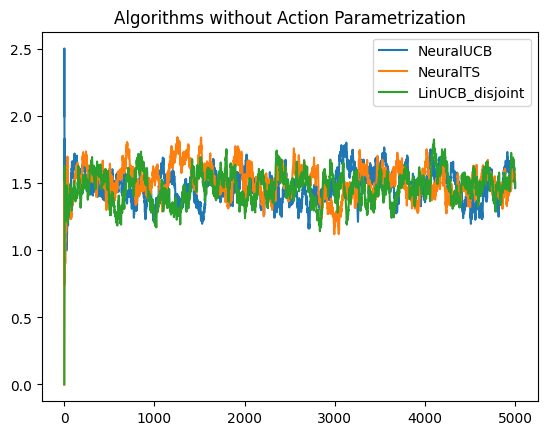

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

df = pd.DataFrame(action_rank_TS)
df['rank_Neural_TS'] = action_rank_TS
df['rank_Neural_TS'] = df['rank_Neural_TS'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_TS))
plt.plot(df['time'],df['rank_Neural_TS'],label = 'NeuralTS')

df = pd.DataFrame(action_rank_LinUCB)
df['rank_Linear_UCB'] = action_rank_LinUCB
df['rank_Linear_UCB'] = df['rank_Linear_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_LinUCB))
plt.plot(df['time'],df['rank_Linear_UCB'],label='LinUCB_disjoint')

plt.title("Algorithms without Action Parametrization")
plt.legend()
plt.show()


### Action Parametrization for NeuralUCB, NeuralTS and LinUCB

In [6]:
from tqdm import tqdm
import numpy as np
import bluebandits as bb
import bluesimulator as bs

# Implement the algorithm
np.random.seed(12345)

# Set the parameter of the network
# the setting is based on the description of section 7.1 of the papaer
L = 2
m = 30 
K = 10# Total number of actions,
actions = np.random.normal(size=[K,1000])
T = 5000 # Total number of periods
d = 50 + K # the dimension of context + number of actions
# we fix gamma in each round, according to the description of section 3.1
gamma_t = 0.01 #{0.01, 0.1, 1, 10}
nu = 0.1 #{0.01, 0.1, 1}
lambda_ = 1 #{0.1, 1, 10}
delta = 0.01 #{0.01, 0.1, 1}
S = 0.01 #{0.01, 0.1, 1, 10}
eta = 1e-3 #{0.001, 0.01, 0.1}
frequency = 50
batchsize = 50
verbose = False
#A = np.random.normal(loc=0, scale=1, size=(d+len(actions[0]), d+len(actions[0])))
A = np.random.normal(loc=0, scale=1, size=(d, d))
# Set the parameter of the network
theta = np.empty(shape = (T,K,d))
A1 = np.array([np.diag(np.ones(shape=d)) for _ in np.arange(K)])
p = np.empty(shape = (T, K))
X = np.array([[np.random.uniform(low=0, high=1, size=d) for _ in range(K)] for _ in np.arange(T)])
alpha = 1

In [7]:
# NeuralUCB, NeuralTS and LinUCB(Disjoint)
# NEURAL UCB ALGORITHM
import numpy as np
import torch
import random
from copy import deepcopy


class NeuralNetwork(torch.nn.Module):
    def __init__(
        self,
        d: int,
        L: int = 2,
        m: int = 20,
        random_seed: int = 12345,
        device: torch.device = torch.device("cpu"),
    ):
        """The proposed neural network structure in Zhou 2020

        Args:
            d (int): Dimension of input layer.
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            random_seed (int, optional): rando_seed. Defaults to 12345.
            device (torch.device, optional): The device of calculateing tensor. Defaults to torch.device("cpu").
        """
        super().__init__()
        np.random.seed(random_seed)
        torch.manual_seed(random_seed)

        self.d = d
        self.L = L
        self.m = m
        self.random_seed = random_seed
        self.activation = torch.nn.ReLU()

        self.device = device
        print(f"Using device {self.device}")

        self.W = torch.nn.ParameterDict()
        w_for_1 = np.random.randn(d // 2, m // 2) * np.sqrt(4 / m)
        w_for_1_to_Lminus1 = np.random.randn(m // 2, m // 2) * np.sqrt(4 / m)
        w_for_L = np.random.randn(m // 2) * np.sqrt(2 / m)
        for layer_index in range(1, L + 1):
            if layer_index == 1:
                W = np.zeros((d, m))
                W[0 : d // 2, 0 : m // 2] = w_for_1
                W[d // 2 :, m // 2 :] = w_for_1
                self.W["W1"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            elif layer_index == L:
                W = np.zeros((m, 1))
                W[0 : m // 2, 0] = w_for_L
                W[m // 2 :, 0] = -w_for_L
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            else:
                W = np.zeros((m, m))
                W[0 : m // 2, 0 : m // 2] = w_for_1_to_Lminus1
                W[m // 2 :, m // 2 :] = w_for_1_to_Lminus1
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
        self.W0 = dict()
        for key in self.W.keys():
            self.W0[key] = deepcopy(self.W[key])
            self.W0[key].requires_grad_(requires_grad=False)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """we accept a Tensor of input data and we must return
        a Tensor of output data

        Args:
            x (torch.Tensor): The observed context of each arm

        Returns:
            torch.Tensor: The predicted mean reward of each arm
        """
        assert x.shape[1] == self.d, "Dimension doesn't match"
        x = x.to(self.device)
        for layer_index in range(1, self.L + 1):
            x = torch.matmul(x, self.W[f"W{layer_index}"])
            if layer_index != self.L:
                x = self.activation(x)
        x = x * np.sqrt(self.m)
        return x

    def GetGrad(self, x: torch.tensor) -> np.ndarray:
        """Given the vector of context, return the flattern gradient of parameter

        Args:
            x (torch.tensor): x.shape = (d,)

        Returns:
            np.ndarray: The gradient of parameter at given point
        """
        x = x[None, :]  # expand the dimension of x
        output = self.forward(x)[0, 0]
        output.backward()

        grad = np.array([])
        for para in self.parameters():
            grad = np.concatenate([grad, para.grad.cpu().detach().numpy().flatten()], axis=0)
        return grad


class BestAgent:
    def __init__(self, K, T, d, A):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        # A is the context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.A = A
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list):
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        expected_reward = np.zeros(self.K)
        for kk in range(0, self.K):
            context = context_list[kk, :]
            expected_reward[kk] = context.transpose().dot(self.A.transpose().dot(self.A)).dot(context)
        ind = np.argmax(expected_reward, axis=None)
        self.history_context[:, self.t] = context_list[ind, :]
        self.history_action[self.t] = ind
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context


class UniformAgent:
    def __init__(self, K, T, d):
        # K is Total number of actions,
        # T is Total number of periods
        # d is the dimension of context
        self.K = K
        self.T = T
        self.d = d
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.history_context = np.zeros((d, T))

    def Action(self, context_list):
        # context_list is a d*K matrix, each column represent a context
        # the return value is the action we choose, represent the index of action, is a scalar

        ind = np.random.randint(0, high=self.K)  # we just uniformly choose an action
        self.history_context[:, self.t] = context_list[ind, :]
        return ind

    def Update(self, reward):
        # reward is the realized reward after we adopt policy, a scalar
        self.history_reward[self.t] = reward
        self.t = self.t + 1

    def GetHistoryReward(self):
        return self.history_reward

    def GetHistoryAction(self):
        return self.history_action

    def GetHistoryContext(self):
        return self.history_context


class NeuralUCB:
    def __init__(
        self,
        K: int,
        T: int,
        d: int,
        L: int = 2,
        m: int = 20,
        gamma_t: float = 0.01,
        nu: float = 0.1,
        lambda_: float = 0.01,
        delta: float = 0.01,
        S: float = 0.01,
        eta: float = 0.001,
        frequency: int = 50,
        batchsize: int = 50,
    ):
        """The proposed Neural UCB algorithm for solving contextual bandits

        Args:
            K (int): Number of arms
            T (int): Number of rounds
            d (int): Dimension of context
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            gamma_t (float, optional): Exploration parameter. Defaults to 0.01.
            v (float, optional): Exploration parameter. Defaults to 0.1.
            lambda_ (float, optional): Regularization parameter. Defaults to 0.01.
            delta (float, optional): Confidence parameter. Defaults to 0.01.
            S (float, optional): Norm parameter. Defaults to 0.01.
            eta (float, optional): Step size. Defaults to 0.001.
            frequency (int, optional): The interval between two training rounds. Defaults to 50.
            batchsize (int, optional): The batchsize of applying SGD on the neural network. Defaults to None.
        """
        self.K = K
        self.T = T
        self.d = d

        self.L = L
        self.m = m
        self.gamma_t = gamma_t
        self.nu = nu
        self.lambda_ = lambda_
        self.delta = delta
        self.S = S
        self.eta = eta
        self.frequency = frequency  # we train the network after frequency, e.g. per 50 round
        self.batchsize = batchsize
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.predicted_reward = np.zeros(T)
        self.predicted_reward_upperbound = np.zeros(T)
        self.history_context = np.zeros((T, d))

        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.mynn = NeuralNetwork(d=d, L=L, m=m, device=self.device)
        self.optimizer = torch.optim.SGD(self.mynn.parameters(), lr=self.eta)
        self.criterion = torch.nn.MSELoss()
        self.p = m + m * d + m * m * (L - 2)
        self.Z_t_minus1 = lambda_ * np.eye(self.p)

    def Action(self, context_list: np.array) -> int:
        """Given the observed context of each arm, return the predicted arm

        Args:
            context_list (np.array): The observed context of each arm. context_list.shape = (K, d)

        Returns:
            int: the index of predicted arm, take value from 0, 1, ..., K-1
        """
        predict_reward = self.mynn.forward(torch.from_numpy(context_list))[:, 0]
        predict_reward = predict_reward.cpu().detach().numpy()

        Z_t_minus1_inverse = np.linalg.inv(self.Z_t_minus1)

        confidence = np.zeros(self.K)
        for arm in range(1, self.K + 1):
            grad_arm = self.mynn.GetGrad(torch.from_numpy(context_list[arm - 1, :]))
            confidence[arm - 1] = np.sqrt(grad_arm.dot(Z_t_minus1_inverse).dot(grad_arm) / self.m)

        # calculate the upper confidence bound
        ucb = predict_reward + self.gamma_t * confidence
        ind = np.argmax(ucb)

        # save the history
        self.history_action[self.t] = ind
        self.history_context[self.t, :] = context_list[ind, :]
        self.predicted_reward[self.t] = predict_reward[ind]
        self.predicted_reward_upperbound = ucb[ind]
        return ind

    def Update(self, reward):
        self.history_reward[self.t] = reward
        ind = self.history_action[self.t]
        context = self.history_context[self.t, :]

        # compute Z_t_minus1
        grad_parameter = self.mynn.GetGrad(torch.from_numpy(context))
        grad_parameter = np.expand_dims(grad_parameter, axis=1)
        self.Z_t_minus1 = self.Z_t_minus1 + grad_parameter.dot(grad_parameter.transpose()) / self.m

        if (self.t + 1) % self.frequency == 0:  # train the network
            # initialize the network again
            for key in self.mynn.W.keys():
                self.mynn.W[key].data = deepcopy(self.mynn.W0[key].data)

            # for jj in range(self.t):  ## J=t at round t, but when we adopt such setting, the training process will be very slow
            for jj in range(np.minimum(self.t, 100)):
                loss_ = list()

                # shuffle the history and conduct SGD
                history_index = np.arange(self.t + 1)
                np.random.shuffle(history_index)
                temp_history_context = self.history_context[history_index, :]
                temp_history_reward = self.history_reward[history_index]
                for batch_index in range(0, self.t // self.batchsize + 1):
                    # split the batch
                    if batch_index < self.t // self.batchsize:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize : (batch_index + 1) * self.batchsize, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize : (batch_index + 1) * self.batchsize]).to(self.device)
                    else:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize :, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize :]).to(self.device)

                    # update the neural network
                    self.optimizer.zero_grad()
                    output = self.mynn.forward(X_temp)

                    # calculate the loss function
                    # in their orginal paper, $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2+m\lambda\|\theta-\theta^{(0)}\|_2^2/2$
                    # but here we set $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2/t+\lambda\|\theta-\theta^{(0)}\|_2^2/2/p$
                    # to balance the terms in the loss function
                    loss = self.criterion(output[:, 0], y_temp)  ## predict error
                    # loss = torch.sum((output[:, 0] - y_temp) ** 2)
                    ## regularization
                    for key in self.mynn.W.keys():
                        # loss += self.lambda_ * self.m * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2
                        loss += self.lambda_ * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2 / self.p
                    loss.backward()
                    self.optimizer.step()

                    # record the training process
                    loss_.append(loss.cpu().detach().numpy())

                if (jj + 1) % 20 == 0:
                    print(f"{jj+1} training epoch, mean loss value is {np.mean(loss_)}")

        self.t += 1



class NeuralNetwork(torch.nn.Module):
    def __init__(
        self,
        d: int,
        L: int = 2,
        m: int = 20,
        random_seed: int = 12345,
        device: torch.device = torch.device("cpu"),
    ):
        """The proposed neural network structure in Zhou 2020

        Args:
            d (int): Dimension of input layer.
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            random_seed (int, optional): rando_seed. Defaults to 12345.
            device (torch.device, optional): The device of calculateing tensor. Defaults to torch.device("cpu").
        """
        super().__init__()
        np.random.seed(random_seed)
        torch.manual_seed(random_seed)

        self.d = d
        self.L = L
        self.m = m
        self.random_seed = random_seed
        self.activation = torch.nn.ReLU()

        self.device = device
        print(f"Using device {self.device}")

        self.W = torch.nn.ParameterDict()
        w_for_1 = np.random.randn(d // 2, m // 2) * np.sqrt(4 / m)
        w_for_1_to_Lminus1 = np.random.randn(m // 2, m // 2) * np.sqrt(4 / m)
        w_for_L = np.random.randn(m // 2) * np.sqrt(2 / m)
        for layer_index in range(1, L + 1):
            if layer_index == 1:
                W = np.zeros((d, m))
                W[0 : d // 2, 0 : m // 2] = w_for_1
                W[d // 2 :, m // 2 :] = w_for_1
                self.W["W1"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            elif layer_index == L:
                W = np.zeros((m, 1))
                W[0 : m // 2, 0] = w_for_L
                W[m // 2 :, 0] = -w_for_L
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
            else:
                W = np.zeros((m, m))
                W[0 : m // 2, 0 : m // 2] = w_for_1_to_Lminus1
                W[m // 2 :, m // 2 :] = w_for_1_to_Lminus1
                self.W[f"W{layer_index}"] = torch.nn.Parameter(torch.from_numpy(W)).to(self.device)
        self.W0 = dict()
        for key in self.W.keys():
            self.W0[key] = deepcopy(self.W[key])
            self.W0[key].requires_grad_(requires_grad=False)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """we accept a Tensor of input data and we must return
        a Tensor of output data

        Args:
            x (torch.Tensor): The observed context of each arm

        Returns:
            torch.Tensor: The predicted mean reward of each arm
        """
        if len(x.shape) == 1:
            x = x[None, :]

        assert x.shape[1] == self.d, "Dimension doesn't match"
        x = x.to(self.device)
        for layer_index in range(1, self.L + 1):
            x = torch.matmul(x, self.W[f"W{layer_index}"])
            if layer_index != self.L:
                x = self.activation(x)
        x = x * np.sqrt(self.m)
        return x

    def GetGrad(self, x: torch.tensor) -> np.ndarray:
        """Given the vector of context, return the flattern gradient of parameter

        Args:
            x (torch.tensor): x.shape = (d,)

        Returns:
            np.ndarray: The gradient of parameter at given point
        """
        x = x[None, :]  # expand the dimension of x
        output = self.forward(x)[0, 0]
        output.backward()

        grad = np.array([])
        for para in self.parameters():
            grad = np.concatenate([grad, para.grad.cpu().detach().numpy().flatten()], axis=0)
        return grad


class NeuralTS:
    def __init__(
        self,
        K: int,
        T: int,
        d: int,
        L: int = 2,
        m: int = 20,
        nu: float = 0.1,
        lambda_: float = 1,
        eta: float = 0.01,
        frequency: int = 50,
        batchsize: int = None,
        random_seed: int = 12345,
    ):
        """_summary_

        Args:
            K (int): Total number of actions
            T (int): Total number of periods
            d (int): The dimension of context
            L (int, optional): The number of hidden layer. Defaults to 2.
            m (int, optional): The number of neurals in each layer. Defaults to 20.
            nu (float, optional): Scale coefficient of variance. Defaults to 0.1.
            lambda_ (float, optional): Regularization of regression problem. Defaults to 1.
            eta (float, optional): Step size of the SGD. Defaults to 0.01.
            frequency (int, optional): The interval between two training epoches. Defaults to 50.
            batchsize (int, optional): The size of sample batch in SGD. Defaults to None.
            random_seed (int, optional) : The random seed of. Defaults to 12345
        """
        # random seed
        self.random_generator = random.Random()
        self.random_generator.seed(random_seed)
        self.random_seed = random_seed

        # the setup of the problem
        self.K = K
        self.T = T

        # the setup of neural network
        self.L = L
        self.m = m
        self.d = d
        self.p = m + m * d + m * m * (L - 2)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.mynn = NeuralNetwork(d=d, L=L, m=m, device=self.device)
        self.optimizer = torch.optim.SGD(self.mynn.parameters(), lr=eta)
        self.criterion = torch.nn.MSELoss()

        # the setup of the trainning process
        self.nu = nu
        self.lambda_ = lambda_
        self.eta = eta
        self.frequency = frequency
        self.batchsize = batchsize
        self.U = lambda_ * np.eye(self.p)

        # the history
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.predicted_reward = np.zeros(T)
        self.history_context = np.zeros((T, d))

    def Action(self, context_list: np.array) -> int:
        """Given the observed context of each arm, return the predicted arm

        Args:
            context_list (np.array): The observed context of each arm. context_list.shape = (K, d)

        Returns:
            int: the index of predicted arm, take value from 0, 1, ..., K-1
        """
        sample_reward_ = np.zeros(self.K)
        predict_reward_ = np.zeros(self.K)
        U_inverse = np.linalg.inv(self.U)
        for arm in range(1, self.K + 1):
            grad_arm = self.mynn.GetGrad(torch.from_numpy(context_list[arm - 1, :]))
            sigma_t_k2 = self.lambda_ * grad_arm.dot(U_inverse).dot(grad_arm) / self.m
            predict_reward_[arm - 1] = self.mynn.forward(torch.from_numpy(context_list[arm - 1, :]))
            sample_reward_[arm - 1] = self.random_generator.normalvariate(mu=predict_reward_[arm - 1], sigma=np.sqrt(self.nu**2 * sigma_t_k2))
        ind = np.argmax(sample_reward_)

        # save the history
        self.history_action[self.t] = ind
        self.history_context[self.t, :] = context_list[ind, :]
        self.predicted_reward[self.t] = predict_reward_[ind]

        return ind

    def Update(self, reward):
        self.history_reward[self.t] = reward
        ind = self.history_action[self.t]
        context = self.history_context[self.t, :]

        # update U
        grad_parameter = self.mynn.GetGrad(torch.from_numpy(context))
        self.U = self.U + grad_parameter.dot(grad_parameter.transpose()) / self.m

        # train the network
        if (self.t + 1) % self.frequency == 0:
            # initialize the network again
            for key in self.mynn.W.keys():
                self.mynn.W[key].data = deepcopy(self.mynn.W0[key].data)

            # for jj in range(self.t):  ## J=t at round t, but when we adopt such setting, the training process will be very slow
            for jj in range(np.minimum(self.t, 100)):
                loss_ = list()

                # shuffle the history and conduct SGD
                history_index = np.arange(self.t + 1)
                np.random.shuffle(history_index)
                temp_history_context = self.history_context[history_index, :]
                temp_history_reward = self.history_reward[history_index]
                for batch_index in range(0, self.t // self.batchsize + 1):
                    # split the batch
                    if batch_index < self.t // self.batchsize:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize : (batch_index + 1) * self.batchsize, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize : (batch_index + 1) * self.batchsize]).to(self.device)
                    else:
                        X_temp = torch.from_numpy(temp_history_context[batch_index * self.batchsize :, :]).to(self.device)
                        y_temp = torch.from_numpy(temp_history_reward[batch_index * self.batchsize :]).to(self.device)

                    # update the neural network
                    self.optimizer.zero_grad()
                    output = self.mynn.forward(X_temp)

                    # calculate the loss function
                    # in their orginal paper, $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2+m\lambda\|\theta-\theta^{(0)}\|_2^2/2$
                    # but here we set $loss(\theta)=\sum_{i=1}^t(f(x_{i,a_i}, \theta)-r_{i,a_i})^2/t+\lambda\|\theta-\theta^{(0)}\|_2^2/2/p$
                    # to balance the terms in the loss function
                    loss = self.criterion(output[:, 0], y_temp)  ## predict error
                    # loss = torch.sum((output[:, 0] - y_temp) ** 2)
                    ## regularization
                    for key in self.mynn.W.keys():
                        # loss += self.lambda_ * self.m * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2
                        loss += self.lambda_ * torch.sum((self.mynn.W[key] - self.mynn.W0[key]) ** 2) / 2 / self.p
                    loss.backward()
                    self.optimizer.step()

                    # record the training process
                    loss_.append(loss.cpu().detach().numpy())

                if (jj + 1) % 20 == 0:
                    print(f"{jj+1} training epoch, mean loss value is {np.mean(loss_)}")

        self.t += 1

class LinUCB:
    def __init__(
        self,
        K: int,
        T: int,
        d: int,
        A,
        theta,
        X,
        p,
        alpha
    ):
        """The proposed Neural UCB algorithm for solving contextual bandits

        Args:
            K (int): Number of arms
            T (int): Number of rounds
            d (int): Dimension of context
            L (int, optional): Number of Layers. Defaults to 2.
            m (int, optional): Width of each layer. Defaults to 20.
            gamma_t (float, optional): Exploration parameter. Defaults to 0.01.
            v (float, optional): Exploration parameter. Defaults to 0.1.
            lambda_ (float, optional): Regularization parameter. Defaults to 0.01.
            delta (float, optional): Confidence parameter. Defaults to 0.01.
            S (float, optional): Norm parameter. Defaults to 0.01.
            eta (float, optional): Step size. Defaults to 0.001.
            frequency (int, optional): The interval between two training rounds. Defaults to 50.
            batchsize (int, optional): The batchsize of applying SGD on the neural network. Defaults to None.
        """
        self.K = K
        self.T = T
        self.d = d
        self.A = A
        self.theta = theta
        self.p = p
        self.X = X
        self.alpha = alpha
        self.t = 0  # marks the index of period
        self.history_reward = np.zeros(T)
        self.history_action = np.zeros(T)
        self.predicted_reward = np.zeros(T)
        self.predicted_reward_upperbound = np.zeros(T)
        self.history_context = np.zeros((T, d))

        

    def Action(self, context_list: np.array) -> int:
        """Given the observed context of each arm, return the predicted arm

        Args:
            context_list (np.array): The observed context of each arm. context_list.shape = (K, d)

        Returns:
            int: the index of predicted arm, take value from 0, 1, ..., K-1
        """
        

        
        for arm in range(self.K):
            inv_A = np.linalg.inv(self.A[arm])
            self.theta[self.t,arm] = inv_A.dot(context_list[arm])
            self.p[self.t,arm] = self.theta[self.t,arm].dot(self.X[self.t,arm])+self.alpha*np.sqrt(self.X[self.t,arm].dot(inv_A).dot(self.X[self.t,arm]))


        # calculate the upper confidence bound
        chosen_arm = np.argmax(self.p[self.t])
        ind = chosen_arm


        # save the history
        self.history_action[self.t] = ind
        self.history_context[self.t, :] = context_list[ind, :]
        #self.predicted_reward[self.t] = predict_reward[ind]
        self.predicted_reward_upperbound = self.p[self.t][ind]
        return ind

    def Update(self, reward):
        self.history_reward[self.t] = reward
        ind = int(self.history_action[self.t])
        
        context = self.history_context[self.t, :]

        temp_vec = self.A[ind]
        self.A[ind] = temp_vec+ np.outer(self.X[self.t,ind],self.X[self.t,ind].T)
        context+=reward*self.X[self.t,ind]
        self.t += 1


In [8]:
#Environment 
# NUERAL UCB ENVIRONMENT WITH ACTION PARAMETRIZATION
import numpy as np
from pandas import *
from sklearn.preprocessing import normalize

class InconsistentNumberOfFeatures(Exception):
    """Exception raised for errors in the input features.

    """

    def __init__(self, message="Inconsistent Dimensions of feature vectors:"):
        self.message = message
        super().__init__(self.message)


def CustomContext(filename,list_of_features,d,K):
    """This function return context, as an K*d matrix, each row represents a context of action

    Args:
        filename: Name of custom data set
        list_of_features: list of names of features that we wanna incorporate for the algorithm
        d (int): Dimension of context
        K (int): Number of arms

    Returns:
        context: an np.ndarray whose shape is (K, d), each row represents a context
    """
    data = read_csv(filename)
    if len(list_of_features)!=d:
        raise InconsistentNumberOfFeatures()
    features=[]
    for feature in list_of_features:
        temp_array = np.array(data[feature].to_list())
        features.append(temp_array[np.random.randint(0,2666)])
    context_arr = np.array([np.array(features) for i in range(K)])
    
    context = normalize(context_arr,axis = 1,norm='l2')
    
    return context


def SampleContext(d, K):
    """This function return context, as an K*d matrix, each row represents a context of action

    Args:
        d (int): Dimension of context
        K (int): Number of arms

    Returns:
        context: an np.ndarray whose shape is (K, d), each row represents a context
    """
    context = np.random.normal(loc=0, scale=1, size=(K, d // 2))
    length = np.sqrt(np.sum(context * context, axis=1, keepdims=True))
    context = np.tile(context, (1, 2))
    length = np.tile(length, (1, d))
    context = context / length / np.sqrt(2)  # each column represent a context
    return context
def GetRealReward(context, A,actions):
    """Given the context, return the realized reward

    Args:
        context (np.ndarray): An np.ndarray whose shape is (K, d), each column represents a context of an arm
        A (np.ndarray): The parameter of this reward function
        actions(np.ndarray): A k*m dimensional action vectors
    Returns:
        reward: an np.ndarray whose shape is (K,), reward = context^T A^T A context + N(0, 0.05^2)
    """
    # Concatenate action parameters to existing context list.
    context = np.concatenate((context, actions), axis=1)
    if len(context.shape) == 1:
        return context.transpose().dot(A.transpose().dot(A)).dot(context) + np.random.normal(loc=0, scale=0.05)
    else:
        return np.diag(context.dot(A.transpose().dot(A)).dot(context.transpose())) + np.random.normal(loc=0, scale=0.05, size=context.shape[0])

def GetRealRewardDemo(context, A):
    """Given the context, return the realized reward

    Args:
        context (np.ndarray): An np.ndarray whose shape is (K, d), each column represents a context of an arm
        A (np.ndarray): The parameter of this reward function
        actions(np.ndarray): A k*m dimensional action vectors
    Returns:
        reward: an np.ndarray whose shape is (K,), reward = context^T A^T A context + N(0, 0.05^2)
    """
    # Concatenate action parameters to existing context list.
    #context = np.concatenate((context, actions), axis=1)
    if len(context.shape) == 1:
        return context.transpose().dot(A.transpose().dot(A)).dot(context) + np.random.normal(loc=0, scale=0.05)
    else:
        return np.diag(context.dot(A.transpose().dot(A)).dot(context.transpose())) + np.random.normal(loc=0, scale=0.05, size=context.shape[0])


In [9]:
best_action = []
action_rank_UCB = []
action_rank_TS = []
action_rank_LinUCB = []
action_list_UCB = []
action_list_TS =[]
action_list_LinUCB = []

neuralUCBagent = NeuralUCB(
    K=K, T=T, d=d, L=L, m=m, gamma_t=gamma_t, nu=nu, lambda_=lambda_, delta=delta, S=S, eta=eta, frequency=frequency, batchsize=batchsize
)

neuralTSagent = NeuralTS(K=K, T=T, d=d, L=L, m=m, nu=nu, lambda_=lambda_, eta=eta, frequency=frequency, batchsize=batchsize)
linearagent = LinUCB(K = K,T=T,d=d,A=A1,theta=theta,X=X,p=p,alpha=alpha)
for tt in tqdm(range(1, T + 1)):

    # if tt %2000 == 1:
    #     A = np.random.normal(loc=0, scale=1, size=(d, d))

    
    ''' God Mode'''
    #context_list = CustomContext(filename = "churn-bigml-80.csv",list_of_features=['Account length','Total day charge','Total eve charge','Total night charge'],d=d, K=K)
    context_list = SampleContext(d,K)
    realized_reward = GetRealRewardDemo(context_list, A)
    best_action_for_customer = np.argmax(realized_reward)
    best_action.append(best_action_for_customer)
    action_order = np.flip(np.argsort(realized_reward))

    ''' God Mode ends'''
    
    neuralUCB_ind = neuralUCBagent.Action(context_list)
    action_list_UCB.append(neuralUCB_ind)
    action_rank_UCB.append(list(action_order).index(neuralUCB_ind))

    neuralTS_ind = neuralTSagent.Action(context_list)
    action_list_TS.append(neuralTS_ind)
    action_rank_TS.append(list(action_order).index(neuralTS_ind))

    linearUCB_ind = linearagent.Action(context_list)
    action_list_LinUCB.append(linearUCB_ind)
    action_rank_LinUCB.append(list(action_order).index(linearUCB_ind))




    ''' Online Learning '''
    neuralUCB_reward = realized_reward[neuralUCB_ind]
    neuralUCBagent.Update(neuralUCB_reward)

    neuralTS_reward = realized_reward[neuralTS_ind]
    neuralTSagent.Update(neuralTS_reward)

    LinUCB_reward = realized_reward[linearUCB_ind]
    linearagent.Update(LinUCB_reward)


Using device cpu
Using device cpu


  1%|          | 50/5000 [00:51<52:42,  1.57it/s]  

20 training epoch, mean loss value is 657.4253669958762
40 training epoch, mean loss value is 100.90755675147332
20 training epoch, mean loss value is 819.0212914525434
40 training epoch, mean loss value is 78.97759773354468


  2%|▏         | 99/5000 [01:42<49:23,  1.65it/s]  

20 training epoch, mean loss value is 229.23329600549525
40 training epoch, mean loss value is 79.63875423835833
60 training epoch, mean loss value is 42.79122716568294
80 training epoch, mean loss value is 25.951194640057274
20 training epoch, mean loss value is 218.87985032609225
40 training epoch, mean loss value is 58.55608743396125


  2%|▏         | 100/5000 [01:45<1:26:50,  1.06s/it]

60 training epoch, mean loss value is 26.92172204699188
80 training epoch, mean loss value is 13.84909614350439


  3%|▎         | 149/5000 [02:30<1:29:11,  1.10s/it]

20 training epoch, mean loss value is 133.13770540821517
40 training epoch, mean loss value is 55.564873504664774
60 training epoch, mean loss value is 33.41376249938209
80 training epoch, mean loss value is 22.372837218426444
100 training epoch, mean loss value is 15.566618250531462
20 training epoch, mean loss value is 128.80694129995877


  3%|▎         | 150/5000 [02:32<2:12:24,  1.64s/it]

40 training epoch, mean loss value is 47.83747133770786
60 training epoch, mean loss value is 25.02192619669363
80 training epoch, mean loss value is 15.101745585254198
100 training epoch, mean loss value is 9.590612629977992


  4%|▍         | 199/5000 [03:04<48:54,  1.64it/s]  

20 training epoch, mean loss value is 97.85866324535249
40 training epoch, mean loss value is 44.06866711457865
60 training epoch, mean loss value is 25.710128229841025
80 training epoch, mean loss value is 16.930229533052447
100 training epoch, mean loss value is 12.101809495737882


  4%|▍         | 200/5000 [03:05<59:33,  1.34it/s]

20 training epoch, mean loss value is 94.97932680905501
40 training epoch, mean loss value is 43.48753213031631
60 training epoch, mean loss value is 25.415898337269432
80 training epoch, mean loss value is 16.934321556379977
100 training epoch, mean loss value is 12.279644445475473


  5%|▍         | 249/5000 [03:34<48:24,  1.64it/s]

20 training epoch, mean loss value is 77.63409954948153
40 training epoch, mean loss value is 36.028145194845436
60 training epoch, mean loss value is 21.55166456672809
80 training epoch, mean loss value is 14.28875688027927
100 training epoch, mean loss value is 10.257557790172196
20 training epoch, mean loss value is 77.33219360950386
40 training epoch, mean loss value is 37.29004716961539
60 training epoch, mean loss value is 23.949620810284863


  5%|▌         | 250/5000 [03:35<1:02:04,  1.28it/s]

80 training epoch, mean loss value is 17.04144356683654
100 training epoch, mean loss value is 12.834567172433145


  6%|▌         | 299/5000 [04:12<1:13:06,  1.07it/s]

20 training epoch, mean loss value is 61.77603375071056
40 training epoch, mean loss value is 27.538954757421426
60 training epoch, mean loss value is 17.383597087286592
80 training epoch, mean loss value is 12.632233740486113
100 training epoch, mean loss value is 9.797939109518955
20 training epoch, mean loss value is 73.08229223794659
40 training epoch, mean loss value is 37.08902430815373
60 training epoch, mean loss value is 23.96343454570982


  6%|▌         | 300/5000 [04:13<1:19:04,  1.01s/it]

80 training epoch, mean loss value is 16.928360180142217
100 training epoch, mean loss value is 12.807924533300897


  7%|▋         | 349/5000 [04:45<42:28,  1.83it/s]  

20 training epoch, mean loss value is 62.03609154756124
40 training epoch, mean loss value is 29.263873131092392
60 training epoch, mean loss value is 18.791005066595496
80 training epoch, mean loss value is 14.051703850138342
100 training epoch, mean loss value is 11.24351345924038
20 training epoch, mean loss value is 72.25764751298404
40 training epoch, mean loss value is 37.441228695580584
60 training epoch, mean loss value is 23.549177663202194
80 training epoch, mean loss value is 16.40546088172235


  7%|▋         | 350/5000 [04:46<1:00:43,  1.28it/s]

100 training epoch, mean loss value is 12.478049635224561


  8%|▊         | 399/5000 [05:13<42:18,  1.81it/s]  

20 training epoch, mean loss value is 52.74382139008671
40 training epoch, mean loss value is 26.539750282747185
60 training epoch, mean loss value is 19.366350616248624
80 training epoch, mean loss value is 15.374182098803884
100 training epoch, mean loss value is 12.909651003947797
20 training epoch, mean loss value is 66.50559703720059
40 training epoch, mean loss value is 34.72104113470119
60 training epoch, mean loss value is 22.542799761879145
80 training epoch, mean loss value is 16.081607202896876


  8%|▊         | 400/5000 [05:15<1:01:11,  1.25it/s]

100 training epoch, mean loss value is 12.357484505882526


  9%|▉         | 449/5000 [05:42<42:25,  1.79it/s]  

20 training epoch, mean loss value is 49.6593780903906
40 training epoch, mean loss value is 25.650334368473935
60 training epoch, mean loss value is 19.00459963589338
80 training epoch, mean loss value is 15.116735516241407
100 training epoch, mean loss value is 12.22216392635775
20 training epoch, mean loss value is 63.29656303063924
40 training epoch, mean loss value is 33.870737771435806
60 training epoch, mean loss value is 22.682644251587174
80 training epoch, mean loss value is 16.167991793228886


  9%|▉         | 450/5000 [05:43<1:03:37,  1.19it/s]

100 training epoch, mean loss value is 12.730121732771702


 10%|▉         | 499/5000 [06:11<43:41,  1.72it/s]  

20 training epoch, mean loss value is 44.39236061607179
40 training epoch, mean loss value is 24.938011603212157
60 training epoch, mean loss value is 18.31568183028676
80 training epoch, mean loss value is 14.71546807699141
100 training epoch, mean loss value is 12.463272916783518
20 training epoch, mean loss value is 57.382786916831506
40 training epoch, mean loss value is 30.674139244402227
60 training epoch, mean loss value is 20.34901488486056


 10%|█         | 500/5000 [06:12<1:04:49,  1.16it/s]

80 training epoch, mean loss value is 15.007220374041548
100 training epoch, mean loss value is 11.63057024009304


 11%|█         | 549/5000 [06:40<41:10,  1.80it/s]  

20 training epoch, mean loss value is 43.08309902877848
40 training epoch, mean loss value is 25.625782572205036
60 training epoch, mean loss value is 19.15542736231799
80 training epoch, mean loss value is 15.163640126215832
100 training epoch, mean loss value is 12.347932171492909
20 training epoch, mean loss value is 54.0406634643441
40 training epoch, mean loss value is 28.73678070353498
60 training epoch, mean loss value is 19.83646827912351


 11%|█         | 550/5000 [06:41<1:06:09,  1.12it/s]

80 training epoch, mean loss value is 15.522106230490392
100 training epoch, mean loss value is 12.637145842043129


 12%|█▏        | 599/5000 [07:09<41:13,  1.78it/s]  

20 training epoch, mean loss value is 44.1686355434209
40 training epoch, mean loss value is 26.646562989457436
60 training epoch, mean loss value is 19.7560614096714
80 training epoch, mean loss value is 15.629063520653007
100 training epoch, mean loss value is 12.401977761269501
20 training epoch, mean loss value is 53.78421363154828
40 training epoch, mean loss value is 28.609875612747402
60 training epoch, mean loss value is 19.798317594539935


 12%|█▏        | 600/5000 [07:10<1:08:01,  1.08it/s]

80 training epoch, mean loss value is 15.06830951717376
100 training epoch, mean loss value is 12.037632161660353


 13%|█▎        | 649/5000 [08:07<40:02,  1.81it/s]  

20 training epoch, mean loss value is 42.61563551837847
40 training epoch, mean loss value is 26.248261341033377
60 training epoch, mean loss value is 20.04604977501915
80 training epoch, mean loss value is 16.242009205903585
100 training epoch, mean loss value is 13.34151658278045
20 training epoch, mean loss value is 52.96788762516714
40 training epoch, mean loss value is 29.06335076803608
60 training epoch, mean loss value is 20.2552492307218


 13%|█▎        | 650/5000 [08:09<1:08:33,  1.06it/s]

80 training epoch, mean loss value is 15.490313633149741
100 training epoch, mean loss value is 12.5302130615718


 14%|█▍        | 699/5000 [08:37<39:31,  1.81it/s]  

20 training epoch, mean loss value is 39.83294635451504
40 training epoch, mean loss value is 25.149613476493837
60 training epoch, mean loss value is 19.56421698731637
80 training epoch, mean loss value is 15.715860551249387
100 training epoch, mean loss value is 12.868838586998526
20 training epoch, mean loss value is 49.937513218473974
40 training epoch, mean loss value is 26.83200112841728
60 training epoch, mean loss value is 18.129107484043285


 14%|█▍        | 700/5000 [08:39<1:09:17,  1.03it/s]

80 training epoch, mean loss value is 13.558819009397
100 training epoch, mean loss value is 11.15656597994778


 15%|█▍        | 749/5000 [09:07<39:36,  1.79it/s]  

20 training epoch, mean loss value is 40.77192450317255
40 training epoch, mean loss value is 25.055665938243642
60 training epoch, mean loss value is 19.209440020251186
80 training epoch, mean loss value is 15.793199193195912
100 training epoch, mean loss value is 13.21334963397445
20 training epoch, mean loss value is 50.02277953983751
40 training epoch, mean loss value is 26.312932502761964
60 training epoch, mean loss value is 17.18611692608492


 15%|█▌        | 750/5000 [09:09<1:10:51,  1.00s/it]

80 training epoch, mean loss value is 12.618918390978783
100 training epoch, mean loss value is 10.094851042372033


 16%|█▌        | 799/5000 [09:36<38:35,  1.81it/s]  

20 training epoch, mean loss value is 40.127848671720514
40 training epoch, mean loss value is 24.98691256270428
60 training epoch, mean loss value is 18.69561951571112
80 training epoch, mean loss value is 14.435344903587193
100 training epoch, mean loss value is 11.474348111702785
20 training epoch, mean loss value is 49.591223752597756
40 training epoch, mean loss value is 24.941641934933564
60 training epoch, mean loss value is 16.74020595011156


 16%|█▌        | 800/5000 [09:39<1:12:29,  1.04s/it]

80 training epoch, mean loss value is 12.647653311845126
100 training epoch, mean loss value is 10.13513439618383


 17%|█▋        | 849/5000 [10:06<37:53,  1.83it/s]  

20 training epoch, mean loss value is 37.60869811111569
40 training epoch, mean loss value is 23.110819188088954
60 training epoch, mean loss value is 17.266990261706344
80 training epoch, mean loss value is 13.538017630238748
100 training epoch, mean loss value is 10.894366546433487
20 training epoch, mean loss value is 46.907606415862375
40 training epoch, mean loss value is 23.971909337083765
60 training epoch, mean loss value is 16.05078648873105


 17%|█▋        | 850/5000 [10:08<1:12:57,  1.05s/it]

80 training epoch, mean loss value is 12.364508060863276
100 training epoch, mean loss value is 10.144586682255854


 18%|█▊        | 899/5000 [10:35<38:27,  1.78it/s]  

20 training epoch, mean loss value is 36.091519405425004
40 training epoch, mean loss value is 22.24987302592819
60 training epoch, mean loss value is 16.71305944239253
80 training epoch, mean loss value is 13.210353410803712
100 training epoch, mean loss value is 10.928240298929628
20 training epoch, mean loss value is 43.76333004478533
40 training epoch, mean loss value is 23.123366997736113
60 training epoch, mean loss value is 15.956457663786535


 18%|█▊        | 900/5000 [10:37<1:14:26,  1.09s/it]

80 training epoch, mean loss value is 12.449225333533228
100 training epoch, mean loss value is 10.43177143932577


 19%|█▉        | 949/5000 [11:22<37:38,  1.79it/s]  

20 training epoch, mean loss value is 35.65329979004666
40 training epoch, mean loss value is 22.10108609555718
60 training epoch, mean loss value is 16.751313430718277
80 training epoch, mean loss value is 13.145716695770655
100 training epoch, mean loss value is 10.740885136337242
20 training epoch, mean loss value is 42.810657517607105
40 training epoch, mean loss value is 23.488826019033308
60 training epoch, mean loss value is 15.469930166871878
80 training epoch, mean loss value is 11.518526958641333


 19%|█▉        | 950/5000 [11:25<1:19:06,  1.17s/it]

100 training epoch, mean loss value is 9.27284193145018


 20%|█▉        | 999/5000 [11:59<36:26,  1.83it/s]  

20 training epoch, mean loss value is 34.68891988164685
40 training epoch, mean loss value is 20.77414570481538
60 training epoch, mean loss value is 14.869927127618984
80 training epoch, mean loss value is 11.74821219791658
100 training epoch, mean loss value is 9.983966155608623
20 training epoch, mean loss value is 41.154430673916046
40 training epoch, mean loss value is 21.90213140186745
60 training epoch, mean loss value is 15.309823356229945


 20%|██        | 1000/5000 [12:02<1:18:33,  1.18s/it]

80 training epoch, mean loss value is 12.050643733305701
100 training epoch, mean loss value is 10.028370250696291


 21%|██        | 1049/5000 [12:32<36:15,  1.82it/s]  

20 training epoch, mean loss value is 33.55718863235906
40 training epoch, mean loss value is 19.9346299426748
60 training epoch, mean loss value is 14.038700208491397
80 training epoch, mean loss value is 11.176840971982482
100 training epoch, mean loss value is 9.326255164811005
20 training epoch, mean loss value is 41.28478927719179
40 training epoch, mean loss value is 22.621571361059644
60 training epoch, mean loss value is 15.632490133537393
80 training epoch, mean loss value is 12.259863402771922


 21%|██        | 1050/5000 [12:35<1:22:14,  1.25s/it]

100 training epoch, mean loss value is 10.466673927366188


 22%|██▏       | 1099/5000 [13:04<36:15,  1.79it/s]  

20 training epoch, mean loss value is 32.191084511422524
40 training epoch, mean loss value is 18.591007752933237
60 training epoch, mean loss value is 13.664788075170058
80 training epoch, mean loss value is 11.107450311093578
100 training epoch, mean loss value is 9.343413571247265
20 training epoch, mean loss value is 40.352142737120495
40 training epoch, mean loss value is 21.551616680642656
60 training epoch, mean loss value is 14.918649681740062
80 training epoch, mean loss value is 11.764780043116026


 22%|██▏       | 1100/5000 [13:07<1:22:00,  1.26s/it]

100 training epoch, mean loss value is 9.86621951075608


 23%|██▎       | 1149/5000 [13:37<34:59,  1.83it/s]  

20 training epoch, mean loss value is 31.675277945045426
40 training epoch, mean loss value is 18.582221400312896
60 training epoch, mean loss value is 13.473488685041666
80 training epoch, mean loss value is 10.612724023888124
100 training epoch, mean loss value is 8.959512198122624
20 training epoch, mean loss value is 39.39653217852464
40 training epoch, mean loss value is 20.541416552830395
60 training epoch, mean loss value is 13.733170503305894
80 training epoch, mean loss value is 11.008152952745565


 23%|██▎       | 1150/5000 [13:40<1:23:11,  1.30s/it]

100 training epoch, mean loss value is 9.156180288062677


 24%|██▍       | 1199/5000 [14:10<34:49,  1.82it/s]  

20 training epoch, mean loss value is 29.927476488225864
40 training epoch, mean loss value is 17.772955085706645
60 training epoch, mean loss value is 13.20127060425719
80 training epoch, mean loss value is 10.769427416302927
100 training epoch, mean loss value is 9.259054835202424
20 training epoch, mean loss value is 38.88108779352118
40 training epoch, mean loss value is 20.757979498765252
60 training epoch, mean loss value is 14.564574274319659
80 training epoch, mean loss value is 11.517840541664638


 24%|██▍       | 1200/5000 [14:13<1:25:37,  1.35s/it]

100 training epoch, mean loss value is 9.628648394751153


 25%|██▍       | 1249/5000 [14:43<34:28,  1.81it/s]  

20 training epoch, mean loss value is 29.21057369901491
40 training epoch, mean loss value is 17.41019712744302
60 training epoch, mean loss value is 12.833945754483613
80 training epoch, mean loss value is 10.203048811803916
100 training epoch, mean loss value is 8.60754912267006
20 training epoch, mean loss value is 37.88830686856622
40 training epoch, mean loss value is 19.385865411979516
60 training epoch, mean loss value is 13.54154452234571
80 training epoch, mean loss value is 10.604850329439104


 25%|██▌       | 1250/5000 [14:46<1:23:05,  1.33s/it]

100 training epoch, mean loss value is 9.003886467009812


 26%|██▌       | 1299/5000 [15:16<33:57,  1.82it/s]  

20 training epoch, mean loss value is 29.226095561663556
40 training epoch, mean loss value is 17.78868280077787
60 training epoch, mean loss value is 13.314171639233518
80 training epoch, mean loss value is 10.733485098775494
100 training epoch, mean loss value is 9.066853139514404
20 training epoch, mean loss value is 37.55403267543036
40 training epoch, mean loss value is 19.548818493581738
60 training epoch, mean loss value is 13.772891719897123
80 training epoch, mean loss value is 10.880740030797542


 26%|██▌       | 1300/5000 [15:19<1:25:41,  1.39s/it]

100 training epoch, mean loss value is 9.147063379644935


 27%|██▋       | 1349/5000 [15:49<33:49,  1.80it/s]  

20 training epoch, mean loss value is 28.350134751413467
40 training epoch, mean loss value is 17.35037407240526
60 training epoch, mean loss value is 12.757464024009323
80 training epoch, mean loss value is 10.461630698818274
100 training epoch, mean loss value is 8.937544830460595
20 training epoch, mean loss value is 35.45794085318521
40 training epoch, mean loss value is 17.813623568931977
60 training epoch, mean loss value is 12.941144351676511
80 training epoch, mean loss value is 10.339106335458268


 27%|██▋       | 1350/5000 [15:52<1:27:16,  1.43s/it]

100 training epoch, mean loss value is 8.79812315891544


 28%|██▊       | 1399/5000 [16:22<33:17,  1.80it/s]  

20 training epoch, mean loss value is 27.82974806814725
40 training epoch, mean loss value is 17.105533181075216
60 training epoch, mean loss value is 12.732392508007205
80 training epoch, mean loss value is 10.417311401597598
100 training epoch, mean loss value is 8.909254710123554
20 training epoch, mean loss value is 36.715005160092744
40 training epoch, mean loss value is 18.611380046922
60 training epoch, mean loss value is 13.575154252857518
80 training epoch, mean loss value is 10.75975760535509


 28%|██▊       | 1400/5000 [16:26<1:27:28,  1.46s/it]

100 training epoch, mean loss value is 9.204034229678461


 29%|██▉       | 1449/5000 [16:55<32:12,  1.84it/s]  

20 training epoch, mean loss value is 27.085240847936845
40 training epoch, mean loss value is 17.23605301217229
60 training epoch, mean loss value is 13.218051756403348
80 training epoch, mean loss value is 10.658587558778576
100 training epoch, mean loss value is 9.010736241415378
20 training epoch, mean loss value is 34.32898620412003
40 training epoch, mean loss value is 17.625460715729005
60 training epoch, mean loss value is 12.982292795969068
80 training epoch, mean loss value is 10.639081727104742


 29%|██▉       | 1450/5000 [16:59<1:27:12,  1.47s/it]

100 training epoch, mean loss value is 9.214260000168142


 30%|██▉       | 1499/5000 [17:29<31:57,  1.83it/s]  

20 training epoch, mean loss value is 27.0405970887515
40 training epoch, mean loss value is 16.7434506789356
60 training epoch, mean loss value is 12.914224275992675
80 training epoch, mean loss value is 10.626114423786634
100 training epoch, mean loss value is 9.03958405410548
20 training epoch, mean loss value is 33.821120652913876
40 training epoch, mean loss value is 17.498803114227048
60 training epoch, mean loss value is 12.493876407674144
80 training epoch, mean loss value is 10.128995059701147


 30%|███       | 1500/5000 [17:32<1:27:34,  1.50s/it]

100 training epoch, mean loss value is 8.829879207369698


 31%|███       | 1549/5000 [18:02<31:14,  1.84it/s]  

20 training epoch, mean loss value is 26.44864153957292
40 training epoch, mean loss value is 16.118085117752926
60 training epoch, mean loss value is 12.211654115113422
80 training epoch, mean loss value is 10.093188324978774
100 training epoch, mean loss value is 8.820961361352495
20 training epoch, mean loss value is 32.45120163954727
40 training epoch, mean loss value is 16.98535573059048
60 training epoch, mean loss value is 12.182128752382884
80 training epoch, mean loss value is 9.900615447143137


 31%|███       | 1550/5000 [18:06<1:28:00,  1.53s/it]

100 training epoch, mean loss value is 8.628298534772387


 32%|███▏      | 1599/5000 [18:35<31:04,  1.82it/s]  

20 training epoch, mean loss value is 26.641369664069888
40 training epoch, mean loss value is 16.78678838133115
60 training epoch, mean loss value is 13.07323964306212
80 training epoch, mean loss value is 10.961786080433955
100 training epoch, mean loss value is 9.533572773418724
20 training epoch, mean loss value is 30.682034433113692
40 training epoch, mean loss value is 15.357319697623618
60 training epoch, mean loss value is 11.342120981868348
80 training epoch, mean loss value is 9.491590385915696


 32%|███▏      | 1600/5000 [18:39<1:30:02,  1.59s/it]

100 training epoch, mean loss value is 8.34764854548144


 33%|███▎      | 1649/5000 [19:09<31:57,  1.75it/s]  

20 training epoch, mean loss value is 26.26492094307277
40 training epoch, mean loss value is 16.595981463793372
60 training epoch, mean loss value is 12.850762657744289
80 training epoch, mean loss value is 10.79310860160188
100 training epoch, mean loss value is 9.388177858367941
20 training epoch, mean loss value is 30.199876389118288
40 training epoch, mean loss value is 16.153450501636293
60 training epoch, mean loss value is 11.603875589456075
80 training epoch, mean loss value is 9.346473462247962


 33%|███▎      | 1650/5000 [19:13<1:31:28,  1.64s/it]

100 training epoch, mean loss value is 8.225047806276812


 34%|███▍      | 1699/5000 [19:44<30:05,  1.83it/s]  

20 training epoch, mean loss value is 26.056819439819286
40 training epoch, mean loss value is 15.980107527488073
60 training epoch, mean loss value is 12.296808495627069
80 training epoch, mean loss value is 10.119036620493748
100 training epoch, mean loss value is 8.684099611746154
20 training epoch, mean loss value is 30.023916058429542
40 training epoch, mean loss value is 16.532793331901942
60 training epoch, mean loss value is 11.863139944534659
80 training epoch, mean loss value is 9.465567191268002


 34%|███▍      | 1700/5000 [19:48<1:28:30,  1.61s/it]

100 training epoch, mean loss value is 8.19410136477729


 35%|███▍      | 1749/5000 [20:18<29:35,  1.83it/s]  

20 training epoch, mean loss value is 25.8113027218086
40 training epoch, mean loss value is 16.687022891519227
60 training epoch, mean loss value is 12.786207622973206
80 training epoch, mean loss value is 10.588838061936878
100 training epoch, mean loss value is 9.15206326701624
20 training epoch, mean loss value is 28.30466166396535
40 training epoch, mean loss value is 15.268066268208631
60 training epoch, mean loss value is 11.18146066552626
80 training epoch, mean loss value is 9.264070327772853


 35%|███▌      | 1750/5000 [20:22<1:30:48,  1.68s/it]

100 training epoch, mean loss value is 8.166810363802387


 36%|███▌      | 1799/5000 [20:52<29:12,  1.83it/s]  

20 training epoch, mean loss value is 25.102786782467202
40 training epoch, mean loss value is 16.358564812995755
60 training epoch, mean loss value is 12.77990525204959
80 training epoch, mean loss value is 10.494566338855964
100 training epoch, mean loss value is 9.170054349398411
20 training epoch, mean loss value is 29.216448188378806
40 training epoch, mean loss value is 16.313413084607337
60 training epoch, mean loss value is 11.863627235658337
80 training epoch, mean loss value is 9.799967202011935


 36%|███▌      | 1800/5000 [20:56<1:31:49,  1.72s/it]

100 training epoch, mean loss value is 8.617984586834273


 37%|███▋      | 1849/5000 [21:26<29:46,  1.76it/s]  

20 training epoch, mean loss value is 24.514302021834993
40 training epoch, mean loss value is 15.753840994775107
60 training epoch, mean loss value is 12.094128514455718
80 training epoch, mean loss value is 10.141616588140987
100 training epoch, mean loss value is 8.939179035403184
20 training epoch, mean loss value is 27.219890090518398
40 training epoch, mean loss value is 15.0436980652974
60 training epoch, mean loss value is 11.460986047923512
80 training epoch, mean loss value is 9.63699071329955


 37%|███▋      | 1850/5000 [21:31<1:33:04,  1.77s/it]

100 training epoch, mean loss value is 8.567723461483064


 38%|███▊      | 1899/5000 [22:07<1:33:55,  1.82s/it]

20 training epoch, mean loss value is 24.267852670909928
40 training epoch, mean loss value is 15.729135702423267
60 training epoch, mean loss value is 12.25877045141941
80 training epoch, mean loss value is 10.09371216485067
100 training epoch, mean loss value is 8.854088177416273
20 training epoch, mean loss value is 27.735220829039946
40 training epoch, mean loss value is 15.542507739766073
60 training epoch, mean loss value is 12.002517793058725
80 training epoch, mean loss value is 10.069026250471946


 38%|███▊      | 1900/5000 [22:12<2:17:04,  2.65s/it]

100 training epoch, mean loss value is 8.943612917091873


 39%|███▉      | 1949/5000 [22:42<28:11,  1.80it/s]  

20 training epoch, mean loss value is 24.399729572662086
40 training epoch, mean loss value is 15.906409808045074
60 training epoch, mean loss value is 12.042224232164559
80 training epoch, mean loss value is 10.085393234525437
100 training epoch, mean loss value is 8.973620269697044
20 training epoch, mean loss value is 27.235128981911792
40 training epoch, mean loss value is 15.31570434884624
60 training epoch, mean loss value is 11.62910810638703
80 training epoch, mean loss value is 10.014677187134799


 39%|███▉      | 1950/5000 [22:47<1:31:53,  1.81s/it]

100 training epoch, mean loss value is 8.919853466897266


 40%|███▉      | 1999/5000 [23:18<28:20,  1.77it/s]  

20 training epoch, mean loss value is 23.889685447919213
40 training epoch, mean loss value is 15.114458242461854
60 training epoch, mean loss value is 11.696234403992808
80 training epoch, mean loss value is 10.012960767726852
100 training epoch, mean loss value is 8.993284844440709
20 training epoch, mean loss value is 26.25730405621182
40 training epoch, mean loss value is 14.783951151670504
60 training epoch, mean loss value is 11.44165135567267
80 training epoch, mean loss value is 9.808309387927489


 40%|████      | 2000/5000 [23:22<1:31:37,  1.83s/it]

100 training epoch, mean loss value is 8.79788959966968


 41%|████      | 2049/5000 [23:53<27:36,  1.78it/s]  

20 training epoch, mean loss value is 23.974767067473326
40 training epoch, mean loss value is 15.915483892445733
60 training epoch, mean loss value is 12.484488773174144
80 training epoch, mean loss value is 10.5647141262808
100 training epoch, mean loss value is 9.439114518219585
20 training epoch, mean loss value is 26.245181080552722
40 training epoch, mean loss value is 14.820766653408052
60 training epoch, mean loss value is 11.240443567165196
80 training epoch, mean loss value is 9.6723003885746


 41%|████      | 2050/5000 [23:58<1:31:35,  1.86s/it]

100 training epoch, mean loss value is 8.782805064650079


 42%|████▏     | 2099/5000 [24:28<27:26,  1.76it/s]  

20 training epoch, mean loss value is 23.536968670466894
40 training epoch, mean loss value is 15.062522493179788
60 training epoch, mean loss value is 11.540627618095744
80 training epoch, mean loss value is 9.937460297727242
100 training epoch, mean loss value is 9.026473452321088
20 training epoch, mean loss value is 26.2610253597945
40 training epoch, mean loss value is 15.187902197699765
60 training epoch, mean loss value is 11.599566530099809
80 training epoch, mean loss value is 9.924572413781032


 42%|████▏     | 2100/5000 [24:33<1:32:06,  1.91s/it]

100 training epoch, mean loss value is 8.92467435087884


 43%|████▎     | 2149/5000 [25:05<27:36,  1.72it/s]  

20 training epoch, mean loss value is 24.07840730050946
40 training epoch, mean loss value is 16.156939386435297
60 training epoch, mean loss value is 12.786103468719734
80 training epoch, mean loss value is 10.479443898342607
100 training epoch, mean loss value is 9.147395068024917
20 training epoch, mean loss value is 25.969170661423473
40 training epoch, mean loss value is 15.343777916285127
60 training epoch, mean loss value is 11.4924779739292
80 training epoch, mean loss value is 9.821566667314789


 43%|████▎     | 2150/5000 [25:10<1:35:38,  2.01s/it]

100 training epoch, mean loss value is 8.886976679195193


 44%|████▍     | 2199/5000 [25:42<28:50,  1.62it/s]  

20 training epoch, mean loss value is 23.50357003714797
40 training epoch, mean loss value is 15.727687270004317
60 training epoch, mean loss value is 12.358890074973912
80 training epoch, mean loss value is 10.454862822384705
100 training epoch, mean loss value is 9.228860834273323
20 training epoch, mean loss value is 26.12159890736725
40 training epoch, mean loss value is 15.1255312622436
60 training epoch, mean loss value is 11.7528383648778
80 training epoch, mean loss value is 10.193417060529864


 44%|████▍     | 2200/5000 [25:47<1:35:43,  2.05s/it]

100 training epoch, mean loss value is 9.230964728727399


 45%|████▍     | 2249/5000 [26:19<26:06,  1.76it/s]  

20 training epoch, mean loss value is 24.2778742351359
40 training epoch, mean loss value is 15.84498777322463
60 training epoch, mean loss value is 12.347742642775104
80 training epoch, mean loss value is 10.585687636481389
100 training epoch, mean loss value is 9.5069040515735
20 training epoch, mean loss value is 24.926536057798966
40 training epoch, mean loss value is 14.84796016756416
60 training epoch, mean loss value is 11.833255660850945
80 training epoch, mean loss value is 10.349080442849809


 45%|████▌     | 2250/5000 [26:24<1:34:21,  2.06s/it]

100 training epoch, mean loss value is 9.347918606729504


 46%|████▌     | 2299/5000 [26:56<26:21,  1.71it/s]  

20 training epoch, mean loss value is 22.947835023675808
40 training epoch, mean loss value is 15.366051104316277
60 training epoch, mean loss value is 11.81830961879058
80 training epoch, mean loss value is 10.126829240274668
100 training epoch, mean loss value is 9.037655956082906
20 training epoch, mean loss value is 24.01544272957478
40 training epoch, mean loss value is 13.879661356552973
60 training epoch, mean loss value is 10.840471993521831
80 training epoch, mean loss value is 9.518071453957191


 46%|████▌     | 2300/5000 [27:02<1:34:12,  2.09s/it]

100 training epoch, mean loss value is 8.77630149730847


 47%|████▋     | 2349/5000 [27:33<24:42,  1.79it/s]  

20 training epoch, mean loss value is 22.045098458651438
40 training epoch, mean loss value is 15.03895122485123
60 training epoch, mean loss value is 11.751394160998911
80 training epoch, mean loss value is 10.040811408564815
100 training epoch, mean loss value is 9.02463635106171
20 training epoch, mean loss value is 23.772377670236825
40 training epoch, mean loss value is 14.427382096178777
60 training epoch, mean loss value is 11.60689193847947
80 training epoch, mean loss value is 10.060532550924124


 47%|████▋     | 2350/5000 [27:39<1:32:56,  2.10s/it]

100 training epoch, mean loss value is 9.196092123754699


 48%|████▊     | 2399/5000 [28:10<24:46,  1.75it/s]  

20 training epoch, mean loss value is 22.27628586689597
40 training epoch, mean loss value is 14.86726607248758
60 training epoch, mean loss value is 11.897738985493524
80 training epoch, mean loss value is 10.315075081320929
100 training epoch, mean loss value is 9.371011290955705
20 training epoch, mean loss value is 23.739242354104636
40 training epoch, mean loss value is 14.581721046311506
60 training epoch, mean loss value is 11.533623517330057
80 training epoch, mean loss value is 9.853986825451349


 48%|████▊     | 2400/5000 [28:16<1:33:50,  2.17s/it]

100 training epoch, mean loss value is 8.970727742900467


 49%|████▉     | 2449/5000 [28:46<23:37,  1.80it/s]  

20 training epoch, mean loss value is 22.50952542145762
40 training epoch, mean loss value is 15.40896597123869
60 training epoch, mean loss value is 12.372259802868681
80 training epoch, mean loss value is 10.415561795692987
100 training epoch, mean loss value is 9.246883822845884
20 training epoch, mean loss value is 23.422020011086985
40 training epoch, mean loss value is 14.21739850458642
60 training epoch, mean loss value is 11.302570900981381
80 training epoch, mean loss value is 9.972609755776316


 49%|████▉     | 2450/5000 [28:52<1:32:33,  2.18s/it]

100 training epoch, mean loss value is 9.087439712810536


 50%|████▉     | 2499/5000 [29:22<23:12,  1.80it/s]  

20 training epoch, mean loss value is 21.86696452255793
40 training epoch, mean loss value is 14.74345897537714
60 training epoch, mean loss value is 11.677037844844897
80 training epoch, mean loss value is 10.20839433859778
100 training epoch, mean loss value is 9.424657674425312
20 training epoch, mean loss value is 22.698539002591925
40 training epoch, mean loss value is 14.092536785943558
60 training epoch, mean loss value is 11.281102949739525
80 training epoch, mean loss value is 9.979566182376438


 50%|█████     | 2500/5000 [29:29<1:31:52,  2.21s/it]

100 training epoch, mean loss value is 9.08021680303585


 51%|█████     | 2549/5000 [29:59<23:20,  1.75it/s]  

20 training epoch, mean loss value is 21.887945168125597
40 training epoch, mean loss value is 14.606001159547954
60 training epoch, mean loss value is 11.498365876269542
80 training epoch, mean loss value is 9.952088319719008
100 training epoch, mean loss value is 9.040231417494676
20 training epoch, mean loss value is 22.147178369549238
40 training epoch, mean loss value is 14.193197364055498
60 training epoch, mean loss value is 11.455865589762713
80 training epoch, mean loss value is 10.025122719404527


 51%|█████     | 2550/5000 [30:05<1:32:32,  2.27s/it]

100 training epoch, mean loss value is 9.162023786823998


 52%|█████▏    | 2599/5000 [30:36<22:40,  1.76it/s]  

20 training epoch, mean loss value is 22.34121482657961
40 training epoch, mean loss value is 15.010449512228348
60 training epoch, mean loss value is 11.889264524522478
80 training epoch, mean loss value is 10.42482088013131
100 training epoch, mean loss value is 9.504118361531361
20 training epoch, mean loss value is 22.98149951647711
40 training epoch, mean loss value is 13.720909784790429
60 training epoch, mean loss value is 11.11446737446956
80 training epoch, mean loss value is 9.685244745230875


 52%|█████▏    | 2600/5000 [30:42<1:30:55,  2.27s/it]

100 training epoch, mean loss value is 8.769940174285455


 53%|█████▎    | 2649/5000 [31:12<21:44,  1.80it/s]  

20 training epoch, mean loss value is 21.855197574273006
40 training epoch, mean loss value is 14.710128958385624
60 training epoch, mean loss value is 11.949462877621295
80 training epoch, mean loss value is 10.56078601462327
100 training epoch, mean loss value is 9.700652202833238
20 training epoch, mean loss value is 21.791837449086728
40 training epoch, mean loss value is 13.53881226206315
60 training epoch, mean loss value is 10.845078254417219
80 training epoch, mean loss value is 9.614561888207431


 53%|█████▎    | 2650/5000 [31:19<1:29:48,  2.29s/it]

100 training epoch, mean loss value is 8.847133527718833


 54%|█████▍    | 2699/5000 [31:49<21:26,  1.79it/s]  

20 training epoch, mean loss value is 21.71634975927268
40 training epoch, mean loss value is 14.656426001133376
60 training epoch, mean loss value is 11.83966160775936
80 training epoch, mean loss value is 10.496002557253995
100 training epoch, mean loss value is 9.590405394625568
20 training epoch, mean loss value is 20.73188455812351
40 training epoch, mean loss value is 13.011155532119298
60 training epoch, mean loss value is 10.55816816197025
80 training epoch, mean loss value is 9.513811822178097


 54%|█████▍    | 2700/5000 [31:56<1:29:28,  2.33s/it]

100 training epoch, mean loss value is 8.989101612620013


 55%|█████▍    | 2749/5000 [32:26<21:39,  1.73it/s]  

20 training epoch, mean loss value is 21.667003073891962
40 training epoch, mean loss value is 13.906429510586994
60 training epoch, mean loss value is 11.374558066869618
80 training epoch, mean loss value is 10.146369804692425
100 training epoch, mean loss value is 9.392602578604514
20 training epoch, mean loss value is 21.414754634422714
40 training epoch, mean loss value is 13.859984399915186
60 training epoch, mean loss value is 11.451785115294594
80 training epoch, mean loss value is 10.16768726299392


 55%|█████▌    | 2750/5000 [32:33<1:28:54,  2.37s/it]

100 training epoch, mean loss value is 9.374877341106783


 56%|█████▌    | 2799/5000 [33:03<20:00,  1.83it/s]  

20 training epoch, mean loss value is 21.41034068623292
40 training epoch, mean loss value is 14.151192536933475
60 training epoch, mean loss value is 11.732014081195228
80 training epoch, mean loss value is 10.497323935004617
100 training epoch, mean loss value is 9.786190683877447
20 training epoch, mean loss value is 20.88027212709382
40 training epoch, mean loss value is 13.305049981195936
60 training epoch, mean loss value is 10.77944313270803
80 training epoch, mean loss value is 9.643993333938734


 56%|█████▌    | 2800/5000 [33:10<1:27:36,  2.39s/it]

100 training epoch, mean loss value is 8.995274194774806


 57%|█████▋    | 2849/5000 [33:41<20:13,  1.77it/s]  

20 training epoch, mean loss value is 21.390036489496772
40 training epoch, mean loss value is 13.997331880024339
60 training epoch, mean loss value is 11.357633024863782
80 training epoch, mean loss value is 10.01081114842003
100 training epoch, mean loss value is 9.253592258133196
20 training epoch, mean loss value is 19.948558594659815
40 training epoch, mean loss value is 13.100227430590383
60 training epoch, mean loss value is 10.906276785719411
80 training epoch, mean loss value is 9.955866402976074


 57%|█████▋    | 2850/5000 [33:48<1:26:57,  2.43s/it]

100 training epoch, mean loss value is 9.172141599068562


 58%|█████▊    | 2899/5000 [34:18<19:50,  1.76it/s]  

20 training epoch, mean loss value is 21.413528725866488
40 training epoch, mean loss value is 13.905613638579396
60 training epoch, mean loss value is 11.23784440939161
80 training epoch, mean loss value is 10.071763306012231
100 training epoch, mean loss value is 9.362222201522501
20 training epoch, mean loss value is 19.299424383955255
40 training epoch, mean loss value is 12.837562972574855
60 training epoch, mean loss value is 10.922087244511582
80 training epoch, mean loss value is 9.830333499416149


 58%|█████▊    | 2900/5000 [34:25<1:26:43,  2.48s/it]

100 training epoch, mean loss value is 9.167271257594765


 59%|█████▉    | 2949/5000 [34:56<19:04,  1.79it/s]  

20 training epoch, mean loss value is 21.285131189337456
40 training epoch, mean loss value is 13.75460006271932
60 training epoch, mean loss value is 11.290039448860925
80 training epoch, mean loss value is 10.115140727766969
100 training epoch, mean loss value is 9.460856529919898
20 training epoch, mean loss value is 20.84413289018007
40 training epoch, mean loss value is 13.843645031306508
60 training epoch, mean loss value is 11.242640653225921
80 training epoch, mean loss value is 10.001664174976467


 59%|█████▉    | 2950/5000 [35:03<1:25:16,  2.50s/it]

100 training epoch, mean loss value is 9.18607604494313


 60%|█████▉    | 2999/5000 [35:33<19:04,  1.75it/s]  

20 training epoch, mean loss value is 20.709751203225057
40 training epoch, mean loss value is 13.678211191300807
60 training epoch, mean loss value is 11.220420851524961
80 training epoch, mean loss value is 9.909565883873718
100 training epoch, mean loss value is 9.290570711382095
20 training epoch, mean loss value is 19.923365559432728
40 training epoch, mean loss value is 13.011961275635407
60 training epoch, mean loss value is 10.618724488190361
80 training epoch, mean loss value is 9.581030163062467


 60%|██████    | 3000/5000 [35:40<1:24:30,  2.54s/it]

100 training epoch, mean loss value is 8.932653923380444


 61%|██████    | 3049/5000 [36:11<18:09,  1.79it/s]  

20 training epoch, mean loss value is 20.819707109263373
40 training epoch, mean loss value is 13.569792713773744
60 training epoch, mean loss value is 11.441349757904876
80 training epoch, mean loss value is 10.421389721610964
100 training epoch, mean loss value is 9.837800630444487
20 training epoch, mean loss value is 20.076486267408093
40 training epoch, mean loss value is 12.72628950949022
60 training epoch, mean loss value is 10.678780128025245
80 training epoch, mean loss value is 9.67721412455369


 61%|██████    | 3050/5000 [36:18<1:22:42,  2.55s/it]

100 training epoch, mean loss value is 9.050484835937585


 62%|██████▏   | 3099/5000 [36:48<17:32,  1.81it/s]  

20 training epoch, mean loss value is 20.214567039636265
40 training epoch, mean loss value is 13.41994303752806
60 training epoch, mean loss value is 11.341549466781226
80 training epoch, mean loss value is 10.342766953265592
100 training epoch, mean loss value is 9.725217883667229
20 training epoch, mean loss value is 19.707740235657678
40 training epoch, mean loss value is 13.379227895679655
60 training epoch, mean loss value is 11.363560121963458
80 training epoch, mean loss value is 10.33242075462983


 62%|██████▏   | 3100/5000 [36:56<1:21:51,  2.58s/it]

100 training epoch, mean loss value is 9.69292214412086


 63%|██████▎   | 3149/5000 [37:30<17:19,  1.78it/s]  

20 training epoch, mean loss value is 19.93837952614597
40 training epoch, mean loss value is 12.99771736227082
60 training epoch, mean loss value is 11.01009243562352
80 training epoch, mean loss value is 10.176390729271155
100 training epoch, mean loss value is 9.609881163526612
20 training epoch, mean loss value is 19.959142144020664
40 training epoch, mean loss value is 13.07039235786703
60 training epoch, mean loss value is 11.041709472146428
80 training epoch, mean loss value is 10.03005438682844


 63%|██████▎   | 3150/5000 [37:37<1:20:39,  2.62s/it]

100 training epoch, mean loss value is 9.390164473523685


 64%|██████▍   | 3199/5000 [38:08<16:46,  1.79it/s]  

20 training epoch, mean loss value is 19.50902955672607
40 training epoch, mean loss value is 12.990849076309537
60 training epoch, mean loss value is 10.948429091097607
80 training epoch, mean loss value is 10.046274804780321
100 training epoch, mean loss value is 9.51498921711187
20 training epoch, mean loss value is 19.010889218306264
40 training epoch, mean loss value is 13.015386256069425
60 training epoch, mean loss value is 10.94869092028585
80 training epoch, mean loss value is 9.874493664490798


 64%|██████▍   | 3200/5000 [38:16<1:19:12,  2.64s/it]

100 training epoch, mean loss value is 9.185900049694027


 65%|██████▍   | 3249/5000 [38:46<16:12,  1.80it/s]  

20 training epoch, mean loss value is 20.19839428112896
40 training epoch, mean loss value is 13.473608848224492
60 training epoch, mean loss value is 11.2525827607153
80 training epoch, mean loss value is 10.202248263676893
100 training epoch, mean loss value is 9.632256716223653
20 training epoch, mean loss value is 18.733188359281293
40 training epoch, mean loss value is 12.860322516456657
60 training epoch, mean loss value is 10.966656076161465
80 training epoch, mean loss value is 10.013700130413511


 65%|██████▌   | 3250/5000 [38:54<1:18:35,  2.69s/it]

100 training epoch, mean loss value is 9.394924990412758


 66%|██████▌   | 3299/5000 [39:25<15:52,  1.79it/s]  

20 training epoch, mean loss value is 18.66751896131484
40 training epoch, mean loss value is 12.913785929747013
60 training epoch, mean loss value is 11.260788704366213
80 training epoch, mean loss value is 10.417113156672457
100 training epoch, mean loss value is 9.812424150333204
20 training epoch, mean loss value is 19.295725861533715
40 training epoch, mean loss value is 13.168469866973872
60 training epoch, mean loss value is 11.259931178007166
80 training epoch, mean loss value is 10.33104383792707


 66%|██████▌   | 3300/5000 [39:32<1:16:45,  2.71s/it]

100 training epoch, mean loss value is 9.710716497414724


 67%|██████▋   | 3349/5000 [40:03<15:24,  1.78it/s]  

20 training epoch, mean loss value is 19.59450999283208
40 training epoch, mean loss value is 13.217149675418755
60 training epoch, mean loss value is 11.218482445841321
80 training epoch, mean loss value is 10.20509032215696
100 training epoch, mean loss value is 9.573349653670006
20 training epoch, mean loss value is 18.666567669346303
40 training epoch, mean loss value is 12.867368562896285
60 training epoch, mean loss value is 11.051061102529408
80 training epoch, mean loss value is 10.101154046430898


 67%|██████▋   | 3350/5000 [40:11<1:15:30,  2.75s/it]

100 training epoch, mean loss value is 9.60226760275912


 68%|██████▊   | 3399/5000 [40:42<19:09,  1.39it/s]  

20 training epoch, mean loss value is 19.249547006466493
40 training epoch, mean loss value is 13.383665899133925
60 training epoch, mean loss value is 11.29478343087349
80 training epoch, mean loss value is 10.219253938960566
100 training epoch, mean loss value is 9.766690371477656
20 training epoch, mean loss value is 18.611032762631012
40 training epoch, mean loss value is 12.999953252136233
60 training epoch, mean loss value is 11.261456931616507
80 training epoch, mean loss value is 10.14212095105951


 68%|██████▊   | 3400/5000 [40:50<1:18:10,  2.93s/it]

100 training epoch, mean loss value is 9.56677317595611


 69%|██████▉   | 3449/5000 [41:20<14:26,  1.79it/s]  

20 training epoch, mean loss value is 19.56562875025009
40 training epoch, mean loss value is 13.393699143807567
60 training epoch, mean loss value is 11.358454841054252
80 training epoch, mean loss value is 10.388980696923403
100 training epoch, mean loss value is 9.839225206584146
20 training epoch, mean loss value is 17.97209545264154
40 training epoch, mean loss value is 12.578666242880548
60 training epoch, mean loss value is 10.766636423940774
80 training epoch, mean loss value is 9.75976348032673


 69%|██████▉   | 3450/5000 [41:29<1:13:29,  2.84s/it]

100 training epoch, mean loss value is 9.145453945357534


 70%|██████▉   | 3499/5000 [41:59<13:42,  1.83it/s]  

20 training epoch, mean loss value is 19.12078365310914
40 training epoch, mean loss value is 13.312294139356194
60 training epoch, mean loss value is 11.380936614259529
80 training epoch, mean loss value is 10.382909071963772
100 training epoch, mean loss value is 9.72164021973642
20 training epoch, mean loss value is 18.360843710116285
40 training epoch, mean loss value is 12.831428409705333
60 training epoch, mean loss value is 11.192787823276173
80 training epoch, mean loss value is 10.389984492459863


 70%|███████   | 3500/5000 [42:07<1:10:56,  2.84s/it]

100 training epoch, mean loss value is 9.806583490024135


 71%|███████   | 3549/5000 [42:38<13:30,  1.79it/s]  

20 training epoch, mean loss value is 18.248029391629565
40 training epoch, mean loss value is 12.746484579724731
60 training epoch, mean loss value is 11.015322556132714
80 training epoch, mean loss value is 10.044551462349181
100 training epoch, mean loss value is 9.39633527446706
20 training epoch, mean loss value is 18.875362923732627
40 training epoch, mean loss value is 13.101697513638154
60 training epoch, mean loss value is 11.224650520371394
80 training epoch, mean loss value is 10.31467173874185


 71%|███████   | 3550/5000 [42:47<1:09:16,  2.87s/it]

100 training epoch, mean loss value is 9.715448750870618


 72%|███████▏  | 3599/5000 [43:18<14:02,  1.66it/s]  

20 training epoch, mean loss value is 19.800371083803455
40 training epoch, mean loss value is 13.265296696185366
60 training epoch, mean loss value is 11.301305804908786
80 training epoch, mean loss value is 10.432099071491978
100 training epoch, mean loss value is 9.846630723311128
20 training epoch, mean loss value is 17.879511413677
40 training epoch, mean loss value is 12.766603541990342
60 training epoch, mean loss value is 10.93868189630896
80 training epoch, mean loss value is 10.148000472455458


 72%|███████▏  | 3600/5000 [43:26<1:08:47,  2.95s/it]

100 training epoch, mean loss value is 9.562595176870145


 73%|███████▎  | 3649/5000 [43:57<12:42,  1.77it/s]  

20 training epoch, mean loss value is 19.20124744680298
40 training epoch, mean loss value is 12.93969036620061
60 training epoch, mean loss value is 11.03589256174998
80 training epoch, mean loss value is 10.115044986666028
100 training epoch, mean loss value is 9.609569958047931
20 training epoch, mean loss value is 17.92198163659261
40 training epoch, mean loss value is 12.944724457800586
60 training epoch, mean loss value is 11.340533068510519
80 training epoch, mean loss value is 10.370796542019326


 73%|███████▎  | 3650/5000 [44:06<1:10:27,  3.13s/it]

100 training epoch, mean loss value is 9.942828518974858


 74%|███████▍  | 3699/5000 [2:20:47<13:05,  1.66it/s]      

20 training epoch, mean loss value is 17.9122204999929
40 training epoch, mean loss value is 12.415846091816288
60 training epoch, mean loss value is 10.66241979529801
80 training epoch, mean loss value is 9.925921447640677
100 training epoch, mean loss value is 9.446707031751044
20 training epoch, mean loss value is 18.685259994590453
40 training epoch, mean loss value is 13.060185610083458
60 training epoch, mean loss value is 11.254305859952304
80 training epoch, mean loss value is 10.24341034345489


 74%|███████▍  | 3700/5000 [2:20:55<59:45,  2.76s/it]

100 training epoch, mean loss value is 9.610115466753673


 75%|███████▍  | 3749/5000 [2:21:27<12:57,  1.61it/s]

20 training epoch, mean loss value is 18.081208669025347
40 training epoch, mean loss value is 12.892600120823847
60 training epoch, mean loss value is 11.356626411461296
80 training epoch, mean loss value is 10.474295893875235
100 training epoch, mean loss value is 9.989920321096855
20 training epoch, mean loss value is 16.919058958165884
40 training epoch, mean loss value is 12.41623052654847
60 training epoch, mean loss value is 10.8389329911287
80 training epoch, mean loss value is 10.145931367973565


 75%|███████▌  | 3750/5000 [2:21:35<56:26,  2.71s/it]

100 training epoch, mean loss value is 9.587262702752199


 76%|███████▌  | 3799/5000 [2:22:03<11:29,  1.74it/s]

20 training epoch, mean loss value is 18.46561995399656
40 training epoch, mean loss value is 12.60379308684956
60 training epoch, mean loss value is 10.91497612236972
80 training epoch, mean loss value is 10.192666378503072
100 training epoch, mean loss value is 9.700205042743605
20 training epoch, mean loss value is 17.34358678344814
40 training epoch, mean loss value is 12.638023081510118
60 training epoch, mean loss value is 11.0792684748689
80 training epoch, mean loss value is 10.227043414067158


 76%|███████▌  | 3800/5000 [2:22:10<55:02,  2.75s/it]

100 training epoch, mean loss value is 9.689730021715315


 77%|███████▋  | 3849/5000 [2:22:39<11:01,  1.74it/s]

20 training epoch, mean loss value is 19.827817556932693
40 training epoch, mean loss value is 13.7186636757512
60 training epoch, mean loss value is 11.598813846850016
80 training epoch, mean loss value is 10.492261835652316
100 training epoch, mean loss value is 9.777785124091745
20 training epoch, mean loss value is 18.052756605487797
40 training epoch, mean loss value is 12.655335418802611
60 training epoch, mean loss value is 11.170238308444802
80 training epoch, mean loss value is 10.252358088146984


 77%|███████▋  | 3850/5000 [2:22:46<52:50,  2.76s/it]

100 training epoch, mean loss value is 9.660950930076565


 78%|███████▊  | 3899/5000 [2:23:18<10:37,  1.73it/s]

20 training epoch, mean loss value is 18.09366780698137
40 training epoch, mean loss value is 12.786021909736636
60 training epoch, mean loss value is 11.051962882691852
80 training epoch, mean loss value is 10.294746093999782
100 training epoch, mean loss value is 9.852542129730423
20 training epoch, mean loss value is 17.029101881624133
40 training epoch, mean loss value is 12.641982215370914
60 training epoch, mean loss value is 11.103835245973732
80 training epoch, mean loss value is 10.312950889182591


 78%|███████▊  | 3900/5000 [2:23:26<50:52,  2.78s/it]

100 training epoch, mean loss value is 9.68384754043522


 79%|███████▉  | 3949/5000 [2:24:10<51:24,  2.93s/it]  

20 training epoch, mean loss value is 17.70433063072944
40 training epoch, mean loss value is 12.642681880936271
60 training epoch, mean loss value is 11.135932341815076
80 training epoch, mean loss value is 10.459922478444488
100 training epoch, mean loss value is 10.019240422862913
20 training epoch, mean loss value is 17.31698356944746
40 training epoch, mean loss value is 12.396911539300751
60 training epoch, mean loss value is 10.865025844286214
80 training epoch, mean loss value is 10.063354096859587


 79%|███████▉  | 3950/5000 [2:24:21<1:33:52,  5.36s/it]

100 training epoch, mean loss value is 9.662332527690092


 80%|███████▉  | 3999/5000 [2:24:57<10:17,  1.62it/s]  

20 training epoch, mean loss value is 18.610847276204243
40 training epoch, mean loss value is 12.714845154929755
60 training epoch, mean loss value is 11.126846587342152
80 training epoch, mean loss value is 10.285194673936482
100 training epoch, mean loss value is 9.808851213737446
20 training epoch, mean loss value is 17.001781050650703
40 training epoch, mean loss value is 12.60786325015496
60 training epoch, mean loss value is 11.037350307576087
80 training epoch, mean loss value is 10.285011137312255


 80%|████████  | 4000/5000 [2:25:06<54:38,  3.28s/it]

100 training epoch, mean loss value is 9.805883836740893


 81%|████████  | 4049/5000 [2:25:38<09:10,  1.73it/s]

20 training epoch, mean loss value is 17.303297770707772
40 training epoch, mean loss value is 12.401630242344595
60 training epoch, mean loss value is 10.998472416037743
80 training epoch, mean loss value is 10.264011038969954
100 training epoch, mean loss value is 9.908698897418242
20 training epoch, mean loss value is 17.450931181959657
40 training epoch, mean loss value is 12.945989070011123
60 training epoch, mean loss value is 11.39740693562726
80 training epoch, mean loss value is 10.44840150945358


 81%|████████  | 4050/5000 [2:25:47<46:45,  2.95s/it]

100 training epoch, mean loss value is 9.926983034484575


 82%|████████▏ | 4099/5000 [2:26:19<08:40,  1.73it/s]

20 training epoch, mean loss value is 17.741423687235137
40 training epoch, mean loss value is 12.8644723569695
60 training epoch, mean loss value is 11.340205856184554
80 training epoch, mean loss value is 10.56964438718986
100 training epoch, mean loss value is 10.144155981185252
20 training epoch, mean loss value is 17.392746006360824
40 training epoch, mean loss value is 12.84211943025405
60 training epoch, mean loss value is 11.401255537734833
80 training epoch, mean loss value is 10.486935080060181


 82%|████████▏ | 4100/5000 [2:26:28<44:54,  2.99s/it]

100 training epoch, mean loss value is 10.072263859686794


 83%|████████▎ | 4149/5000 [2:26:59<08:12,  1.73it/s]

20 training epoch, mean loss value is 17.891149291750136
40 training epoch, mean loss value is 12.780572378598233
60 training epoch, mean loss value is 11.119134849126313
80 training epoch, mean loss value is 10.415061485800349
100 training epoch, mean loss value is 10.004310879867806
20 training epoch, mean loss value is 17.08123868752402
40 training epoch, mean loss value is 12.943438485165789
60 training epoch, mean loss value is 11.508539696293445
80 training epoch, mean loss value is 10.601558922550995


 83%|████████▎ | 4150/5000 [2:27:08<44:46,  3.16s/it]

100 training epoch, mean loss value is 10.067301169125326


 84%|████████▍ | 4199/5000 [2:27:41<07:38,  1.75it/s]

20 training epoch, mean loss value is 17.803803666387857
40 training epoch, mean loss value is 12.863212554433355
60 training epoch, mean loss value is 11.308561809385788
80 training epoch, mean loss value is 10.537963624280003
100 training epoch, mean loss value is 10.061264855253867
20 training epoch, mean loss value is 16.83521434260212
40 training epoch, mean loss value is 12.862009949567105
60 training epoch, mean loss value is 11.547087013721201
80 training epoch, mean loss value is 10.894223922737018


 84%|████████▍ | 4200/5000 [2:27:49<40:25,  3.03s/it]

100 training epoch, mean loss value is 10.37307243490278


 85%|████████▍ | 4249/5000 [2:28:42<31:07,  2.49s/it]

20 training epoch, mean loss value is 17.26816841142948
40 training epoch, mean loss value is 12.594078341690976
60 training epoch, mean loss value is 11.323275123700377
80 training epoch, mean loss value is 10.602836914277505
100 training epoch, mean loss value is 10.210156585368711
20 training epoch, mean loss value is 16.353531327185358
40 training epoch, mean loss value is 12.737231335808787
60 training epoch, mean loss value is 11.207324931042477
80 training epoch, mean loss value is 10.340312298464426


 85%|████████▌ | 4250/5000 [2:28:54<1:06:15,  5.30s/it]

100 training epoch, mean loss value is 9.833675291423798


 86%|████████▌ | 4299/5000 [2:29:25<06:40,  1.75it/s]  

20 training epoch, mean loss value is 17.621564432520632
40 training epoch, mean loss value is 12.856818461578104
60 training epoch, mean loss value is 11.188472541586064
80 training epoch, mean loss value is 10.297018062462321
100 training epoch, mean loss value is 9.872877736503083
20 training epoch, mean loss value is 16.76113574785449
40 training epoch, mean loss value is 12.996699929788454
60 training epoch, mean loss value is 11.531744907780276
80 training epoch, mean loss value is 10.634061363449971


 86%|████████▌ | 4300/5000 [2:29:34<36:35,  3.14s/it]

100 training epoch, mean loss value is 9.99143027805679


 87%|████████▋ | 4349/5000 [2:30:09<07:03,  1.54it/s]

20 training epoch, mean loss value is 17.57174811623691
40 training epoch, mean loss value is 12.623946602976298
60 training epoch, mean loss value is 11.343358000394293
80 training epoch, mean loss value is 10.78736572504289
100 training epoch, mean loss value is 10.398687671109926
20 training epoch, mean loss value is 16.441767157223243
40 training epoch, mean loss value is 12.387359008107463
60 training epoch, mean loss value is 11.054273423488091
80 training epoch, mean loss value is 10.278760207474352


 87%|████████▋ | 4350/5000 [2:30:19<38:58,  3.60s/it]

100 training epoch, mean loss value is 9.802242287889644


 88%|████████▊ | 4399/5000 [2:30:53<07:21,  1.36it/s]

20 training epoch, mean loss value is 17.605814947184168
40 training epoch, mean loss value is 12.919942847089477
60 training epoch, mean loss value is 11.450836352796424
80 training epoch, mean loss value is 10.783503671582803
100 training epoch, mean loss value is 10.384365697439033
20 training epoch, mean loss value is 16.543736488259654
40 training epoch, mean loss value is 12.52116143164712
60 training epoch, mean loss value is 11.229482330434713
80 training epoch, mean loss value is 10.533488350800855


 88%|████████▊ | 4400/5000 [2:31:03<34:21,  3.44s/it]

100 training epoch, mean loss value is 10.004844136140756


 89%|████████▉ | 4449/5000 [2:31:51<06:00,  1.53it/s]

20 training epoch, mean loss value is 17.08706339203421
40 training epoch, mean loss value is 12.77234318363851
60 training epoch, mean loss value is 11.633348774939215
80 training epoch, mean loss value is 10.946810838675075
100 training epoch, mean loss value is 10.517503111281867
20 training epoch, mean loss value is 15.804310773216727
40 training epoch, mean loss value is 12.148222531378654
60 training epoch, mean loss value is 10.892788940300822
80 training epoch, mean loss value is 10.221728964399983


 89%|████████▉ | 4450/5000 [2:32:01<30:53,  3.37s/it]

100 training epoch, mean loss value is 9.794226269790318


 90%|████████▉ | 4499/5000 [2:32:33<04:47,  1.74it/s]

20 training epoch, mean loss value is 16.883772126717204
40 training epoch, mean loss value is 12.393326964337993
60 training epoch, mean loss value is 11.068760087444932
80 training epoch, mean loss value is 10.457096388567003
100 training epoch, mean loss value is 9.946751226546185
20 training epoch, mean loss value is 15.567626217448606
40 training epoch, mean loss value is 11.898531185685538
60 training epoch, mean loss value is 10.715346384460892
80 training epoch, mean loss value is 10.01823648584594


 90%|█████████ | 4500/5000 [2:32:42<27:12,  3.26s/it]

100 training epoch, mean loss value is 9.523730703610713


 91%|█████████ | 4549/5000 [2:33:14<04:47,  1.57it/s]

20 training epoch, mean loss value is 17.37489950222011
40 training epoch, mean loss value is 12.534791763783673
60 training epoch, mean loss value is 11.164367513195714
80 training epoch, mean loss value is 10.558192963311017
100 training epoch, mean loss value is 10.144401913221788
20 training epoch, mean loss value is 16.547094573953203
40 training epoch, mean loss value is 12.30287128644786
60 training epoch, mean loss value is 11.134568417547378
80 training epoch, mean loss value is 10.436568847659046


 91%|█████████ | 4550/5000 [2:33:24<25:09,  3.35s/it]

100 training epoch, mean loss value is 10.106676863239755


 92%|█████████▏| 4599/5000 [2:33:55<03:48,  1.76it/s]

20 training epoch, mean loss value is 16.877542655204852
40 training epoch, mean loss value is 12.718124183516673
60 training epoch, mean loss value is 11.618872647226695
80 training epoch, mean loss value is 10.8027765507519
100 training epoch, mean loss value is 10.330551268744752
20 training epoch, mean loss value is 16.222530950851336
40 training epoch, mean loss value is 12.528981780193169
60 training epoch, mean loss value is 11.32522163289547
80 training epoch, mean loss value is 10.635655845587518


 92%|█████████▏| 4600/5000 [2:34:04<22:04,  3.31s/it]

100 training epoch, mean loss value is 10.205607588352866


 93%|█████████▎| 4649/5000 [2:34:36<03:21,  1.74it/s]

20 training epoch, mean loss value is 16.87423459996942
40 training epoch, mean loss value is 12.780920357990862
60 training epoch, mean loss value is 11.48035573382354
80 training epoch, mean loss value is 10.673215830101302
100 training epoch, mean loss value is 10.207783023021218
20 training epoch, mean loss value is 16.156484754593848
40 training epoch, mean loss value is 12.308006501386172
60 training epoch, mean loss value is 11.158918123675596
80 training epoch, mean loss value is 10.605358704050843


 93%|█████████▎| 4650/5000 [2:34:46<19:47,  3.39s/it]

100 training epoch, mean loss value is 10.260421371469992


 94%|█████████▍| 4699/5000 [2:35:19<02:55,  1.71it/s]

20 training epoch, mean loss value is 16.94847035153111
40 training epoch, mean loss value is 12.763619478181493
60 training epoch, mean loss value is 11.501880583767202
80 training epoch, mean loss value is 10.824063740113665
100 training epoch, mean loss value is 10.310939544304661
20 training epoch, mean loss value is 16.363462261354567
40 training epoch, mean loss value is 12.535756637136293
60 training epoch, mean loss value is 11.301626804100671
80 training epoch, mean loss value is 10.440917466924507


 94%|█████████▍| 4700/5000 [2:35:29<16:51,  3.37s/it]

100 training epoch, mean loss value is 9.924712239749743


 95%|█████████▍| 4749/5000 [2:36:01<02:22,  1.76it/s]

20 training epoch, mean loss value is 16.3966354893003
40 training epoch, mean loss value is 12.496877204346243
60 training epoch, mean loss value is 11.328315718632027
80 training epoch, mean loss value is 10.624275650114294
100 training epoch, mean loss value is 10.090043389003611
20 training epoch, mean loss value is 15.911710498555927
40 training epoch, mean loss value is 12.16636726744403
60 training epoch, mean loss value is 10.797539679813417
80 training epoch, mean loss value is 10.092314051576718


 95%|█████████▌| 4750/5000 [2:36:11<14:06,  3.39s/it]

100 training epoch, mean loss value is 9.701486321904557


 96%|█████████▌| 4799/5000 [2:36:42<01:56,  1.72it/s]

20 training epoch, mean loss value is 16.53503739281044
40 training epoch, mean loss value is 12.76941680135331
60 training epoch, mean loss value is 11.60780660237333
80 training epoch, mean loss value is 10.982790436538517
100 training epoch, mean loss value is 10.543403510774539
20 training epoch, mean loss value is 16.445281980176652
40 training epoch, mean loss value is 12.464886561407056
60 training epoch, mean loss value is 11.142414218355407
80 training epoch, mean loss value is 10.437256592701209


 96%|█████████▌| 4800/5000 [2:36:52<11:50,  3.55s/it]

100 training epoch, mean loss value is 9.994756683722327


 97%|█████████▋| 4849/5000 [2:37:25<01:32,  1.63it/s]

20 training epoch, mean loss value is 16.606148889541522
40 training epoch, mean loss value is 12.38095060585719
60 training epoch, mean loss value is 11.127539588385046
80 training epoch, mean loss value is 10.474419956487374
100 training epoch, mean loss value is 10.131562704974929
20 training epoch, mean loss value is 16.13527004236403
40 training epoch, mean loss value is 12.514959403980654
60 training epoch, mean loss value is 11.35275385015353
80 training epoch, mean loss value is 10.669295201440933


 97%|█████████▋| 4850/5000 [2:37:35<08:52,  3.55s/it]

100 training epoch, mean loss value is 10.08120527367023


 98%|█████████▊| 4899/5000 [2:38:19<01:10,  1.42it/s]

20 training epoch, mean loss value is 16.741527748697095
40 training epoch, mean loss value is 12.413905638458855
60 training epoch, mean loss value is 11.017042887050046
80 training epoch, mean loss value is 10.309600747724456
100 training epoch, mean loss value is 9.954753097296798
20 training epoch, mean loss value is 15.802700857132237
40 training epoch, mean loss value is 12.329767815370271
60 training epoch, mean loss value is 11.168768302514142
80 training epoch, mean loss value is 10.422198579004132


 98%|█████████▊| 4900/5000 [2:38:30<06:12,  3.72s/it]

100 training epoch, mean loss value is 10.005414151252682


 99%|█████████▉| 4949/5000 [2:39:04<00:31,  1.60it/s]

20 training epoch, mean loss value is 16.423983244571662
40 training epoch, mean loss value is 12.367987945550066
60 training epoch, mean loss value is 11.179281216478032
80 training epoch, mean loss value is 10.537319658932173
100 training epoch, mean loss value is 10.107634333114436
20 training epoch, mean loss value is 15.409345744847037
40 training epoch, mean loss value is 12.180309237294157
60 training epoch, mean loss value is 11.064567168466017
80 training epoch, mean loss value is 10.31972160242156


 99%|█████████▉| 4950/5000 [2:39:15<03:07,  3.74s/it]

100 training epoch, mean loss value is 9.93845053120929


100%|█████████▉| 4999/5000 [2:39:53<00:00,  1.69it/s]

20 training epoch, mean loss value is 16.44576594401565
40 training epoch, mean loss value is 12.662643572110335
60 training epoch, mean loss value is 11.394682389562709
80 training epoch, mean loss value is 10.731182023217398
100 training epoch, mean loss value is 10.266044874010015
20 training epoch, mean loss value is 15.961261597257433
40 training epoch, mean loss value is 12.042582592380363
60 training epoch, mean loss value is 10.882952881677687
80 training epoch, mean loss value is 10.34373815084305


100%|██████████| 5000/5000 [2:40:04<00:00,  1.92s/it]

100 training epoch, mean loss value is 9.837241765705699


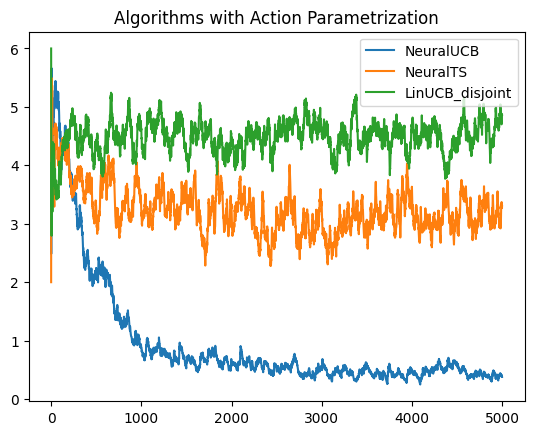

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()

df = pd.DataFrame(action_rank_UCB)
df['rank_Neural_UCB'] = action_rank_UCB
df['rank_Neural_UCB'] = df['rank_Neural_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_UCB))
plt.plot(df['time'],df['rank_Neural_UCB'],label='NeuralUCB')

df = pd.DataFrame(action_rank_TS)
df['rank_Neural_TS'] = action_rank_TS
df['rank_Neural_TS'] = df['rank_Neural_TS'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_TS))
plt.plot(df['time'],df['rank_Neural_TS'],label = 'NeuralTS')

df = pd.DataFrame(action_rank_LinUCB)
df['rank_Linear_UCB'] = action_rank_LinUCB
df['rank_Linear_UCB'] = df['rank_Linear_UCB'].ewm(com=50).mean()
df['time'] = np.arange(len(action_rank_LinUCB))
plt.plot(df['time'],df['rank_Linear_UCB'],label='LinUCB_disjoint')

plt.legend()
plt.title("Algorithms with Action Parametrization")
plt.show()

